In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from package import models
from package import encoder

import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

from mpl_toolkits.axes_grid1 import make_axes_locatable

import joblib
import seaborn as sns; sns.set()

Loaded  9 encoders.


In [2]:
# baseline MLP for mnist dataset
from keras.datasets import mnist
from keras.models import Sequential
from keras.utils import np_utils
from keras.layers import Input, Dense, Lambda, Layer, LeakyReLU, BatchNormalization,Activation
# from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from keras.models import load_model
from keras.callbacks import TensorBoard
from keras import regularizers
from keras.callbacks import ReduceLROnPlateau
from keras.layers import Dropout

import math
import keras
import matplotlib.pyplot as plt
from sklearn import preprocessing
from scipy.optimize import curve_fit
from astropy.io import fits
from astropy.table import Table
from keras.models import Model
from keras import backend as K

import plotly.express as px

from pympler import muppy, summary

# Filtering dataSet Raw

In [6]:
dataSet = pd.read_table("E:\\IC\\BasesNovas\\Treino\\Lamost\\low\\lamostdr8-low-stellar_para-splus.csv", encoding='latin-1', delimiter=',', index_col='Field')

In [7]:
dataSet

Ra_splus  Dec_splus  IDRef  NMG  mag_psf_u  \
Field                                                                  
SPLUS-n01s01_000000027  150.247787  -0.706343    816   12   18.16073   
SPLUS-n01s01_000000063  150.416855  -0.702641    816   12   18.10408   
SPLUS-n01s01_000000068  150.683975  -0.704331    816   12   17.56947   
SPLUS-n01s01_000000135  151.288803  -0.691246    816   12   19.63465   
SPLUS-n01s01_000000147  151.336899  -0.691094    816   12   19.90168   
...                            ...        ...    ...  ...        ...   
SPLUS-s03s05_000021330  330.314667  -2.239905   1011   10   15.53901   
SPLUS-s03s05_000021352  329.628540  -2.281523   1011   10   14.86298   
SPLUS-s03s05_000021416  330.431274  -2.460732   1011   10   14.69126   
SPLUS-s03s05_000021625  330.267426  -2.363238   1011   10   14.94449   
SPLUS-s03s05_000021647  329.433624  -2.828306   1011   10   15.28038   

                        mag_psf_J0378  mag_psf_J0395  mag_psf_J0410  \
Field                                                                 
SPLUS-n01s01_000000027       17.75673       17.56773       17.19514   
SPLUS-n01s01_000000063       17.86808       17.70308       17.10852   
SPLUS-n01s01_000000068       17.33747       17.05947       16.50519   
SPLUS-n01s01_000000135       19.20666       18.88565       18.32136   
SPLUS-n01s01_000000147       19.48168       19.18968       18.30478   
...                               ...            ...            ...   
SPLUS-s03s05_000021330       15.25701       15.06201       14.42846   
SPLUS-s03s05_000021352       14.47898       14.38498       13.87935   
SPLUS-s03s05_000021416       14.25626       14.18626       13.76074   
SPLUS-s03s05_000021625       14.57249       14.48749       13.98276   
SPLUS-s03s05_000021647       14.86638       14.73838       14.12137   

                        mag_psf_J0430  mag_psf_g  ...  teff_err   logg  \
Field                                             ...                    
SPLUS-n01s01_000000027       17.24814   17.04014  ...     84.52  4.186   
SPLUS-n01s01_000000063       17.03352   16.56652  ...     49.06  4.654   
SPLUS-n01s01_000000068       16.43419   16.04419  ...     53.82  4.409   
SPLUS-n01s01_000000135       18.21803   17.50036  ...     87.28  1.168   
SPLUS-n01s01_000000147       17.96078   17.19978  ...     71.97  4.735   
...                               ...        ...  ...       ...    ...   
SPLUS-s03s05_000021330       14.31146   13.79368  ...     34.70  4.675   
SPLUS-s03s05_000021352       13.77977   13.43735  ...     29.12  4.366   
SPLUS-s03s05_000021416       13.65974   13.38716  ...     23.54  4.302   
SPLUS-s03s05_000021625       13.88476   13.51576  ...     22.07  4.521   
SPLUS-s03s05_000021647       14.00037   13.54937  ...     32.73  3.914   

                        logg_err    feh  feh_err      rv  rv_err      alpha_m  \
Field                                                                           
SPLUS-n01s01_000000027     0.133 -0.515    0.088  124.05    7.83     0.103644   
SPLUS-n01s01_000000063     0.076 -0.643    0.051   -6.24    4.71     0.402678   
SPLUS-n01s01_000000068     0.080 -0.384    0.055   -6.63    5.73     0.168384   
SPLUS-n01s01_000000135     0.147 -1.429    0.096  226.49    5.19 -9999.000000   
SPLUS-n01s01_000000147     0.121 -0.339    0.079   11.32    4.17 -9999.000000   
...                          ...    ...      ...     ...     ...          ...   
SPLUS-s03s05_000021330     0.053 -0.029    0.036   -3.13    3.48     0.146599   
SPLUS-s03s05_000021352     0.041 -0.113    0.027   22.18    3.92     0.062403   
SPLUS-s03s05_000021416     0.033 -0.087    0.022  -14.97    3.19    -0.014875   
SPLUS-s03s05_000021625     0.030 -0.024    0.021  -25.82    2.94     0.124760   
SPLUS-s03s05_000021647     0.051 -0.067    0.034   16.47    3.11     0.075360   

                        alpha_m_err Separation  
Field                                           
SPLUS-n01s01_000000027     0.029819   0.171380  
S

In [8]:
for column in dataSet:
    print(column)

Ra_splus
Dec_splus
IDRef
NMG
mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_r
mag_psf_J0660
mag_psf_i
mag_psf_J0861
mag_psf_z
obsid
uid
gp_id
designation
obsdate
lmjd
mjd
planid
spid
fiberid
ra_obs
dec_obs
snru
snrg
snrr
snri
snrz
class
subclass
z
z_err
ps_id
mag_ps_g
mag_ps_r
mag_ps_i
mag_ps_z
mag_ps_y
gaia_source_id
gaia_g_mean_mag
tsource
fibertype
tfrom
tcomment
offsets
offsets_v
ra_2
dec_2
teff
teff_err
logg
logg_err
feh
feh_err
rv
rv_err
alpha_m
alpha_m_err
Separation


In [10]:
Filt = dataSet[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g',
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861', 
               'teff', 'logg', 'feh', 'rv', 'alpha_m']]

In [11]:
Filt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field                                                             
SPLUS-n01s01_000000027   18.16073       17.75673       17.56773   
SPLUS-n01s01_000000063   18.10408       17.86808       17.70308   
SPLUS-n01s01_000000068   17.56947       17.33747       17.05947   
SPLUS-n01s01_000000135   19.63465       19.20666       18.88565   
SPLUS-n01s01_000000147   19.90168       19.48168       19.18968   
...                           ...            ...            ...   
SPLUS-s03s05_000021330   15.53901       15.25701       15.06201   
SPLUS-s03s05_000021352   14.86298       14.47898       14.38498   
SPLUS-s03s05_000021416   14.69126       14.25626       14.18626   
SPLUS-s03s05_000021625   14.94449       14.57249       14.48749   
SPLUS-s03s05_000021647   15.28038       14.86638       14.73838   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field                                                             
SPLUS-n01s01_000000027       17.19514       17.24814   17.04014   
SPLUS-n01s01_000000063       17.10852       17.03352   16.56652   
SPLUS-n01s01_000000068       16.50519       16.43419   16.04419   
SPLUS-n01s01_000000135       18.32136       18.21803   17.50036   
SPLUS-n01s01_000000147       18.30478       17.96078   17.19978   
...                               ...            ...        ...   
SPLUS-s03s05_000021330       14.42846       14.31146   13.79368   
SPLUS-s03s05_000021352       13.87935       13.77977   13.43735   
SPLUS-s03s05_000021416       13.76074       13.65974   13.38716   
SPLUS-s03s05_000021625       13.98276       13.88476   13.51576   
SPLUS-s03s05_000021647       14.12137       14.00037   13.54937   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861     teff  \
Field                                                                          
SPLUS-n01s01_000000027       16.86814       16.74882       16.65360  6603.90   
SPLUS-n01s01_000000063       16.41652       15.90894       15.66572  5248.13   
SPLUS-n01s01_000000068       15.82819       15.44579       15.27319  5439.27   
SPLUS-n01s01_000000135       17.24036       16.58502       16.22114  4565.98   
SPLUS-n01s01_000000147       17.17178       15.88583       15.41982  4279.79   
...                               ...            ...            ...      ...   
SPLUS-s03s05_000021330       13.61746       13.01704       12.74883  5357.52   
SPLUS-s03s05_000021352       13.20677       12.81150       12.58906  5903.42   
SPLUS-s03s05_000021416       13.20574       12.87224       12.71755  6152.12   
SPLUS-s03s05_000021625       13.33576       12.89973       12.71376  5871.48   
SPLUS-s03s05_000021647       13.31337       12.78237       12.52255  5540.83   

                         logg    feh      rv      alpha_m  
Field                                                      
SPLUS-n01s01_000000027  4.186 -0.515  124.05     0.103644  
SPLUS-n01s01_000000063  4.654 -0.643   -6.24     0.402678  
SPLUS-n01s01_000000068  4.409 -0.384   -6.63     0.168384  
SPLUS-n01s01_000000135  1.168 -1.429  226.49 -9999.000000  
SPLUS-n01s01_000000147  4.735 -0.339   11.32 -9999.000000  
...                       ...    ...     ...          ...  
SPLUS-s03s05_000021330  4.675 -0.029   -3.13     0.146599  
SPLUS-s03s05_000021352  4.366 -0.113   22.18     0.062403  
SPLUS-s03s05_000021416  4.302 -0.087  -14.97    -0.014875  
SPLUS-s03s05_000021625  4.521 -0.024  -25.82     0.124760  
SPLUS-s03s05_000021647  3.914 -0.067   16.47     0.075360  

[25047 rows x 14 columns]

In [12]:
Filt.to_csv("E:\IC\BasesNovas\Treino\\Lamost\\low\\Filter1.csv")

# Filtering Dwarfs

In [3]:
Anas = pd.read_csv('E:\IC\BasesNovas\Treino\\Lamost\\low\\Filter1.csv')

In [4]:
Anas = Anas.loc[(Anas['teff']>3500) & 
                     (Anas['teff']<7000) &
                     (Anas['logg']>3.7)]

In [5]:
Anas

Field  mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
0      SPLUS-n01s01_000000027   18.16073       17.75673       17.56773   
1      SPLUS-n01s01_000000063   18.10408       17.86808       17.70308   
2      SPLUS-n01s01_000000068   17.56947       17.33747       17.05947   
4      SPLUS-n01s01_000000147   19.90168       19.48168       19.18968   
5      SPLUS-n01s01_000000163   18.61370       18.32470       18.02370   
...                       ...        ...            ...            ...   
25042  SPLUS-s03s05_000021330   15.53901       15.25701       15.06201   
25043  SPLUS-s03s05_000021352   14.86298       14.47898       14.38498   
25044  SPLUS-s03s05_000021416   14.69126       14.25626       14.18626   
25045  SPLUS-s03s05_000021625   14.94449       14.57249       14.48749   
25046  SPLUS-s03s05_000021647   15.28038       14.86638       14.73838   

       mag_psf_J0410  mag_psf_J0430  mag_psf_g  mag_psf_J0515  mag_psf_J0660  \
0           17.19514       17.24814   17.04014       16.86814       16.74882   
1           17.10852       17.03352   16.56652       16.41652       15.90894   
2           16.50519       16.43419   16.04419       15.82819       15.44579   
4           18.30478       17.96078   17.19978       17.17178       15.88583   
5           17.17810       16.99510   16.34810       16.24010       15.40616   
...              ...            ...        ...            ...            ...   
25042       14.42846       14.31146   13.79368       13.61746       13.01704   
25043       13.87935       13.77977   13.43735       13.20677       12.81150   
25044       13.76074       13.65974   13.38716       13.20574       12.87224   
25045       13.98276       13.88476   13.51576       13.33576       12.89973   
25046       14.12137       14.00037   13.54937       13.31337       12.78237   

       mag_psf_J0861     teff   logg    feh      rv      alpha_m  
0           16.65360  6603.90  4.186 -0.515  124.05     0.103644  
1           15.66572  5248.13  4.654 -0.643   -6.24     0.402678  
2           15.27319  5439.27  4.409 -0.384   -6.63     0.168384  
4           15.41982  4279.79  4.735 -0.339   11.32 -9999.000000  
5           15.11748  4761.70  4.621 -0.001  102.19 -9999.000000  
...              ...      ...    ...    ...     ...          ...  
25042       12.74883  5357.52  4.675 -0.029   -3.13     0.146599  
25043       12.58906  5903.42  4.366 -0.113   22.18     0.062403  
25044       12.71755  6152.12  4.302 -0.087  -14.97    -0.014875  
25045       12.71376  5871.48  4.521 -0.024  -25.82     0.124760  
25046       12.52255  5540.83  3.914 -0.067   16.47     0.075360  

[22772 rows x 15 columns]

In [16]:
Anas.to_csv("E:\IC\BasesNovas\Treino\\Lamost\\low\\Filter2_Anas.csv")

In [8]:
AnasFilt = Anas.loc[(Anas['teff'] != -9999) & (Anas['logg'] != -9999) & 
                          (Anas['feh'] != -9999) & (Anas['alpha_m'] != -9999) & 
                          (Anas['teff'] != '-9999') & (Anas['logg'] != '-9999') & 
                          (Anas['feh'] != '-9999') & (Anas['alpha_m'] != '-9999')]

In [9]:
AnasFilt

Field  mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
0      SPLUS-n01s01_000000027   18.16073       17.75673       17.56773   
1      SPLUS-n01s01_000000063   18.10408       17.86808       17.70308   
2      SPLUS-n01s01_000000068   17.56947       17.33747       17.05947   
14     SPLUS-n01s01_000000367   18.12232       17.91732       17.68632   
15     SPLUS-n01s01_000000375   16.11769       15.70570       15.59870   
...                       ...        ...            ...            ...   
25042  SPLUS-s03s05_000021330   15.53901       15.25701       15.06201   
25043  SPLUS-s03s05_000021352   14.86298       14.47898       14.38498   
25044  SPLUS-s03s05_000021416   14.69126       14.25626       14.18626   
25045  SPLUS-s03s05_000021625   14.94449       14.57249       14.48749   
25046  SPLUS-s03s05_000021647   15.28038       14.86638       14.73838   

       mag_psf_J0410  mag_psf_J0430  mag_psf_g  mag_psf_J0515  mag_psf_J0660  \
0           17.19514       17.24814   17.04014       16.86814       16.74882   
1           17.10852       17.03352   16.56652       16.41652       15.90894   
2           16.50519       16.43419   16.04419       15.82819       15.44579   
14          17.01086       16.86586   16.39686       16.25786       15.74353   
15          15.21984       15.17085   14.92284       14.74784       14.47569   
...              ...            ...        ...            ...            ...   
25042       14.42846       14.31146   13.79368       13.61746       13.01704   
25043       13.87935       13.77977   13.43735       13.20677       12.81150   
25044       13.76074       13.65974   13.38716       13.20574       12.87224   
25045       13.98276       13.88476   13.51576       13.33576       12.89973   
25046       14.12137       14.00037   13.54937       13.31337       12.78237   

       mag_psf_J0861     teff   logg    feh      rv   alpha_m  
0           16.65360  6603.90  4.186 -0.515  124.05  0.103644  
1           15.66572  5248.13  4.654 -0.643   -6.24  0.402678  
2           15.27319  5439.27  4.409 -0.384   -6.63  0.168384  
14          15.51528  5394.87  4.538  0.129   12.38  0.108600  
15          14.31930  5844.24  4.034 -0.825   -4.24  0.266650  
...              ...      ...    ...    ...     ...       ...  
25042       12.74883  5357.52  4.675 -0.029   -3.13  0.146599  
25043       12.58906  5903.42  4.366 -0.113   22.18  0.062403  
25044       12.71755  6152.12  4.302 -0.087  -14.97 -0.014875  
25045       12.71376  5871.48  4.521 -0.024  -25.82  0.124760  
25046       12.52255  5540.83  3.914 -0.067   16.47  0.075360  

[11415 rows x 15 columns]

In [10]:
for column in Anas:
    print(column)

Field
mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_J0660
mag_psf_J0861
teff
logg
feh
rv
alpha_m


In [11]:
AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Lamost\\low\\Filter3_Anas.csv")

## Limpando outliers

In [3]:
dataSet = pd.read_csv("E:\IC\BasesNovas\Treino\\Lamost\\low\\Filter3_Anas.csv", index_col = 'Field')

# primeiro removemos os -999 para poder normalizar com base nos corretos
baseMolde1 = dataSet.loc[(dataSet['mag_psf_u'] != -999) & (dataSet['mag_psf_J0378'] != -999) & 
                          (dataSet['mag_psf_J0395'] != -999) & (dataSet['mag_psf_J0410'] != -999) & 
                          (dataSet['mag_psf_J0430'] != -999) & (dataSet['mag_psf_g'] != -999) &
                          (dataSet['mag_psf_J0515'] != -999) & 
                          (dataSet['mag_psf_J0660'] != -999) & (dataSet['mag_psf_J0861'] != -999) & 
                          (dataSet['mag_psf_u'] != '-999') & (dataSet['mag_psf_J0378'] != '-999') & 
                          (dataSet['mag_psf_J0395'] != '-999') & (dataSet['mag_psf_J0410'] != '-999') & 
                          (dataSet['mag_psf_J0430'] != '-999') & (dataSet['mag_psf_g'] != '-999') &
                          (dataSet['mag_psf_J0515'] != '-999') & (dataSet['mag_psf_J0660'] != '-999') & 
                          (dataSet['mag_psf_J0861'] != '-999'),
                          ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
                           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
                           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]

def cap_outliers(df, column):
    """Remove outliers.
    Args:
        df (pd.DataFrame): DataFrame
        column (str): column name to remove outliers
    Returns:
        pd.DataFrame: Update dataframe.
    """    
    upper = baseMolde1[column].mean() + 3*baseMolde1[column].std()
    down = baseMolde1[column].mean() - 3*baseMolde1[column].std()

    df[(df[column] > upper) | (df[column] < down)]

    df[column] = np.where(
        df[column]>upper,
        upper,
        np.where(
            df[column]<down,
            down,
            df[column]
        )
    )
    
    return df

In [4]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(36,), name='inp0')   
    encoded0 = Dense(200, name='encoded0',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(input_x0)
    a0=LeakyReLU(alpha=0.01)(encoded0)
    encoded1 = Dense(300, name='encoded1',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a0)
    a1=LeakyReLU(alpha=0.01)(encoded1)
    encoded2 = Dense(500, name='encoded2',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a1)
    a2=LeakyReLU(alpha=0.01)(encoded2)
    encoded3 = Dense(300, name='encoded3',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a2)
    a3=LeakyReLU(alpha=0.01)(encoded3)
    encoded4 = Dense(100, name='encoded4',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a3)
    a4=LeakyReLU(alpha=0.01)(encoded4)
    encoded5 = Dense(50, name='encoded5',kernel_regularizer=regularizers.l2(0.00005),kernel_initializer = "normal")(a4)
    a5=LeakyReLU(alpha=0.01)(encoded5)
    output_y0 = Dense(1,name='oup0',kernel_initializer = "normal", activation='linear')(a5)
    trainable_model=Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.0001), loss='mse')
    return trainable_model

In [4]:
# define baseline model
def baseline_model_teste():
    # create model
    input_x0 = Input(shape=(36,), name='inp0')

    encoded0 = Dense(200, name='encoded0', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(input_x0)
    a0 = LeakyReLU(alpha=0.01)(encoded0)
    drop0 = Dropout(0.2)(a0)  # 20% dropout

    encoded1 = Dense(300, name='encoded1', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop0)
    a1 = LeakyReLU(alpha=0.01)(encoded1)
    drop1 = Dropout(0.2)(a1)  # 20% dropout

    encoded2 = Dense(500, name='encoded2', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop1)
    a2 = LeakyReLU(alpha=0.01)(encoded2)
    drop2 = Dropout(0.2)(a2)  # 20% dropout

    encoded3 = Dense(300, name='encoded3', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop2)
    a3 = LeakyReLU(alpha=0.01)(encoded3)
    drop3 = Dropout(0.2)(a3)  # 20% dropout

    encoded4 = Dense(100, name='encoded4', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop3)
    a4 = LeakyReLU(alpha=0.01)(encoded4)
    drop4 = Dropout(0.2)(a4)  # 20% dropout

    encoded5 = Dense(50, name='encoded5', kernel_regularizer=regularizers.l2(0.00005), kernel_initializer='he_normal')(drop4)
    a5 = LeakyReLU(alpha=0.01)(encoded5)

    output_y0 = Dense(1, name='oup0', kernel_initializer='he_normal', activation='linear')(a5)
    
    trainable_model = Model(inputs=input_x0, outputs=output_y0)
    trainable_model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return trainable_model

In [5]:
Anas = dataSet

In [6]:
AnasFiltros = Anas[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [7]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [8]:
xtrain = AnasCores

In [9]:
AnasFiltros.min()

mag_psf_u        13.148113
mag_psf_J0378    12.717600
mag_psf_J0395    12.646990
mag_psf_J0410    12.179120
mag_psf_J0430    12.073179
mag_psf_g        11.817901
mag_psf_J0515    11.628480
mag_psf_J0660    11.313188
mag_psf_J0861    11.233781
dtype: float64

In [10]:
Anas.min()

Unnamed: 0          0.000
mag_psf_u        -999.000
mag_psf_J0378    -999.000
mag_psf_J0395    -999.000
mag_psf_J0410    -999.000
mag_psf_J0430    -999.000
mag_psf_g        -999.000
mag_psf_J0515    -999.000
mag_psf_J0660    -999.000
mag_psf_J0861    -999.000
teff             4762.470
logg                3.701
feh                -2.284
rv               -393.640
alpha_m            -0.600
dtype: float64

In [11]:
Anas.mean()

Unnamed: 0       13018.621813
mag_psf_u            8.877088
mag_psf_J0378       11.275576
mag_psf_J0395        9.663042
mag_psf_J0410       12.273125
mag_psf_J0430       11.312544
mag_psf_g            4.193534
mag_psf_J0515       10.612187
mag_psf_J0660       -0.755882
mag_psf_J0861        6.033396
teff              5677.044853
logg                 4.269744
feh                 -0.340984
rv                   1.386028
alpha_m              0.176745
dtype: float64

In [12]:
for column in Anas:
    print(column)

Unnamed: 0
mag_psf_u
mag_psf_J0378
mag_psf_J0395
mag_psf_J0410
mag_psf_J0430
mag_psf_g
mag_psf_J0515
mag_psf_J0660
mag_psf_J0861
teff
logg
feh
rv
alpha_m


# Treinando

## Teste Geral

In [13]:
#columnYtrain = ['TEFF', 'LOGG', 'ALPHA_M', 'CA_FE', 'C_FE', 'FE_H', 'MG_FE', 'N_FE', 'NI_FE', 'SI_FE']
columnYtrain = ['teff', 'logg', 'alpha_m', 'feh']

In [14]:
ytrain = Anas[columnYtrain]

In [15]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [16]:
AnasFilt

Unnamed: 0  mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field                                                                         
SPLUS-n01s01_000000027           0   18.16073       17.75673       17.56773   
SPLUS-n01s01_000000063           1   18.10408       17.86808       17.70308   
SPLUS-n01s01_000000068           2   17.56947       17.33747       17.05947   
SPLUS-n01s01_000000367          14   18.12232       17.91732       17.68632   
SPLUS-n01s01_000000375          15   16.11769       15.70570       15.59870   
...                            ...        ...            ...            ...   
SPLUS-s03s05_000021330       25042   15.53901       15.25701       15.06201   
SPLUS-s03s05_000021352       25043   14.86298       14.47898       14.38498   
SPLUS-s03s05_000021416       25044   14.69126       14.25626       14.18626   
SPLUS-s03s05_000021625       25045   14.94449       14.57249       14.48749   
SPLUS-s03s05_000021647       25046   15.28038       14.86638       14.73838   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field                                                             
SPLUS-n01s01_000000027       17.19514       17.24814   17.04014   
SPLUS-n01s01_000000063       17.10852       17.03352   16.56652   
SPLUS-n01s01_000000068       16.50519       16.43419   16.04419   
SPLUS-n01s01_000000367       17.01086       16.86586   16.39686   
SPLUS-n01s01_000000375       15.21984       15.17085   14.92284   
...                               ...            ...        ...   
SPLUS-s03s05_000021330       14.42846       14.31146   13.79368   
SPLUS-s03s05_000021352       13.87935       13.77977   13.43735   
SPLUS-s03s05_000021416       13.76074       13.65974   13.38716   
SPLUS-s03s05_000021625       13.98276       13.88476   13.51576   
SPLUS-s03s05_000021647       14.12137       14.00037   13.54937   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861     teff  \
Field                                                                          
SPLUS-n01s01_000000027       16.86814       16.74882       16.65360  6603.90   
SPLUS-n01s01_000000063       16.41652       15.90894       15.66572  5248.13   
SPLUS-n01s01_000000068       15.82819       15.44579       15.27319  5439.27   
SPLUS-n01s01_000000367       16.25786       15.74353       15.51528  5394.87   
SPLUS-n01s01_000000375       14.74784       14.47569       14.31930  5844.24   
...                               ...            ...            ...      ...   
SPLUS-s03s05_000021330       13.61746       13.01704       12.74883  5357.52   
SPLUS-s03s05_000021352       13.20677       12.81150       12.58906  5903.42   
SPLUS-s03s05_000021416       13.20574       12.87224       12.71755  6152.12   
SPLUS-s03s05_000021625       13.33576       12.89973       12.71376  5871.48   
SPLUS-s03s05_000021647       13.31337       12.78237       12.52255  5540.83   

                         logg    feh      rv   alpha_m  
Field                                                   
SPLUS-n01s01_000000027  4.186 -0.515  124.05  0.103644  
SPLUS-n01s01_000000063  4.654 -0.643   -6.24  0.402678  
SPLUS-n01s01_000000068  4.409 -0.384   -6.63  0.168384  
SPLUS-n01s01_000000367  4.538  0.129   12.38  0.108600  
SPLUS-n01s01_000000375  4.034 -0.825   -4.24  0.266650  
...                       ...    ...     ...       ...  
SPLUS-s03s05_000021330  4.675 -0.029   -3.13  0.146599  
SPLUS-s03s05_000021352  4.366 -0.113   22.18  0.062403  
SPLUS-s03s05_000021416  4.302 -0.087  -14.97 -0.014875  
SPLUS-s03s05_000021625  4.521 -0.024  -25.82  0.124760  
SPLUS-s03s05_000021647  3.914 -0.067   16.47  0.075360  

[11415 rows x 15 columns]

In [17]:
#AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Apogee\\2\\Filter_AnasAlpha.csv")

In [18]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [19]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [20]:
xtrain = AnasCores

In [21]:
ytrain = AnasFilt[columnYtrain]

In [22]:
xtrain.max()

mag_psf_u-mag_psf_J0378        7.184956
mag_psf_u-mag_psf_J0395        7.255566
mag_psf_u-mag_psf_J0410        7.181770
mag_psf_u-mag_psf_J0430        6.535431
mag_psf_u-mag_psf_g            7.316039
mag_psf_u-mag_psf_J0515        7.147030
mag_psf_u-mag_psf_J0660        7.820672
mag_psf_u-mag_psf_J0861        8.010239
mag_psf_J0378-mag_psf_J0395    6.731000
mag_psf_J0378-mag_psf_J0410    6.772960
mag_psf_J0378-mag_psf_J0430    6.202431
mag_psf_J0378-mag_psf_g        7.001039
mag_psf_J0378-mag_psf_J0515    7.001030
mag_psf_J0378-mag_psf_J0660    7.769672
mag_psf_J0378-mag_psf_J0861    7.849079
mag_psf_J0395-mag_psf_J0410    6.640770
mag_psf_J0395-mag_psf_J0430    6.133431
mag_psf_J0395-mag_psf_g        6.916039
mag_psf_J0395-mag_psf_J0515    6.885030
mag_psf_J0395-mag_psf_J0660    8.170576
mag_psf_J0395-mag_psf_J0861    8.249984
mag_psf_J0410-mag_psf_J0430    5.713771
mag_psf_J0410-mag_psf_g        7.119023
mag_psf_J0410-mag_psf_J0515    5.991830
mag_psf_J0410-mag_psf_J0660    7.076702


In [23]:
xtrain.min()

mag_psf_u-mag_psf_J0378       -6.229877
mag_psf_u-mag_psf_J0395       -5.456917
mag_psf_u-mag_psf_J0410       -5.738777
mag_psf_u-mag_psf_J0430       -5.750436
mag_psf_u-mag_psf_g           -4.940477
mag_psf_u-mag_psf_J0515       -5.139808
mag_psf_u-mag_psf_J0660       -4.752673
mag_psf_u-mag_psf_J0861       -4.547552
mag_psf_J0378-mag_psf_J0395   -6.102290
mag_psf_J0378-mag_psf_J0410   -6.219324
mag_psf_J0378-mag_psf_J0430   -6.102360
mag_psf_J0378-mag_psf_g       -5.321760
mag_psf_J0378-mag_psf_J0515   -5.253360
mag_psf_J0378-mag_psf_J0660   -4.681970
mag_psf_J0378-mag_psf_J0861   -4.580580
mag_psf_J0395-mag_psf_J0410   -6.289934
mag_psf_J0395-mag_psf_J0430   -6.251559
mag_psf_J0395-mag_psf_g       -5.746460
mag_psf_J0395-mag_psf_J0515   -5.640931
mag_psf_J0395-mag_psf_J0660   -5.253796
mag_psf_J0395-mag_psf_J0861   -5.048674
mag_psf_J0410-mag_psf_J0430   -5.811470
mag_psf_J0410-mag_psf_g       -5.277890
mag_psf_J0410-mag_psf_J0515   -5.117890
mag_psf_J0410-mag_psf_J0660   -4.635760


In [24]:
ytrain

teff   logg   alpha_m    feh
Field                                                  
SPLUS-n01s01_000000027  6603.90  4.186  0.103644 -0.515
SPLUS-n01s01_000000063  5248.13  4.654  0.402678 -0.643
SPLUS-n01s01_000000068  5439.27  4.409  0.168384 -0.384
SPLUS-n01s01_000000367  5394.87  4.538  0.108600  0.129
SPLUS-n01s01_000000375  5844.24  4.034  0.266650 -0.825
...                         ...    ...       ...    ...
SPLUS-s03s05_000021330  5357.52  4.675  0.146599 -0.029
SPLUS-s03s05_000021352  5903.42  4.366  0.062403 -0.113
SPLUS-s03s05_000021416  6152.12  4.302 -0.014875 -0.087
SPLUS-s03s05_000021625  5871.48  4.521  0.124760 -0.024
SPLUS-s03s05_000021647  5540.83  3.914  0.075360 -0.067

[11415 rows x 4 columns]

In [25]:
#scaler = StandardScaler()
#normalized_column = scaler.fit_transform(ytrain[['alpha_m']])
#ytrain['alpha_m'] = normalized_column

In [28]:
ytrain['TEFF'] = encoder.encode_DataFrame(pd.DataFrame(ytrain['teff']), 'teffLow')

In [29]:
ytrain

teff   logg   alpha_m    feh      TEFF
Field                                                            
SPLUS-n01s01_000000027  6603.90  4.186  0.103644 -0.515  0.655486
SPLUS-n01s01_000000063  5248.13  4.654  0.402678 -0.643 -0.563381
SPLUS-n01s01_000000068  5439.27  4.409  0.168384 -0.384 -0.391542
SPLUS-n01s01_000000367  5394.87  4.538  0.108600  0.129 -0.431459
SPLUS-n01s01_000000375  5844.24  4.034  0.266650 -0.825 -0.027465
...                         ...    ...       ...    ...       ...
SPLUS-s03s05_000021330  5357.52  4.675  0.146599 -0.029 -0.465037
SPLUS-s03s05_000021352  5903.42  4.366  0.062403 -0.113  0.025739
SPLUS-s03s05_000021416  6152.12  4.302 -0.014875 -0.087  0.249326
SPLUS-s03s05_000021625  5871.48  4.521  0.124760 -0.024 -0.002976
SPLUS-s03s05_000021647  5540.83  3.914  0.075360 -0.067 -0.300237

[11415 rows x 5 columns]

In [30]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 9 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [31]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [32]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [33]:
Y_train

teff   logg   alpha_m    feh      TEFF
Field                                                            
SPLUS-s02s04_000002802  5792.81  4.048  0.118083 -0.777 -0.073702
SPLUS-n02s26_000012262  6167.09  4.194  0.115132 -0.991  0.262784
SPLUS-n02s25_000004250  5568.96  4.257  0.390677 -0.548 -0.274948
SPLUS-s02s09_000014266  5614.08  4.172  0.348980 -0.315 -0.234384
SPLUS-n01s01_000011011  5842.71  4.473  0.164366 -0.407 -0.028841
...                         ...    ...       ...    ...       ...
SPLUS-n04s02_000008895  5987.03  4.319  0.096044 -0.417  0.100906
SPLUS-n02n19_000003949  4965.64  4.720  0.262088 -0.372 -0.817346
SPLUS-n01s23_000006726  5752.56  4.151  0.130176 -0.082 -0.109887
SPLUS-s02s10_000009439  5556.20  4.228  0.370670 -0.422 -0.286419
SPLUS-n01s23_000004652  5359.28  4.091  0.444954 -0.402 -0.463455

[8218 rows x 5 columns]

### Alpha_m

In [57]:
modelAlpha = baseline_model_teste()

In [58]:
columnTrain = 'alpha_m'

In [59]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyAlpha = modelAlpha.fit(X_train, Y_train[[columnTrain]], epochs = 500, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/500
3/3 - 1s - loss: 0.2402 - val_loss: 0.1695 - 638ms/epoch - 213ms/step
Epoch 2/500
3/3 - 0s - loss: 0.1771 - val_loss: 0.1738 - 54ms/epoch - 18ms/step
Epoch 3/500
3/3 - 0s - loss: 0.1755 - val_loss: 0.1640 - 54ms/epoch - 18ms/step
Epoch 4/500
3/3 - 0s - loss: 0.1697 - val_loss: 0.1612 - 52ms/epoch - 17ms/step
Epoch 5/500
3/3 - 0s - loss: 0.1684 - val_loss: 0.1615 - 54ms/epoch - 18ms/step
Epoch 6/500
3/3 - 0s - loss: 0.1657 - val_loss: 0.1620 - 53ms/epoch - 18ms/step
Epoch 7/500
3/3 - 0s - loss: 0.1640 - val_loss: 0.1592 - 53ms/epoch - 18ms/step
Epoch 8/500
3/3 - 0s - loss: 0.1622 - val_loss: 0.1562 - 51ms/epoch - 17ms/step
Epoch 9/500
3/3 - 0s - loss: 0.1603 - val_loss: 0.1545 - 50ms/epoch - 17ms/step
Epoch 10/500
3/3 - 0s - loss: 0.1585 - val_loss: 0.1536 - 53ms/epoch - 18ms/step
Epoch 11/500
3/3 - 0s - loss: 0.1569 - val_loss: 0.1525 - 55ms/epoch - 18ms/step
Epoch 12/500
3/3 - 0s - loss: 0.1552 - val_loss: 0.1507 - 53ms/epoch - 18ms/step
Epoch 13/500
3/3 - 0s - loss: 0.153

Epoch 103/500
3/3 - 0s - loss: 0.0684 - val_loss: 0.0661 - 61ms/epoch - 20ms/step
Epoch 104/500
3/3 - 0s - loss: 0.0678 - val_loss: 0.0656 - 63ms/epoch - 21ms/step
Epoch 105/500
3/3 - 0s - loss: 0.0673 - val_loss: 0.0651 - 64ms/epoch - 21ms/step
Epoch 106/500
3/3 - 0s - loss: 0.0669 - val_loss: 0.0646 - 64ms/epoch - 21ms/step
Epoch 107/500
3/3 - 0s - loss: 0.0662 - val_loss: 0.0642 - 63ms/epoch - 21ms/step
Epoch 108/500
3/3 - 0s - loss: 0.0657 - val_loss: 0.0637 - 61ms/epoch - 20ms/step
Epoch 109/500
3/3 - 0s - loss: 0.0654 - val_loss: 0.0633 - 63ms/epoch - 21ms/step
Epoch 110/500
3/3 - 0s - loss: 0.0649 - val_loss: 0.0628 - 65ms/epoch - 22ms/step
Epoch 111/500
3/3 - 0s - loss: 0.0646 - val_loss: 0.0625 - 65ms/epoch - 22ms/step
Epoch 112/500
3/3 - 0s - loss: 0.0641 - val_loss: 0.0619 - 65ms/epoch - 22ms/step
Epoch 113/500
3/3 - 0s - loss: 0.0635 - val_loss: 0.0615 - 62ms/epoch - 21ms/step
Epoch 114/500
3/3 - 0s - loss: 0.0633 - val_loss: 0.0614 - 62ms/epoch - 21ms/step
Epoch 115/500
3/

Epoch 203/500
3/3 - 0s - loss: 0.0376 - val_loss: 0.0359 - 53ms/epoch - 18ms/step
Epoch 204/500
3/3 - 0s - loss: 0.0374 - val_loss: 0.0358 - 54ms/epoch - 18ms/step
Epoch 205/500
3/3 - 0s - loss: 0.0371 - val_loss: 0.0356 - 52ms/epoch - 17ms/step
Epoch 206/500
3/3 - 0s - loss: 0.0369 - val_loss: 0.0354 - 56ms/epoch - 19ms/step
Epoch 207/500
3/3 - 0s - loss: 0.0368 - val_loss: 0.0353 - 69ms/epoch - 23ms/step
Epoch 208/500
3/3 - 0s - loss: 0.0367 - val_loss: 0.0351 - 64ms/epoch - 21ms/step
Epoch 209/500
3/3 - 0s - loss: 0.0365 - val_loss: 0.0349 - 54ms/epoch - 18ms/step
Epoch 210/500
3/3 - 0s - loss: 0.0362 - val_loss: 0.0348 - 54ms/epoch - 18ms/step
Epoch 211/500
3/3 - 0s - loss: 0.0362 - val_loss: 0.0346 - 54ms/epoch - 18ms/step
Epoch 212/500
3/3 - 0s - loss: 0.0360 - val_loss: 0.0344 - 60ms/epoch - 20ms/step
Epoch 213/500
3/3 - 0s - loss: 0.0358 - val_loss: 0.0343 - 57ms/epoch - 19ms/step
Epoch 214/500
3/3 - 0s - loss: 0.0356 - val_loss: 0.0341 - 59ms/epoch - 20ms/step
Epoch 215/500
3/

Epoch 303/500
3/3 - 0s - loss: 0.0256 - val_loss: 0.0243 - 65ms/epoch - 22ms/step
Epoch 304/500
3/3 - 0s - loss: 0.0254 - val_loss: 0.0243 - 67ms/epoch - 22ms/step
Epoch 305/500
3/3 - 0s - loss: 0.0254 - val_loss: 0.0242 - 62ms/epoch - 21ms/step
Epoch 306/500
3/3 - 0s - loss: 0.0253 - val_loss: 0.0241 - 67ms/epoch - 22ms/step
Epoch 307/500
3/3 - 0s - loss: 0.0252 - val_loss: 0.0240 - 61ms/epoch - 20ms/step
Epoch 308/500
3/3 - 0s - loss: 0.0251 - val_loss: 0.0242 - 63ms/epoch - 21ms/step
Epoch 309/500
3/3 - 0s - loss: 0.0252 - val_loss: 0.0241 - 64ms/epoch - 21ms/step
Epoch 310/500
3/3 - 0s - loss: 0.0252 - val_loss: 0.0241 - 63ms/epoch - 21ms/step
Epoch 311/500
3/3 - 0s - loss: 0.0252 - val_loss: 0.0239 - 64ms/epoch - 21ms/step
Epoch 312/500
3/3 - 0s - loss: 0.0251 - val_loss: 0.0237 - 62ms/epoch - 21ms/step
Epoch 313/500
3/3 - 0s - loss: 0.0249 - val_loss: 0.0238 - 69ms/epoch - 23ms/step
Epoch 314/500
3/3 - 0s - loss: 0.0251 - val_loss: 0.0239 - 64ms/epoch - 21ms/step
Epoch 315/500
3/

Epoch 403/500
3/3 - 0s - loss: 0.0203 - val_loss: 0.0198 - 65ms/epoch - 22ms/step
Epoch 404/500
3/3 - 0s - loss: 0.0206 - val_loss: 0.0194 - 65ms/epoch - 22ms/step
Epoch 405/500
3/3 - 0s - loss: 0.0207 - val_loss: 0.0191 - 60ms/epoch - 20ms/step
Epoch 406/500
3/3 - 0s - loss: 0.0208 - val_loss: 0.0204 - 67ms/epoch - 22ms/step
Epoch 407/500
3/3 - 0s - loss: 0.0207 - val_loss: 0.0190 - 61ms/epoch - 20ms/step
Epoch 408/500
3/3 - 0s - loss: 0.0202 - val_loss: 0.0194 - 62ms/epoch - 21ms/step
Epoch 409/500
3/3 - 0s - loss: 0.0203 - val_loss: 0.0190 - 66ms/epoch - 22ms/step
Epoch 410/500
3/3 - 0s - loss: 0.0200 - val_loss: 0.0191 - 60ms/epoch - 20ms/step
Epoch 411/500
3/3 - 0s - loss: 0.0200 - val_loss: 0.0189 - 63ms/epoch - 21ms/step
Epoch 412/500
3/3 - 0s - loss: 0.0198 - val_loss: 0.0187 - 62ms/epoch - 21ms/step
Epoch 413/500
3/3 - 0s - loss: 0.0199 - val_loss: 0.0188 - 61ms/epoch - 20ms/step
Epoch 414/500
3/3 - 0s - loss: 0.0197 - val_loss: 0.0188 - 63ms/epoch - 21ms/step
Epoch 415/500
3/

Text(0, 0.5, 'Loss')

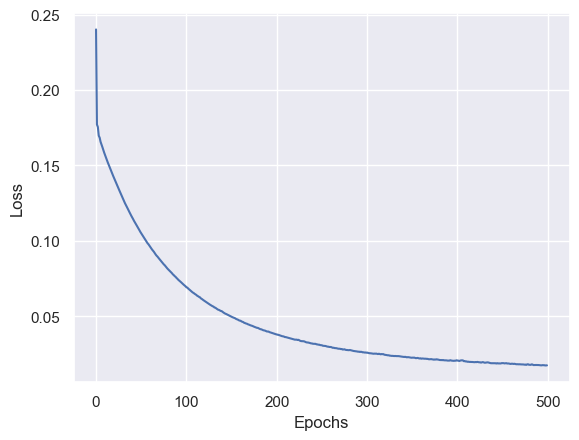

In [60]:
# plota as loss para ver se está treinando
plt.plot(historyAlpha.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

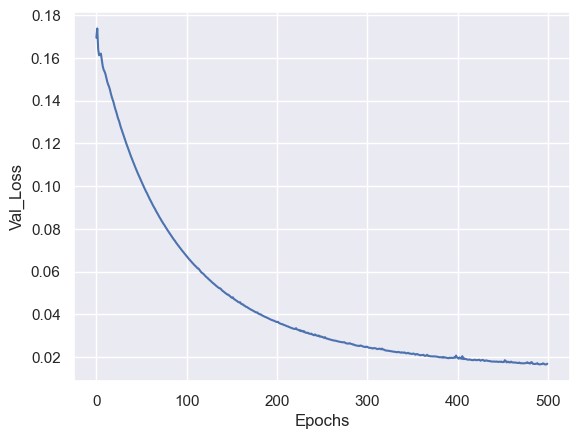

In [61]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyAlpha.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [39]:
#modelAlpha.save('modelosNovos\\Lamost-LR\\model_alpha.h5')

In [62]:
predalpha = modelAlpha.predict(X_test)

72/72 [==============================] - 0s 2ms/step


In [64]:
original_column_approx = predalpha

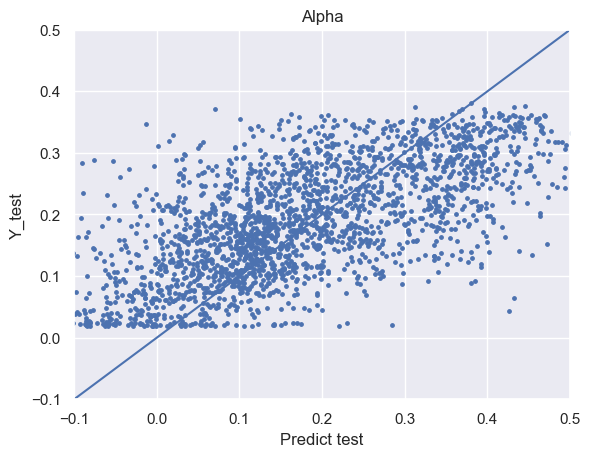

In [65]:
plt.scatter(Y_test[[columnTrain]], original_column_approx, s=6)
plt.title('Alpha')
plt.xlim(-0.1, 0.5)
plt.ylim(-0.1, 0.5)
plt.xlabel('Predict test')
plt.ylabel('Y_test')
plt.plot([-1,1], [-1,1])

In [110]:
score = r2_score(Y_test['alpha_m'], predalpha)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 40.0%


In [66]:
Y_test['alpha_predict'] = predtest

In [67]:
Y_test

teff   logg   alpha_m    feh      TEFF  \
Field                                                               
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807   
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751   
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289   
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491   
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643   
...                         ...    ...       ...    ...       ...   
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961   
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765   
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922   
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776   
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239   

                        TEFF_PredictDecoded  alpha_predict  
Field                                                       
SPLUS-s02s17_000004762          5776.024902       0.204177  
SPLUS-n01s20_000008763          5293.979980       0.151184  
SPLUS-n02n26_000010995          5529.192871       0.281305  
SPLUS-s02s10_000004604          5703.462891       0.327699  
SPLUS-n01s23_000000451          6054.609375       0.120852  
...                                     ...            ...  
SPLUS-n02n28_000004106          5629.470703       0.206184  
SPLUS-s02s13_000005813          6007.171387       0.113706  
SPLUS-s02s06_000004255          5619.103516       0.207008  
SPLUS-n02n01_000002263          5178.011230       0.171745  
SPLUS-n02s20_000006551          5392.504395       0.233148  

[2283 rows x 7 columns]

In [68]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\5-Lamost-LR-Test\\AlphaPredict.csv")

## TEFF

In [44]:
modelTEFF = baseline_model_teste()

In [45]:
columnTrain = 'TEFF'

In [46]:
# Training model                                                                                (sample_weight=sample_weights, )
historyTEFF = modelTEFF.fit(X_train, Y_train[[columnTrain]], epochs = 1000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
3/3 - 1s - loss: 0.3043 - val_loss: 0.2131 - 776ms/epoch - 259ms/step
Epoch 2/2000
3/3 - 0s - loss: 0.2227 - val_loss: 0.2100 - 182ms/epoch - 61ms/step
Epoch 3/2000
3/3 - 0s - loss: 0.2036 - val_loss: 0.1814 - 72ms/epoch - 24ms/step
Epoch 4/2000
3/3 - 0s - loss: 0.1933 - val_loss: 0.1793 - 54ms/epoch - 18ms/step
Epoch 5/2000
3/3 - 0s - loss: 0.1857 - val_loss: 0.1758 - 52ms/epoch - 17ms/step
Epoch 6/2000
3/3 - 0s - loss: 0.1840 - val_loss: 0.1744 - 52ms/epoch - 17ms/step
Epoch 7/2000
3/3 - 0s - loss: 0.1795 - val_loss: 0.1698 - 58ms/epoch - 19ms/step
Epoch 8/2000
3/3 - 0s - loss: 0.1764 - val_loss: 0.1683 - 54ms/epoch - 18ms/step
Epoch 9/2000
3/3 - 0s - loss: 0.1747 - val_loss: 0.1660 - 54ms/epoch - 18ms/step
Epoch 10/2000
3/3 - 0s - loss: 0.1723 - val_loss: 0.1670 - 54ms/epoch - 18ms/step
Epoch 11/2000
3/3 - 0s - loss: 0.1700 - val_loss: 0.1637 - 54ms/epoch - 18ms/step
Epoch 12/2000
3/3 - 0s - loss: 0.1683 - val_loss: 0.1608 - 54ms/epoch - 18ms/step
Epoch 13/2000
3/3 - 0s

Epoch 101/2000
3/3 - 0s - loss: 0.0852 - val_loss: 0.0883 - 61ms/epoch - 20ms/step
Epoch 102/2000
3/3 - 0s - loss: 0.0850 - val_loss: 0.0867 - 64ms/epoch - 21ms/step
Epoch 103/2000
3/3 - 0s - loss: 0.0841 - val_loss: 0.0872 - 63ms/epoch - 21ms/step
Epoch 104/2000
3/3 - 0s - loss: 0.0833 - val_loss: 0.0856 - 67ms/epoch - 22ms/step
Epoch 105/2000
3/3 - 0s - loss: 0.0828 - val_loss: 0.0856 - 65ms/epoch - 22ms/step
Epoch 106/2000
3/3 - 0s - loss: 0.0824 - val_loss: 0.0851 - 73ms/epoch - 24ms/step
Epoch 107/2000
3/3 - 0s - loss: 0.0820 - val_loss: 0.0841 - 62ms/epoch - 21ms/step
Epoch 108/2000
3/3 - 0s - loss: 0.0813 - val_loss: 0.0843 - 59ms/epoch - 20ms/step
Epoch 109/2000
3/3 - 0s - loss: 0.0812 - val_loss: 0.0830 - 62ms/epoch - 21ms/step
Epoch 110/2000
3/3 - 0s - loss: 0.0804 - val_loss: 0.0826 - 67ms/epoch - 22ms/step
Epoch 111/2000
3/3 - 0s - loss: 0.0797 - val_loss: 0.0825 - 65ms/epoch - 22ms/step
Epoch 112/2000
3/3 - 0s - loss: 0.0793 - val_loss: 0.0815 - 63ms/epoch - 21ms/step
Epoc

Epoch 200/2000
3/3 - 0s - loss: 0.0485 - val_loss: 0.0506 - 62ms/epoch - 21ms/step
Epoch 201/2000
3/3 - 0s - loss: 0.0479 - val_loss: 0.0517 - 69ms/epoch - 23ms/step
Epoch 202/2000
3/3 - 0s - loss: 0.0478 - val_loss: 0.0495 - 59ms/epoch - 20ms/step
Epoch 203/2000
3/3 - 0s - loss: 0.0475 - val_loss: 0.0498 - 63ms/epoch - 21ms/step
Epoch 204/2000
3/3 - 0s - loss: 0.0475 - val_loss: 0.0491 - 62ms/epoch - 21ms/step
Epoch 205/2000
3/3 - 0s - loss: 0.0470 - val_loss: 0.0498 - 61ms/epoch - 20ms/step
Epoch 206/2000
3/3 - 0s - loss: 0.0468 - val_loss: 0.0489 - 60ms/epoch - 20ms/step
Epoch 207/2000
3/3 - 0s - loss: 0.0467 - val_loss: 0.0486 - 61ms/epoch - 20ms/step
Epoch 208/2000
3/3 - 0s - loss: 0.0465 - val_loss: 0.0487 - 62ms/epoch - 21ms/step
Epoch 209/2000
3/3 - 0s - loss: 0.0462 - val_loss: 0.0473 - 61ms/epoch - 20ms/step
Epoch 210/2000
3/3 - 0s - loss: 0.0461 - val_loss: 0.0486 - 60ms/epoch - 20ms/step
Epoch 211/2000
3/3 - 0s - loss: 0.0461 - val_loss: 0.0478 - 59ms/epoch - 20ms/step
Epoc

Epoch 299/2000
3/3 - 0s - loss: 0.0320 - val_loss: 0.0347 - 62ms/epoch - 21ms/step
Epoch 300/2000
3/3 - 0s - loss: 0.0320 - val_loss: 0.0351 - 60ms/epoch - 20ms/step
Epoch 301/2000
3/3 - 0s - loss: 0.0319 - val_loss: 0.0343 - 62ms/epoch - 21ms/step
Epoch 302/2000
3/3 - 0s - loss: 0.0316 - val_loss: 0.0339 - 62ms/epoch - 21ms/step
Epoch 303/2000
3/3 - 0s - loss: 0.0314 - val_loss: 0.0346 - 65ms/epoch - 22ms/step
Epoch 304/2000
3/3 - 0s - loss: 0.0314 - val_loss: 0.0339 - 63ms/epoch - 21ms/step
Epoch 305/2000
3/3 - 0s - loss: 0.0312 - val_loss: 0.0340 - 65ms/epoch - 22ms/step
Epoch 306/2000
3/3 - 0s - loss: 0.0311 - val_loss: 0.0338 - 69ms/epoch - 23ms/step
Epoch 307/2000
3/3 - 0s - loss: 0.0313 - val_loss: 0.0337 - 92ms/epoch - 31ms/step
Epoch 308/2000
3/3 - 0s - loss: 0.0313 - val_loss: 0.0338 - 79ms/epoch - 26ms/step
Epoch 309/2000
3/3 - 0s - loss: 0.0307 - val_loss: 0.0333 - 67ms/epoch - 22ms/step
Epoch 310/2000
3/3 - 0s - loss: 0.0306 - val_loss: 0.0337 - 61ms/epoch - 20ms/step
Epoc

Epoch 398/2000
3/3 - 0s - loss: 0.0242 - val_loss: 0.0267 - 62ms/epoch - 21ms/step
Epoch 399/2000
3/3 - 0s - loss: 0.0241 - val_loss: 0.0273 - 63ms/epoch - 21ms/step
Epoch 400/2000
3/3 - 0s - loss: 0.0241 - val_loss: 0.0267 - 61ms/epoch - 20ms/step
Epoch 401/2000
3/3 - 0s - loss: 0.0240 - val_loss: 0.0264 - 61ms/epoch - 20ms/step
Epoch 402/2000
3/3 - 0s - loss: 0.0239 - val_loss: 0.0280 - 116ms/epoch - 39ms/step
Epoch 403/2000
3/3 - 0s - loss: 0.0239 - val_loss: 0.0269 - 65ms/epoch - 22ms/step
Epoch 404/2000
3/3 - 0s - loss: 0.0236 - val_loss: 0.0263 - 74ms/epoch - 25ms/step
Epoch 405/2000
3/3 - 0s - loss: 0.0235 - val_loss: 0.0263 - 170ms/epoch - 57ms/step
Epoch 406/2000
3/3 - 0s - loss: 0.0234 - val_loss: 0.0261 - 69ms/epoch - 23ms/step
Epoch 407/2000
3/3 - 0s - loss: 0.0233 - val_loss: 0.0261 - 72ms/epoch - 24ms/step
Epoch 408/2000
3/3 - 0s - loss: 0.0236 - val_loss: 0.0261 - 71ms/epoch - 24ms/step
Epoch 409/2000
3/3 - 0s - loss: 0.0236 - val_loss: 0.0264 - 68ms/epoch - 23ms/step
Ep

Epoch 497/2000
3/3 - 0s - loss: 0.0200 - val_loss: 0.0234 - 64ms/epoch - 21ms/step
Epoch 498/2000
3/3 - 0s - loss: 0.0199 - val_loss: 0.0233 - 64ms/epoch - 21ms/step
Epoch 499/2000
3/3 - 0s - loss: 0.0195 - val_loss: 0.0224 - 63ms/epoch - 21ms/step
Epoch 500/2000
3/3 - 0s - loss: 0.0195 - val_loss: 0.0224 - 63ms/epoch - 21ms/step
Epoch 501/2000
3/3 - 0s - loss: 0.0195 - val_loss: 0.0224 - 65ms/epoch - 22ms/step
Epoch 502/2000
3/3 - 0s - loss: 0.0196 - val_loss: 0.0228 - 62ms/epoch - 21ms/step
Epoch 503/2000
3/3 - 0s - loss: 0.0194 - val_loss: 0.0229 - 66ms/epoch - 22ms/step
Epoch 504/2000
3/3 - 0s - loss: 0.0197 - val_loss: 0.0232 - 61ms/epoch - 20ms/step
Epoch 505/2000
3/3 - 0s - loss: 0.0194 - val_loss: 0.0233 - 63ms/epoch - 21ms/step
Epoch 506/2000
3/3 - 0s - loss: 0.0195 - val_loss: 0.0224 - 65ms/epoch - 22ms/step
Epoch 507/2000
3/3 - 0s - loss: 0.0194 - val_loss: 0.0224 - 64ms/epoch - 21ms/step
Epoch 508/2000
3/3 - 0s - loss: 0.0196 - val_loss: 0.0224 - 63ms/epoch - 21ms/step
Epoc

Epoch 596/2000
3/3 - 0s - loss: 0.0174 - val_loss: 0.0210 - 61ms/epoch - 20ms/step
Epoch 597/2000
3/3 - 0s - loss: 0.0174 - val_loss: 0.0205 - 67ms/epoch - 22ms/step
Epoch 598/2000
3/3 - 0s - loss: 0.0177 - val_loss: 0.0206 - 69ms/epoch - 23ms/step
Epoch 599/2000
3/3 - 0s - loss: 0.0173 - val_loss: 0.0211 - 65ms/epoch - 22ms/step
Epoch 600/2000
3/3 - 0s - loss: 0.0171 - val_loss: 0.0198 - 63ms/epoch - 21ms/step
Epoch 601/2000
3/3 - 0s - loss: 0.0169 - val_loss: 0.0196 - 61ms/epoch - 20ms/step
Epoch 602/2000
3/3 - 0s - loss: 0.0172 - val_loss: 0.0198 - 66ms/epoch - 22ms/step
Epoch 603/2000
3/3 - 0s - loss: 0.0171 - val_loss: 0.0200 - 62ms/epoch - 21ms/step
Epoch 604/2000
3/3 - 0s - loss: 0.0176 - val_loss: 0.0207 - 62ms/epoch - 21ms/step
Epoch 605/2000
3/3 - 0s - loss: 0.0172 - val_loss: 0.0209 - 64ms/epoch - 21ms/step
Epoch 606/2000
3/3 - 0s - loss: 0.0173 - val_loss: 0.0209 - 66ms/epoch - 22ms/step
Epoch 607/2000
3/3 - 0s - loss: 0.0171 - val_loss: 0.0205 - 64ms/epoch - 21ms/step
Epoc

Epoch 695/2000
3/3 - 0s - loss: 0.0156 - val_loss: 0.0192 - 58ms/epoch - 19ms/step
Epoch 696/2000
3/3 - 0s - loss: 0.0156 - val_loss: 0.0189 - 56ms/epoch - 19ms/step
Epoch 697/2000
3/3 - 0s - loss: 0.0154 - val_loss: 0.0190 - 57ms/epoch - 19ms/step
Epoch 698/2000
3/3 - 0s - loss: 0.0154 - val_loss: 0.0186 - 57ms/epoch - 19ms/step
Epoch 699/2000
3/3 - 0s - loss: 0.0155 - val_loss: 0.0189 - 55ms/epoch - 18ms/step
Epoch 700/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0187 - 56ms/epoch - 19ms/step
Epoch 701/2000
3/3 - 0s - loss: 0.0158 - val_loss: 0.0195 - 58ms/epoch - 19ms/step
Epoch 702/2000
3/3 - 0s - loss: 0.0157 - val_loss: 0.0209 - 58ms/epoch - 19ms/step
Epoch 703/2000
3/3 - 0s - loss: 0.0165 - val_loss: 0.0202 - 61ms/epoch - 20ms/step
Epoch 704/2000
3/3 - 0s - loss: 0.0165 - val_loss: 0.0197 - 58ms/epoch - 19ms/step
Epoch 705/2000
3/3 - 0s - loss: 0.0160 - val_loss: 0.0192 - 62ms/epoch - 21ms/step
Epoch 706/2000
3/3 - 0s - loss: 0.0160 - val_loss: 0.0194 - 61ms/epoch - 20ms/step
Epoc

Epoch 794/2000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0179 - 64ms/epoch - 21ms/step
Epoch 795/2000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0178 - 65ms/epoch - 22ms/step
Epoch 796/2000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0182 - 62ms/epoch - 21ms/step
Epoch 797/2000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0179 - 65ms/epoch - 22ms/step
Epoch 798/2000
3/3 - 0s - loss: 0.0145 - val_loss: 0.0179 - 64ms/epoch - 21ms/step
Epoch 799/2000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0183 - 66ms/epoch - 22ms/step
Epoch 800/2000
3/3 - 0s - loss: 0.0147 - val_loss: 0.0183 - 61ms/epoch - 20ms/step
Epoch 801/2000
3/3 - 0s - loss: 0.0147 - val_loss: 0.0184 - 64ms/epoch - 21ms/step
Epoch 802/2000
3/3 - 0s - loss: 0.0148 - val_loss: 0.0193 - 62ms/epoch - 21ms/step
Epoch 803/2000
3/3 - 0s - loss: 0.0148 - val_loss: 0.0178 - 62ms/epoch - 21ms/step
Epoch 804/2000
3/3 - 0s - loss: 0.0146 - val_loss: 0.0181 - 75ms/epoch - 25ms/step
Epoch 805/2000
3/3 - 0s - loss: 0.0149 - val_loss: 0.0183 - 68ms/epoch - 23ms/step
Epoc

Epoch 893/2000
3/3 - 0s - loss: 0.0142 - val_loss: 0.0171 - 65ms/epoch - 22ms/step
Epoch 894/2000
3/3 - 0s - loss: 0.0141 - val_loss: 0.0178 - 61ms/epoch - 20ms/step
Epoch 895/2000
3/3 - 0s - loss: 0.0146 - val_loss: 0.0184 - 66ms/epoch - 22ms/step
Epoch 896/2000
3/3 - 0s - loss: 0.0146 - val_loss: 0.0181 - 65ms/epoch - 22ms/step
Epoch 897/2000
3/3 - 0s - loss: 0.0145 - val_loss: 0.0172 - 65ms/epoch - 22ms/step
Epoch 898/2000
3/3 - 0s - loss: 0.0146 - val_loss: 0.0174 - 63ms/epoch - 21ms/step
Epoch 899/2000
3/3 - 0s - loss: 0.0144 - val_loss: 0.0178 - 61ms/epoch - 20ms/step
Epoch 900/2000
3/3 - 0s - loss: 0.0141 - val_loss: 0.0178 - 63ms/epoch - 21ms/step
Epoch 901/2000
3/3 - 0s - loss: 0.0141 - val_loss: 0.0188 - 60ms/epoch - 20ms/step
Epoch 902/2000
3/3 - 0s - loss: 0.0141 - val_loss: 0.0184 - 67ms/epoch - 22ms/step
Epoch 903/2000
3/3 - 0s - loss: 0.0140 - val_loss: 0.0172 - 63ms/epoch - 21ms/step
Epoch 904/2000
3/3 - 0s - loss: 0.0142 - val_loss: 0.0171 - 63ms/epoch - 21ms/step
Epoc

Epoch 992/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0174 - 66ms/epoch - 22ms/step
Epoch 993/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0172 - 63ms/epoch - 21ms/step
Epoch 994/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0172 - 61ms/epoch - 20ms/step
Epoch 995/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0169 - 61ms/epoch - 20ms/step
Epoch 996/2000
3/3 - 0s - loss: 0.0138 - val_loss: 0.0172 - 60ms/epoch - 20ms/step
Epoch 997/2000
3/3 - 0s - loss: 0.0136 - val_loss: 0.0167 - 61ms/epoch - 20ms/step
Epoch 998/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0168 - 63ms/epoch - 21ms/step
Epoch 999/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0168 - 59ms/epoch - 20ms/step
Epoch 1000/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0166 - 60ms/epoch - 20ms/step
Epoch 1001/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0167 - 59ms/epoch - 20ms/step
Epoch 1002/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0174 - 60ms/epoch - 20ms/step
Epoch 1003/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0179 - 61ms/epoch - 20ms/step


Epoch 1090/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0169 - 65ms/epoch - 22ms/step
Epoch 1091/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0163 - 64ms/epoch - 21ms/step
Epoch 1092/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0164 - 66ms/epoch - 22ms/step
Epoch 1093/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0169 - 67ms/epoch - 22ms/step
Epoch 1094/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0174 - 64ms/epoch - 21ms/step
Epoch 1095/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0189 - 69ms/epoch - 23ms/step
Epoch 1096/2000
3/3 - 0s - loss: 0.0139 - val_loss: 0.0177 - 67ms/epoch - 22ms/step
Epoch 1097/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0179 - 63ms/epoch - 21ms/step
Epoch 1098/2000
3/3 - 0s - loss: 0.0138 - val_loss: 0.0175 - 65ms/epoch - 22ms/step
Epoch 1099/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0171 - 68ms/epoch - 23ms/step
Epoch 1100/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0169 - 66ms/epoch - 22ms/step
Epoch 1101/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0167 - 63ms/epoch - 21

Epoch 1188/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0164 - 67ms/epoch - 22ms/step
Epoch 1189/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0168 - 67ms/epoch - 22ms/step
Epoch 1190/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0167 - 66ms/epoch - 22ms/step
Epoch 1191/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0164 - 65ms/epoch - 22ms/step
Epoch 1192/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0167 - 61ms/epoch - 20ms/step
Epoch 1193/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0182 - 67ms/epoch - 22ms/step
Epoch 1194/2000
3/3 - 0s - loss: 0.0137 - val_loss: 0.0168 - 67ms/epoch - 22ms/step
Epoch 1195/2000
3/3 - 0s - loss: 0.0136 - val_loss: 0.0167 - 62ms/epoch - 21ms/step
Epoch 1196/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0169 - 66ms/epoch - 22ms/step
Epoch 1197/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0160 - 64ms/epoch - 21ms/step
Epoch 1198/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0160 - 63ms/epoch - 21ms/step
Epoch 1199/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0161 - 62ms/epoch - 21

Epoch 1286/2000
3/3 - 0s - loss: 0.0134 - val_loss: 0.0176 - 62ms/epoch - 21ms/step
Epoch 1287/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0164 - 64ms/epoch - 21ms/step
Epoch 1288/2000
3/3 - 0s - loss: 0.0128 - val_loss: 0.0161 - 66ms/epoch - 22ms/step
Epoch 1289/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0162 - 63ms/epoch - 21ms/step
Epoch 1290/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0161 - 63ms/epoch - 21ms/step
Epoch 1291/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0160 - 64ms/epoch - 21ms/step
Epoch 1292/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0160 - 67ms/epoch - 22ms/step
Epoch 1293/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0157 - 66ms/epoch - 22ms/step
Epoch 1294/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0161 - 72ms/epoch - 24ms/step
Epoch 1295/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0177 - 62ms/epoch - 21ms/step
Epoch 1296/2000
3/3 - 0s - loss: 0.0137 - val_loss: 0.0165 - 63ms/epoch - 21ms/step
Epoch 1297/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0164 - 62ms/epoch - 21

Epoch 1384/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0166 - 63ms/epoch - 21ms/step
Epoch 1385/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0165 - 62ms/epoch - 21ms/step
Epoch 1386/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0162 - 65ms/epoch - 22ms/step
Epoch 1387/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0164 - 67ms/epoch - 22ms/step
Epoch 1388/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0164 - 62ms/epoch - 21ms/step
Epoch 1389/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0163 - 66ms/epoch - 22ms/step
Epoch 1390/2000
3/3 - 0s - loss: 0.0133 - val_loss: 0.0164 - 61ms/epoch - 20ms/step
Epoch 1391/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0164 - 66ms/epoch - 22ms/step
Epoch 1392/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0160 - 64ms/epoch - 21ms/step
Epoch 1393/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0165 - 63ms/epoch - 21ms/step
Epoch 1394/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0162 - 64ms/epoch - 21ms/step
Epoch 1395/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0157 - 65ms/epoch - 22

Epoch 1482/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0165 - 62ms/epoch - 21ms/step
Epoch 1483/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0157 - 67ms/epoch - 22ms/step
Epoch 1484/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0156 - 66ms/epoch - 22ms/step
Epoch 1485/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0156 - 64ms/epoch - 21ms/step
Epoch 1486/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0157 - 64ms/epoch - 21ms/step
Epoch 1487/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0174 - 66ms/epoch - 22ms/step
Epoch 1488/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0168 - 66ms/epoch - 22ms/step
Epoch 1489/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0164 - 66ms/epoch - 22ms/step
Epoch 1490/2000
3/3 - 0s - loss: 0.0130 - val_loss: 0.0159 - 67ms/epoch - 22ms/step
Epoch 1491/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0168 - 65ms/epoch - 22ms/step
Epoch 1492/2000
3/3 - 0s - loss: 0.0132 - val_loss: 0.0161 - 62ms/epoch - 21ms/step
Epoch 1493/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0166 - 64ms/epoch - 21

Epoch 1580/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0158 - 65ms/epoch - 22ms/step
Epoch 1581/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0156 - 64ms/epoch - 21ms/step
Epoch 1582/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0150 - 65ms/epoch - 22ms/step
Epoch 1583/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0156 - 67ms/epoch - 22ms/step
Epoch 1584/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0162 - 62ms/epoch - 21ms/step
Epoch 1585/2000
3/3 - 0s - loss: 0.0128 - val_loss: 0.0157 - 60ms/epoch - 20ms/step
Epoch 1586/2000
3/3 - 0s - loss: 0.0131 - val_loss: 0.0162 - 63ms/epoch - 21ms/step
Epoch 1587/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0159 - 64ms/epoch - 21ms/step
Epoch 1588/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0157 - 61ms/epoch - 20ms/step
Epoch 1589/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0159 - 62ms/epoch - 21ms/step
Epoch 1590/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0159 - 66ms/epoch - 22ms/step
Epoch 1591/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0164 - 66ms/epoch - 22

Epoch 1678/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0150 - 61ms/epoch - 20ms/step
Epoch 1679/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0156 - 59ms/epoch - 20ms/step
Epoch 1680/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0154 - 67ms/epoch - 22ms/step
Epoch 1681/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0156 - 64ms/epoch - 21ms/step
Epoch 1682/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0157 - 64ms/epoch - 21ms/step
Epoch 1683/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0154 - 62ms/epoch - 21ms/step
Epoch 1684/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0158 - 62ms/epoch - 21ms/step
Epoch 1685/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0155 - 63ms/epoch - 21ms/step
Epoch 1686/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0158 - 64ms/epoch - 21ms/step
Epoch 1687/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0160 - 65ms/epoch - 22ms/step
Epoch 1688/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0159 - 64ms/epoch - 21ms/step
Epoch 1689/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0158 - 61ms/epoch - 20

Epoch 1776/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0156 - 66ms/epoch - 22ms/step
Epoch 1777/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0163 - 64ms/epoch - 21ms/step
Epoch 1778/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0159 - 65ms/epoch - 22ms/step
Epoch 1779/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0160 - 64ms/epoch - 21ms/step
Epoch 1780/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0156 - 67ms/epoch - 22ms/step
Epoch 1781/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0160 - 62ms/epoch - 21ms/step
Epoch 1782/2000
3/3 - 0s - loss: 0.0135 - val_loss: 0.0155 - 67ms/epoch - 22ms/step
Epoch 1783/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0157 - 60ms/epoch - 20ms/step
Epoch 1784/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0154 - 62ms/epoch - 21ms/step
Epoch 1785/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0159 - 63ms/epoch - 21ms/step
Epoch 1786/2000
3/3 - 0s - loss: 0.0123 - val_loss: 0.0159 - 63ms/epoch - 21ms/step
Epoch 1787/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0154 - 67ms/epoch - 22

Epoch 1874/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0155 - 69ms/epoch - 23ms/step
Epoch 1875/2000
3/3 - 0s - loss: 0.0119 - val_loss: 0.0158 - 65ms/epoch - 22ms/step
Epoch 1876/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0164 - 72ms/epoch - 24ms/step
Epoch 1877/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0159 - 60ms/epoch - 20ms/step
Epoch 1878/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0161 - 62ms/epoch - 21ms/step
Epoch 1879/2000
3/3 - 0s - loss: 0.0127 - val_loss: 0.0167 - 66ms/epoch - 22ms/step
Epoch 1880/2000
3/3 - 0s - loss: 0.0129 - val_loss: 0.0157 - 65ms/epoch - 22ms/step
Epoch 1881/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0159 - 64ms/epoch - 21ms/step
Epoch 1882/2000
3/3 - 0s - loss: 0.0128 - val_loss: 0.0171 - 65ms/epoch - 22ms/step
Epoch 1883/2000
3/3 - 0s - loss: 0.0126 - val_loss: 0.0161 - 63ms/epoch - 21ms/step
Epoch 1884/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0151 - 66ms/epoch - 22ms/step
Epoch 1885/2000
3/3 - 0s - loss: 0.0125 - val_loss: 0.0152 - 64ms/epoch - 21

Epoch 1972/2000
3/3 - 0s - loss: 0.0124 - val_loss: 0.0159 - 62ms/epoch - 21ms/step
Epoch 1973/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0162 - 64ms/epoch - 21ms/step
Epoch 1974/2000
3/3 - 0s - loss: 0.0122 - val_loss: 0.0155 - 64ms/epoch - 21ms/step
Epoch 1975/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0152 - 64ms/epoch - 21ms/step
Epoch 1976/2000
3/3 - 0s - loss: 0.0121 - val_loss: 0.0158 - 64ms/epoch - 21ms/step
Epoch 1977/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0161 - 67ms/epoch - 22ms/step
Epoch 1978/2000
3/3 - 0s - loss: 0.0119 - val_loss: 0.0157 - 64ms/epoch - 21ms/step
Epoch 1979/2000
3/3 - 0s - loss: 0.0117 - val_loss: 0.0158 - 60ms/epoch - 20ms/step
Epoch 1980/2000
3/3 - 0s - loss: 0.0119 - val_loss: 0.0162 - 62ms/epoch - 21ms/step
Epoch 1981/2000
3/3 - 0s - loss: 0.0119 - val_loss: 0.0156 - 64ms/epoch - 21ms/step
Epoch 1982/2000
3/3 - 0s - loss: 0.0116 - val_loss: 0.0152 - 76ms/epoch - 25ms/step
Epoch 1983/2000
3/3 - 0s - loss: 0.0120 - val_loss: 0.0155 - 61ms/epoch - 20

Text(0, 0.5, 'Loss')

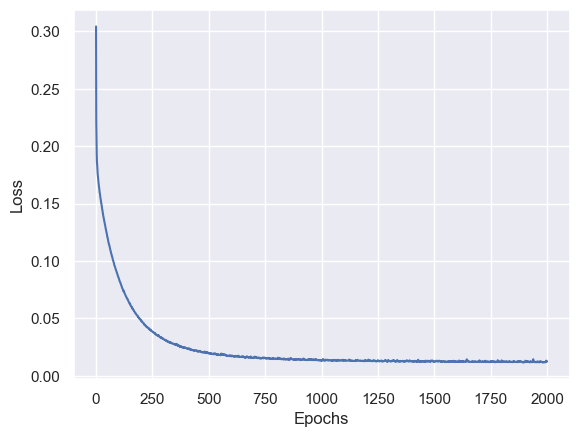

In [48]:
# Verify if is training correctly
plt.plot(historyTEFF.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

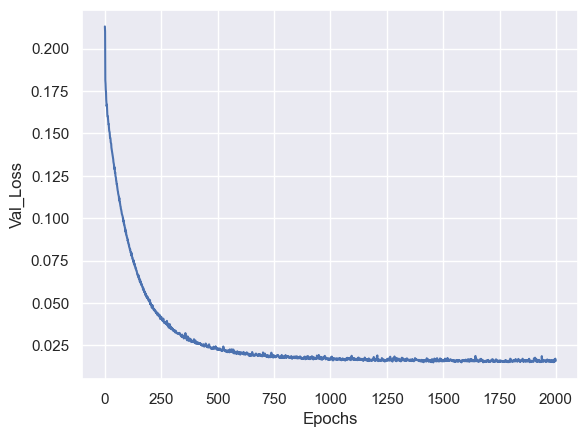

In [49]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyTEFF.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [46]:
#modelTEFF.save('modelosNovos\\Lamost-LR\\model_TEFF.h5')

In [50]:
predTeff = modelTEFF.predict(X_test)

72/72 [==============================] - 0s 2ms/step


In [47]:
Y_test

teff   logg   alpha_m    feh      TEFF
Field                                                            
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643
...                         ...    ...       ...    ...       ...
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239

[2283 rows x 5 columns]

In [51]:
predaux = encoder.decode_DataFrame(predTeff, 'teffLow')
#ytestaux = encoder.decode_DataFrame(Y_test[['teff']], 'teffLow')
#Y_test['TEFFDecoded'] = ytestaux
Y_test['TEFF_PredictDecoded'] = predaux
#del Y_test['train']

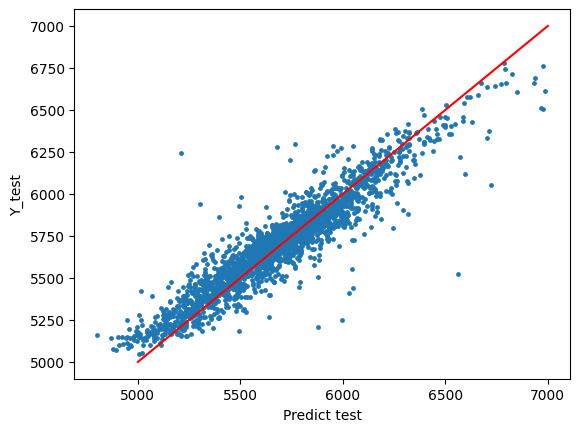

In [91]:
plt.scatter(Y_test['teff'], Y_test['TEFF_PredictDecoded'], s=6)
#plt.xlim(-0.5, 1)
#plt.ylim(-0.5, 1)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([5000, 7000], [5000, 7000], c='red')

In [109]:
score = r2_score(Y_test['teff'], Y_test['TEFF_PredictDecoded'])
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 87.0%


In [53]:
Y_test

teff   logg   alpha_m    feh      TEFF  \
Field                                                               
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807   
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751   
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289   
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491   
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643   
...                         ...    ...       ...    ...       ...   
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961   
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765   
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922   
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776   
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239   

                        TEFFDecoded  TEFF_PredictDecoded  
Field                                                     
SPLUS-s02s17_000004762      5939.09          5758.405762  
SPLUS-n01s20_000008763      5128.70          5258.210449  
SPLUS-n02n26_000010995      5405.07          5492.935547  
SPLUS-s02s10_000004604      5714.07          5675.515137  
SPLUS-n01s23_000000451      6079.06          6042.665527  
...                             ...                  ...  
SPLUS-n02n28_000004106      5461.05          5598.200684  
SPLUS-s02s13_000005813      6129.25          5940.867676  
SPLUS-s02s06_000004255      5775.88          5544.978516  
SPLUS-n02n01_000002263      5160.93          5081.707520  
SPLUS-n02s20_000006551      5220.48          5273.898438  

[2283 rows x 7 columns]

In [55]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\5-Lamost-LR-Test\\TeffPredict.csv")

## LOGG

In [82]:
modelLOGG = baseline_model_teste()

In [83]:
columnTrain = 'logg'

In [84]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyLOGG = modelLOGG.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3200
3/3 - 1s - loss: 16.4103 - val_loss: 11.4566 - 916ms/epoch - 305ms/step
Epoch 2/3200
3/3 - 0s - loss: 7.9513 - val_loss: 3.8067 - 51ms/epoch - 17ms/step
Epoch 3/3200
3/3 - 0s - loss: 5.0828 - val_loss: 2.7362 - 50ms/epoch - 17ms/step
Epoch 4/3200
3/3 - 0s - loss: 3.3496 - val_loss: 2.3216 - 49ms/epoch - 16ms/step
Epoch 5/3200
3/3 - 0s - loss: 2.3722 - val_loss: 2.6371 - 50ms/epoch - 17ms/step
Epoch 6/3200
3/3 - 0s - loss: 2.0677 - val_loss: 1.1665 - 51ms/epoch - 17ms/step
Epoch 7/3200
3/3 - 0s - loss: 1.3767 - val_loss: 0.6270 - 50ms/epoch - 17ms/step
Epoch 8/3200
3/3 - 0s - loss: 1.5375 - val_loss: 0.5668 - 50ms/epoch - 17ms/step
Epoch 9/3200
3/3 - 0s - loss: 1.1622 - val_loss: 1.0164 - 49ms/epoch - 16ms/step
Epoch 10/3200
3/3 - 0s - loss: 1.2039 - val_loss: 1.0516 - 48ms/epoch - 16ms/step
Epoch 11/3200
3/3 - 0s - loss: 1.0760 - val_loss: 0.5636 - 49ms/epoch - 16ms/step
Epoch 12/3200
3/3 - 0s - loss: 0.9799 - val_loss: 0.4321 - 51ms/epoch - 17ms/step
Epoch 13/3200
3/3 - 0

Epoch 101/3200
3/3 - 0s - loss: 0.2799 - val_loss: 1.3416 - 66ms/epoch - 22ms/step
Epoch 102/3200
3/3 - 0s - loss: 0.2834 - val_loss: 1.4137 - 70ms/epoch - 23ms/step
Epoch 103/3200
3/3 - 0s - loss: 0.2754 - val_loss: 1.4419 - 69ms/epoch - 23ms/step
Epoch 104/3200
3/3 - 0s - loss: 0.2778 - val_loss: 1.3632 - 72ms/epoch - 24ms/step
Epoch 105/3200
3/3 - 0s - loss: 0.2744 - val_loss: 1.3488 - 69ms/epoch - 23ms/step
Epoch 106/3200
3/3 - 0s - loss: 0.2752 - val_loss: 1.3789 - 63ms/epoch - 21ms/step
Epoch 107/3200
3/3 - 0s - loss: 0.2702 - val_loss: 1.3456 - 59ms/epoch - 20ms/step
Epoch 108/3200
3/3 - 0s - loss: 0.2744 - val_loss: 1.2609 - 58ms/epoch - 19ms/step
Epoch 109/3200
3/3 - 0s - loss: 0.2749 - val_loss: 1.3587 - 58ms/epoch - 19ms/step
Epoch 110/3200
3/3 - 0s - loss: 0.2695 - val_loss: 1.5174 - 65ms/epoch - 22ms/step
Epoch 111/3200
3/3 - 0s - loss: 0.2715 - val_loss: 1.3657 - 67ms/epoch - 22ms/step
Epoch 112/3200
3/3 - 0s - loss: 0.2697 - val_loss: 1.2437 - 68ms/epoch - 23ms/step
Epoc

Epoch 200/3200
3/3 - 0s - loss: 0.2044 - val_loss: 1.0308 - 56ms/epoch - 19ms/step
Epoch 201/3200
3/3 - 0s - loss: 0.2041 - val_loss: 0.9807 - 56ms/epoch - 19ms/step
Epoch 202/3200
3/3 - 0s - loss: 0.2008 - val_loss: 0.8845 - 57ms/epoch - 19ms/step
Epoch 203/3200
3/3 - 0s - loss: 0.2054 - val_loss: 0.9642 - 56ms/epoch - 19ms/step
Epoch 204/3200
3/3 - 0s - loss: 0.2019 - val_loss: 1.0501 - 54ms/epoch - 18ms/step
Epoch 205/3200
3/3 - 0s - loss: 0.2017 - val_loss: 1.0323 - 59ms/epoch - 20ms/step
Epoch 206/3200
3/3 - 0s - loss: 0.1999 - val_loss: 1.0065 - 56ms/epoch - 19ms/step
Epoch 207/3200
3/3 - 0s - loss: 0.2034 - val_loss: 0.9647 - 60ms/epoch - 20ms/step
Epoch 208/3200
3/3 - 0s - loss: 0.1986 - val_loss: 0.9903 - 67ms/epoch - 22ms/step
Epoch 209/3200
3/3 - 0s - loss: 0.1976 - val_loss: 0.9899 - 63ms/epoch - 21ms/step
Epoch 210/3200
3/3 - 0s - loss: 0.1971 - val_loss: 0.9876 - 61ms/epoch - 20ms/step
Epoch 211/3200
3/3 - 0s - loss: 0.1948 - val_loss: 0.9737 - 58ms/epoch - 19ms/step
Epoc

Epoch 299/3200
3/3 - 0s - loss: 0.1612 - val_loss: 0.7892 - 60ms/epoch - 20ms/step
Epoch 300/3200
3/3 - 0s - loss: 0.1619 - val_loss: 0.8245 - 62ms/epoch - 21ms/step
Epoch 301/3200
3/3 - 0s - loss: 0.1614 - val_loss: 0.7756 - 62ms/epoch - 21ms/step
Epoch 302/3200
3/3 - 0s - loss: 0.1620 - val_loss: 0.7544 - 62ms/epoch - 21ms/step
Epoch 303/3200
3/3 - 0s - loss: 0.1605 - val_loss: 0.7295 - 61ms/epoch - 20ms/step
Epoch 304/3200
3/3 - 0s - loss: 0.1605 - val_loss: 0.7518 - 63ms/epoch - 21ms/step
Epoch 305/3200
3/3 - 0s - loss: 0.1600 - val_loss: 0.7615 - 61ms/epoch - 20ms/step
Epoch 306/3200
3/3 - 0s - loss: 0.1591 - val_loss: 0.7181 - 62ms/epoch - 21ms/step
Epoch 307/3200
3/3 - 0s - loss: 0.1591 - val_loss: 0.7379 - 63ms/epoch - 21ms/step
Epoch 308/3200
3/3 - 0s - loss: 0.1591 - val_loss: 0.7578 - 61ms/epoch - 20ms/step
Epoch 309/3200
3/3 - 0s - loss: 0.1586 - val_loss: 0.7970 - 62ms/epoch - 21ms/step
Epoch 310/3200
3/3 - 0s - loss: 0.1587 - val_loss: 0.7365 - 62ms/epoch - 21ms/step
Epoc

Epoch 398/3200
3/3 - 0s - loss: 0.1364 - val_loss: 0.5205 - 61ms/epoch - 20ms/step
Epoch 399/3200
3/3 - 0s - loss: 0.1363 - val_loss: 0.4818 - 63ms/epoch - 21ms/step
Epoch 400/3200
3/3 - 0s - loss: 0.1351 - val_loss: 0.5447 - 64ms/epoch - 21ms/step
Epoch 401/3200
3/3 - 0s - loss: 0.1358 - val_loss: 0.5250 - 63ms/epoch - 21ms/step
Epoch 402/3200
3/3 - 0s - loss: 0.1359 - val_loss: 0.4767 - 63ms/epoch - 21ms/step
Epoch 403/3200
3/3 - 0s - loss: 0.1350 - val_loss: 0.4912 - 62ms/epoch - 21ms/step
Epoch 404/3200
3/3 - 0s - loss: 0.1343 - val_loss: 0.5640 - 63ms/epoch - 21ms/step
Epoch 405/3200
3/3 - 0s - loss: 0.1349 - val_loss: 0.4858 - 63ms/epoch - 21ms/step
Epoch 406/3200
3/3 - 0s - loss: 0.1349 - val_loss: 0.5037 - 65ms/epoch - 22ms/step
Epoch 407/3200
3/3 - 0s - loss: 0.1339 - val_loss: 0.5350 - 63ms/epoch - 21ms/step
Epoch 408/3200
3/3 - 0s - loss: 0.1340 - val_loss: 0.4693 - 62ms/epoch - 21ms/step
Epoch 409/3200
3/3 - 0s - loss: 0.1341 - val_loss: 0.4696 - 62ms/epoch - 21ms/step
Epoc

Epoch 497/3200
3/3 - 0s - loss: 0.1181 - val_loss: 0.3403 - 59ms/epoch - 20ms/step
Epoch 498/3200
3/3 - 0s - loss: 0.1178 - val_loss: 0.3530 - 60ms/epoch - 20ms/step
Epoch 499/3200
3/3 - 0s - loss: 0.1182 - val_loss: 0.3617 - 61ms/epoch - 20ms/step
Epoch 500/3200
3/3 - 0s - loss: 0.1180 - val_loss: 0.3509 - 60ms/epoch - 20ms/step
Epoch 501/3200
3/3 - 0s - loss: 0.1172 - val_loss: 0.3608 - 63ms/epoch - 21ms/step
Epoch 502/3200
3/3 - 0s - loss: 0.1169 - val_loss: 0.3464 - 59ms/epoch - 20ms/step
Epoch 503/3200
3/3 - 0s - loss: 0.1171 - val_loss: 0.3425 - 61ms/epoch - 20ms/step
Epoch 504/3200
3/3 - 0s - loss: 0.1175 - val_loss: 0.3388 - 61ms/epoch - 20ms/step
Epoch 505/3200
3/3 - 0s - loss: 0.1172 - val_loss: 0.3463 - 62ms/epoch - 21ms/step
Epoch 506/3200
3/3 - 0s - loss: 0.1163 - val_loss: 0.3384 - 61ms/epoch - 20ms/step
Epoch 507/3200
3/3 - 0s - loss: 0.1161 - val_loss: 0.3392 - 68ms/epoch - 23ms/step
Epoch 508/3200
3/3 - 0s - loss: 0.1169 - val_loss: 0.3465 - 64ms/epoch - 21ms/step
Epoc

Epoch 596/3200
3/3 - 0s - loss: 0.1055 - val_loss: 0.2644 - 57ms/epoch - 19ms/step
Epoch 597/3200
3/3 - 0s - loss: 0.1053 - val_loss: 0.2433 - 56ms/epoch - 19ms/step
Epoch 598/3200
3/3 - 0s - loss: 0.1052 - val_loss: 0.2512 - 58ms/epoch - 19ms/step
Epoch 599/3200
3/3 - 0s - loss: 0.1046 - val_loss: 0.2574 - 56ms/epoch - 19ms/step
Epoch 600/3200
3/3 - 0s - loss: 0.1045 - val_loss: 0.2363 - 58ms/epoch - 19ms/step
Epoch 601/3200
3/3 - 0s - loss: 0.1046 - val_loss: 0.2658 - 58ms/epoch - 19ms/step
Epoch 602/3200
3/3 - 0s - loss: 0.1045 - val_loss: 0.2486 - 57ms/epoch - 19ms/step
Epoch 603/3200
3/3 - 0s - loss: 0.1037 - val_loss: 0.2498 - 58ms/epoch - 19ms/step
Epoch 604/3200
3/3 - 0s - loss: 0.1045 - val_loss: 0.2728 - 58ms/epoch - 19ms/step
Epoch 605/3200
3/3 - 0s - loss: 0.1044 - val_loss: 0.2428 - 58ms/epoch - 19ms/step
Epoch 606/3200
3/3 - 0s - loss: 0.1041 - val_loss: 0.2509 - 60ms/epoch - 20ms/step
Epoch 607/3200
3/3 - 0s - loss: 0.1036 - val_loss: 0.2665 - 58ms/epoch - 19ms/step
Epoc

Epoch 695/3200
3/3 - 0s - loss: 0.0942 - val_loss: 0.1969 - 70ms/epoch - 23ms/step
Epoch 696/3200
3/3 - 0s - loss: 0.0945 - val_loss: 0.2064 - 64ms/epoch - 21ms/step
Epoch 697/3200
3/3 - 0s - loss: 0.0945 - val_loss: 0.1969 - 69ms/epoch - 23ms/step
Epoch 698/3200
3/3 - 0s - loss: 0.0948 - val_loss: 0.1906 - 61ms/epoch - 20ms/step
Epoch 699/3200
3/3 - 0s - loss: 0.0946 - val_loss: 0.2091 - 62ms/epoch - 21ms/step
Epoch 700/3200
3/3 - 0s - loss: 0.0942 - val_loss: 0.1875 - 66ms/epoch - 22ms/step
Epoch 701/3200
3/3 - 0s - loss: 0.0936 - val_loss: 0.2000 - 66ms/epoch - 22ms/step
Epoch 702/3200
3/3 - 0s - loss: 0.0942 - val_loss: 0.2023 - 61ms/epoch - 20ms/step
Epoch 703/3200
3/3 - 0s - loss: 0.0938 - val_loss: 0.1807 - 63ms/epoch - 21ms/step
Epoch 704/3200
3/3 - 0s - loss: 0.0941 - val_loss: 0.2012 - 58ms/epoch - 19ms/step
Epoch 705/3200
3/3 - 0s - loss: 0.0939 - val_loss: 0.1965 - 59ms/epoch - 20ms/step
Epoch 706/3200
3/3 - 0s - loss: 0.0936 - val_loss: 0.1889 - 64ms/epoch - 21ms/step
Epoc

Epoch 794/3200
3/3 - 0s - loss: 0.0861 - val_loss: 0.1670 - 61ms/epoch - 20ms/step
Epoch 795/3200
3/3 - 0s - loss: 0.0857 - val_loss: 0.1599 - 67ms/epoch - 22ms/step
Epoch 796/3200
3/3 - 0s - loss: 0.0857 - val_loss: 0.1687 - 68ms/epoch - 23ms/step
Epoch 797/3200
3/3 - 0s - loss: 0.0858 - val_loss: 0.1591 - 67ms/epoch - 22ms/step
Epoch 798/3200
3/3 - 0s - loss: 0.0858 - val_loss: 0.1668 - 63ms/epoch - 21ms/step
Epoch 799/3200
3/3 - 0s - loss: 0.0856 - val_loss: 0.1662 - 61ms/epoch - 20ms/step
Epoch 800/3200
3/3 - 0s - loss: 0.0856 - val_loss: 0.1547 - 55ms/epoch - 18ms/step
Epoch 801/3200
3/3 - 0s - loss: 0.0855 - val_loss: 0.1729 - 56ms/epoch - 19ms/step
Epoch 802/3200
3/3 - 0s - loss: 0.0852 - val_loss: 0.1541 - 55ms/epoch - 18ms/step
Epoch 803/3200
3/3 - 0s - loss: 0.0852 - val_loss: 0.1693 - 57ms/epoch - 19ms/step
Epoch 804/3200
3/3 - 0s - loss: 0.0849 - val_loss: 0.1656 - 56ms/epoch - 19ms/step
Epoch 805/3200
3/3 - 0s - loss: 0.0851 - val_loss: 0.1538 - 56ms/epoch - 19ms/step
Epoc

Epoch 893/3200
3/3 - 0s - loss: 0.0780 - val_loss: 0.1325 - 60ms/epoch - 20ms/step
Epoch 894/3200
3/3 - 0s - loss: 0.0780 - val_loss: 0.1384 - 59ms/epoch - 20ms/step
Epoch 895/3200
3/3 - 0s - loss: 0.0783 - val_loss: 0.1305 - 60ms/epoch - 20ms/step
Epoch 896/3200
3/3 - 0s - loss: 0.0780 - val_loss: 0.1338 - 60ms/epoch - 20ms/step
Epoch 897/3200
3/3 - 0s - loss: 0.0781 - val_loss: 0.1325 - 60ms/epoch - 20ms/step
Epoch 898/3200
3/3 - 0s - loss: 0.0779 - val_loss: 0.1313 - 60ms/epoch - 20ms/step
Epoch 899/3200
3/3 - 0s - loss: 0.0779 - val_loss: 0.1354 - 59ms/epoch - 20ms/step
Epoch 900/3200
3/3 - 0s - loss: 0.0780 - val_loss: 0.1360 - 60ms/epoch - 20ms/step
Epoch 901/3200
3/3 - 0s - loss: 0.0776 - val_loss: 0.1320 - 60ms/epoch - 20ms/step
Epoch 902/3200
3/3 - 0s - loss: 0.0774 - val_loss: 0.1365 - 59ms/epoch - 20ms/step
Epoch 903/3200
3/3 - 0s - loss: 0.0772 - val_loss: 0.1325 - 59ms/epoch - 20ms/step
Epoch 904/3200
3/3 - 0s - loss: 0.0774 - val_loss: 0.1315 - 59ms/epoch - 20ms/step
Epoc

Epoch 992/3200
3/3 - 0s - loss: 0.0712 - val_loss: 0.1144 - 59ms/epoch - 20ms/step
Epoch 993/3200
3/3 - 0s - loss: 0.0712 - val_loss: 0.1198 - 59ms/epoch - 20ms/step
Epoch 994/3200
3/3 - 0s - loss: 0.0708 - val_loss: 0.1105 - 61ms/epoch - 20ms/step
Epoch 995/3200
3/3 - 0s - loss: 0.0715 - val_loss: 0.1179 - 62ms/epoch - 21ms/step
Epoch 996/3200
3/3 - 0s - loss: 0.0713 - val_loss: 0.1176 - 61ms/epoch - 20ms/step
Epoch 997/3200
3/3 - 0s - loss: 0.0714 - val_loss: 0.1093 - 59ms/epoch - 20ms/step
Epoch 998/3200
3/3 - 0s - loss: 0.0715 - val_loss: 0.1233 - 60ms/epoch - 20ms/step
Epoch 999/3200
3/3 - 0s - loss: 0.0712 - val_loss: 0.1150 - 60ms/epoch - 20ms/step
Epoch 1000/3200
3/3 - 0s - loss: 0.0708 - val_loss: 0.1130 - 60ms/epoch - 20ms/step
Epoch 1001/3200
3/3 - 0s - loss: 0.0710 - val_loss: 0.1205 - 61ms/epoch - 20ms/step
Epoch 1002/3200
3/3 - 0s - loss: 0.0707 - val_loss: 0.1086 - 60ms/epoch - 20ms/step
Epoch 1003/3200
3/3 - 0s - loss: 0.0709 - val_loss: 0.1230 - 60ms/epoch - 20ms/step


Epoch 1090/3200
3/3 - 0s - loss: 0.0657 - val_loss: 0.1047 - 59ms/epoch - 20ms/step
Epoch 1091/3200
3/3 - 0s - loss: 0.0657 - val_loss: 0.0956 - 58ms/epoch - 19ms/step
Epoch 1092/3200
3/3 - 0s - loss: 0.0657 - val_loss: 0.0975 - 58ms/epoch - 19ms/step
Epoch 1093/3200
3/3 - 0s - loss: 0.0655 - val_loss: 0.1061 - 58ms/epoch - 19ms/step
Epoch 1094/3200
3/3 - 0s - loss: 0.0656 - val_loss: 0.0973 - 58ms/epoch - 19ms/step
Epoch 1095/3200
3/3 - 0s - loss: 0.0652 - val_loss: 0.1015 - 59ms/epoch - 20ms/step
Epoch 1096/3200
3/3 - 0s - loss: 0.0649 - val_loss: 0.1016 - 69ms/epoch - 23ms/step
Epoch 1097/3200
3/3 - 0s - loss: 0.0651 - val_loss: 0.0972 - 58ms/epoch - 19ms/step
Epoch 1098/3200
3/3 - 0s - loss: 0.0650 - val_loss: 0.0937 - 69ms/epoch - 23ms/step
Epoch 1099/3200
3/3 - 0s - loss: 0.0654 - val_loss: 0.1039 - 60ms/epoch - 20ms/step
Epoch 1100/3200
3/3 - 0s - loss: 0.0653 - val_loss: 0.0983 - 71ms/epoch - 24ms/step
Epoch 1101/3200
3/3 - 0s - loss: 0.0646 - val_loss: 0.0950 - 59ms/epoch - 20

Epoch 1188/3200
3/3 - 0s - loss: 0.0603 - val_loss: 0.0885 - 57ms/epoch - 19ms/step
Epoch 1189/3200
3/3 - 0s - loss: 0.0602 - val_loss: 0.0861 - 58ms/epoch - 19ms/step
Epoch 1190/3200
3/3 - 0s - loss: 0.0603 - val_loss: 0.0872 - 57ms/epoch - 19ms/step
Epoch 1191/3200
3/3 - 0s - loss: 0.0602 - val_loss: 0.0901 - 56ms/epoch - 19ms/step
Epoch 1192/3200
3/3 - 0s - loss: 0.0599 - val_loss: 0.0887 - 58ms/epoch - 19ms/step
Epoch 1193/3200
3/3 - 0s - loss: 0.0599 - val_loss: 0.0844 - 57ms/epoch - 19ms/step
Epoch 1194/3200
3/3 - 0s - loss: 0.0601 - val_loss: 0.0884 - 67ms/epoch - 22ms/step
Epoch 1195/3200
3/3 - 0s - loss: 0.0599 - val_loss: 0.0911 - 70ms/epoch - 23ms/step
Epoch 1196/3200
3/3 - 0s - loss: 0.0597 - val_loss: 0.0856 - 70ms/epoch - 23ms/step
Epoch 1197/3200
3/3 - 0s - loss: 0.0601 - val_loss: 0.0878 - 71ms/epoch - 24ms/step
Epoch 1198/3200
3/3 - 0s - loss: 0.0596 - val_loss: 0.0884 - 68ms/epoch - 23ms/step
Epoch 1199/3200
3/3 - 0s - loss: 0.0599 - val_loss: 0.0909 - 66ms/epoch - 22

Epoch 1286/3200
3/3 - 0s - loss: 0.0556 - val_loss: 0.0823 - 59ms/epoch - 20ms/step
Epoch 1287/3200
3/3 - 0s - loss: 0.0556 - val_loss: 0.0759 - 55ms/epoch - 18ms/step
Epoch 1288/3200
3/3 - 0s - loss: 0.0552 - val_loss: 0.0752 - 56ms/epoch - 19ms/step
Epoch 1289/3200
3/3 - 0s - loss: 0.0558 - val_loss: 0.0755 - 57ms/epoch - 19ms/step
Epoch 1290/3200
3/3 - 0s - loss: 0.0552 - val_loss: 0.0762 - 58ms/epoch - 19ms/step
Epoch 1291/3200
3/3 - 0s - loss: 0.0553 - val_loss: 0.0838 - 57ms/epoch - 19ms/step
Epoch 1292/3200
3/3 - 0s - loss: 0.0554 - val_loss: 0.0788 - 56ms/epoch - 19ms/step
Epoch 1293/3200
3/3 - 0s - loss: 0.0556 - val_loss: 0.0690 - 57ms/epoch - 19ms/step
Epoch 1294/3200
3/3 - 0s - loss: 0.0557 - val_loss: 0.0786 - 57ms/epoch - 19ms/step
Epoch 1295/3200
3/3 - 0s - loss: 0.0551 - val_loss: 0.0809 - 56ms/epoch - 19ms/step
Epoch 1296/3200
3/3 - 0s - loss: 0.0555 - val_loss: 0.0757 - 69ms/epoch - 23ms/step
Epoch 1297/3200
3/3 - 0s - loss: 0.0549 - val_loss: 0.0737 - 57ms/epoch - 19

Epoch 1384/3200
3/3 - 0s - loss: 0.0513 - val_loss: 0.0682 - 59ms/epoch - 20ms/step
Epoch 1385/3200
3/3 - 0s - loss: 0.0516 - val_loss: 0.0689 - 62ms/epoch - 21ms/step
Epoch 1386/3200
3/3 - 0s - loss: 0.0512 - val_loss: 0.0704 - 59ms/epoch - 20ms/step
Epoch 1387/3200
3/3 - 0s - loss: 0.0512 - val_loss: 0.0671 - 59ms/epoch - 20ms/step
Epoch 1388/3200
3/3 - 0s - loss: 0.0511 - val_loss: 0.0678 - 59ms/epoch - 20ms/step
Epoch 1389/3200
3/3 - 0s - loss: 0.0509 - val_loss: 0.0742 - 59ms/epoch - 20ms/step
Epoch 1390/3200
3/3 - 0s - loss: 0.0514 - val_loss: 0.0674 - 59ms/epoch - 20ms/step
Epoch 1391/3200
3/3 - 0s - loss: 0.0510 - val_loss: 0.0639 - 59ms/epoch - 20ms/step
Epoch 1392/3200
3/3 - 0s - loss: 0.0515 - val_loss: 0.0708 - 60ms/epoch - 20ms/step
Epoch 1393/3200
3/3 - 0s - loss: 0.0510 - val_loss: 0.0722 - 61ms/epoch - 20ms/step
Epoch 1394/3200
3/3 - 0s - loss: 0.0513 - val_loss: 0.0692 - 65ms/epoch - 22ms/step
Epoch 1395/3200
3/3 - 0s - loss: 0.0510 - val_loss: 0.0656 - 59ms/epoch - 20

Epoch 1482/3200
3/3 - 0s - loss: 0.0478 - val_loss: 0.0593 - 58ms/epoch - 19ms/step
Epoch 1483/3200
3/3 - 0s - loss: 0.0475 - val_loss: 0.0634 - 60ms/epoch - 20ms/step
Epoch 1484/3200
3/3 - 0s - loss: 0.0478 - val_loss: 0.0648 - 59ms/epoch - 20ms/step
Epoch 1485/3200
3/3 - 0s - loss: 0.0473 - val_loss: 0.0608 - 63ms/epoch - 21ms/step
Epoch 1486/3200
3/3 - 0s - loss: 0.0474 - val_loss: 0.0585 - 60ms/epoch - 20ms/step
Epoch 1487/3200
3/3 - 0s - loss: 0.0477 - val_loss: 0.0632 - 62ms/epoch - 21ms/step
Epoch 1488/3200
3/3 - 0s - loss: 0.0471 - val_loss: 0.0655 - 60ms/epoch - 20ms/step
Epoch 1489/3200
3/3 - 0s - loss: 0.0473 - val_loss: 0.0634 - 59ms/epoch - 20ms/step
Epoch 1490/3200
3/3 - 0s - loss: 0.0473 - val_loss: 0.0605 - 60ms/epoch - 20ms/step
Epoch 1491/3200
3/3 - 0s - loss: 0.0474 - val_loss: 0.0603 - 58ms/epoch - 19ms/step
Epoch 1492/3200
3/3 - 0s - loss: 0.0472 - val_loss: 0.0605 - 59ms/epoch - 20ms/step
Epoch 1493/3200
3/3 - 0s - loss: 0.0476 - val_loss: 0.0647 - 60ms/epoch - 20

Epoch 1580/3200
3/3 - 0s - loss: 0.0441 - val_loss: 0.0589 - 60ms/epoch - 20ms/step
Epoch 1581/3200
3/3 - 0s - loss: 0.0442 - val_loss: 0.0572 - 61ms/epoch - 20ms/step
Epoch 1582/3200
3/3 - 0s - loss: 0.0442 - val_loss: 0.0561 - 59ms/epoch - 20ms/step
Epoch 1583/3200
3/3 - 0s - loss: 0.0441 - val_loss: 0.0543 - 63ms/epoch - 21ms/step
Epoch 1584/3200
3/3 - 0s - loss: 0.0445 - val_loss: 0.0591 - 61ms/epoch - 20ms/step
Epoch 1585/3200
3/3 - 0s - loss: 0.0445 - val_loss: 0.0629 - 59ms/epoch - 20ms/step
Epoch 1586/3200
3/3 - 0s - loss: 0.0448 - val_loss: 0.0588 - 61ms/epoch - 20ms/step
Epoch 1587/3200
3/3 - 0s - loss: 0.0445 - val_loss: 0.0502 - 61ms/epoch - 20ms/step
Epoch 1588/3200
3/3 - 0s - loss: 0.0447 - val_loss: 0.0560 - 62ms/epoch - 21ms/step
Epoch 1589/3200
3/3 - 0s - loss: 0.0443 - val_loss: 0.0584 - 60ms/epoch - 20ms/step
Epoch 1590/3200
3/3 - 0s - loss: 0.0442 - val_loss: 0.0591 - 62ms/epoch - 21ms/step
Epoch 1591/3200
3/3 - 0s - loss: 0.0442 - val_loss: 0.0542 - 61ms/epoch - 20

Epoch 1678/3200
3/3 - 0s - loss: 0.0424 - val_loss: 0.0534 - 59ms/epoch - 20ms/step
Epoch 1679/3200
3/3 - 0s - loss: 0.0419 - val_loss: 0.0589 - 62ms/epoch - 21ms/step
Epoch 1680/3200
3/3 - 0s - loss: 0.0420 - val_loss: 0.0495 - 61ms/epoch - 20ms/step
Epoch 1681/3200
3/3 - 0s - loss: 0.0415 - val_loss: 0.0496 - 62ms/epoch - 21ms/step
Epoch 1682/3200
3/3 - 0s - loss: 0.0413 - val_loss: 0.0561 - 58ms/epoch - 19ms/step
Epoch 1683/3200
3/3 - 0s - loss: 0.0416 - val_loss: 0.0514 - 60ms/epoch - 20ms/step
Epoch 1684/3200
3/3 - 0s - loss: 0.0417 - val_loss: 0.0483 - 59ms/epoch - 20ms/step
Epoch 1685/3200
3/3 - 0s - loss: 0.0416 - val_loss: 0.0518 - 59ms/epoch - 20ms/step
Epoch 1686/3200
3/3 - 0s - loss: 0.0415 - val_loss: 0.0578 - 59ms/epoch - 20ms/step
Epoch 1687/3200
3/3 - 0s - loss: 0.0419 - val_loss: 0.0482 - 61ms/epoch - 20ms/step
Epoch 1688/3200
3/3 - 0s - loss: 0.0414 - val_loss: 0.0490 - 60ms/epoch - 20ms/step
Epoch 1689/3200
3/3 - 0s - loss: 0.0414 - val_loss: 0.0550 - 59ms/epoch - 20

Epoch 1776/3200
3/3 - 0s - loss: 0.0388 - val_loss: 0.0483 - 61ms/epoch - 20ms/step
Epoch 1777/3200
3/3 - 0s - loss: 0.0391 - val_loss: 0.0440 - 61ms/epoch - 20ms/step
Epoch 1778/3200
3/3 - 0s - loss: 0.0395 - val_loss: 0.0499 - 60ms/epoch - 20ms/step
Epoch 1779/3200
3/3 - 0s - loss: 0.0393 - val_loss: 0.0511 - 62ms/epoch - 21ms/step
Epoch 1780/3200
3/3 - 0s - loss: 0.0391 - val_loss: 0.0472 - 61ms/epoch - 20ms/step
Epoch 1781/3200
3/3 - 0s - loss: 0.0389 - val_loss: 0.0457 - 61ms/epoch - 20ms/step
Epoch 1782/3200
3/3 - 0s - loss: 0.0389 - val_loss: 0.0471 - 60ms/epoch - 20ms/step
Epoch 1783/3200
3/3 - 0s - loss: 0.0389 - val_loss: 0.0496 - 60ms/epoch - 20ms/step
Epoch 1784/3200
3/3 - 0s - loss: 0.0387 - val_loss: 0.0481 - 61ms/epoch - 20ms/step
Epoch 1785/3200
3/3 - 0s - loss: 0.0391 - val_loss: 0.0467 - 64ms/epoch - 21ms/step
Epoch 1786/3200
3/3 - 0s - loss: 0.0386 - val_loss: 0.0451 - 60ms/epoch - 20ms/step
Epoch 1787/3200
3/3 - 0s - loss: 0.0387 - val_loss: 0.0439 - 61ms/epoch - 20

Epoch 1874/3200
3/3 - 0s - loss: 0.0373 - val_loss: 0.0457 - 58ms/epoch - 19ms/step
Epoch 1875/3200
3/3 - 0s - loss: 0.0369 - val_loss: 0.0513 - 61ms/epoch - 20ms/step
Epoch 1876/3200
3/3 - 0s - loss: 0.0374 - val_loss: 0.0473 - 59ms/epoch - 20ms/step
Epoch 1877/3200
3/3 - 0s - loss: 0.0377 - val_loss: 0.0427 - 59ms/epoch - 20ms/step
Epoch 1878/3200
3/3 - 0s - loss: 0.0371 - val_loss: 0.0415 - 62ms/epoch - 21ms/step
Epoch 1879/3200
3/3 - 0s - loss: 0.0369 - val_loss: 0.0432 - 59ms/epoch - 20ms/step
Epoch 1880/3200
3/3 - 0s - loss: 0.0369 - val_loss: 0.0467 - 63ms/epoch - 21ms/step
Epoch 1881/3200
3/3 - 0s - loss: 0.0367 - val_loss: 0.0462 - 59ms/epoch - 20ms/step
Epoch 1882/3200
3/3 - 0s - loss: 0.0369 - val_loss: 0.0452 - 59ms/epoch - 20ms/step
Epoch 1883/3200
3/3 - 0s - loss: 0.0369 - val_loss: 0.0441 - 60ms/epoch - 20ms/step
Epoch 1884/3200
3/3 - 0s - loss: 0.0368 - val_loss: 0.0413 - 60ms/epoch - 20ms/step
Epoch 1885/3200
3/3 - 0s - loss: 0.0369 - val_loss: 0.0397 - 60ms/epoch - 20

Epoch 1972/3200
3/3 - 0s - loss: 0.0352 - val_loss: 0.0432 - 62ms/epoch - 21ms/step
Epoch 1973/3200
3/3 - 0s - loss: 0.0350 - val_loss: 0.0413 - 59ms/epoch - 20ms/step
Epoch 1974/3200
3/3 - 0s - loss: 0.0350 - val_loss: 0.0399 - 60ms/epoch - 20ms/step
Epoch 1975/3200
3/3 - 0s - loss: 0.0350 - val_loss: 0.0411 - 61ms/epoch - 20ms/step
Epoch 1976/3200
3/3 - 0s - loss: 0.0351 - val_loss: 0.0423 - 62ms/epoch - 21ms/step
Epoch 1977/3200
3/3 - 0s - loss: 0.0347 - val_loss: 0.0447 - 64ms/epoch - 21ms/step
Epoch 1978/3200
3/3 - 0s - loss: 0.0351 - val_loss: 0.0442 - 60ms/epoch - 20ms/step
Epoch 1979/3200
3/3 - 0s - loss: 0.0350 - val_loss: 0.0419 - 61ms/epoch - 20ms/step
Epoch 1980/3200
3/3 - 0s - loss: 0.0348 - val_loss: 0.0425 - 64ms/epoch - 21ms/step
Epoch 1981/3200
3/3 - 0s - loss: 0.0350 - val_loss: 0.0430 - 60ms/epoch - 20ms/step
Epoch 1982/3200
3/3 - 0s - loss: 0.0350 - val_loss: 0.0429 - 60ms/epoch - 20ms/step
Epoch 1983/3200
3/3 - 0s - loss: 0.0351 - val_loss: 0.0398 - 60ms/epoch - 20

Epoch 2070/3200
3/3 - 0s - loss: 0.0335 - val_loss: 0.0398 - 61ms/epoch - 20ms/step
Epoch 2071/3200
3/3 - 0s - loss: 0.0333 - val_loss: 0.0404 - 60ms/epoch - 20ms/step
Epoch 2072/3200
3/3 - 0s - loss: 0.0335 - val_loss: 0.0384 - 60ms/epoch - 20ms/step
Epoch 2073/3200
3/3 - 0s - loss: 0.0339 - val_loss: 0.0373 - 62ms/epoch - 21ms/step
Epoch 2074/3200
3/3 - 0s - loss: 0.0337 - val_loss: 0.0369 - 61ms/epoch - 20ms/step
Epoch 2075/3200
3/3 - 0s - loss: 0.0334 - val_loss: 0.0388 - 62ms/epoch - 21ms/step
Epoch 2076/3200
3/3 - 0s - loss: 0.0335 - val_loss: 0.0390 - 61ms/epoch - 20ms/step
Epoch 2077/3200
3/3 - 0s - loss: 0.0336 - val_loss: 0.0392 - 60ms/epoch - 20ms/step
Epoch 2078/3200
3/3 - 0s - loss: 0.0334 - val_loss: 0.0393 - 61ms/epoch - 20ms/step
Epoch 2079/3200
3/3 - 0s - loss: 0.0335 - val_loss: 0.0397 - 60ms/epoch - 20ms/step
Epoch 2080/3200
3/3 - 0s - loss: 0.0333 - val_loss: 0.0385 - 61ms/epoch - 20ms/step
Epoch 2081/3200
3/3 - 0s - loss: 0.0333 - val_loss: 0.0394 - 62ms/epoch - 21

Epoch 2168/3200
3/3 - 0s - loss: 0.0328 - val_loss: 0.0380 - 61ms/epoch - 20ms/step
Epoch 2169/3200
3/3 - 0s - loss: 0.0322 - val_loss: 0.0376 - 69ms/epoch - 23ms/step
Epoch 2170/3200
3/3 - 0s - loss: 0.0321 - val_loss: 0.0354 - 109ms/epoch - 36ms/step
Epoch 2171/3200
3/3 - 0s - loss: 0.0321 - val_loss: 0.0375 - 61ms/epoch - 20ms/step
Epoch 2172/3200
3/3 - 0s - loss: 0.0323 - val_loss: 0.0361 - 70ms/epoch - 23ms/step
Epoch 2173/3200
3/3 - 0s - loss: 0.0323 - val_loss: 0.0407 - 59ms/epoch - 20ms/step
Epoch 2174/3200
3/3 - 0s - loss: 0.0324 - val_loss: 0.0423 - 60ms/epoch - 20ms/step
Epoch 2175/3200
3/3 - 0s - loss: 0.0325 - val_loss: 0.0431 - 60ms/epoch - 20ms/step
Epoch 2176/3200
3/3 - 0s - loss: 0.0326 - val_loss: 0.0369 - 60ms/epoch - 20ms/step
Epoch 2177/3200
3/3 - 0s - loss: 0.0325 - val_loss: 0.0373 - 60ms/epoch - 20ms/step
Epoch 2178/3200
3/3 - 0s - loss: 0.0320 - val_loss: 0.0375 - 60ms/epoch - 20ms/step
Epoch 2179/3200
3/3 - 0s - loss: 0.0321 - val_loss: 0.0368 - 62ms/epoch - 2

Epoch 2266/3200
3/3 - 0s - loss: 0.0316 - val_loss: 0.0348 - 48ms/epoch - 16ms/step
Epoch 2267/3200
3/3 - 0s - loss: 0.0311 - val_loss: 0.0332 - 47ms/epoch - 16ms/step
Epoch 2268/3200
3/3 - 0s - loss: 0.0314 - val_loss: 0.0345 - 49ms/epoch - 16ms/step
Epoch 2269/3200
3/3 - 0s - loss: 0.0312 - val_loss: 0.0349 - 48ms/epoch - 16ms/step
Epoch 2270/3200
3/3 - 0s - loss: 0.0310 - val_loss: 0.0377 - 48ms/epoch - 16ms/step
Epoch 2271/3200
3/3 - 0s - loss: 0.0308 - val_loss: 0.0359 - 48ms/epoch - 16ms/step
Epoch 2272/3200
3/3 - 0s - loss: 0.0308 - val_loss: 0.0363 - 47ms/epoch - 16ms/step
Epoch 2273/3200
3/3 - 0s - loss: 0.0310 - val_loss: 0.0353 - 53ms/epoch - 18ms/step
Epoch 2274/3200
3/3 - 0s - loss: 0.0308 - val_loss: 0.0339 - 60ms/epoch - 20ms/step
Epoch 2275/3200
3/3 - 0s - loss: 0.0310 - val_loss: 0.0336 - 59ms/epoch - 20ms/step
Epoch 2276/3200
3/3 - 0s - loss: 0.0311 - val_loss: 0.0336 - 51ms/epoch - 17ms/step
Epoch 2277/3200
3/3 - 0s - loss: 0.0312 - val_loss: 0.0351 - 47ms/epoch - 16

Epoch 2364/3200
3/3 - 0s - loss: 0.0307 - val_loss: 0.0319 - 69ms/epoch - 23ms/step
Epoch 2365/3200
3/3 - 0s - loss: 0.0306 - val_loss: 0.0386 - 65ms/epoch - 22ms/step
Epoch 2366/3200
3/3 - 0s - loss: 0.0309 - val_loss: 0.0422 - 69ms/epoch - 23ms/step
Epoch 2367/3200
3/3 - 0s - loss: 0.0315 - val_loss: 0.0350 - 83ms/epoch - 28ms/step
Epoch 2368/3200
3/3 - 0s - loss: 0.0308 - val_loss: 0.0327 - 63ms/epoch - 21ms/step
Epoch 2369/3200
3/3 - 0s - loss: 0.0303 - val_loss: 0.0321 - 68ms/epoch - 23ms/step
Epoch 2370/3200
3/3 - 0s - loss: 0.0306 - val_loss: 0.0341 - 61ms/epoch - 20ms/step
Epoch 2371/3200
3/3 - 0s - loss: 0.0303 - val_loss: 0.0378 - 63ms/epoch - 21ms/step
Epoch 2372/3200
3/3 - 0s - loss: 0.0305 - val_loss: 0.0346 - 77ms/epoch - 26ms/step
Epoch 2373/3200
3/3 - 0s - loss: 0.0303 - val_loss: 0.0324 - 62ms/epoch - 21ms/step
Epoch 2374/3200
3/3 - 0s - loss: 0.0304 - val_loss: 0.0311 - 60ms/epoch - 20ms/step
Epoch 2375/3200
3/3 - 0s - loss: 0.0310 - val_loss: 0.0351 - 61ms/epoch - 20

Epoch 2462/3200
3/3 - 0s - loss: 0.0294 - val_loss: 0.0323 - 65ms/epoch - 22ms/step
Epoch 2463/3200
3/3 - 0s - loss: 0.0299 - val_loss: 0.0349 - 58ms/epoch - 19ms/step
Epoch 2464/3200
3/3 - 0s - loss: 0.0296 - val_loss: 0.0368 - 57ms/epoch - 19ms/step
Epoch 2465/3200
3/3 - 0s - loss: 0.0296 - val_loss: 0.0351 - 61ms/epoch - 20ms/step
Epoch 2466/3200
3/3 - 0s - loss: 0.0298 - val_loss: 0.0325 - 65ms/epoch - 22ms/step
Epoch 2467/3200
3/3 - 0s - loss: 0.0297 - val_loss: 0.0315 - 60ms/epoch - 20ms/step
Epoch 2468/3200
3/3 - 0s - loss: 0.0305 - val_loss: 0.0329 - 59ms/epoch - 20ms/step
Epoch 2469/3200
3/3 - 0s - loss: 0.0298 - val_loss: 0.0379 - 59ms/epoch - 20ms/step
Epoch 2470/3200
3/3 - 0s - loss: 0.0299 - val_loss: 0.0341 - 61ms/epoch - 20ms/step
Epoch 2471/3200
3/3 - 0s - loss: 0.0296 - val_loss: 0.0319 - 60ms/epoch - 20ms/step
Epoch 2472/3200
3/3 - 0s - loss: 0.0294 - val_loss: 0.0332 - 60ms/epoch - 20ms/step
Epoch 2473/3200
3/3 - 0s - loss: 0.0294 - val_loss: 0.0333 - 59ms/epoch - 20

Epoch 2560/3200
3/3 - 0s - loss: 0.0291 - val_loss: 0.0363 - 57ms/epoch - 19ms/step
Epoch 2561/3200
3/3 - 0s - loss: 0.0291 - val_loss: 0.0362 - 56ms/epoch - 19ms/step
Epoch 2562/3200
3/3 - 0s - loss: 0.0292 - val_loss: 0.0353 - 57ms/epoch - 19ms/step
Epoch 2563/3200
3/3 - 0s - loss: 0.0289 - val_loss: 0.0319 - 55ms/epoch - 18ms/step
Epoch 2564/3200
3/3 - 0s - loss: 0.0294 - val_loss: 0.0317 - 61ms/epoch - 20ms/step
Epoch 2565/3200
3/3 - 0s - loss: 0.0288 - val_loss: 0.0319 - 56ms/epoch - 19ms/step
Epoch 2566/3200
3/3 - 0s - loss: 0.0286 - val_loss: 0.0330 - 55ms/epoch - 18ms/step
Epoch 2567/3200
3/3 - 0s - loss: 0.0285 - val_loss: 0.0325 - 57ms/epoch - 19ms/step
Epoch 2568/3200
3/3 - 0s - loss: 0.0285 - val_loss: 0.0358 - 59ms/epoch - 20ms/step
Epoch 2569/3200
3/3 - 0s - loss: 0.0293 - val_loss: 0.0365 - 56ms/epoch - 19ms/step
Epoch 2570/3200
3/3 - 0s - loss: 0.0296 - val_loss: 0.0360 - 59ms/epoch - 20ms/step
Epoch 2571/3200
3/3 - 0s - loss: 0.0301 - val_loss: 0.0314 - 56ms/epoch - 19

Epoch 2658/3200
3/3 - 0s - loss: 0.0281 - val_loss: 0.0309 - 59ms/epoch - 20ms/step
Epoch 2659/3200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0315 - 60ms/epoch - 20ms/step
Epoch 2660/3200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0325 - 59ms/epoch - 20ms/step
Epoch 2661/3200
3/3 - 0s - loss: 0.0282 - val_loss: 0.0326 - 60ms/epoch - 20ms/step
Epoch 2662/3200
3/3 - 0s - loss: 0.0282 - val_loss: 0.0335 - 60ms/epoch - 20ms/step
Epoch 2663/3200
3/3 - 0s - loss: 0.0285 - val_loss: 0.0344 - 61ms/epoch - 20ms/step
Epoch 2664/3200
3/3 - 0s - loss: 0.0285 - val_loss: 0.0331 - 61ms/epoch - 20ms/step
Epoch 2665/3200
3/3 - 0s - loss: 0.0282 - val_loss: 0.0325 - 61ms/epoch - 20ms/step
Epoch 2666/3200
3/3 - 0s - loss: 0.0283 - val_loss: 0.0325 - 62ms/epoch - 21ms/step
Epoch 2667/3200
3/3 - 0s - loss: 0.0283 - val_loss: 0.0322 - 60ms/epoch - 20ms/step
Epoch 2668/3200
3/3 - 0s - loss: 0.0286 - val_loss: 0.0303 - 61ms/epoch - 20ms/step
Epoch 2669/3200
3/3 - 0s - loss: 0.0286 - val_loss: 0.0302 - 61ms/epoch - 20

Epoch 2756/3200
3/3 - 0s - loss: 0.0284 - val_loss: 0.0316 - 62ms/epoch - 21ms/step
Epoch 2757/3200
3/3 - 0s - loss: 0.0276 - val_loss: 0.0336 - 61ms/epoch - 20ms/step
Epoch 2758/3200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0328 - 59ms/epoch - 20ms/step
Epoch 2759/3200
3/3 - 0s - loss: 0.0280 - val_loss: 0.0306 - 64ms/epoch - 21ms/step
Epoch 2760/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0321 - 59ms/epoch - 20ms/step
Epoch 2761/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0326 - 60ms/epoch - 20ms/step
Epoch 2762/3200
3/3 - 0s - loss: 0.0275 - val_loss: 0.0335 - 61ms/epoch - 20ms/step
Epoch 2763/3200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0326 - 60ms/epoch - 20ms/step
Epoch 2764/3200
3/3 - 0s - loss: 0.0276 - val_loss: 0.0315 - 59ms/epoch - 20ms/step
Epoch 2765/3200
3/3 - 0s - loss: 0.0274 - val_loss: 0.0311 - 62ms/epoch - 21ms/step
Epoch 2766/3200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0305 - 60ms/epoch - 20ms/step
Epoch 2767/3200
3/3 - 0s - loss: 0.0278 - val_loss: 0.0298 - 60ms/epoch - 20

Epoch 2854/3200
3/3 - 0s - loss: 0.0279 - val_loss: 0.0341 - 56ms/epoch - 19ms/step
Epoch 2855/3200
3/3 - 0s - loss: 0.0278 - val_loss: 0.0343 - 57ms/epoch - 19ms/step
Epoch 2856/3200
3/3 - 0s - loss: 0.0282 - val_loss: 0.0313 - 57ms/epoch - 19ms/step
Epoch 2857/3200
3/3 - 0s - loss: 0.0274 - val_loss: 0.0302 - 58ms/epoch - 19ms/step
Epoch 2858/3200
3/3 - 0s - loss: 0.0276 - val_loss: 0.0303 - 57ms/epoch - 19ms/step
Epoch 2859/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0307 - 57ms/epoch - 19ms/step
Epoch 2860/3200
3/3 - 0s - loss: 0.0276 - val_loss: 0.0315 - 58ms/epoch - 19ms/step
Epoch 2861/3200
3/3 - 0s - loss: 0.0275 - val_loss: 0.0330 - 56ms/epoch - 19ms/step
Epoch 2862/3200
3/3 - 0s - loss: 0.0275 - val_loss: 0.0321 - 57ms/epoch - 19ms/step
Epoch 2863/3200
3/3 - 0s - loss: 0.0271 - val_loss: 0.0307 - 62ms/epoch - 21ms/step
Epoch 2864/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0301 - 57ms/epoch - 19ms/step
Epoch 2865/3200
3/3 - 0s - loss: 0.0276 - val_loss: 0.0294 - 60ms/epoch - 20

Epoch 2952/3200
3/3 - 0s - loss: 0.0275 - val_loss: 0.0293 - 60ms/epoch - 20ms/step
Epoch 2953/3200
3/3 - 0s - loss: 0.0275 - val_loss: 0.0306 - 57ms/epoch - 19ms/step
Epoch 2954/3200
3/3 - 0s - loss: 0.0273 - val_loss: 0.0338 - 65ms/epoch - 22ms/step
Epoch 2955/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0310 - 57ms/epoch - 19ms/step
Epoch 2956/3200
3/3 - 0s - loss: 0.0271 - val_loss: 0.0300 - 57ms/epoch - 19ms/step
Epoch 2957/3200
3/3 - 0s - loss: 0.0275 - val_loss: 0.0301 - 60ms/epoch - 20ms/step
Epoch 2958/3200
3/3 - 0s - loss: 0.0269 - val_loss: 0.0305 - 60ms/epoch - 20ms/step
Epoch 2959/3200
3/3 - 0s - loss: 0.0270 - val_loss: 0.0315 - 62ms/epoch - 21ms/step
Epoch 2960/3200
3/3 - 0s - loss: 0.0271 - val_loss: 0.0308 - 62ms/epoch - 21ms/step
Epoch 2961/3200
3/3 - 0s - loss: 0.0273 - val_loss: 0.0334 - 70ms/epoch - 23ms/step
Epoch 2962/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0324 - 58ms/epoch - 19ms/step
Epoch 2963/3200
3/3 - 0s - loss: 0.0274 - val_loss: 0.0313 - 62ms/epoch - 21

Epoch 3050/3200
3/3 - 0s - loss: 0.0264 - val_loss: 0.0305 - 59ms/epoch - 20ms/step
Epoch 3051/3200
3/3 - 0s - loss: 0.0265 - val_loss: 0.0300 - 59ms/epoch - 20ms/step
Epoch 3052/3200
3/3 - 0s - loss: 0.0267 - val_loss: 0.0306 - 58ms/epoch - 19ms/step
Epoch 3053/3200
3/3 - 0s - loss: 0.0269 - val_loss: 0.0332 - 58ms/epoch - 19ms/step
Epoch 3054/3200
3/3 - 0s - loss: 0.0276 - val_loss: 0.0323 - 62ms/epoch - 21ms/step
Epoch 3055/3200
3/3 - 0s - loss: 0.0270 - val_loss: 0.0302 - 60ms/epoch - 20ms/step
Epoch 3056/3200
3/3 - 0s - loss: 0.0268 - val_loss: 0.0299 - 59ms/epoch - 20ms/step
Epoch 3057/3200
3/3 - 0s - loss: 0.0268 - val_loss: 0.0334 - 58ms/epoch - 19ms/step
Epoch 3058/3200
3/3 - 0s - loss: 0.0271 - val_loss: 0.0321 - 62ms/epoch - 21ms/step
Epoch 3059/3200
3/3 - 0s - loss: 0.0274 - val_loss: 0.0334 - 61ms/epoch - 20ms/step
Epoch 3060/3200
3/3 - 0s - loss: 0.0273 - val_loss: 0.0314 - 65ms/epoch - 22ms/step
Epoch 3061/3200
3/3 - 0s - loss: 0.0268 - val_loss: 0.0301 - 59ms/epoch - 20

Epoch 3148/3200
3/3 - 0s - loss: 0.0266 - val_loss: 0.0302 - 61ms/epoch - 20ms/step
Epoch 3149/3200
3/3 - 0s - loss: 0.0266 - val_loss: 0.0302 - 63ms/epoch - 21ms/step
Epoch 3150/3200
3/3 - 0s - loss: 0.0265 - val_loss: 0.0317 - 59ms/epoch - 20ms/step
Epoch 3151/3200
3/3 - 0s - loss: 0.0270 - val_loss: 0.0319 - 58ms/epoch - 19ms/step
Epoch 3152/3200
3/3 - 0s - loss: 0.0269 - val_loss: 0.0315 - 59ms/epoch - 20ms/step
Epoch 3153/3200
3/3 - 0s - loss: 0.0270 - val_loss: 0.0308 - 58ms/epoch - 19ms/step
Epoch 3154/3200
3/3 - 0s - loss: 0.0264 - val_loss: 0.0329 - 60ms/epoch - 20ms/step
Epoch 3155/3200
3/3 - 0s - loss: 0.0269 - val_loss: 0.0322 - 60ms/epoch - 20ms/step
Epoch 3156/3200
3/3 - 0s - loss: 0.0269 - val_loss: 0.0309 - 59ms/epoch - 20ms/step
Epoch 3157/3200
3/3 - 0s - loss: 0.0271 - val_loss: 0.0312 - 59ms/epoch - 20ms/step
Epoch 3158/3200
3/3 - 0s - loss: 0.0264 - val_loss: 0.0293 - 59ms/epoch - 20ms/step
Epoch 3159/3200
3/3 - 0s - loss: 0.0277 - val_loss: 0.0293 - 59ms/epoch - 20

Text(0, 0.5, 'Loss')

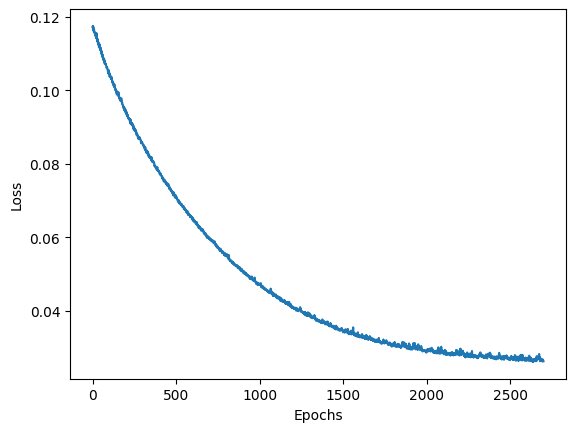

In [85]:
# plota as loss para ver se está treinando
plt.plot(historyLOGG.history['loss'][500:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

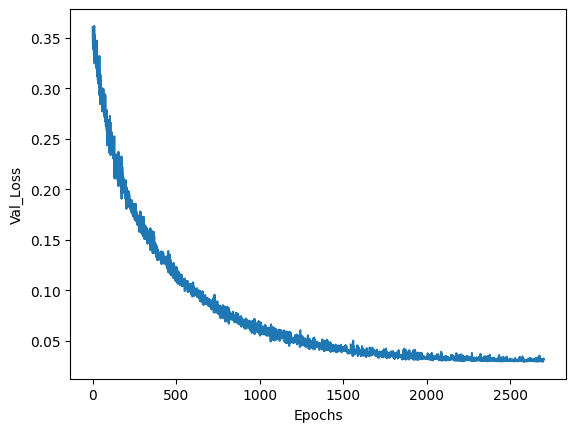

In [86]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyLOGG.history['val_loss'][500:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [79]:
#modelLOGG.save('modelosNovos\\Lamost-LR\\model_LOGG.h5')

In [87]:
predtest = modelLOGG.predict(X_test)

72/72 [==============================] - 0s 3ms/step


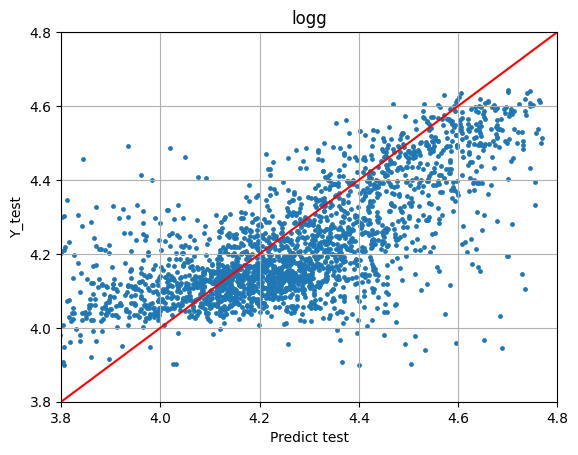

In [94]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('logg')
plt.xlim(3.8, 4.8)
plt.ylim(3.8, 4.8)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([3, 5], [3, 5], c='red')

plt.grid(True)

In [108]:
score = r2_score(Y_test['logg'], predlogg)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 44.0%


In [95]:
Y_test['LOGG_Predict'] = predtest

In [96]:
Y_test

teff   logg   alpha_m    feh      TEFF  \
Field                                                               
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807   
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751   
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289   
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491   
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643   
...                         ...    ...       ...    ...       ...   
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961   
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765   
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922   
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776   
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239   

                        TEFF_PredictDecoded  alpha_predict  LOGG_Predict  
Field                                                                     
SPLUS-s02s17_000004762          5776.024902       0.204177      4.046244  
SPLUS-n01s20_000008763          5293.979980       0.151184      4.536907  
SPLUS-n02n26_000010995          5529.192871       0.281305      4.408480  
SPLUS-s02s10_000004604          5703.462891       0.327699      4.241783  
SPLUS-n01s23_000000451          6054.609375       0.120852      4.145991  
...                                     ...            ...           ...  
SPLUS-n02n28_000004106          5629.470703       0.206184      4.105874  
SPLUS-s02s13_000005813          6007.171387       0.113706      4.109293  
SPLUS-s02s06_000004255          5619.103516       0.207008      4.007104  
SPLUS-n02n01_000002263          5178.011230       0.171745      4.587033  
SPLUS-n02s20_000006551          5392.504395       0.233148      4.534865  

[2283 rows x 8 columns]

In [98]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\5-Lamost-LR-Test\\LoggPredict.csv")

## FEH

In [117]:
modelFEH = baseline_model_teste()

In [118]:
columnTrain = 'feh'

In [119]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train[[columnTrain]], epochs = 700, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/700
3/3 - 1s - loss: 0.4641 - val_loss: 0.2930 - 778ms/epoch - 259ms/step
Epoch 2/700
3/3 - 0s - loss: 0.3264 - val_loss: 0.2717 - 50ms/epoch - 17ms/step
Epoch 3/700
3/3 - 0s - loss: 0.2899 - val_loss: 0.2469 - 51ms/epoch - 17ms/step
Epoch 4/700
3/3 - 0s - loss: 0.2772 - val_loss: 0.2395 - 51ms/epoch - 17ms/step
Epoch 5/700
3/3 - 0s - loss: 0.2664 - val_loss: 0.2366 - 48ms/epoch - 16ms/step
Epoch 6/700
3/3 - 0s - loss: 0.2584 - val_loss: 0.2312 - 49ms/epoch - 16ms/step
Epoch 7/700
3/3 - 0s - loss: 0.2527 - val_loss: 0.2254 - 48ms/epoch - 16ms/step
Epoch 8/700
3/3 - 0s - loss: 0.2483 - val_loss: 0.2214 - 53ms/epoch - 18ms/step
Epoch 9/700
3/3 - 0s - loss: 0.2442 - val_loss: 0.2159 - 47ms/epoch - 16ms/step
Epoch 10/700
3/3 - 0s - loss: 0.2378 - val_loss: 0.2117 - 49ms/epoch - 16ms/step
Epoch 11/700
3/3 - 0s - loss: 0.2347 - val_loss: 0.2082 - 50ms/epoch - 17ms/step
Epoch 12/700
3/3 - 0s - loss: 0.2302 - val_loss: 0.2032 - 50ms/epoch - 17ms/step
Epoch 13/700
3/3 - 0s - loss: 0.225

Epoch 103/700
3/3 - 0s - loss: 0.1168 - val_loss: 0.1105 - 68ms/epoch - 23ms/step
Epoch 104/700
3/3 - 0s - loss: 0.1157 - val_loss: 0.1097 - 66ms/epoch - 22ms/step
Epoch 105/700
3/3 - 0s - loss: 0.1160 - val_loss: 0.1091 - 72ms/epoch - 24ms/step
Epoch 106/700
3/3 - 0s - loss: 0.1151 - val_loss: 0.1091 - 56ms/epoch - 19ms/step
Epoch 107/700
3/3 - 0s - loss: 0.1145 - val_loss: 0.1080 - 56ms/epoch - 19ms/step
Epoch 108/700
3/3 - 0s - loss: 0.1136 - val_loss: 0.1082 - 56ms/epoch - 19ms/step
Epoch 109/700
3/3 - 0s - loss: 0.1139 - val_loss: 0.1075 - 63ms/epoch - 21ms/step
Epoch 110/700
3/3 - 0s - loss: 0.1131 - val_loss: 0.1066 - 67ms/epoch - 22ms/step
Epoch 111/700
3/3 - 0s - loss: 0.1127 - val_loss: 0.1072 - 63ms/epoch - 21ms/step
Epoch 112/700
3/3 - 0s - loss: 0.1123 - val_loss: 0.1066 - 61ms/epoch - 20ms/step
Epoch 113/700
3/3 - 0s - loss: 0.1118 - val_loss: 0.1055 - 55ms/epoch - 18ms/step
Epoch 114/700
3/3 - 0s - loss: 0.1106 - val_loss: 0.1053 - 61ms/epoch - 20ms/step
Epoch 115/700
3/

Epoch 203/700
3/3 - 0s - loss: 0.0793 - val_loss: 0.0769 - 58ms/epoch - 19ms/step
Epoch 204/700
3/3 - 0s - loss: 0.0799 - val_loss: 0.0762 - 61ms/epoch - 20ms/step
Epoch 205/700
3/3 - 0s - loss: 0.0784 - val_loss: 0.0760 - 59ms/epoch - 20ms/step
Epoch 206/700
3/3 - 0s - loss: 0.0788 - val_loss: 0.0761 - 60ms/epoch - 20ms/step
Epoch 207/700
3/3 - 0s - loss: 0.0786 - val_loss: 0.0783 - 60ms/epoch - 20ms/step
Epoch 208/700
3/3 - 0s - loss: 0.0797 - val_loss: 0.0756 - 59ms/epoch - 20ms/step
Epoch 209/700
3/3 - 0s - loss: 0.0785 - val_loss: 0.0757 - 59ms/epoch - 20ms/step
Epoch 210/700
3/3 - 0s - loss: 0.0781 - val_loss: 0.0755 - 61ms/epoch - 20ms/step
Epoch 211/700
3/3 - 0s - loss: 0.0777 - val_loss: 0.0755 - 60ms/epoch - 20ms/step
Epoch 212/700
3/3 - 0s - loss: 0.0782 - val_loss: 0.0749 - 60ms/epoch - 20ms/step
Epoch 213/700
3/3 - 0s - loss: 0.0771 - val_loss: 0.0740 - 59ms/epoch - 20ms/step
Epoch 214/700
3/3 - 0s - loss: 0.0770 - val_loss: 0.0740 - 59ms/epoch - 20ms/step
Epoch 215/700
3/

Epoch 303/700
3/3 - 0s - loss: 0.0612 - val_loss: 0.0614 - 60ms/epoch - 20ms/step
Epoch 304/700
3/3 - 0s - loss: 0.0613 - val_loss: 0.0609 - 60ms/epoch - 20ms/step
Epoch 305/700
3/3 - 0s - loss: 0.0618 - val_loss: 0.0628 - 60ms/epoch - 20ms/step
Epoch 306/700
3/3 - 0s - loss: 0.0623 - val_loss: 0.0612 - 60ms/epoch - 20ms/step
Epoch 307/700
3/3 - 0s - loss: 0.0616 - val_loss: 0.0596 - 61ms/epoch - 20ms/step
Epoch 308/700
3/3 - 0s - loss: 0.0607 - val_loss: 0.0614 - 60ms/epoch - 20ms/step
Epoch 309/700
3/3 - 0s - loss: 0.0611 - val_loss: 0.0609 - 62ms/epoch - 21ms/step
Epoch 310/700
3/3 - 0s - loss: 0.0604 - val_loss: 0.0588 - 59ms/epoch - 20ms/step
Epoch 311/700
3/3 - 0s - loss: 0.0600 - val_loss: 0.0593 - 61ms/epoch - 20ms/step
Epoch 312/700
3/3 - 0s - loss: 0.0601 - val_loss: 0.0599 - 60ms/epoch - 20ms/step
Epoch 313/700
3/3 - 0s - loss: 0.0599 - val_loss: 0.0594 - 61ms/epoch - 20ms/step
Epoch 314/700
3/3 - 0s - loss: 0.0591 - val_loss: 0.0587 - 61ms/epoch - 20ms/step
Epoch 315/700
3/

Epoch 403/700
3/3 - 0s - loss: 0.0516 - val_loss: 0.0515 - 68ms/epoch - 23ms/step
Epoch 404/700
3/3 - 0s - loss: 0.0507 - val_loss: 0.0516 - 68ms/epoch - 23ms/step
Epoch 405/700
3/3 - 0s - loss: 0.0510 - val_loss: 0.0517 - 78ms/epoch - 26ms/step
Epoch 406/700
3/3 - 0s - loss: 0.0507 - val_loss: 0.0514 - 77ms/epoch - 26ms/step
Epoch 407/700
3/3 - 0s - loss: 0.0508 - val_loss: 0.0519 - 76ms/epoch - 25ms/step
Epoch 408/700
3/3 - 0s - loss: 0.0505 - val_loss: 0.0513 - 68ms/epoch - 23ms/step
Epoch 409/700
3/3 - 0s - loss: 0.0506 - val_loss: 0.0505 - 64ms/epoch - 21ms/step
Epoch 410/700
3/3 - 0s - loss: 0.0504 - val_loss: 0.0516 - 68ms/epoch - 23ms/step
Epoch 411/700
3/3 - 0s - loss: 0.0506 - val_loss: 0.0513 - 66ms/epoch - 22ms/step
Epoch 412/700
3/3 - 0s - loss: 0.0503 - val_loss: 0.0511 - 68ms/epoch - 23ms/step
Epoch 413/700
3/3 - 0s - loss: 0.0499 - val_loss: 0.0505 - 65ms/epoch - 22ms/step
Epoch 414/700
3/3 - 0s - loss: 0.0497 - val_loss: 0.0508 - 65ms/epoch - 22ms/step
Epoch 415/700
3/

Epoch 503/700
3/3 - 0s - loss: 0.0460 - val_loss: 0.0475 - 58ms/epoch - 19ms/step
Epoch 504/700
3/3 - 0s - loss: 0.0465 - val_loss: 0.0503 - 56ms/epoch - 19ms/step
Epoch 505/700
3/3 - 0s - loss: 0.0465 - val_loss: 0.0495 - 54ms/epoch - 18ms/step
Epoch 506/700
3/3 - 0s - loss: 0.0477 - val_loss: 0.0504 - 57ms/epoch - 19ms/step
Epoch 507/700
3/3 - 0s - loss: 0.0469 - val_loss: 0.0476 - 63ms/epoch - 21ms/step
Epoch 508/700
3/3 - 0s - loss: 0.0451 - val_loss: 0.0470 - 63ms/epoch - 21ms/step
Epoch 509/700
3/3 - 0s - loss: 0.0452 - val_loss: 0.0475 - 66ms/epoch - 22ms/step
Epoch 510/700
3/3 - 0s - loss: 0.0450 - val_loss: 0.0474 - 58ms/epoch - 19ms/step
Epoch 511/700
3/3 - 0s - loss: 0.0450 - val_loss: 0.0474 - 61ms/epoch - 20ms/step
Epoch 512/700
3/3 - 0s - loss: 0.0447 - val_loss: 0.0464 - 61ms/epoch - 20ms/step
Epoch 513/700
3/3 - 0s - loss: 0.0441 - val_loss: 0.0468 - 60ms/epoch - 20ms/step
Epoch 514/700
3/3 - 0s - loss: 0.0448 - val_loss: 0.0486 - 60ms/epoch - 20ms/step
Epoch 515/700
3/

Epoch 603/700
3/3 - 0s - loss: 0.0416 - val_loss: 0.0446 - 64ms/epoch - 21ms/step
Epoch 604/700
3/3 - 0s - loss: 0.0411 - val_loss: 0.0444 - 63ms/epoch - 21ms/step
Epoch 605/700
3/3 - 0s - loss: 0.0415 - val_loss: 0.0439 - 63ms/epoch - 21ms/step
Epoch 606/700
3/3 - 0s - loss: 0.0413 - val_loss: 0.0437 - 64ms/epoch - 21ms/step
Epoch 607/700
3/3 - 0s - loss: 0.0403 - val_loss: 0.0447 - 62ms/epoch - 21ms/step
Epoch 608/700
3/3 - 0s - loss: 0.0412 - val_loss: 0.0449 - 65ms/epoch - 22ms/step
Epoch 609/700
3/3 - 0s - loss: 0.0411 - val_loss: 0.0453 - 63ms/epoch - 21ms/step
Epoch 610/700
3/3 - 0s - loss: 0.0417 - val_loss: 0.0446 - 66ms/epoch - 22ms/step
Epoch 611/700
3/3 - 0s - loss: 0.0419 - val_loss: 0.0463 - 67ms/epoch - 22ms/step
Epoch 612/700
3/3 - 0s - loss: 0.0421 - val_loss: 0.0453 - 65ms/epoch - 22ms/step
Epoch 613/700
3/3 - 0s - loss: 0.0411 - val_loss: 0.0457 - 63ms/epoch - 21ms/step
Epoch 614/700
3/3 - 0s - loss: 0.0410 - val_loss: 0.0448 - 62ms/epoch - 21ms/step
Epoch 615/700
3/

Text(0, 0.5, 'Loss')

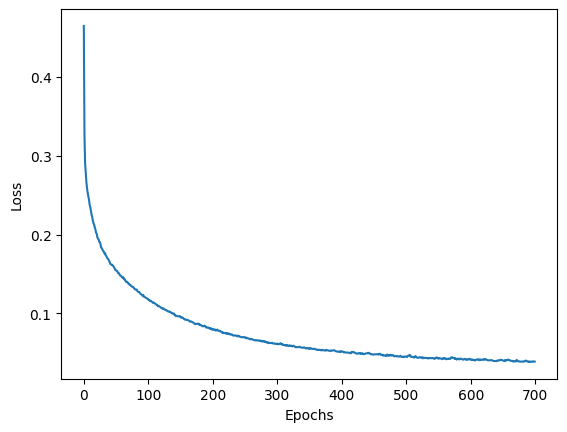

In [120]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

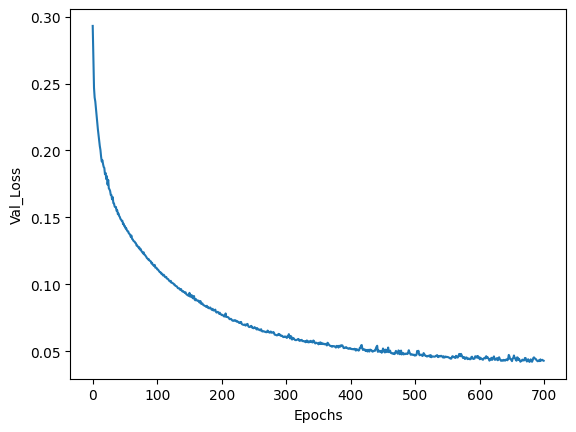

In [121]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [98]:
#modelFEH.save('modelosNovos\\Lamost-LR\\model_FEH.h5')

In [122]:
predfeh = modelFEH.predict(X_test)

72/72 [==============================] - 0s 3ms/step


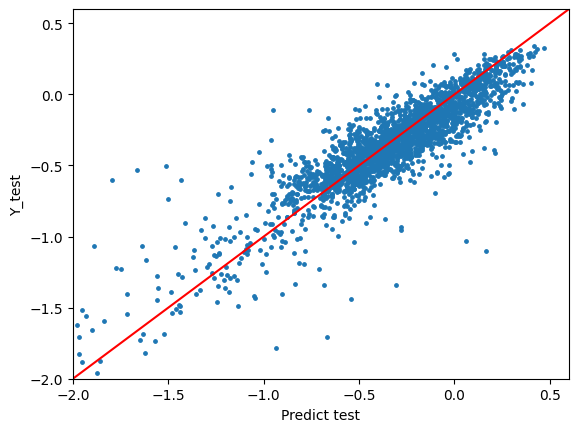

In [123]:
plt.scatter(Y_test[[columnTrain]], predfeh, s=6)
#plt.title('FE_H')
plt.xlim(-2, 0.6)
plt.ylim(-2, 0.6)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

plt.plot([-2, 1], [-2, 1], c='red')

In [124]:
score = r2_score(Y_test['feh'], predtest)
print("The accuracy of our model is {}%".format(round(score, 2) *100))

The accuracy of our model is 78.0%


In [125]:
Y_test['FEH_Predict'] = predfeh

In [126]:
Y_test

teff   logg   alpha_m    feh      TEFF  \
Field                                                               
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807   
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751   
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289   
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491   
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643   
...                         ...    ...       ...    ...       ...   
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961   
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765   
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922   
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776   
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239   

                        TEFF_PredictDecoded  alpha_predict  LOGG_Predict  \
Field                                                                      
SPLUS-s02s17_000004762          5776.024902       0.204177      4.046244   
SPLUS-n01s20_000008763          5293.979980       0.151184      4.536907   
SPLUS-n02n26_000010995          5529.192871       0.281305      4.408480   
SPLUS-s02s10_000004604          5703.462891       0.327699      4.241783   
SPLUS-n01s23_000000451          6054.609375       0.120852      4.145991   
...                                     ...            ...           ...   
SPLUS-n02n28_000004106          5629.470703       0.206184      4.105874   
SPLUS-s02s13_000005813          6007.171387       0.113706      4.109293   
SPLUS-s02s06_000004255          5619.103516       0.207008      4.007104   
SPLUS-n02n01_000002263          5178.011230       0.171745      4.587033   
SPLUS-n02s20_000006551          5392.504395       0.233148      4.534865   

                        FEH_Predict  
Field                                
SPLUS-s02s17_000004762    -0.399949  
SPLUS-n01s20_000008763     0.064732  
SPLUS-n02n26_000010995    -0.259612  
SPLUS-s02s10_000004604    -0.649948  
SPLUS-n01s23_000000451    -1.116734  
...                             ...  
SPLUS-n02n28_000004106    -0.286843  
SPLUS-s02s13_000005813    -0.359195  
SPLUS-s02s06_000004255    -0.145065  
SPLUS-n02n01_000002263    -0.163269  
SPLUS-n02s20_000006551    -0.456472  

[2283 rows x 9 columns]

In [127]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\5-Lamost-LR-Test\\FeHPredict.csv")

## CAFE

In [107]:
modelCAFE = baseline_model_teste()

In [108]:
columnTrain = 'CA_FE'

In [109]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCAFE = modelCAFE.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
1/1 - 1s - loss: 0.0580 - val_loss: 0.0618 - 680ms/epoch - 680ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.0576 - val_loss: 0.0615 - 37ms/epoch - 37ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.0572 - val_loss: 0.0612 - 37ms/epoch - 37ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.0569 - val_loss: 0.0610 - 35ms/epoch - 35ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.0567 - val_loss: 0.0608 - 36ms/epoch - 36ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0607 - 34ms/epoch - 34ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.0563 - val_loss: 0.0605 - 34ms/epoch - 34ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.0562 - val_loss: 0.0604 - 33ms/epoch - 33ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0603 - 35ms/epoch - 35ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.0560 - val_loss: 0.0602 - 36ms/epoch - 36ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.0559 - val_loss: 0.0601 - 34ms/epoch - 34ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.0557 - val_loss: 0.0600 - 34ms/epoch - 34ms/step
Epoch 13/3000
1/1 - 0s 

Epoch 101/3000
1/1 - 0s - loss: 0.0457 - val_loss: 0.0501 - 40ms/epoch - 40ms/step
Epoch 102/3000
1/1 - 0s - loss: 0.0456 - val_loss: 0.0500 - 40ms/epoch - 40ms/step
Epoch 103/3000
1/1 - 0s - loss: 0.0455 - val_loss: 0.0499 - 39ms/epoch - 39ms/step
Epoch 104/3000
1/1 - 0s - loss: 0.0454 - val_loss: 0.0498 - 39ms/epoch - 39ms/step
Epoch 105/3000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0497 - 42ms/epoch - 42ms/step
Epoch 106/3000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0496 - 75ms/epoch - 75ms/step
Epoch 107/3000
1/1 - 0s - loss: 0.0451 - val_loss: 0.0495 - 65ms/epoch - 65ms/step
Epoch 108/3000
1/1 - 0s - loss: 0.0450 - val_loss: 0.0494 - 74ms/epoch - 74ms/step
Epoch 109/3000
1/1 - 0s - loss: 0.0449 - val_loss: 0.0493 - 39ms/epoch - 39ms/step
Epoch 110/3000
1/1 - 0s - loss: 0.0448 - val_loss: 0.0492 - 38ms/epoch - 38ms/step
Epoch 111/3000
1/1 - 0s - loss: 0.0447 - val_loss: 0.0491 - 38ms/epoch - 38ms/step
Epoch 112/3000
1/1 - 0s - loss: 0.0446 - val_loss: 0.0490 - 37ms/epoch - 37ms/step
Epoc

Epoch 200/3000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0407 - 34ms/epoch - 34ms/step
Epoch 201/3000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0407 - 33ms/epoch - 33ms/step
Epoch 202/3000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0406 - 36ms/epoch - 36ms/step
Epoch 203/3000
1/1 - 0s - loss: 0.0363 - val_loss: 0.0405 - 34ms/epoch - 34ms/step
Epoch 204/3000
1/1 - 0s - loss: 0.0362 - val_loss: 0.0404 - 34ms/epoch - 34ms/step
Epoch 205/3000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0404 - 33ms/epoch - 33ms/step
Epoch 206/3000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0403 - 33ms/epoch - 33ms/step
Epoch 207/3000
1/1 - 0s - loss: 0.0360 - val_loss: 0.0402 - 33ms/epoch - 33ms/step
Epoch 208/3000
1/1 - 0s - loss: 0.0359 - val_loss: 0.0401 - 35ms/epoch - 35ms/step
Epoch 209/3000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0400 - 35ms/epoch - 35ms/step
Epoch 210/3000
1/1 - 0s - loss: 0.0358 - val_loss: 0.0400 - 34ms/epoch - 34ms/step
Epoch 211/3000
1/1 - 0s - loss: 0.0357 - val_loss: 0.0399 - 33ms/epoch - 33ms/step
Epoc

Epoch 299/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0341 - 40ms/epoch - 40ms/step
Epoch 300/3000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0340 - 39ms/epoch - 39ms/step
Epoch 301/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0340 - 42ms/epoch - 42ms/step
Epoch 302/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0339 - 41ms/epoch - 41ms/step
Epoch 303/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0339 - 45ms/epoch - 45ms/step
Epoch 304/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0338 - 39ms/epoch - 39ms/step
Epoch 305/3000
1/1 - 0s - loss: 0.0294 - val_loss: 0.0338 - 41ms/epoch - 41ms/step
Epoch 306/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0337 - 40ms/epoch - 40ms/step
Epoch 307/3000
1/1 - 0s - loss: 0.0293 - val_loss: 0.0336 - 41ms/epoch - 41ms/step
Epoch 308/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0336 - 38ms/epoch - 38ms/step
Epoch 309/3000
1/1 - 0s - loss: 0.0292 - val_loss: 0.0335 - 40ms/epoch - 40ms/step
Epoch 310/3000
1/1 - 0s - loss: 0.0291 - val_loss: 0.0335 - 39ms/epoch - 39ms/step
Epoc

Epoch 398/3000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0291 - 34ms/epoch - 34ms/step
Epoch 399/3000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0291 - 38ms/epoch - 38ms/step
Epoch 400/3000
1/1 - 0s - loss: 0.0246 - val_loss: 0.0291 - 38ms/epoch - 38ms/step
Epoch 401/3000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0290 - 39ms/epoch - 39ms/step
Epoch 402/3000
1/1 - 0s - loss: 0.0245 - val_loss: 0.0290 - 39ms/epoch - 39ms/step
Epoch 403/3000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0289 - 39ms/epoch - 39ms/step
Epoch 404/3000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0289 - 38ms/epoch - 38ms/step
Epoch 405/3000
1/1 - 0s - loss: 0.0244 - val_loss: 0.0289 - 40ms/epoch - 40ms/step
Epoch 406/3000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0288 - 41ms/epoch - 41ms/step
Epoch 407/3000
1/1 - 0s - loss: 0.0243 - val_loss: 0.0288 - 39ms/epoch - 39ms/step
Epoch 408/3000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0288 - 38ms/epoch - 38ms/step
Epoch 409/3000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0287 - 44ms/epoch - 44ms/step
Epoc

Epoch 497/3000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0256 - 61ms/epoch - 61ms/step
Epoch 498/3000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0255 - 78ms/epoch - 78ms/step
Epoch 499/3000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0255 - 36ms/epoch - 36ms/step
Epoch 500/3000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0255 - 35ms/epoch - 35ms/step
Epoch 501/3000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0255 - 34ms/epoch - 34ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0207 - val_loss: 0.0254 - 34ms/epoch - 34ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0254 - 33ms/epoch - 33ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0254 - 34ms/epoch - 34ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0206 - val_loss: 0.0253 - 33ms/epoch - 33ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0253 - 35ms/epoch - 35ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0253 - 37ms/epoch - 37ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0205 - val_loss: 0.0253 - 36ms/epoch - 36ms/step
Epoc

Epoch 596/3000
1/1 - 0s - loss: 0.0179 - val_loss: 0.0230 - 44ms/epoch - 44ms/step
Epoch 597/3000
1/1 - 0s - loss: 0.0179 - val_loss: 0.0230 - 39ms/epoch - 39ms/step
Epoch 598/3000
1/1 - 0s - loss: 0.0179 - val_loss: 0.0230 - 44ms/epoch - 44ms/step
Epoch 599/3000
1/1 - 0s - loss: 0.0179 - val_loss: 0.0229 - 42ms/epoch - 42ms/step
Epoch 600/3000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0229 - 42ms/epoch - 42ms/step
Epoch 601/3000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0229 - 44ms/epoch - 44ms/step
Epoch 602/3000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0229 - 49ms/epoch - 49ms/step
Epoch 603/3000
1/1 - 0s - loss: 0.0178 - val_loss: 0.0229 - 49ms/epoch - 49ms/step
Epoch 604/3000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0228 - 48ms/epoch - 48ms/step
Epoch 605/3000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0228 - 49ms/epoch - 49ms/step
Epoch 606/3000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0228 - 52ms/epoch - 52ms/step
Epoch 607/3000
1/1 - 0s - loss: 0.0177 - val_loss: 0.0228 - 47ms/epoch - 47ms/step
Epoc

Epoch 695/3000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0211 - 43ms/epoch - 43ms/step
Epoch 696/3000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0211 - 42ms/epoch - 42ms/step
Epoch 697/3000
1/1 - 0s - loss: 0.0158 - val_loss: 0.0210 - 46ms/epoch - 46ms/step
Epoch 698/3000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0211 - 39ms/epoch - 39ms/step
Epoch 699/3000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0210 - 41ms/epoch - 41ms/step
Epoch 700/3000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0210 - 39ms/epoch - 39ms/step
Epoch 701/3000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0210 - 40ms/epoch - 40ms/step
Epoch 702/3000
1/1 - 0s - loss: 0.0157 - val_loss: 0.0210 - 38ms/epoch - 38ms/step
Epoch 703/3000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0210 - 43ms/epoch - 43ms/step
Epoch 704/3000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0209 - 76ms/epoch - 76ms/step
Epoch 705/3000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0210 - 58ms/epoch - 58ms/step
Epoch 706/3000
1/1 - 0s - loss: 0.0156 - val_loss: 0.0209 - 78ms/epoch - 78ms/step
Epoc

Epoch 794/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0197 - 70ms/epoch - 70ms/step
Epoch 795/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0197 - 42ms/epoch - 42ms/step
Epoch 796/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0197 - 70ms/epoch - 70ms/step
Epoch 797/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0196 - 46ms/epoch - 46ms/step
Epoch 798/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0197 - 44ms/epoch - 44ms/step
Epoch 799/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0196 - 40ms/epoch - 40ms/step
Epoch 800/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0197 - 46ms/epoch - 46ms/step
Epoch 801/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0196 - 57ms/epoch - 57ms/step
Epoch 802/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0196 - 65ms/epoch - 65ms/step
Epoch 803/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0196 - 177ms/epoch - 177ms/step
Epoch 804/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0196 - 61ms/epoch - 61ms/step
Epoch 805/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0196 - 75ms/epoch - 75ms/step
Ep

Epoch 893/3000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0187 - 37ms/epoch - 37ms/step
Epoch 894/3000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0187 - 36ms/epoch - 36ms/step
Epoch 895/3000
1/1 - 0s - loss: 0.0130 - val_loss: 0.0187 - 35ms/epoch - 35ms/step
Epoch 896/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0187 - 36ms/epoch - 36ms/step
Epoch 897/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0186 - 37ms/epoch - 37ms/step
Epoch 898/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0187 - 36ms/epoch - 36ms/step
Epoch 899/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0186 - 38ms/epoch - 38ms/step
Epoch 900/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0187 - 39ms/epoch - 39ms/step
Epoch 901/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0186 - 37ms/epoch - 37ms/step
Epoch 902/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0187 - 38ms/epoch - 38ms/step
Epoch 903/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0186 - 38ms/epoch - 38ms/step
Epoch 904/3000
1/1 - 0s - loss: 0.0129 - val_loss: 0.0186 - 41ms/epoch - 41ms/step
Epoc

Epoch 992/3000
1/1 - 0s - loss: 0.0121 - val_loss: 0.0180 - 40ms/epoch - 40ms/step
Epoch 993/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0180 - 42ms/epoch - 42ms/step
Epoch 994/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 42ms/epoch - 42ms/step
Epoch 995/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0180 - 43ms/epoch - 43ms/step
Epoch 996/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 41ms/epoch - 41ms/step
Epoch 997/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0180 - 41ms/epoch - 41ms/step
Epoch 998/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 40ms/epoch - 40ms/step
Epoch 999/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0180 - 39ms/epoch - 39ms/step
Epoch 1000/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 42ms/epoch - 42ms/step
Epoch 1001/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 43ms/epoch - 43ms/step
Epoch 1002/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 40ms/epoch - 40ms/step
Epoch 1003/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0179 - 41ms/epoch - 41ms/step


Epoch 1090/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0175 - 50ms/epoch - 50ms/step
Epoch 1091/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 50ms/epoch - 50ms/step
Epoch 1092/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0175 - 52ms/epoch - 52ms/step
Epoch 1093/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 55ms/epoch - 55ms/step
Epoch 1094/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0175 - 51ms/epoch - 51ms/step
Epoch 1095/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 44ms/epoch - 44ms/step
Epoch 1096/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0175 - 53ms/epoch - 53ms/step
Epoch 1097/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 57ms/epoch - 57ms/step
Epoch 1098/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 51ms/epoch - 51ms/step
Epoch 1099/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 51ms/epoch - 51ms/step
Epoch 1100/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0174 - 49ms/epoch - 49ms/step
Epoch 1101/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0175 - 52ms/epoch - 52

Epoch 1188/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1189/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 67ms/epoch - 67ms/step
Epoch 1190/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 72ms/epoch - 72ms/step
Epoch 1191/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 56ms/epoch - 56ms/step
Epoch 1192/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 56ms/epoch - 56ms/step
Epoch 1193/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 58ms/epoch - 58ms/step
Epoch 1194/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 48ms/epoch - 48ms/step
Epoch 1195/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 47ms/epoch - 47ms/step
Epoch 1196/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 37ms/epoch - 37ms/step
Epoch 1197/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 36ms/epoch - 36ms/step
Epoch 1198/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 39ms/epoch - 39ms/step
Epoch 1199/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0171 - 38ms/epoch - 38

Epoch 1286/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 34ms/epoch - 34ms/step
Epoch 1287/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0169 - 34ms/epoch - 34ms/step
Epoch 1288/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 36ms/epoch - 36ms/step
Epoch 1289/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0169 - 38ms/epoch - 38ms/step
Epoch 1290/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 42ms/epoch - 42ms/step
Epoch 1291/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0169 - 42ms/epoch - 42ms/step
Epoch 1292/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 41ms/epoch - 41ms/step
Epoch 1293/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0169 - 37ms/epoch - 37ms/step
Epoch 1294/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 39ms/epoch - 39ms/step
Epoch 1295/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 37ms/epoch - 37ms/step
Epoch 1296/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 36ms/epoch - 36ms/step
Epoch 1297/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0168 - 37ms/epoch - 37

Epoch 1384/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 36ms/epoch - 36ms/step
Epoch 1385/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoch 1386/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 44ms/epoch - 44ms/step
Epoch 1387/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 42ms/epoch - 42ms/step
Epoch 1388/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 40ms/epoch - 40ms/step
Epoch 1389/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 43ms/epoch - 43ms/step
Epoch 1390/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0167 - 50ms/epoch - 50ms/step
Epoch 1391/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 53ms/epoch - 53ms/step
Epoch 1392/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 1393/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 40ms/epoch - 40ms/step
Epoch 1394/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0167 - 43ms/epoch - 43ms/step
Epoch 1395/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0166 - 43ms/epoch - 43

Epoch 1482/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 1483/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 39ms/epoch - 39ms/step
Epoch 1484/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0166 - 40ms/epoch - 40ms/step
Epoch 1485/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 42ms/epoch - 42ms/step
Epoch 1486/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0166 - 43ms/epoch - 43ms/step
Epoch 1487/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 38ms/epoch - 38ms/step
Epoch 1488/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 41ms/epoch - 41ms/step
Epoch 1489/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 42ms/epoch - 42ms/step
Epoch 1490/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 1491/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 39ms/epoch - 39ms/step
Epoch 1492/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 1493/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0165 - 45ms/epoch - 45

Epoch 1580/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 1581/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0165 - 35ms/epoch - 35ms/step
Epoch 1582/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 37ms/epoch - 37ms/step
Epoch 1583/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0165 - 36ms/epoch - 36ms/step
Epoch 1584/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 1585/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0165 - 36ms/epoch - 36ms/step
Epoch 1586/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0164 - 38ms/epoch - 38ms/step
Epoch 1587/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0165 - 35ms/epoch - 35ms/step
Epoch 1588/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 1589/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 37ms/epoch - 37ms/step
Epoch 1590/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 35ms/epoch - 35ms/step
Epoch 1591/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0164 - 36ms/epoch - 36

Epoch 1678/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 44ms/epoch - 44ms/step
Epoch 1679/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 47ms/epoch - 47ms/step
Epoch 1680/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 43ms/epoch - 43ms/step
Epoch 1681/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1682/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 53ms/epoch - 53ms/step
Epoch 1683/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1684/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 99ms/epoch - 99ms/step
Epoch 1685/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 43ms/epoch - 43ms/step
Epoch 1686/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0165 - 77ms/epoch - 77ms/step
Epoch 1687/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1688/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0165 - 59ms/epoch - 59ms/step
Epoch 1689/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0164 - 42ms/epoch - 42

Epoch 1776/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 38ms/epoch - 38ms/step
Epoch 1777/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0163 - 42ms/epoch - 42ms/step
Epoch 1778/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0165 - 45ms/epoch - 45ms/step
Epoch 1779/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1780/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0165 - 45ms/epoch - 45ms/step
Epoch 1781/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0163 - 44ms/epoch - 44ms/step
Epoch 1782/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 1783/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 43ms/epoch - 43ms/step
Epoch 1784/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 42ms/epoch - 42ms/step
Epoch 1785/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1786/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 44ms/epoch - 44ms/step
Epoch 1787/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0164 - 41ms/epoch - 41

Epoch 1874/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 33ms/epoch - 33ms/step
Epoch 1875/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0165 - 34ms/epoch - 34ms/step
Epoch 1876/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 33ms/epoch - 33ms/step
Epoch 1877/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0165 - 34ms/epoch - 34ms/step
Epoch 1878/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 33ms/epoch - 33ms/step
Epoch 1879/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 35ms/epoch - 35ms/step
Epoch 1880/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 34ms/epoch - 34ms/step
Epoch 1881/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 33ms/epoch - 33ms/step
Epoch 1882/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 34ms/epoch - 34ms/step
Epoch 1883/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 32ms/epoch - 32ms/step
Epoch 1884/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 35ms/epoch - 35ms/step
Epoch 1885/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 34ms/epoch - 34

Epoch 1972/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 1973/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 1974/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 37ms/epoch - 37ms/step
Epoch 1975/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0165 - 39ms/epoch - 39ms/step
Epoch 1976/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 1977/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0165 - 38ms/epoch - 38ms/step
Epoch 1978/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 40ms/epoch - 40ms/step
Epoch 1979/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 38ms/epoch - 38ms/step
Epoch 1980/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 39ms/epoch - 39ms/step
Epoch 1981/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 38ms/epoch - 38ms/step
Epoch 1982/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 47ms/epoch - 47ms/step
Epoch 1983/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 43ms/epoch - 43

Epoch 2070/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 34ms/epoch - 34ms/step
Epoch 2071/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 34ms/epoch - 34ms/step
Epoch 2072/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 37ms/epoch - 37ms/step
Epoch 2073/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 36ms/epoch - 36ms/step
Epoch 2074/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 2075/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 2076/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 2077/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 2078/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 33ms/epoch - 33ms/step
Epoch 2079/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 36ms/epoch - 36ms/step
Epoch 2080/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 36ms/epoch - 36ms/step
Epoch 2081/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0164 - 38ms/epoch - 38

Epoch 2168/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 38ms/epoch - 38ms/step
Epoch 2169/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 39ms/epoch - 39ms/step
Epoch 2170/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 38ms/epoch - 38ms/step
Epoch 2171/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 41ms/epoch - 41ms/step
Epoch 2172/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 2173/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 38ms/epoch - 38ms/step
Epoch 2174/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 41ms/epoch - 41ms/step
Epoch 2175/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 39ms/epoch - 39ms/step
Epoch 2176/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0166 - 41ms/epoch - 41ms/step
Epoch 2177/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 38ms/epoch - 38ms/step
Epoch 2178/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0167 - 44ms/epoch - 44ms/step
Epoch 2179/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0165 - 38ms/epoch - 38

Epoch 2266/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 42ms/epoch - 42ms/step
Epoch 2267/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0166 - 42ms/epoch - 42ms/step
Epoch 2268/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 42ms/epoch - 42ms/step
Epoch 2269/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0166 - 45ms/epoch - 45ms/step
Epoch 2270/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 45ms/epoch - 45ms/step
Epoch 2271/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0165 - 45ms/epoch - 45ms/step
Epoch 2272/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 44ms/epoch - 44ms/step
Epoch 2273/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 2274/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0166 - 41ms/epoch - 41ms/step
Epoch 2275/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 40ms/epoch - 40ms/step
Epoch 2276/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0166 - 43ms/epoch - 43ms/step
Epoch 2277/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0165 - 44ms/epoch - 44

Epoch 2364/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoch 2365/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 36ms/epoch - 36ms/step
Epoch 2366/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 56ms/epoch - 56ms/step
Epoch 2367/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 2368/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 2369/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 2370/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 2371/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 37ms/epoch - 37ms/step
Epoch 2372/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 36ms/epoch - 36ms/step
Epoch 2373/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 37ms/epoch - 37ms/step
Epoch 2374/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0165 - 44ms/epoch - 44ms/step
Epoch 2375/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 38ms/epoch - 38

Epoch 2462/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoch 2463/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 39ms/epoch - 39ms/step
Epoch 2464/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 42ms/epoch - 42ms/step
Epoch 2465/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0166 - 40ms/epoch - 40ms/step
Epoch 2466/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 38ms/epoch - 38ms/step
Epoch 2467/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 37ms/epoch - 37ms/step
Epoch 2468/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 34ms/epoch - 34ms/step
Epoch 2469/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0166 - 37ms/epoch - 37ms/step
Epoch 2470/3000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0167 - 34ms/epoch - 34ms/step
Epoch 2471/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 2472/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 2473/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 37ms/epoch - 37

Epoch 2560/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 36ms/epoch - 36ms/step
Epoch 2561/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 35ms/epoch - 35ms/step
Epoch 2562/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 39ms/epoch - 39ms/step
Epoch 2563/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 39ms/epoch - 39ms/step
Epoch 2564/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 39ms/epoch - 39ms/step
Epoch 2565/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoch 2566/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 39ms/epoch - 39ms/step
Epoch 2567/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 41ms/epoch - 41ms/step
Epoch 2568/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 40ms/epoch - 40ms/step
Epoch 2569/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 39ms/epoch - 39ms/step
Epoch 2570/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0167 - 40ms/epoch - 40ms/step
Epoch 2571/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 42ms/epoch - 42

Epoch 2658/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0169 - 41ms/epoch - 41ms/step
Epoch 2659/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 45ms/epoch - 45ms/step
Epoch 2660/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 44ms/epoch - 44ms/step
Epoch 2661/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0169 - 45ms/epoch - 45ms/step
Epoch 2662/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 37ms/epoch - 37ms/step
Epoch 2663/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0169 - 45ms/epoch - 45ms/step
Epoch 2664/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 45ms/epoch - 45ms/step
Epoch 2665/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0170 - 40ms/epoch - 40ms/step
Epoch 2666/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 43ms/epoch - 43ms/step
Epoch 2667/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0170 - 43ms/epoch - 43ms/step
Epoch 2668/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0168 - 40ms/epoch - 40ms/step
Epoch 2669/3000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0169 - 43ms/epoch - 43

Epoch 2756/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 36ms/epoch - 36ms/step
Epoch 2757/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 35ms/epoch - 35ms/step
Epoch 2758/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 37ms/epoch - 37ms/step
Epoch 2759/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 34ms/epoch - 34ms/step
Epoch 2760/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 37ms/epoch - 37ms/step
Epoch 2761/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 35ms/epoch - 35ms/step
Epoch 2762/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 34ms/epoch - 34ms/step
Epoch 2763/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 36ms/epoch - 36ms/step
Epoch 2764/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 37ms/epoch - 37ms/step
Epoch 2765/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 37ms/epoch - 37ms/step
Epoch 2766/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 37ms/epoch - 37ms/step
Epoch 2767/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0169 - 35ms/epoch - 35

Epoch 2854/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 36ms/epoch - 36ms/step
Epoch 2855/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 37ms/epoch - 37ms/step
Epoch 2856/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 39ms/epoch - 39ms/step
Epoch 2857/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 39ms/epoch - 39ms/step
Epoch 2858/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 37ms/epoch - 37ms/step
Epoch 2859/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 37ms/epoch - 37ms/step
Epoch 2860/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 37ms/epoch - 37ms/step
Epoch 2861/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 39ms/epoch - 39ms/step
Epoch 2862/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 35ms/epoch - 35ms/step
Epoch 2863/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 35ms/epoch - 35ms/step
Epoch 2864/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 41ms/epoch - 41ms/step
Epoch 2865/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0170 - 40ms/epoch - 40

Epoch 2952/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0172 - 36ms/epoch - 36ms/step
Epoch 2953/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 37ms/epoch - 37ms/step
Epoch 2954/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0172 - 36ms/epoch - 36ms/step
Epoch 2955/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 38ms/epoch - 38ms/step
Epoch 2956/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0173 - 36ms/epoch - 36ms/step
Epoch 2957/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 37ms/epoch - 37ms/step
Epoch 2958/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0172 - 35ms/epoch - 35ms/step
Epoch 2959/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 37ms/epoch - 37ms/step
Epoch 2960/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0172 - 36ms/epoch - 36ms/step
Epoch 2961/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 36ms/epoch - 36ms/step
Epoch 2962/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0171 - 36ms/epoch - 36ms/step
Epoch 2963/3000
1/1 - 0s - loss: 0.0087 - val_loss: 0.0172 - 37ms/epoch - 37

Text(0, 0.5, 'Loss')

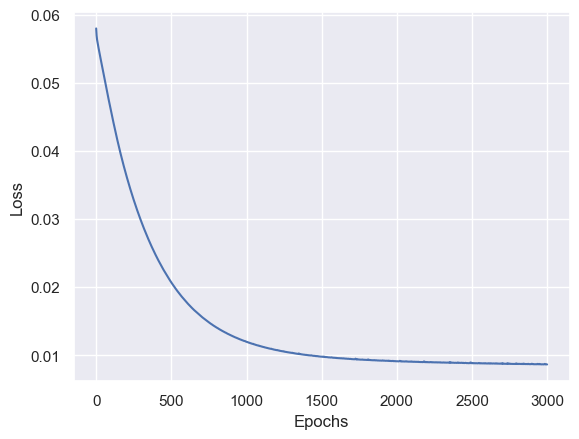

In [110]:
# plota as loss para ver se está treinando
plt.plot(historyCAFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

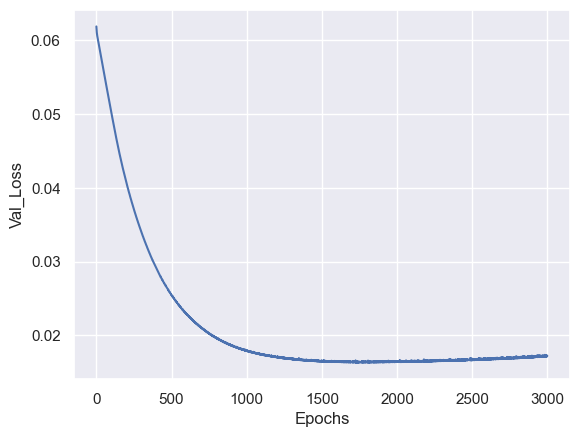

In [111]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCAFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [70]:
#modelCAFE.save('modelosNovos\\Apogee2\\model_CAFE.h5')

In [112]:
predtest = modelCAFE.predict(X_test)

20/20 [==============================] - 0s 9ms/step


Text(0, 0.5, 'Y_test')

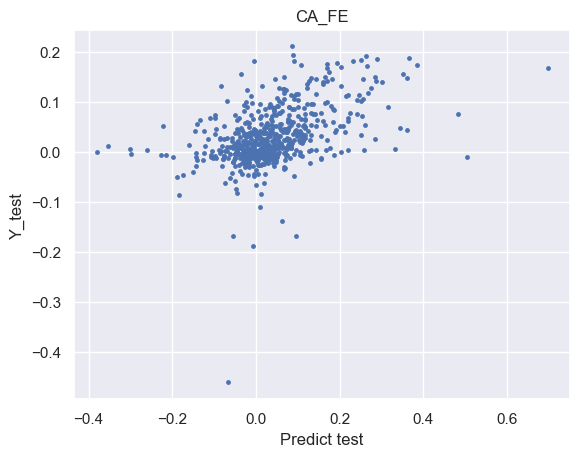

In [113]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('CA_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [114]:
Y_test['CAFE_Predict'] = predtest

In [115]:
Y_test

TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                
MC0061_000002407       -0.822770  4.537957 -0.002718 -0.018144 -0.315470   
SPLUS-n02s18_000002500 -0.579985  4.591905  0.038469 -0.021040 -0.005504   
MC0145_000010989        0.692253  4.446544  0.028430  0.092106 -0.110602   
MC0025_000258685       -0.024071  4.496673  0.061806  0.042466 -0.092897   
SPLUS-n01s18_000007826  0.018481  4.266320 -0.012097 -0.098167 -0.223850   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.663351  4.587575  0.062983 -0.038318 -0.088772   
MC0108_000057588       -0.622598  4.572570  0.196925  0.079666  0.034718   
SPLUS-n12s39_000004081 -0.526779  3.936834  0.102940  0.110074  0.016362   
MC0001_000002946       -0.806151  4.583101  0.063160 -0.036456 -0.033902   
SPLUS-n02s23_000011948 -0.325905  4.560552  0.073263  0.056296  0.081828   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  \
Field_splus                                                                
MC0061_000002407       -0.175950 -0.046311  0.099400 -0.055090  0.060595   
SPLUS-n02s18_000002500 -0.500060  0.033458 -0.060903 -0.007740  0.082594   
MC0145_000010989       -0.133260  0.023189  0.772480 -0.141130 -0.031289   
MC0025_000258685       -0.225500  0.083045 -0.138710  0.044850  0.174553   
SPLUS-n01s18_000007826 -0.376720  0.002678 -0.467810 -0.006090 -0.001113   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.436840  0.096979 -0.038955  0.052990  0.107140   
MC0108_000057588       -0.384950  0.273919 -0.029625 -0.005760  0.191753   
SPLUS-n12s39_000004081  0.013653  0.176812  0.015204  0.060096  0.042921   
MC0001_000002946        0.002456  0.109154  0.106141 -0.043273  0.083254   
SPLUS-n02s23_000011948 -0.367090  0.121190 -0.065663 -0.001940  0.023506   

                        alpha_predict  TEFFDecoded  TEFF_PredictDecoded  \
Field_splus                                                               
MC0061_000002407             0.048315    4771.7373          4796.384277   
SPLUS-n02s18_000002500       0.121821    5032.4746          5101.136230   
MC0145_000010989             0.035194    6398.7847          6177.354980   
MC0025_000258685             0.081249    5629.4937          5729.455566   
SPLUS-n01s18_000007826       0.086296    5675.1930          5692.469238   
...                               ...          ...                  ...   
SPLUS-s36s48_000004167       0.046960    4942.9450          5055.099609   
MC0108_000057588             0.132517    4986.7110          4920.656738   
SPLUS-n12s39_000004081       0.039232    5089.6150          5074.607422   
MC0001_000002946             0.031617    4789.5854          4771.262695   
SPLUS-n02s23_000011948       0.067230    5305.3423          5219.129395   

                        LOGG_Predict  FEH_Predict  CAFE_Predict  
Field_splus                                                      
MC0061_000002407            4.529244    -0.284677      0.032171  
SPLUS-n02s18_000002500      4.566516    -0.391178      0.017074  
MC0145_000010989            4.131693    -0.211765     -0.002815  
MC0025_000258685            4.339001    -0.279816      0.081508  
SPLUS-n01s18_000007826      4.367851    -0.328131      0.074316  
...                              ...          ...           ...  
SPLUS-s36s48_000004167      4.531365    -0.161693      0.011021  
MC0108_000057588            4.579930    -0.391790      0.090287  
SPLUS-n12s39_000004081      4.152612     0.038791      0.037337  
MC0001_000002946            4.576632    -0.073014     -0.003118  
SPLUS-n02s23_000011948      4.599397    -0.306728      0.013974  

[631 rows x 16 columns]

In [116]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\CAFEPredict.csv")

## CFE

In [117]:
modelCFE = baseline_model_teste()

In [118]:
columnTrain = 'C_FE'

In [119]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyCFE = modelCFE.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
1/1 - 1s - loss: 0.0575 - val_loss: 0.0598 - 691ms/epoch - 691ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.0574 - val_loss: 0.0596 - 36ms/epoch - 36ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.0572 - val_loss: 0.0594 - 36ms/epoch - 36ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.0571 - val_loss: 0.0592 - 35ms/epoch - 35ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.0569 - val_loss: 0.0591 - 34ms/epoch - 34ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.0568 - val_loss: 0.0589 - 34ms/epoch - 34ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.0567 - val_loss: 0.0588 - 34ms/epoch - 34ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.0565 - val_loss: 0.0586 - 34ms/epoch - 34ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.0564 - val_loss: 0.0585 - 35ms/epoch - 35ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.0563 - val_loss: 0.0583 - 33ms/epoch - 33ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.0562 - val_loss: 0.0582 - 35ms/epoch - 35ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.0561 - val_loss: 0.0580 - 35ms/epoch - 35ms/step
Epoch 13/3000
1/1 - 0s 

Epoch 101/3000
1/1 - 0s - loss: 0.0459 - val_loss: 0.0478 - 38ms/epoch - 38ms/step
Epoch 102/3000
1/1 - 0s - loss: 0.0458 - val_loss: 0.0477 - 42ms/epoch - 42ms/step
Epoch 103/3000
1/1 - 0s - loss: 0.0457 - val_loss: 0.0476 - 40ms/epoch - 40ms/step
Epoch 104/3000
1/1 - 0s - loss: 0.0456 - val_loss: 0.0475 - 43ms/epoch - 43ms/step
Epoch 105/3000
1/1 - 0s - loss: 0.0455 - val_loss: 0.0474 - 44ms/epoch - 44ms/step
Epoch 106/3000
1/1 - 0s - loss: 0.0454 - val_loss: 0.0473 - 39ms/epoch - 39ms/step
Epoch 107/3000
1/1 - 0s - loss: 0.0453 - val_loss: 0.0472 - 44ms/epoch - 44ms/step
Epoch 108/3000
1/1 - 0s - loss: 0.0452 - val_loss: 0.0471 - 37ms/epoch - 37ms/step
Epoch 109/3000
1/1 - 0s - loss: 0.0451 - val_loss: 0.0470 - 43ms/epoch - 43ms/step
Epoch 110/3000
1/1 - 0s - loss: 0.0450 - val_loss: 0.0469 - 40ms/epoch - 40ms/step
Epoch 111/3000
1/1 - 0s - loss: 0.0449 - val_loss: 0.0468 - 39ms/epoch - 39ms/step
Epoch 112/3000
1/1 - 0s - loss: 0.0448 - val_loss: 0.0467 - 41ms/epoch - 41ms/step
Epoc

Epoch 200/3000
1/1 - 0s - loss: 0.0369 - val_loss: 0.0390 - 34ms/epoch - 34ms/step
Epoch 201/3000
1/1 - 0s - loss: 0.0368 - val_loss: 0.0389 - 34ms/epoch - 34ms/step
Epoch 202/3000
1/1 - 0s - loss: 0.0368 - val_loss: 0.0388 - 33ms/epoch - 33ms/step
Epoch 203/3000
1/1 - 0s - loss: 0.0367 - val_loss: 0.0387 - 32ms/epoch - 32ms/step
Epoch 204/3000
1/1 - 0s - loss: 0.0366 - val_loss: 0.0387 - 34ms/epoch - 34ms/step
Epoch 205/3000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0386 - 32ms/epoch - 32ms/step
Epoch 206/3000
1/1 - 0s - loss: 0.0365 - val_loss: 0.0385 - 33ms/epoch - 33ms/step
Epoch 207/3000
1/1 - 0s - loss: 0.0364 - val_loss: 0.0384 - 33ms/epoch - 33ms/step
Epoch 208/3000
1/1 - 0s - loss: 0.0363 - val_loss: 0.0384 - 33ms/epoch - 33ms/step
Epoch 209/3000
1/1 - 0s - loss: 0.0362 - val_loss: 0.0383 - 33ms/epoch - 33ms/step
Epoch 210/3000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0382 - 32ms/epoch - 32ms/step
Epoch 211/3000
1/1 - 0s - loss: 0.0361 - val_loss: 0.0381 - 33ms/epoch - 33ms/step
Epoc

Epoch 299/3000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0325 - 39ms/epoch - 39ms/step
Epoch 300/3000
1/1 - 0s - loss: 0.0301 - val_loss: 0.0324 - 37ms/epoch - 37ms/step
Epoch 301/3000
1/1 - 0s - loss: 0.0300 - val_loss: 0.0323 - 38ms/epoch - 38ms/step
Epoch 302/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0323 - 42ms/epoch - 42ms/step
Epoch 303/3000
1/1 - 0s - loss: 0.0299 - val_loss: 0.0322 - 94ms/epoch - 94ms/step
Epoch 304/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0322 - 57ms/epoch - 57ms/step
Epoch 305/3000
1/1 - 0s - loss: 0.0298 - val_loss: 0.0321 - 57ms/epoch - 57ms/step
Epoch 306/3000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0321 - 59ms/epoch - 59ms/step
Epoch 307/3000
1/1 - 0s - loss: 0.0297 - val_loss: 0.0320 - 66ms/epoch - 66ms/step
Epoch 308/3000
1/1 - 0s - loss: 0.0296 - val_loss: 0.0320 - 64ms/epoch - 64ms/step
Epoch 309/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0319 - 40ms/epoch - 40ms/step
Epoch 310/3000
1/1 - 0s - loss: 0.0295 - val_loss: 0.0318 - 37ms/epoch - 37ms/step
Epoc

Epoch 398/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0277 - 39ms/epoch - 39ms/step
Epoch 399/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0277 - 34ms/epoch - 34ms/step
Epoch 400/3000
1/1 - 0s - loss: 0.0251 - val_loss: 0.0276 - 38ms/epoch - 38ms/step
Epoch 401/3000
1/1 - 0s - loss: 0.0250 - val_loss: 0.0276 - 36ms/epoch - 36ms/step
Epoch 402/3000
1/1 - 0s - loss: 0.0250 - val_loss: 0.0276 - 38ms/epoch - 38ms/step
Epoch 403/3000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0276 - 36ms/epoch - 36ms/step
Epoch 404/3000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0275 - 37ms/epoch - 37ms/step
Epoch 405/3000
1/1 - 0s - loss: 0.0249 - val_loss: 0.0275 - 75ms/epoch - 75ms/step
Epoch 406/3000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0274 - 39ms/epoch - 39ms/step
Epoch 407/3000
1/1 - 0s - loss: 0.0248 - val_loss: 0.0274 - 70ms/epoch - 70ms/step
Epoch 408/3000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0273 - 38ms/epoch - 38ms/step
Epoch 409/3000
1/1 - 0s - loss: 0.0247 - val_loss: 0.0273 - 69ms/epoch - 69ms/step
Epoc

Epoch 497/3000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0244 - 41ms/epoch - 41ms/step
Epoch 498/3000
1/1 - 0s - loss: 0.0215 - val_loss: 0.0243 - 38ms/epoch - 38ms/step
Epoch 499/3000
1/1 - 0s - loss: 0.0214 - val_loss: 0.0243 - 41ms/epoch - 41ms/step
Epoch 500/3000
1/1 - 0s - loss: 0.0214 - val_loss: 0.0243 - 38ms/epoch - 38ms/step
Epoch 501/3000
1/1 - 0s - loss: 0.0214 - val_loss: 0.0242 - 44ms/epoch - 44ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0214 - val_loss: 0.0242 - 37ms/epoch - 37ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0213 - val_loss: 0.0242 - 42ms/epoch - 42ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0213 - val_loss: 0.0242 - 40ms/epoch - 40ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0213 - val_loss: 0.0241 - 44ms/epoch - 44ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0212 - val_loss: 0.0241 - 41ms/epoch - 41ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0212 - val_loss: 0.0240 - 37ms/epoch - 37ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0212 - val_loss: 0.0241 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/3000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0220 - 41ms/epoch - 41ms/step
Epoch 597/3000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0219 - 40ms/epoch - 40ms/step
Epoch 598/3000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0219 - 42ms/epoch - 42ms/step
Epoch 599/3000
1/1 - 0s - loss: 0.0188 - val_loss: 0.0219 - 41ms/epoch - 41ms/step
Epoch 600/3000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0218 - 41ms/epoch - 41ms/step
Epoch 601/3000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0219 - 56ms/epoch - 56ms/step
Epoch 602/3000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0218 - 63ms/epoch - 63ms/step
Epoch 603/3000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0218 - 63ms/epoch - 63ms/step
Epoch 604/3000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0218 - 55ms/epoch - 55ms/step
Epoch 605/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0218 - 101ms/epoch - 101ms/step
Epoch 606/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0217 - 66ms/epoch - 66ms/step
Epoch 607/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0217 - 41ms/epoch - 41ms/step
Ep

Epoch 695/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0202 - 36ms/epoch - 36ms/step
Epoch 696/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0202 - 36ms/epoch - 36ms/step
Epoch 697/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0202 - 36ms/epoch - 36ms/step
Epoch 698/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0201 - 37ms/epoch - 37ms/step
Epoch 699/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0202 - 37ms/epoch - 37ms/step
Epoch 700/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0201 - 38ms/epoch - 38ms/step
Epoch 701/3000
1/1 - 0s - loss: 0.0168 - val_loss: 0.0201 - 37ms/epoch - 37ms/step
Epoch 702/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 36ms/epoch - 36ms/step
Epoch 703/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 35ms/epoch - 35ms/step
Epoch 704/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 37ms/epoch - 37ms/step
Epoch 705/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 35ms/epoch - 35ms/step
Epoch 706/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0200 - 38ms/epoch - 38ms/step
Epoc

Epoch 794/3000
1/1 - 0s - loss: 0.0154 - val_loss: 0.0189 - 39ms/epoch - 39ms/step
Epoch 795/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0189 - 37ms/epoch - 37ms/step
Epoch 796/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0189 - 36ms/epoch - 36ms/step
Epoch 797/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0189 - 41ms/epoch - 41ms/step
Epoch 798/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0189 - 38ms/epoch - 38ms/step
Epoch 799/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0189 - 43ms/epoch - 43ms/step
Epoch 800/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0188 - 38ms/epoch - 38ms/step
Epoch 801/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0189 - 46ms/epoch - 46ms/step
Epoch 802/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0188 - 41ms/epoch - 41ms/step
Epoch 803/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 39ms/epoch - 39ms/step
Epoch 804/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 40ms/epoch - 40ms/step
Epoch 805/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 37ms/epoch - 37ms/step
Epoc

Epoch 893/3000
1/1 - 0s - loss: 0.0143 - val_loss: 0.0180 - 65ms/epoch - 65ms/step
Epoch 894/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 56ms/epoch - 56ms/step
Epoch 895/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0180 - 60ms/epoch - 60ms/step
Epoch 896/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 46ms/epoch - 46ms/step
Epoch 897/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 38ms/epoch - 38ms/step
Epoch 898/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 35ms/epoch - 35ms/step
Epoch 899/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 35ms/epoch - 35ms/step
Epoch 900/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 901/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 902/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 903/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 36ms/epoch - 36ms/step
Epoch 904/3000
1/1 - 0s - loss: 0.0142 - val_loss: 0.0179 - 38ms/epoch - 38ms/step
Epoc

Epoch 992/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0173 - 37ms/epoch - 37ms/step
Epoch 993/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0173 - 39ms/epoch - 39ms/step
Epoch 994/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0172 - 37ms/epoch - 37ms/step
Epoch 995/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0173 - 35ms/epoch - 35ms/step
Epoch 996/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0172 - 35ms/epoch - 35ms/step
Epoch 997/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0173 - 38ms/epoch - 38ms/step
Epoch 998/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0172 - 34ms/epoch - 34ms/step
Epoch 999/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0173 - 36ms/epoch - 36ms/step
Epoch 1000/3000
1/1 - 0s - loss: 0.0134 - val_loss: 0.0172 - 37ms/epoch - 37ms/step
Epoch 1001/3000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0172 - 37ms/epoch - 37ms/step
Epoch 1002/3000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0172 - 36ms/epoch - 36ms/step
Epoch 1003/3000
1/1 - 0s - loss: 0.0133 - val_loss: 0.0172 - 39ms/epoch - 39ms/step


Epoch 1090/3000
1/1 - 0s - loss: 0.0128 - val_loss: 0.0168 - 36ms/epoch - 36ms/step
Epoch 1091/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 73ms/epoch - 73ms/step
Epoch 1092/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 35ms/epoch - 35ms/step
Epoch 1093/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 35ms/epoch - 35ms/step
Epoch 1094/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 35ms/epoch - 35ms/step
Epoch 1095/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 34ms/epoch - 34ms/step
Epoch 1096/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0167 - 34ms/epoch - 34ms/step
Epoch 1097/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 34ms/epoch - 34ms/step
Epoch 1098/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0167 - 34ms/epoch - 34ms/step
Epoch 1099/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 33ms/epoch - 33ms/step
Epoch 1100/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0167 - 35ms/epoch - 35ms/step
Epoch 1101/3000
1/1 - 0s - loss: 0.0127 - val_loss: 0.0168 - 36ms/epoch - 36

Epoch 1188/3000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1189/3000
1/1 - 0s - loss: 0.0123 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1190/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1191/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 38ms/epoch - 38ms/step
Epoch 1192/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 42ms/epoch - 42ms/step
Epoch 1193/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 39ms/epoch - 39ms/step
Epoch 1194/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 40ms/epoch - 40ms/step
Epoch 1195/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 39ms/epoch - 39ms/step
Epoch 1196/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 40ms/epoch - 40ms/step
Epoch 1197/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 40ms/epoch - 40ms/step
Epoch 1198/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 41ms/epoch - 41ms/step
Epoch 1199/3000
1/1 - 0s - loss: 0.0122 - val_loss: 0.0164 - 39ms/epoch - 39

Epoch 1286/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 38ms/epoch - 38ms/step
Epoch 1287/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 41ms/epoch - 41ms/step
Epoch 1288/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 38ms/epoch - 38ms/step
Epoch 1289/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 42ms/epoch - 42ms/step
Epoch 1290/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 38ms/epoch - 38ms/step
Epoch 1291/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 42ms/epoch - 42ms/step
Epoch 1292/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 1293/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 39ms/epoch - 39ms/step
Epoch 1294/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 1295/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 39ms/epoch - 39ms/step
Epoch 1296/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 41ms/epoch - 41ms/step
Epoch 1297/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 39ms/epoch - 39

Epoch 1384/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0160 - 33ms/epoch - 33ms/step
Epoch 1385/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0159 - 32ms/epoch - 32ms/step
Epoch 1386/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0159 - 33ms/epoch - 33ms/step
Epoch 1387/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0160 - 33ms/epoch - 33ms/step
Epoch 1388/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0159 - 33ms/epoch - 33ms/step
Epoch 1389/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0160 - 34ms/epoch - 34ms/step
Epoch 1390/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0159 - 33ms/epoch - 33ms/step
Epoch 1391/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0160 - 33ms/epoch - 33ms/step
Epoch 1392/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0159 - 33ms/epoch - 33ms/step
Epoch 1393/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0160 - 34ms/epoch - 34ms/step
Epoch 1394/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0159 - 32ms/epoch - 32ms/step
Epoch 1395/3000
1/1 - 0s - loss: 0.0116 - val_loss: 0.0160 - 33ms/epoch - 33

Epoch 1482/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1483/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0159 - 38ms/epoch - 38ms/step
Epoch 1484/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1485/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0159 - 36ms/epoch - 36ms/step
Epoch 1486/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1487/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1488/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1489/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 38ms/epoch - 38ms/step
Epoch 1490/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 38ms/epoch - 38ms/step
Epoch 1491/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1492/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 38ms/epoch - 38ms/step
Epoch 1493/3000
1/1 - 0s - loss: 0.0113 - val_loss: 0.0158 - 37ms/epoch - 37

Epoch 1580/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 38ms/epoch - 38ms/step
Epoch 1581/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 1582/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 1583/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 37ms/epoch - 37ms/step
Epoch 1584/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 35ms/epoch - 35ms/step
Epoch 1585/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 1586/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 35ms/epoch - 35ms/step
Epoch 1587/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 1588/3000
1/1 - 0s - loss: 0.0111 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 1589/3000
1/1 - 0s - loss: 0.0112 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 1590/3000
1/1 - 0s - loss: 0.0112 - val_loss: 0.0157 - 39ms/epoch - 39ms/step
Epoch 1591/3000
1/1 - 0s - loss: 0.0112 - val_loss: 0.0158 - 36ms/epoch - 36

Epoch 1678/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 38ms/epoch - 38ms/step
Epoch 1679/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 1680/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 38ms/epoch - 38ms/step
Epoch 1681/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 39ms/epoch - 39ms/step
Epoch 1682/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 35ms/epoch - 35ms/step
Epoch 1683/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 1684/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 40ms/epoch - 40ms/step
Epoch 1685/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0157 - 39ms/epoch - 39ms/step
Epoch 1686/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 39ms/epoch - 39ms/step
Epoch 1687/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 38ms/epoch - 38ms/step
Epoch 1688/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 1689/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0156 - 37ms/epoch - 37

Epoch 1776/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 1777/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 1778/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 1779/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 1780/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 1781/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 35ms/epoch - 35ms/step
Epoch 1782/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 1783/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1784/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0156 - 44ms/epoch - 44ms/step
Epoch 1785/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 1786/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 1787/3000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0155 - 43ms/epoch - 43

Epoch 1874/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 1875/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0154 - 34ms/epoch - 34ms/step
Epoch 1876/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 1877/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 1878/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0154 - 36ms/epoch - 36ms/step
Epoch 1879/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 1880/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 1881/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 42ms/epoch - 42ms/step
Epoch 1882/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0154 - 36ms/epoch - 36ms/step
Epoch 1883/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1884/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 1885/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 36ms/epoch - 36

Epoch 1972/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0154 - 48ms/epoch - 48ms/step
Epoch 1973/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0156 - 122ms/epoch - 122ms/step
Epoch 1974/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 1975/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0157 - 70ms/epoch - 70ms/step
Epoch 1976/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0154 - 66ms/epoch - 66ms/step
Epoch 1977/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0155 - 69ms/epoch - 69ms/step
Epoch 1978/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 71ms/epoch - 71ms/step
Epoch 1979/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0154 - 98ms/epoch - 98ms/step
Epoch 1980/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 97ms/epoch - 97ms/step
Epoch 1981/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 37ms/epoch - 37ms/step
Epoch 1982/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1983/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 35ms/epoch - 

Epoch 2070/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 39ms/epoch - 39ms/step
Epoch 2071/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2072/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2073/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0153 - 38ms/epoch - 38ms/step
Epoch 2074/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 35ms/epoch - 35ms/step
Epoch 2075/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 36ms/epoch - 36ms/step
Epoch 2076/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 35ms/epoch - 35ms/step
Epoch 2077/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2078/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 36ms/epoch - 36ms/step
Epoch 2079/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 2080/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 36ms/epoch - 36ms/step
Epoch 2081/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0154 - 37ms/epoch - 37

Epoch 2168/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0155 - 57ms/epoch - 57ms/step
Epoch 2169/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 57ms/epoch - 57ms/step
Epoch 2170/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0155 - 102ms/epoch - 102ms/step
Epoch 2171/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 47ms/epoch - 47ms/step
Epoch 2172/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 2173/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 40ms/epoch - 40ms/step
Epoch 2174/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 2175/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2176/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 2177/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2178/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2179/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 38ms/epoch - 

Epoch 2266/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 2267/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 2268/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2269/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 2270/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2271/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2272/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2273/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 2274/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2275/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 37ms/epoch - 37ms/step
Epoch 2276/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 35ms/epoch - 35ms/step
Epoch 2277/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 38ms/epoch - 38

Epoch 2364/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 2365/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 2366/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 2367/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 39ms/epoch - 39ms/step
Epoch 2368/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 2369/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 2370/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 2371/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0154 - 38ms/epoch - 38ms/step
Epoch 2372/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 2373/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 2374/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 41ms/epoch - 41ms/step
Epoch 2375/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 39ms/epoch - 39

Epoch 2462/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 2463/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 2464/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 43ms/epoch - 43ms/step
Epoch 2465/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0156 - 41ms/epoch - 41ms/step
Epoch 2466/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 2467/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0156 - 40ms/epoch - 40ms/step
Epoch 2468/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 2469/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0156 - 39ms/epoch - 39ms/step
Epoch 2470/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 2471/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 2472/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 2473/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0157 - 37ms/epoch - 37

Epoch 2560/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 2561/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 2562/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 2563/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0157 - 35ms/epoch - 35ms/step
Epoch 2564/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 2565/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0157 - 38ms/epoch - 38ms/step
Epoch 2566/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 36ms/epoch - 36ms/step
Epoch 2567/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0157 - 37ms/epoch - 37ms/step
Epoch 2568/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0155 - 35ms/epoch - 35ms/step
Epoch 2569/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0156 - 35ms/epoch - 35ms/step
Epoch 2570/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 34ms/epoch - 34ms/step
Epoch 2571/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 36ms/epoch - 36

Epoch 2658/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 2659/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0157 - 37ms/epoch - 37ms/step
Epoch 2660/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 2661/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 2662/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 2663/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0156 - 39ms/epoch - 39ms/step
Epoch 2664/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 2665/3000
1/1 - 0s - loss: 0.0103 - val_loss: 0.0156 - 39ms/epoch - 39ms/step
Epoch 2666/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 35ms/epoch - 35ms/step
Epoch 2667/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 38ms/epoch - 38ms/step
Epoch 2668/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 2669/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0155 - 37ms/epoch - 37

Epoch 2756/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 2757/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 38ms/epoch - 38ms/step
Epoch 2758/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 2759/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 2760/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 2761/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 2762/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 2763/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 2764/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 2765/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 41ms/epoch - 41ms/step
Epoch 2766/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 38ms/epoch - 38ms/step
Epoch 2767/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 37ms/epoch - 37

Epoch 2854/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 37ms/epoch - 37ms/step
Epoch 2855/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 61ms/epoch - 61ms/step
Epoch 2856/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 35ms/epoch - 35ms/step
Epoch 2857/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 61ms/epoch - 61ms/step
Epoch 2858/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 37ms/epoch - 37ms/step
Epoch 2859/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0158 - 34ms/epoch - 34ms/step
Epoch 2860/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 36ms/epoch - 36ms/step
Epoch 2861/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0158 - 35ms/epoch - 35ms/step
Epoch 2862/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 35ms/epoch - 35ms/step
Epoch 2863/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 35ms/epoch - 35ms/step
Epoch 2864/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0156 - 34ms/epoch - 34ms/step
Epoch 2865/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 35ms/epoch - 35

Epoch 2952/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0159 - 43ms/epoch - 43ms/step
Epoch 2953/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 43ms/epoch - 43ms/step
Epoch 2954/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0159 - 43ms/epoch - 43ms/step
Epoch 2955/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 43ms/epoch - 43ms/step
Epoch 2956/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 41ms/epoch - 41ms/step
Epoch 2957/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0157 - 42ms/epoch - 42ms/step
Epoch 2958/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0157 - 43ms/epoch - 43ms/step
Epoch 2959/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0158 - 43ms/epoch - 43ms/step
Epoch 2960/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 41ms/epoch - 41ms/step
Epoch 2961/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0159 - 60ms/epoch - 60ms/step
Epoch 2962/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0157 - 53ms/epoch - 53ms/step
Epoch 2963/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0158 - 56ms/epoch - 56

Text(0, 0.5, 'Loss')

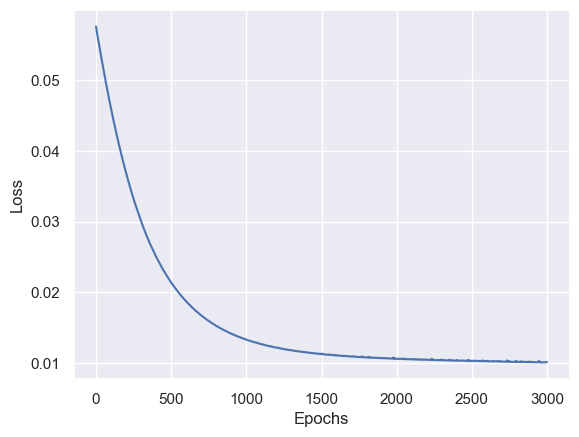

In [120]:
# plota as loss para ver se está treinando
plt.plot(historyCFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

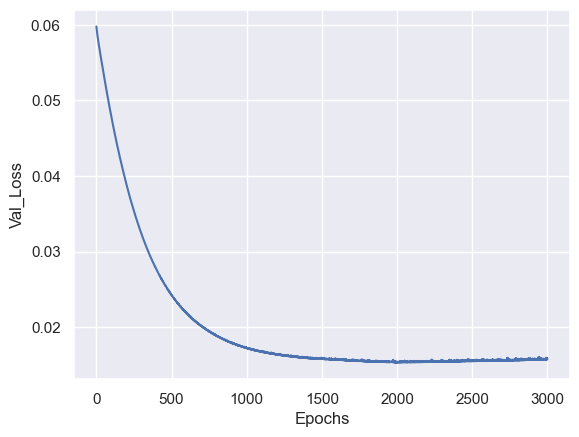

In [121]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyCFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [59]:
#modelCFE.save('modelosNovos\\Apogee2\\model_CFE.h5')

In [122]:
predtest = modelCFE.predict(X_test)

20/20 [==============================] - 0s 8ms/step


Text(0, 0.5, 'Y_test')

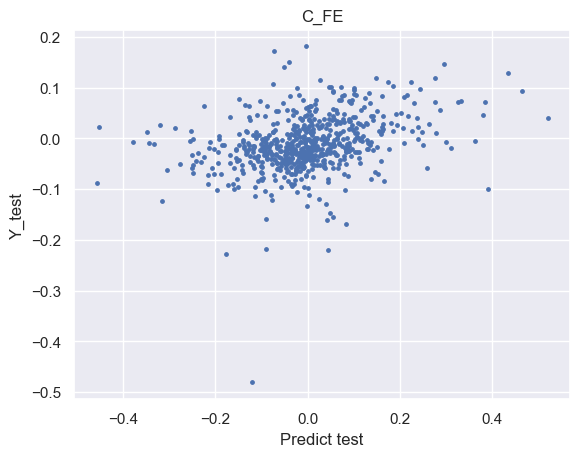

In [123]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('C_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [124]:
Y_test['CFE_Predict'] = predtest

In [125]:
Y_test

TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                
MC0061_000002407       -0.822770  4.537957 -0.002718 -0.018144 -0.315470   
SPLUS-n02s18_000002500 -0.579985  4.591905  0.038469 -0.021040 -0.005504   
MC0145_000010989        0.692253  4.446544  0.028430  0.092106 -0.110602   
MC0025_000258685       -0.024071  4.496673  0.061806  0.042466 -0.092897   
SPLUS-n01s18_000007826  0.018481  4.266320 -0.012097 -0.098167 -0.223850   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.663351  4.587575  0.062983 -0.038318 -0.088772   
MC0108_000057588       -0.622598  4.572570  0.196925  0.079666  0.034718   
SPLUS-n12s39_000004081 -0.526779  3.936834  0.102940  0.110074  0.016362   
MC0001_000002946       -0.806151  4.583101  0.063160 -0.036456 -0.033902   
SPLUS-n02s23_000011948 -0.325905  4.560552  0.073263  0.056296  0.081828   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  \
Field_splus                                                                
MC0061_000002407       -0.175950 -0.046311  0.099400 -0.055090  0.060595   
SPLUS-n02s18_000002500 -0.500060  0.033458 -0.060903 -0.007740  0.082594   
MC0145_000010989       -0.133260  0.023189  0.772480 -0.141130 -0.031289   
MC0025_000258685       -0.225500  0.083045 -0.138710  0.044850  0.174553   
SPLUS-n01s18_000007826 -0.376720  0.002678 -0.467810 -0.006090 -0.001113   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.436840  0.096979 -0.038955  0.052990  0.107140   
MC0108_000057588       -0.384950  0.273919 -0.029625 -0.005760  0.191753   
SPLUS-n12s39_000004081  0.013653  0.176812  0.015204  0.060096  0.042921   
MC0001_000002946        0.002456  0.109154  0.106141 -0.043273  0.083254   
SPLUS-n02s23_000011948 -0.367090  0.121190 -0.065663 -0.001940  0.023506   

                        alpha_predict  TEFFDecoded  TEFF_PredictDecoded  \
Field_splus                                                               
MC0061_000002407             0.048315    4771.7373          4796.384277   
SPLUS-n02s18_000002500       0.121821    5032.4746          5101.136230   
MC0145_000010989             0.035194    6398.7847          6177.354980   
MC0025_000258685             0.081249    5629.4937          5729.455566   
SPLUS-n01s18_000007826       0.086296    5675.1930          5692.469238   
...                               ...          ...                  ...   
SPLUS-s36s48_000004167       0.046960    4942.9450          5055.099609   
MC0108_000057588             0.132517    4986.7110          4920.656738   
SPLUS-n12s39_000004081       0.039232    5089.6150          5074.607422   
MC0001_000002946             0.031617    4789.5854          4771.262695   
SPLUS-n02s23_000011948       0.067230    5305.3423          5219.129395   

                        LOGG_Predict  FEH_Predict  CAFE_Predict  CFE_Predict  
Field_splus                                                                   
MC0061_000002407            4.529244    -0.284677      0.032171    -0.123158  
SPLUS-n02s18_000002500      4.566516    -0.391178      0.017074    -0.006190  
MC0145_000010989            4.131693    -0.211765     -0.002815     0.046517  
MC0025_000258685            4.339001    -0.279816      0.081508     0.043855  
SPLUS-n01s18_000007826      4.367851    -0.328131      0.074316     0.063608  
...                              ...          ...           ...          ...  
SPLUS-s36s48_000004167      4.531365    -0.161693      0.011021    -0.038756  
MC0108_000057588            4.579930    -0.391790      0.090287    -0.056742  
SPLUS-n12s39_000004081      4.152612     0.038791      0.037337    -0.031631  
MC0001_000002946            4.576632    -0.073014     -0.003118    -0.038200  
SPLUS-n02s23_000011948      4.599397    -0.306728      0.013974    -0.027413  

[631 rows x 17 columns]

In [126]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\CFEPredict.csv")

## MGFE

In [127]:
modelMGFE = baseline_model_teste()

In [128]:
columnTrain = 'MG_FE'

In [129]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyMGFE = modelMGFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
1/1 - 1s - loss: 0.0708 - val_loss: 0.0713 - 551ms/epoch - 551ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.0694 - val_loss: 0.0700 - 60ms/epoch - 60ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.0682 - val_loss: 0.0688 - 56ms/epoch - 56ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.0671 - val_loss: 0.0677 - 55ms/epoch - 55ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.0661 - val_loss: 0.0667 - 58ms/epoch - 58ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.0652 - val_loss: 0.0658 - 45ms/epoch - 45ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.0644 - val_loss: 0.0650 - 53ms/epoch - 53ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.0636 - val_loss: 0.0642 - 68ms/epoch - 68ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.0629 - val_loss: 0.0635 - 46ms/epoch - 46ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.0622 - val_loss: 0.0628 - 38ms/epoch - 38ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.0616 - val_loss: 0.0622 - 38ms/epoch - 38ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.0610 - val_loss: 0.0616 - 39ms/epoch - 39ms/step
Epoch 13/3000
1/1 - 0s 

Epoch 101/3000
1/1 - 0s - loss: 0.0495 - val_loss: 0.0501 - 35ms/epoch - 35ms/step
Epoch 102/3000
1/1 - 0s - loss: 0.0494 - val_loss: 0.0501 - 33ms/epoch - 33ms/step
Epoch 103/3000
1/1 - 0s - loss: 0.0493 - val_loss: 0.0500 - 35ms/epoch - 35ms/step
Epoch 104/3000
1/1 - 0s - loss: 0.0492 - val_loss: 0.0499 - 32ms/epoch - 32ms/step
Epoch 105/3000
1/1 - 0s - loss: 0.0491 - val_loss: 0.0498 - 34ms/epoch - 34ms/step
Epoch 106/3000
1/1 - 0s - loss: 0.0490 - val_loss: 0.0497 - 34ms/epoch - 34ms/step
Epoch 107/3000
1/1 - 0s - loss: 0.0490 - val_loss: 0.0496 - 34ms/epoch - 34ms/step
Epoch 108/3000
1/1 - 0s - loss: 0.0489 - val_loss: 0.0496 - 34ms/epoch - 34ms/step
Epoch 109/3000
1/1 - 0s - loss: 0.0488 - val_loss: 0.0495 - 34ms/epoch - 34ms/step
Epoch 110/3000
1/1 - 0s - loss: 0.0487 - val_loss: 0.0494 - 35ms/epoch - 35ms/step
Epoch 111/3000
1/1 - 0s - loss: 0.0486 - val_loss: 0.0493 - 36ms/epoch - 36ms/step
Epoch 112/3000
1/1 - 0s - loss: 0.0485 - val_loss: 0.0492 - 33ms/epoch - 33ms/step
Epoc

Epoch 200/3000
1/1 - 0s - loss: 0.0409 - val_loss: 0.0423 - 44ms/epoch - 44ms/step
Epoch 201/3000
1/1 - 0s - loss: 0.0408 - val_loss: 0.0422 - 40ms/epoch - 40ms/step
Epoch 202/3000
1/1 - 0s - loss: 0.0407 - val_loss: 0.0421 - 40ms/epoch - 40ms/step
Epoch 203/3000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0420 - 37ms/epoch - 37ms/step
Epoch 204/3000
1/1 - 0s - loss: 0.0405 - val_loss: 0.0420 - 41ms/epoch - 41ms/step
Epoch 205/3000
1/1 - 0s - loss: 0.0405 - val_loss: 0.0419 - 39ms/epoch - 39ms/step
Epoch 206/3000
1/1 - 0s - loss: 0.0404 - val_loss: 0.0418 - 41ms/epoch - 41ms/step
Epoch 207/3000
1/1 - 0s - loss: 0.0403 - val_loss: 0.0418 - 37ms/epoch - 37ms/step
Epoch 208/3000
1/1 - 0s - loss: 0.0402 - val_loss: 0.0417 - 45ms/epoch - 45ms/step
Epoch 209/3000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0416 - 43ms/epoch - 43ms/step
Epoch 210/3000
1/1 - 0s - loss: 0.0401 - val_loss: 0.0415 - 40ms/epoch - 40ms/step
Epoch 211/3000
1/1 - 0s - loss: 0.0400 - val_loss: 0.0415 - 39ms/epoch - 39ms/step
Epoc

Epoch 299/3000
1/1 - 0s - loss: 0.0337 - val_loss: 0.0357 - 40ms/epoch - 40ms/step
Epoch 300/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0357 - 38ms/epoch - 38ms/step
Epoch 301/3000
1/1 - 0s - loss: 0.0336 - val_loss: 0.0356 - 55ms/epoch - 55ms/step
Epoch 302/3000
1/1 - 0s - loss: 0.0335 - val_loss: 0.0356 - 39ms/epoch - 39ms/step
Epoch 303/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0355 - 91ms/epoch - 91ms/step
Epoch 304/3000
1/1 - 0s - loss: 0.0334 - val_loss: 0.0355 - 38ms/epoch - 38ms/step
Epoch 305/3000
1/1 - 0s - loss: 0.0333 - val_loss: 0.0354 - 76ms/epoch - 76ms/step
Epoch 306/3000
1/1 - 0s - loss: 0.0333 - val_loss: 0.0354 - 38ms/epoch - 38ms/step
Epoch 307/3000
1/1 - 0s - loss: 0.0332 - val_loss: 0.0353 - 70ms/epoch - 70ms/step
Epoch 308/3000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0352 - 93ms/epoch - 93ms/step
Epoch 309/3000
1/1 - 0s - loss: 0.0331 - val_loss: 0.0352 - 39ms/epoch - 39ms/step
Epoch 310/3000
1/1 - 0s - loss: 0.0330 - val_loss: 0.0351 - 40ms/epoch - 40ms/step
Epoc

Epoch 398/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0308 - 43ms/epoch - 43ms/step
Epoch 399/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0308 - 40ms/epoch - 40ms/step
Epoch 400/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0307 - 42ms/epoch - 42ms/step
Epoch 401/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0307 - 42ms/epoch - 42ms/step
Epoch 402/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0306 - 42ms/epoch - 42ms/step
Epoch 403/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0306 - 41ms/epoch - 41ms/step
Epoch 404/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0305 - 41ms/epoch - 41ms/step
Epoch 405/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0305 - 36ms/epoch - 36ms/step
Epoch 406/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0305 - 34ms/epoch - 34ms/step
Epoch 407/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0304 - 35ms/epoch - 35ms/step
Epoch 408/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0304 - 37ms/epoch - 37ms/step
Epoch 409/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0303 - 37ms/epoch - 37ms/step
Epoc

Epoch 497/3000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0270 - 37ms/epoch - 37ms/step
Epoch 498/3000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0270 - 37ms/epoch - 37ms/step
Epoch 499/3000
1/1 - 0s - loss: 0.0242 - val_loss: 0.0270 - 37ms/epoch - 37ms/step
Epoch 500/3000
1/1 - 0s - loss: 0.0241 - val_loss: 0.0270 - 37ms/epoch - 37ms/step
Epoch 501/3000
1/1 - 0s - loss: 0.0241 - val_loss: 0.0269 - 39ms/epoch - 39ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0241 - val_loss: 0.0269 - 38ms/epoch - 38ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0268 - 38ms/epoch - 38ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0268 - 39ms/epoch - 39ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0240 - val_loss: 0.0268 - 38ms/epoch - 38ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0239 - val_loss: 0.0268 - 36ms/epoch - 36ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0239 - val_loss: 0.0267 - 37ms/epoch - 37ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0239 - val_loss: 0.0267 - 40ms/epoch - 40ms/step
Epoc

Epoch 596/3000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0241 - 34ms/epoch - 34ms/step
Epoch 597/3000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0241 - 38ms/epoch - 38ms/step
Epoch 598/3000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0241 - 37ms/epoch - 37ms/step
Epoch 599/3000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0240 - 37ms/epoch - 37ms/step
Epoch 600/3000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0240 - 40ms/epoch - 40ms/step
Epoch 601/3000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0240 - 39ms/epoch - 39ms/step
Epoch 602/3000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0240 - 36ms/epoch - 36ms/step
Epoch 603/3000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0239 - 38ms/epoch - 38ms/step
Epoch 604/3000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0239 - 37ms/epoch - 37ms/step
Epoch 605/3000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0239 - 37ms/epoch - 37ms/step
Epoch 606/3000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0238 - 37ms/epoch - 37ms/step
Epoch 607/3000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0238 - 37ms/epoch - 37ms/step
Epoc

Epoch 695/3000
1/1 - 0s - loss: 0.0187 - val_loss: 0.0218 - 35ms/epoch - 35ms/step
Epoch 696/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0218 - 36ms/epoch - 36ms/step
Epoch 697/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0218 - 38ms/epoch - 38ms/step
Epoch 698/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0218 - 37ms/epoch - 37ms/step
Epoch 699/3000
1/1 - 0s - loss: 0.0186 - val_loss: 0.0217 - 37ms/epoch - 37ms/step
Epoch 700/3000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0217 - 37ms/epoch - 37ms/step
Epoch 701/3000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0217 - 36ms/epoch - 36ms/step
Epoch 702/3000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0217 - 37ms/epoch - 37ms/step
Epoch 703/3000
1/1 - 0s - loss: 0.0185 - val_loss: 0.0217 - 37ms/epoch - 37ms/step
Epoch 704/3000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0216 - 34ms/epoch - 34ms/step
Epoch 705/3000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0216 - 39ms/epoch - 39ms/step
Epoch 706/3000
1/1 - 0s - loss: 0.0184 - val_loss: 0.0216 - 37ms/epoch - 37ms/step
Epoc

Epoch 794/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 32ms/epoch - 32ms/step
Epoch 795/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 31ms/epoch - 31ms/step
Epoch 796/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 36ms/epoch - 36ms/step
Epoch 797/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 32ms/epoch - 32ms/step
Epoch 798/3000
1/1 - 0s - loss: 0.0167 - val_loss: 0.0201 - 37ms/epoch - 37ms/step
Epoch 799/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0201 - 41ms/epoch - 41ms/step
Epoch 800/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0200 - 46ms/epoch - 46ms/step
Epoch 801/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0200 - 41ms/epoch - 41ms/step
Epoch 802/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0200 - 35ms/epoch - 35ms/step
Epoch 803/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0200 - 33ms/epoch - 33ms/step
Epoch 804/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0200 - 37ms/epoch - 37ms/step
Epoch 805/3000
1/1 - 0s - loss: 0.0166 - val_loss: 0.0200 - 34ms/epoch - 34ms/step
Epoc

Epoch 893/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0188 - 35ms/epoch - 35ms/step
Epoch 894/3000
1/1 - 0s - loss: 0.0153 - val_loss: 0.0188 - 36ms/epoch - 36ms/step
Epoch 895/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 37ms/epoch - 37ms/step
Epoch 896/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 35ms/epoch - 35ms/step
Epoch 897/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 37ms/epoch - 37ms/step
Epoch 898/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0188 - 35ms/epoch - 35ms/step
Epoch 899/3000
1/1 - 0s - loss: 0.0152 - val_loss: 0.0187 - 38ms/epoch - 38ms/step
Epoch 900/3000
1/1 - 0s - loss: 0.0151 - val_loss: 0.0187 - 36ms/epoch - 36ms/step
Epoch 901/3000
1/1 - 0s - loss: 0.0151 - val_loss: 0.0187 - 34ms/epoch - 34ms/step
Epoch 902/3000
1/1 - 0s - loss: 0.0151 - val_loss: 0.0187 - 37ms/epoch - 37ms/step
Epoch 903/3000
1/1 - 0s - loss: 0.0151 - val_loss: 0.0187 - 34ms/epoch - 34ms/step
Epoch 904/3000
1/1 - 0s - loss: 0.0151 - val_loss: 0.0187 - 37ms/epoch - 37ms/step
Epoc

Epoch 992/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0179 - 40ms/epoch - 40ms/step
Epoch 993/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0179 - 42ms/epoch - 42ms/step
Epoch 994/3000
1/1 - 0s - loss: 0.0141 - val_loss: 0.0178 - 37ms/epoch - 37ms/step
Epoch 995/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 42ms/epoch - 42ms/step
Epoch 996/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 38ms/epoch - 38ms/step
Epoch 997/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 44ms/epoch - 44ms/step
Epoch 998/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 42ms/epoch - 42ms/step
Epoch 999/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 41ms/epoch - 41ms/step
Epoch 1000/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 45ms/epoch - 45ms/step
Epoch 1001/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 43ms/epoch - 43ms/step
Epoch 1002/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 38ms/epoch - 38ms/step
Epoch 1003/3000
1/1 - 0s - loss: 0.0140 - val_loss: 0.0178 - 43ms/epoch - 43ms/step


Epoch 1090/3000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0172 - 39ms/epoch - 39ms/step
Epoch 1091/3000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0171 - 39ms/epoch - 39ms/step
Epoch 1092/3000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1093/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 42ms/epoch - 42ms/step
Epoch 1094/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1095/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1096/3000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0171 - 38ms/epoch - 38ms/step
Epoch 1097/3000
1/1 - 0s - loss: 0.0132 - val_loss: 0.0171 - 41ms/epoch - 41ms/step
Epoch 1098/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 40ms/epoch - 40ms/step
Epoch 1099/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 38ms/epoch - 38ms/step
Epoch 1100/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 41ms/epoch - 41ms/step
Epoch 1101/3000
1/1 - 0s - loss: 0.0131 - val_loss: 0.0171 - 40ms/epoch - 40

Epoch 1188/3000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0166 - 38ms/epoch - 38ms/step
Epoch 1189/3000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0166 - 70ms/epoch - 70ms/step
Epoch 1190/3000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0166 - 36ms/epoch - 36ms/step
Epoch 1191/3000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0166 - 70ms/epoch - 70ms/step
Epoch 1192/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0166 - 39ms/epoch - 39ms/step
Epoch 1193/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 69ms/epoch - 69ms/step
Epoch 1194/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 37ms/epoch - 37ms/step
Epoch 1195/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 70ms/epoch - 70ms/step
Epoch 1196/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 35ms/epoch - 35ms/step
Epoch 1197/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 70ms/epoch - 70ms/step
Epoch 1198/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 36ms/epoch - 36ms/step
Epoch 1199/3000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0165 - 38ms/epoch - 38

Epoch 1286/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 39ms/epoch - 39ms/step
Epoch 1287/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 1288/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0162 - 38ms/epoch - 38ms/step
Epoch 1289/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 41ms/epoch - 41ms/step
Epoch 1290/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 37ms/epoch - 37ms/step
Epoch 1291/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 42ms/epoch - 42ms/step
Epoch 1292/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 1293/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0161 - 38ms/epoch - 38ms/step
Epoch 1294/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 1295/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0161 - 53ms/epoch - 53ms/step
Epoch 1296/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0161 - 40ms/epoch - 40ms/step
Epoch 1297/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0161 - 66ms/epoch - 66

Epoch 1384/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 1385/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 39ms/epoch - 39ms/step
Epoch 1386/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 40ms/epoch - 40ms/step
Epoch 1387/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 1388/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 1389/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 38ms/epoch - 38ms/step
Epoch 1390/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 1391/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 38ms/epoch - 38ms/step
Epoch 1392/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 39ms/epoch - 39ms/step
Epoch 1393/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0158 - 38ms/epoch - 38ms/step
Epoch 1394/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0157 - 38ms/epoch - 38ms/step
Epoch 1395/3000
1/1 - 0s - loss: 0.0114 - val_loss: 0.0157 - 37ms/epoch - 37

Epoch 1482/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1483/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1484/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 1485/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 1486/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 39ms/epoch - 39ms/step
Epoch 1487/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 1488/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 1489/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 38ms/epoch - 38ms/step
Epoch 1490/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 40ms/epoch - 40ms/step
Epoch 1491/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1492/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 37ms/epoch - 37ms/step
Epoch 1493/3000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0155 - 38ms/epoch - 38

Epoch 1580/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0153 - 56ms/epoch - 56ms/step
Epoch 1581/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0153 - 59ms/epoch - 59ms/step
Epoch 1582/3000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0153 - 42ms/epoch - 42ms/step
Epoch 1583/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 41ms/epoch - 41ms/step
Epoch 1584/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 41ms/epoch - 41ms/step
Epoch 1585/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 44ms/epoch - 44ms/step
Epoch 1586/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 38ms/epoch - 38ms/step
Epoch 1587/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 38ms/epoch - 38ms/step
Epoch 1588/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 37ms/epoch - 37ms/step
Epoch 1589/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 37ms/epoch - 37ms/step
Epoch 1590/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 36ms/epoch - 36ms/step
Epoch 1591/3000
1/1 - 0s - loss: 0.0107 - val_loss: 0.0153 - 38ms/epoch - 38

Epoch 1678/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0152 - 37ms/epoch - 37ms/step
Epoch 1679/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0152 - 37ms/epoch - 37ms/step
Epoch 1680/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0152 - 38ms/epoch - 38ms/step
Epoch 1681/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0152 - 36ms/epoch - 36ms/step
Epoch 1682/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0152 - 37ms/epoch - 37ms/step
Epoch 1683/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0151 - 38ms/epoch - 38ms/step
Epoch 1684/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0152 - 37ms/epoch - 37ms/step
Epoch 1685/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0151 - 37ms/epoch - 37ms/step
Epoch 1686/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 1687/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0151 - 47ms/epoch - 47ms/step
Epoch 1688/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 1689/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0151 - 38ms/epoch - 38

Epoch 1776/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 1777/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 1778/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 1779/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 1780/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0151 - 39ms/epoch - 39ms/step
Epoch 1781/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0151 - 37ms/epoch - 37ms/step
Epoch 1782/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0151 - 39ms/epoch - 39ms/step
Epoch 1783/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 1784/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 45ms/epoch - 45ms/step
Epoch 1785/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 40ms/epoch - 40ms/step
Epoch 1786/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 40ms/epoch - 40ms/step
Epoch 1787/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 41ms/epoch - 41

Epoch 1874/3000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0150 - 37ms/epoch - 37ms/step
Epoch 1875/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 1876/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 1877/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0151 - 36ms/epoch - 36ms/step
Epoch 1878/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0151 - 34ms/epoch - 34ms/step
Epoch 1879/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0151 - 34ms/epoch - 34ms/step
Epoch 1880/3000
1/1 - 0s - loss: 0.0102 - val_loss: 0.0150 - 36ms/epoch - 36ms/step
Epoch 1881/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 1882/3000
1/1 - 0s - loss: 0.0101 - val_loss: 0.0150 - 35ms/epoch - 35ms/step
Epoch 1883/3000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0150 - 36ms/epoch - 36ms/step
Epoch 1884/3000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0150 - 36ms/epoch - 36ms/step
Epoch 1885/3000
1/1 - 0s - loss: 0.0100 - val_loss: 0.0150 - 36ms/epoch - 36

Epoch 1972/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 40ms/epoch - 40ms/step
Epoch 1973/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 36ms/epoch - 36ms/step
Epoch 1974/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 1975/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 40ms/epoch - 40ms/step
Epoch 1976/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 36ms/epoch - 36ms/step
Epoch 1977/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 45ms/epoch - 45ms/step
Epoch 1978/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0149 - 37ms/epoch - 37ms/step
Epoch 1979/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0149 - 40ms/epoch - 40ms/step
Epoch 1980/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0149 - 36ms/epoch - 36ms/step
Epoch 1981/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0149 - 37ms/epoch - 37ms/step
Epoch 1982/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 1983/3000
1/1 - 0s - loss: 0.0099 - val_loss: 0.0150 - 40ms/epoch - 40

Epoch 2070/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0149 - 69ms/epoch - 69ms/step
Epoch 2071/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2072/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0149 - 72ms/epoch - 72ms/step
Epoch 2073/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2074/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0149 - 68ms/epoch - 68ms/step
Epoch 2075/3000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2076/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2077/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2078/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2079/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2080/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2081/3000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0149 - 33ms/epoch - 33

Epoch 2168/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2169/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 31ms/epoch - 31ms/step
Epoch 2170/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2171/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2172/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2173/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2174/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2175/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2176/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2177/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2178/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 36ms/epoch - 36ms/step
Epoch 2179/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 34ms/epoch - 34

Epoch 2266/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 38ms/epoch - 38ms/step
Epoch 2267/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 38ms/epoch - 38ms/step
Epoch 2268/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 38ms/epoch - 38ms/step
Epoch 2269/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 48ms/epoch - 48ms/step
Epoch 2270/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 41ms/epoch - 41ms/step
Epoch 2271/3000
1/1 - 0s - loss: 0.0096 - val_loss: 0.0149 - 40ms/epoch - 40ms/step
Epoch 2272/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 39ms/epoch - 39ms/step
Epoch 2273/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 41ms/epoch - 41ms/step
Epoch 2274/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 38ms/epoch - 38ms/step
Epoch 2275/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 40ms/epoch - 40ms/step
Epoch 2276/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 40ms/epoch - 40ms/step
Epoch 2277/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0149 - 39ms/epoch - 39

Epoch 2364/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 35ms/epoch - 35ms/step
Epoch 2365/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2366/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2367/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2368/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 32ms/epoch - 32ms/step
Epoch 2369/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 33ms/epoch - 33ms/step
Epoch 2370/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 35ms/epoch - 35ms/step
Epoch 2371/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 34ms/epoch - 34ms/step
Epoch 2372/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0150 - 35ms/epoch - 35ms/step
Epoch 2373/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 2374/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0150 - 32ms/epoch - 32ms/step
Epoch 2375/3000
1/1 - 0s - loss: 0.0095 - val_loss: 0.0150 - 33ms/epoch - 33

Epoch 2462/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0150 - 37ms/epoch - 37ms/step
Epoch 2463/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 2464/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 2465/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 2466/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 2467/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0150 - 41ms/epoch - 41ms/step
Epoch 2468/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0149 - 38ms/epoch - 38ms/step
Epoch 2469/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0149 - 38ms/epoch - 38ms/step
Epoch 2470/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0149 - 37ms/epoch - 37ms/step
Epoch 2471/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 38ms/epoch - 38ms/step
Epoch 2472/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 37ms/epoch - 37ms/step
Epoch 2473/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 36ms/epoch - 36

Epoch 2560/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 2561/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 33ms/epoch - 33ms/step
Epoch 2562/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 42ms/epoch - 42ms/step
Epoch 2563/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 2564/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 33ms/epoch - 33ms/step
Epoch 2565/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 32ms/epoch - 32ms/step
Epoch 2566/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 2567/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 2568/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 35ms/epoch - 35ms/step
Epoch 2569/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 36ms/epoch - 36ms/step
Epoch 2570/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 34ms/epoch - 34ms/step
Epoch 2571/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0150 - 33ms/epoch - 33

Epoch 2658/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0151 - 39ms/epoch - 39ms/step
Epoch 2659/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 2660/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 2661/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0150 - 39ms/epoch - 39ms/step
Epoch 2662/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0150 - 40ms/epoch - 40ms/step
Epoch 2663/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0150 - 41ms/epoch - 41ms/step
Epoch 2664/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 38ms/epoch - 38ms/step
Epoch 2665/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 2666/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0151 - 38ms/epoch - 38ms/step
Epoch 2667/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0151 - 38ms/epoch - 38ms/step
Epoch 2668/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0151 - 49ms/epoch - 49ms/step
Epoch 2669/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0150 - 40ms/epoch - 40

Epoch 2756/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 66ms/epoch - 66ms/step
Epoch 2757/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 100ms/epoch - 100ms/step
Epoch 2758/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 60ms/epoch - 60ms/step
Epoch 2759/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 103ms/epoch - 103ms/step
Epoch 2760/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 83ms/epoch - 83ms/step
Epoch 2761/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 43ms/epoch - 43ms/step
Epoch 2762/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 39ms/epoch - 39ms/step
Epoch 2763/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 2764/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 2765/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 2766/3000
1/1 - 0s - loss: 0.0092 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 2767/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 37ms/epoch 

Epoch 2854/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 47ms/epoch - 47ms/step
Epoch 2855/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 38ms/epoch - 38ms/step
Epoch 2856/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 2857/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 42ms/epoch - 42ms/step
Epoch 2858/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 2859/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 39ms/epoch - 39ms/step
Epoch 2860/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 2861/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 38ms/epoch - 38ms/step
Epoch 2862/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 41ms/epoch - 41ms/step
Epoch 2863/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 40ms/epoch - 40ms/step
Epoch 2864/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 36ms/epoch - 36ms/step
Epoch 2865/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0151 - 48ms/epoch - 48

Epoch 2952/3000
1/1 - 0s - loss: 0.0091 - val_loss: 0.0153 - 76ms/epoch - 76ms/step
Epoch 2953/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 38ms/epoch - 38ms/step
Epoch 2954/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 70ms/epoch - 70ms/step
Epoch 2955/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 40ms/epoch - 40ms/step
Epoch 2956/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 39ms/epoch - 39ms/step
Epoch 2957/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 39ms/epoch - 39ms/step
Epoch 2958/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 38ms/epoch - 38ms/step
Epoch 2959/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 43ms/epoch - 43ms/step
Epoch 2960/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 39ms/epoch - 39ms/step
Epoch 2961/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 41ms/epoch - 41ms/step
Epoch 2962/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 40ms/epoch - 40ms/step
Epoch 2963/3000
1/1 - 0s - loss: 0.0090 - val_loss: 0.0153 - 42ms/epoch - 42

Text(0, 0.5, 'Loss')

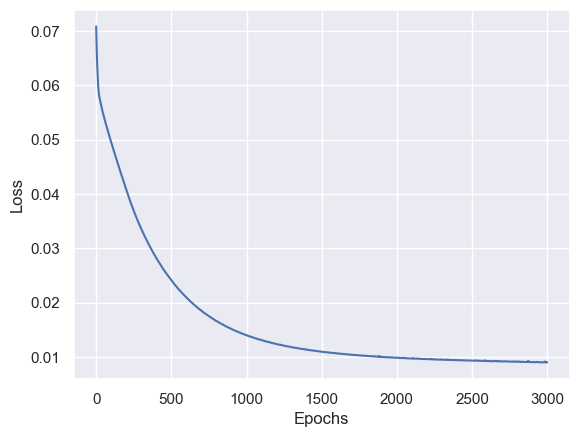

In [130]:
# plota as loss para ver se está treinando
plt.plot(historyMGFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

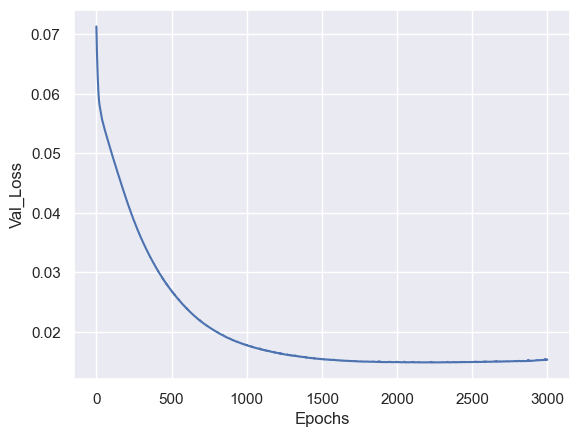

In [131]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyMGFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [86]:
#modelMGFE.save('modelosNovos\\Apogee2\\model_MGFE.h5')

In [132]:
predtest = modelMGFE.predict(X_test)

20/20 [==============================] - 0s 1ms/step


Text(0, 0.5, 'Y_test')

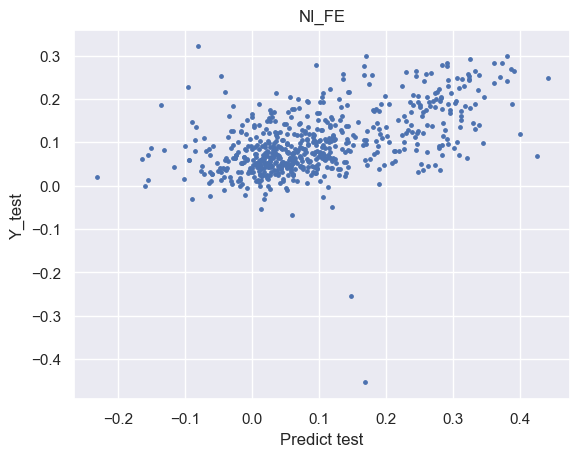

In [133]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [134]:
Y_test['MGFE_Predict'] = predtest

In [135]:
Y_test

TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                
MC0061_000002407       -0.822770  4.537957 -0.002718 -0.018144 -0.315470   
SPLUS-n02s18_000002500 -0.579985  4.591905  0.038469 -0.021040 -0.005504   
MC0145_000010989        0.692253  4.446544  0.028430  0.092106 -0.110602   
MC0025_000258685       -0.024071  4.496673  0.061806  0.042466 -0.092897   
SPLUS-n01s18_000007826  0.018481  4.266320 -0.012097 -0.098167 -0.223850   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.663351  4.587575  0.062983 -0.038318 -0.088772   
MC0108_000057588       -0.622598  4.572570  0.196925  0.079666  0.034718   
SPLUS-n12s39_000004081 -0.526779  3.936834  0.102940  0.110074  0.016362   
MC0001_000002946       -0.806151  4.583101  0.063160 -0.036456 -0.033902   
SPLUS-n02s23_000011948 -0.325905  4.560552  0.073263  0.056296  0.081828   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  \
Field_splus                                                                
MC0061_000002407       -0.175950 -0.046311  0.099400 -0.055090  0.060595   
SPLUS-n02s18_000002500 -0.500060  0.033458 -0.060903 -0.007740  0.082594   
MC0145_000010989       -0.133260  0.023189  0.772480 -0.141130 -0.031289   
MC0025_000258685       -0.225500  0.083045 -0.138710  0.044850  0.174553   
SPLUS-n01s18_000007826 -0.376720  0.002678 -0.467810 -0.006090 -0.001113   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.436840  0.096979 -0.038955  0.052990  0.107140   
MC0108_000057588       -0.384950  0.273919 -0.029625 -0.005760  0.191753   
SPLUS-n12s39_000004081  0.013653  0.176812  0.015204  0.060096  0.042921   
MC0001_000002946        0.002456  0.109154  0.106141 -0.043273  0.083254   
SPLUS-n02s23_000011948 -0.367090  0.121190 -0.065663 -0.001940  0.023506   

                        alpha_predict  TEFFDecoded  TEFF_PredictDecoded  \
Field_splus                                                               
MC0061_000002407             0.048315    4771.7373          4796.384277   
SPLUS-n02s18_000002500       0.121821    5032.4746          5101.136230   
MC0145_000010989             0.035194    6398.7847          6177.354980   
MC0025_000258685             0.081249    5629.4937          5729.455566   
SPLUS-n01s18_000007826       0.086296    5675.1930          5692.469238   
...                               ...          ...                  ...   
SPLUS-s36s48_000004167       0.046960    4942.9450          5055.099609   
MC0108_000057588             0.132517    4986.7110          4920.656738   
SPLUS-n12s39_000004081       0.039232    5089.6150          5074.607422   
MC0001_000002946             0.031617    4789.5854          4771.262695   
SPLUS-n02s23_000011948       0.067230    5305.3423          5219.129395   

                        LOGG_Predict  FEH_Predict  CAFE_Predict  CFE_Predict  \
Field_splus                                                                    
MC0061_000002407            4.529244    -0.284677      0.032171    -0.123158   
SPLUS-n02s18_000002500      4.566516    -0.391178      0.017074    -0.006190   
MC0145_000010989            4.131693    -0.211765     -0.002815     0.046517   
MC0025_000258685            4.339001    -0.279816      0.081508     0.043855   
SPLUS-n01s18_000007826      4.367851    -0.328131      0.074316     0.063608   
...                              ...          ...           ...          ...   
SPLUS-s36s48_000004167      4.531365    -0.161693      0.011021    -0.038756   
MC0108_000057588            4.579930    -0.391790      0.090287    -0.056742   
SPLUS-n12s39_000004081      4.152612     0.038791      0.037337    -0.031631   
MC0001_000002946            4.576632    -0.073014     -0.003118    -0.038200   
SPLUS-n02s23_000011948      4.599397    -0.306728      0.013974    -0.027413   

                        MGFE_Pred

In [136]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\MgFePredict.csv")

## NFE

In [143]:
modelNFE = baseline_model_teste()

In [144]:
columnTrain = 'N_FE'

In [145]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNFE = modelNFE.fit(X_train, Y_train[[columnTrain]], epochs = 600, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/750
1/1 - 1s - loss: 0.1148 - val_loss: 0.1243 - 564ms/epoch - 564ms/step
Epoch 2/750
1/1 - 0s - loss: 0.1142 - val_loss: 0.1239 - 74ms/epoch - 74ms/step
Epoch 3/750
1/1 - 0s - loss: 0.1136 - val_loss: 0.1236 - 138ms/epoch - 138ms/step
Epoch 4/750
1/1 - 0s - loss: 0.1131 - val_loss: 0.1233 - 34ms/epoch - 34ms/step
Epoch 5/750
1/1 - 0s - loss: 0.1126 - val_loss: 0.1231 - 38ms/epoch - 38ms/step
Epoch 6/750
1/1 - 0s - loss: 0.1123 - val_loss: 0.1229 - 33ms/epoch - 33ms/step
Epoch 7/750
1/1 - 0s - loss: 0.1119 - val_loss: 0.1228 - 33ms/epoch - 33ms/step
Epoch 8/750
1/1 - 0s - loss: 0.1116 - val_loss: 0.1227 - 34ms/epoch - 34ms/step
Epoch 9/750
1/1 - 0s - loss: 0.1114 - val_loss: 0.1226 - 35ms/epoch - 35ms/step
Epoch 10/750
1/1 - 0s - loss: 0.1112 - val_loss: 0.1225 - 33ms/epoch - 33ms/step
Epoch 11/750
1/1 - 0s - loss: 0.1110 - val_loss: 0.1225 - 34ms/epoch - 34ms/step
Epoch 12/750
1/1 - 0s - loss: 0.1108 - val_loss: 0.1224 - 35ms/epoch - 35ms/step
Epoch 13/750
1/1 - 0s - loss: 0.1

Epoch 103/750
1/1 - 0s - loss: 0.0976 - val_loss: 0.1064 - 42ms/epoch - 42ms/step
Epoch 104/750
1/1 - 0s - loss: 0.0975 - val_loss: 0.1063 - 40ms/epoch - 40ms/step
Epoch 105/750
1/1 - 0s - loss: 0.0974 - val_loss: 0.1061 - 42ms/epoch - 42ms/step
Epoch 106/750
1/1 - 0s - loss: 0.0972 - val_loss: 0.1059 - 49ms/epoch - 49ms/step
Epoch 107/750
1/1 - 0s - loss: 0.0971 - val_loss: 0.1058 - 43ms/epoch - 43ms/step
Epoch 108/750
1/1 - 0s - loss: 0.0970 - val_loss: 0.1056 - 43ms/epoch - 43ms/step
Epoch 109/750
1/1 - 0s - loss: 0.0968 - val_loss: 0.1054 - 42ms/epoch - 42ms/step
Epoch 110/750
1/1 - 0s - loss: 0.0967 - val_loss: 0.1053 - 40ms/epoch - 40ms/step
Epoch 111/750
1/1 - 0s - loss: 0.0966 - val_loss: 0.1051 - 41ms/epoch - 41ms/step
Epoch 112/750
1/1 - 0s - loss: 0.0964 - val_loss: 0.1049 - 40ms/epoch - 40ms/step
Epoch 113/750
1/1 - 0s - loss: 0.0963 - val_loss: 0.1047 - 42ms/epoch - 42ms/step
Epoch 114/750
1/1 - 0s - loss: 0.0961 - val_loss: 0.1045 - 43ms/epoch - 43ms/step
Epoch 115/750
1/

Epoch 203/750
1/1 - 0s - loss: 0.0852 - val_loss: 0.0895 - 40ms/epoch - 40ms/step
Epoch 204/750
1/1 - 0s - loss: 0.0851 - val_loss: 0.0893 - 41ms/epoch - 41ms/step
Epoch 205/750
1/1 - 0s - loss: 0.0850 - val_loss: 0.0892 - 40ms/epoch - 40ms/step
Epoch 206/750
1/1 - 0s - loss: 0.0849 - val_loss: 0.0892 - 40ms/epoch - 40ms/step
Epoch 207/750
1/1 - 0s - loss: 0.0848 - val_loss: 0.0889 - 39ms/epoch - 39ms/step
Epoch 208/750
1/1 - 0s - loss: 0.0847 - val_loss: 0.0890 - 40ms/epoch - 40ms/step
Epoch 209/750
1/1 - 0s - loss: 0.0847 - val_loss: 0.0887 - 39ms/epoch - 39ms/step
Epoch 210/750
1/1 - 0s - loss: 0.0846 - val_loss: 0.0887 - 39ms/epoch - 39ms/step
Epoch 211/750
1/1 - 0s - loss: 0.0845 - val_loss: 0.0886 - 45ms/epoch - 45ms/step
Epoch 212/750
1/1 - 0s - loss: 0.0844 - val_loss: 0.0885 - 49ms/epoch - 49ms/step
Epoch 213/750
1/1 - 0s - loss: 0.0843 - val_loss: 0.0884 - 42ms/epoch - 42ms/step
Epoch 214/750
1/1 - 0s - loss: 0.0842 - val_loss: 0.0882 - 42ms/epoch - 42ms/step
Epoch 215/750
1/

Epoch 303/750
1/1 - 0s - loss: 0.0777 - val_loss: 0.0812 - 39ms/epoch - 39ms/step
Epoch 304/750
1/1 - 0s - loss: 0.0776 - val_loss: 0.0815 - 43ms/epoch - 43ms/step
Epoch 305/750
1/1 - 0s - loss: 0.0775 - val_loss: 0.0812 - 43ms/epoch - 43ms/step
Epoch 306/750
1/1 - 0s - loss: 0.0775 - val_loss: 0.0812 - 40ms/epoch - 40ms/step
Epoch 307/750
1/1 - 0s - loss: 0.0774 - val_loss: 0.0812 - 44ms/epoch - 44ms/step
Epoch 308/750
1/1 - 0s - loss: 0.0773 - val_loss: 0.0810 - 59ms/epoch - 59ms/step
Epoch 309/750
1/1 - 0s - loss: 0.0773 - val_loss: 0.0811 - 57ms/epoch - 57ms/step
Epoch 310/750
1/1 - 0s - loss: 0.0772 - val_loss: 0.0809 - 53ms/epoch - 53ms/step
Epoch 311/750
1/1 - 0s - loss: 0.0772 - val_loss: 0.0810 - 52ms/epoch - 52ms/step
Epoch 312/750
1/1 - 0s - loss: 0.0771 - val_loss: 0.0808 - 60ms/epoch - 60ms/step
Epoch 313/750
1/1 - 0s - loss: 0.0770 - val_loss: 0.0808 - 68ms/epoch - 68ms/step
Epoch 314/750
1/1 - 0s - loss: 0.0770 - val_loss: 0.0808 - 46ms/epoch - 46ms/step
Epoch 315/750
1/

Epoch 403/750
1/1 - 0s - loss: 0.0721 - val_loss: 0.0767 - 36ms/epoch - 36ms/step
Epoch 404/750
1/1 - 0s - loss: 0.0721 - val_loss: 0.0765 - 39ms/epoch - 39ms/step
Epoch 405/750
1/1 - 0s - loss: 0.0720 - val_loss: 0.0767 - 35ms/epoch - 35ms/step
Epoch 406/750
1/1 - 0s - loss: 0.0720 - val_loss: 0.0764 - 35ms/epoch - 35ms/step
Epoch 407/750
1/1 - 0s - loss: 0.0719 - val_loss: 0.0766 - 37ms/epoch - 37ms/step
Epoch 408/750
1/1 - 0s - loss: 0.0719 - val_loss: 0.0764 - 38ms/epoch - 38ms/step
Epoch 409/750
1/1 - 0s - loss: 0.0718 - val_loss: 0.0765 - 34ms/epoch - 34ms/step
Epoch 410/750
1/1 - 0s - loss: 0.0718 - val_loss: 0.0763 - 38ms/epoch - 38ms/step
Epoch 411/750
1/1 - 0s - loss: 0.0717 - val_loss: 0.0763 - 37ms/epoch - 37ms/step
Epoch 412/750
1/1 - 0s - loss: 0.0717 - val_loss: 0.0763 - 37ms/epoch - 37ms/step
Epoch 413/750
1/1 - 0s - loss: 0.0716 - val_loss: 0.0762 - 36ms/epoch - 36ms/step
Epoch 414/750
1/1 - 0s - loss: 0.0716 - val_loss: 0.0764 - 37ms/epoch - 37ms/step
Epoch 415/750
1/

Epoch 503/750
1/1 - 0s - loss: 0.0679 - val_loss: 0.0738 - 42ms/epoch - 42ms/step
Epoch 504/750
1/1 - 0s - loss: 0.0679 - val_loss: 0.0741 - 44ms/epoch - 44ms/step
Epoch 505/750
1/1 - 0s - loss: 0.0678 - val_loss: 0.0738 - 39ms/epoch - 39ms/step
Epoch 506/750
1/1 - 0s - loss: 0.0678 - val_loss: 0.0740 - 42ms/epoch - 42ms/step
Epoch 507/750
1/1 - 0s - loss: 0.0678 - val_loss: 0.0737 - 39ms/epoch - 39ms/step
Epoch 508/750
1/1 - 0s - loss: 0.0677 - val_loss: 0.0739 - 40ms/epoch - 40ms/step
Epoch 509/750
1/1 - 0s - loss: 0.0677 - val_loss: 0.0737 - 40ms/epoch - 40ms/step
Epoch 510/750
1/1 - 0s - loss: 0.0676 - val_loss: 0.0737 - 41ms/epoch - 41ms/step
Epoch 511/750
1/1 - 0s - loss: 0.0676 - val_loss: 0.0737 - 39ms/epoch - 39ms/step
Epoch 512/750
1/1 - 0s - loss: 0.0675 - val_loss: 0.0736 - 46ms/epoch - 46ms/step
Epoch 513/750
1/1 - 0s - loss: 0.0675 - val_loss: 0.0737 - 39ms/epoch - 39ms/step
Epoch 514/750
1/1 - 0s - loss: 0.0675 - val_loss: 0.0736 - 41ms/epoch - 41ms/step
Epoch 515/750
1/

Epoch 603/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0729 - 36ms/epoch - 36ms/step
Epoch 604/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0730 - 37ms/epoch - 37ms/step
Epoch 605/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0728 - 36ms/epoch - 36ms/step
Epoch 606/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0731 - 41ms/epoch - 41ms/step
Epoch 607/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0728 - 36ms/epoch - 36ms/step
Epoch 608/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0733 - 35ms/epoch - 35ms/step
Epoch 609/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0729 - 35ms/epoch - 35ms/step
Epoch 610/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0733 - 37ms/epoch - 37ms/step
Epoch 611/750
1/1 - 0s - loss: 0.0646 - val_loss: 0.0728 - 36ms/epoch - 36ms/step
Epoch 612/750
1/1 - 0s - loss: 0.0645 - val_loss: 0.0730 - 35ms/epoch - 35ms/step
Epoch 613/750
1/1 - 0s - loss: 0.0644 - val_loss: 0.0729 - 37ms/epoch - 37ms/step
Epoch 614/750
1/1 - 0s - loss: 0.0643 - val_loss: 0.0729 - 43ms/epoch - 43ms/step
Epoch 615/750
1/

Epoch 703/750
1/1 - 0s - loss: 0.0622 - val_loss: 0.0733 - 76ms/epoch - 76ms/step
Epoch 704/750
1/1 - 0s - loss: 0.0621 - val_loss: 0.0733 - 45ms/epoch - 45ms/step
Epoch 705/750
1/1 - 0s - loss: 0.0621 - val_loss: 0.0732 - 70ms/epoch - 70ms/step
Epoch 706/750
1/1 - 0s - loss: 0.0621 - val_loss: 0.0734 - 41ms/epoch - 41ms/step
Epoch 707/750
1/1 - 0s - loss: 0.0621 - val_loss: 0.0732 - 45ms/epoch - 45ms/step
Epoch 708/750
1/1 - 0s - loss: 0.0621 - val_loss: 0.0736 - 38ms/epoch - 38ms/step
Epoch 709/750
1/1 - 0s - loss: 0.0622 - val_loss: 0.0733 - 46ms/epoch - 46ms/step
Epoch 710/750
1/1 - 0s - loss: 0.0622 - val_loss: 0.0738 - 56ms/epoch - 56ms/step
Epoch 711/750
1/1 - 0s - loss: 0.0622 - val_loss: 0.0733 - 38ms/epoch - 38ms/step
Epoch 712/750
1/1 - 0s - loss: 0.0622 - val_loss: 0.0736 - 93ms/epoch - 93ms/step
Epoch 713/750
1/1 - 0s - loss: 0.0621 - val_loss: 0.0733 - 44ms/epoch - 44ms/step
Epoch 714/750
1/1 - 0s - loss: 0.0619 - val_loss: 0.0733 - 77ms/epoch - 77ms/step
Epoch 715/750
1/

Text(0, 0.5, 'Loss')

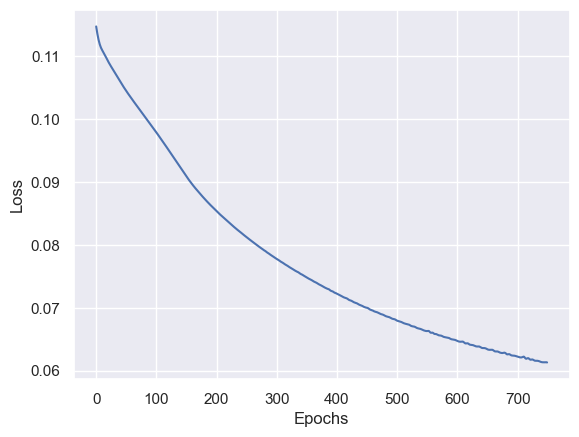

In [146]:
# plota as loss para ver se está treinando
plt.plot(historyNFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

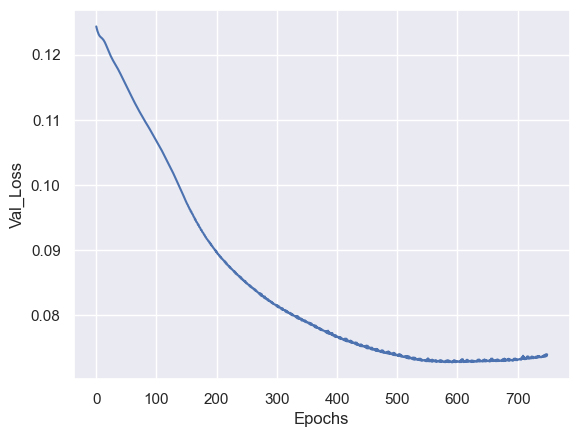

In [147]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [120]:
#modelNFE.save('modelosNovos\\Apogee2\\model_NFE.h5')

In [148]:
predtest = modelNFE.predict(X_test)

20/20 [==============================] - 0s 8ms/step


Text(0, 0.5, 'Y_test')

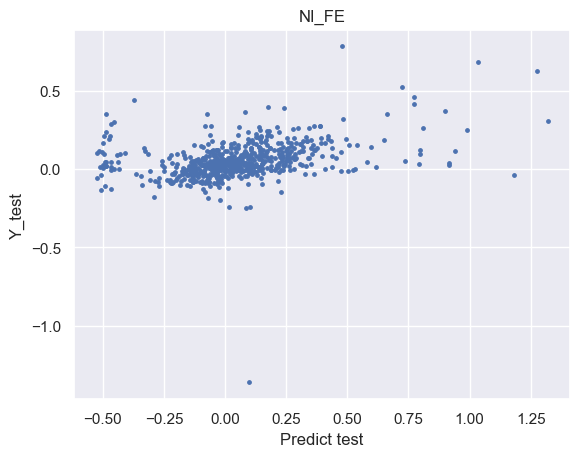

In [149]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [150]:
Y_test['NFE_Predict'] = predtest

In [151]:
Y_test

TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                
MC0061_000002407       -0.822770  4.537957 -0.002718 -0.018144 -0.315470   
SPLUS-n02s18_000002500 -0.579985  4.591905  0.038469 -0.021040 -0.005504   
MC0145_000010989        0.692253  4.446544  0.028430  0.092106 -0.110602   
MC0025_000258685       -0.024071  4.496673  0.061806  0.042466 -0.092897   
SPLUS-n01s18_000007826  0.018481  4.266320 -0.012097 -0.098167 -0.223850   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.663351  4.587575  0.062983 -0.038318 -0.088772   
MC0108_000057588       -0.622598  4.572570  0.196925  0.079666  0.034718   
SPLUS-n12s39_000004081 -0.526779  3.936834  0.102940  0.110074  0.016362   
MC0001_000002946       -0.806151  4.583101  0.063160 -0.036456 -0.033902   
SPLUS-n02s23_000011948 -0.325905  4.560552  0.073263  0.056296  0.081828   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  \
Field_splus                                                                
MC0061_000002407       -0.175950 -0.046311  0.099400 -0.055090  0.060595   
SPLUS-n02s18_000002500 -0.500060  0.033458 -0.060903 -0.007740  0.082594   
MC0145_000010989       -0.133260  0.023189  0.772480 -0.141130 -0.031289   
MC0025_000258685       -0.225500  0.083045 -0.138710  0.044850  0.174553   
SPLUS-n01s18_000007826 -0.376720  0.002678 -0.467810 -0.006090 -0.001113   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.436840  0.096979 -0.038955  0.052990  0.107140   
MC0108_000057588       -0.384950  0.273919 -0.029625 -0.005760  0.191753   
SPLUS-n12s39_000004081  0.013653  0.176812  0.015204  0.060096  0.042921   
MC0001_000002946        0.002456  0.109154  0.106141 -0.043273  0.083254   
SPLUS-n02s23_000011948 -0.367090  0.121190 -0.065663 -0.001940  0.023506   

                        alpha_predict  TEFFDecoded  TEFF_PredictDecoded  \
Field_splus                                                               
MC0061_000002407             0.048315    4771.7373          4796.384277   
SPLUS-n02s18_000002500       0.121821    5032.4746          5101.136230   
MC0145_000010989             0.035194    6398.7847          6177.354980   
MC0025_000258685             0.081249    5629.4937          5729.455566   
SPLUS-n01s18_000007826       0.086296    5675.1930          5692.469238   
...                               ...          ...                  ...   
SPLUS-s36s48_000004167       0.046960    4942.9450          5055.099609   
MC0108_000057588             0.132517    4986.7110          4920.656738   
SPLUS-n12s39_000004081       0.039232    5089.6150          5074.607422   
MC0001_000002946             0.031617    4789.5854          4771.262695   
SPLUS-n02s23_000011948       0.067230    5305.3423          5219.129395   

                        LOGG_Predict  FEH_Predict  CAFE_Predict  CFE_Predict  \
Field_splus                                                                    
MC0061_000002407            4.529244    -0.284677      0.032171    -0.123158   
SPLUS-n02s18_000002500      4.566516    -0.391178      0.017074    -0.006190   
MC0145_000010989            4.131693    -0.211765     -0.002815     0.046517   
MC0025_000258685            4.339001    -0.279816      0.081508     0.043855   
SPLUS-n01s18_000007826      4.367851    -0.328131      0.074316     0.063608   
...                              ...          ...           ...          ...   
SPLUS-s36s48_000004167      4.531365    -0.161693      0.011021    -0.038756   
MC0108_000057588            4.579930    -0.391790      0.090287    -0.056742   
SPLUS-n12s39_000004081      4.152612     0.038791      0.037337    -0.031631   
MC0001_000002946            4.576632    -0.073014     -0.003118    -0.038200   
SPLUS-n02s23_000011948      4.599397    -0.306728      0.013974    -0.027413   

                        MGFE_Pred

In [152]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\NFePredict.csv")

## NIFE

In [153]:
modelNIFE = baseline_model_teste()

In [154]:
columnTrain = 'NI_FE'

In [155]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyNIFE = modelNIFE.fit(X_train, Y_train[[columnTrain]], epochs = 2000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/2000
1/1 - 0s - loss: 0.0529 - val_loss: 0.0525 - 435ms/epoch - 435ms/step
Epoch 2/2000
1/1 - 0s - loss: 0.0526 - val_loss: 0.0523 - 36ms/epoch - 36ms/step
Epoch 3/2000
1/1 - 0s - loss: 0.0523 - val_loss: 0.0521 - 36ms/epoch - 36ms/step
Epoch 4/2000
1/1 - 0s - loss: 0.0522 - val_loss: 0.0520 - 33ms/epoch - 33ms/step
Epoch 5/2000
1/1 - 0s - loss: 0.0521 - val_loss: 0.0519 - 33ms/epoch - 33ms/step
Epoch 6/2000
1/1 - 0s - loss: 0.0520 - val_loss: 0.0519 - 34ms/epoch - 34ms/step
Epoch 7/2000
1/1 - 0s - loss: 0.0519 - val_loss: 0.0518 - 34ms/epoch - 34ms/step
Epoch 8/2000
1/1 - 0s - loss: 0.0518 - val_loss: 0.0517 - 34ms/epoch - 34ms/step
Epoch 9/2000
1/1 - 0s - loss: 0.0517 - val_loss: 0.0515 - 34ms/epoch - 34ms/step
Epoch 10/2000
1/1 - 0s - loss: 0.0516 - val_loss: 0.0514 - 35ms/epoch - 35ms/step
Epoch 11/2000
1/1 - 0s - loss: 0.0514 - val_loss: 0.0513 - 35ms/epoch - 35ms/step
Epoch 12/2000
1/1 - 0s - loss: 0.0513 - val_loss: 0.0512 - 35ms/epoch - 35ms/step
Epoch 13/2000
1/1 - 0s 

Epoch 101/2000
1/1 - 0s - loss: 0.0416 - val_loss: 0.0416 - 36ms/epoch - 36ms/step
Epoch 102/2000
1/1 - 0s - loss: 0.0415 - val_loss: 0.0415 - 37ms/epoch - 37ms/step
Epoch 103/2000
1/1 - 0s - loss: 0.0414 - val_loss: 0.0414 - 38ms/epoch - 38ms/step
Epoch 104/2000
1/1 - 0s - loss: 0.0413 - val_loss: 0.0413 - 34ms/epoch - 34ms/step
Epoch 105/2000
1/1 - 0s - loss: 0.0412 - val_loss: 0.0412 - 35ms/epoch - 35ms/step
Epoch 106/2000
1/1 - 0s - loss: 0.0411 - val_loss: 0.0411 - 36ms/epoch - 36ms/step
Epoch 107/2000
1/1 - 0s - loss: 0.0410 - val_loss: 0.0410 - 37ms/epoch - 37ms/step
Epoch 108/2000
1/1 - 0s - loss: 0.0409 - val_loss: 0.0409 - 37ms/epoch - 37ms/step
Epoch 109/2000
1/1 - 0s - loss: 0.0408 - val_loss: 0.0408 - 33ms/epoch - 33ms/step
Epoch 110/2000
1/1 - 0s - loss: 0.0407 - val_loss: 0.0407 - 35ms/epoch - 35ms/step
Epoch 111/2000
1/1 - 0s - loss: 0.0406 - val_loss: 0.0406 - 37ms/epoch - 37ms/step
Epoch 112/2000
1/1 - 0s - loss: 0.0405 - val_loss: 0.0405 - 35ms/epoch - 35ms/step
Epoc

Epoch 200/2000
1/1 - 0s - loss: 0.0329 - val_loss: 0.0329 - 35ms/epoch - 35ms/step
Epoch 201/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0328 - 36ms/epoch - 36ms/step
Epoch 202/2000
1/1 - 0s - loss: 0.0328 - val_loss: 0.0328 - 33ms/epoch - 33ms/step
Epoch 203/2000
1/1 - 0s - loss: 0.0327 - val_loss: 0.0327 - 34ms/epoch - 34ms/step
Epoch 204/2000
1/1 - 0s - loss: 0.0326 - val_loss: 0.0326 - 34ms/epoch - 34ms/step
Epoch 205/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0325 - 38ms/epoch - 38ms/step
Epoch 206/2000
1/1 - 0s - loss: 0.0325 - val_loss: 0.0325 - 35ms/epoch - 35ms/step
Epoch 207/2000
1/1 - 0s - loss: 0.0324 - val_loss: 0.0324 - 34ms/epoch - 34ms/step
Epoch 208/2000
1/1 - 0s - loss: 0.0323 - val_loss: 0.0323 - 35ms/epoch - 35ms/step
Epoch 209/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0322 - 37ms/epoch - 37ms/step
Epoch 210/2000
1/1 - 0s - loss: 0.0322 - val_loss: 0.0322 - 37ms/epoch - 37ms/step
Epoch 211/2000
1/1 - 0s - loss: 0.0321 - val_loss: 0.0321 - 36ms/epoch - 36ms/step
Epoc

Epoch 299/2000
1/1 - 0s - loss: 0.0263 - val_loss: 0.0263 - 37ms/epoch - 37ms/step
Epoch 300/2000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0263 - 69ms/epoch - 69ms/step
Epoch 301/2000
1/1 - 0s - loss: 0.0262 - val_loss: 0.0262 - 36ms/epoch - 36ms/step
Epoch 302/2000
1/1 - 0s - loss: 0.0261 - val_loss: 0.0261 - 69ms/epoch - 69ms/step
Epoch 303/2000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0261 - 37ms/epoch - 37ms/step
Epoch 304/2000
1/1 - 0s - loss: 0.0260 - val_loss: 0.0260 - 68ms/epoch - 68ms/step
Epoch 305/2000
1/1 - 0s - loss: 0.0259 - val_loss: 0.0260 - 41ms/epoch - 41ms/step
Epoch 306/2000
1/1 - 0s - loss: 0.0259 - val_loss: 0.0259 - 70ms/epoch - 70ms/step
Epoch 307/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0259 - 37ms/epoch - 37ms/step
Epoch 308/2000
1/1 - 0s - loss: 0.0258 - val_loss: 0.0258 - 69ms/epoch - 69ms/step
Epoch 309/2000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0258 - 38ms/epoch - 38ms/step
Epoch 310/2000
1/1 - 0s - loss: 0.0257 - val_loss: 0.0257 - 40ms/epoch - 40ms/step
Epoc

Epoch 398/2000
1/1 - 0s - loss: 0.0213 - val_loss: 0.0214 - 37ms/epoch - 37ms/step
Epoch 399/2000
1/1 - 0s - loss: 0.0212 - val_loss: 0.0213 - 36ms/epoch - 36ms/step
Epoch 400/2000
1/1 - 0s - loss: 0.0212 - val_loss: 0.0213 - 35ms/epoch - 35ms/step
Epoch 401/2000
1/1 - 0s - loss: 0.0212 - val_loss: 0.0212 - 37ms/epoch - 37ms/step
Epoch 402/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0212 - 36ms/epoch - 36ms/step
Epoch 403/2000
1/1 - 0s - loss: 0.0211 - val_loss: 0.0211 - 36ms/epoch - 36ms/step
Epoch 404/2000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0211 - 36ms/epoch - 36ms/step
Epoch 405/2000
1/1 - 0s - loss: 0.0210 - val_loss: 0.0211 - 39ms/epoch - 39ms/step
Epoch 406/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0210 - 38ms/epoch - 38ms/step
Epoch 407/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0210 - 35ms/epoch - 35ms/step
Epoch 408/2000
1/1 - 0s - loss: 0.0209 - val_loss: 0.0209 - 39ms/epoch - 39ms/step
Epoch 409/2000
1/1 - 0s - loss: 0.0208 - val_loss: 0.0209 - 38ms/epoch - 38ms/step
Epoc

Epoch 497/2000
1/1 - 0s - loss: 0.0175 - val_loss: 0.0176 - 36ms/epoch - 36ms/step
Epoch 498/2000
1/1 - 0s - loss: 0.0175 - val_loss: 0.0176 - 36ms/epoch - 36ms/step
Epoch 499/2000
1/1 - 0s - loss: 0.0175 - val_loss: 0.0176 - 36ms/epoch - 36ms/step
Epoch 500/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0175 - 38ms/epoch - 38ms/step
Epoch 501/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0175 - 36ms/epoch - 36ms/step
Epoch 502/2000
1/1 - 0s - loss: 0.0174 - val_loss: 0.0175 - 34ms/epoch - 34ms/step
Epoch 503/2000
1/1 - 0s - loss: 0.0173 - val_loss: 0.0174 - 34ms/epoch - 34ms/step
Epoch 504/2000
1/1 - 0s - loss: 0.0173 - val_loss: 0.0174 - 35ms/epoch - 35ms/step
Epoch 505/2000
1/1 - 0s - loss: 0.0173 - val_loss: 0.0174 - 35ms/epoch - 35ms/step
Epoch 506/2000
1/1 - 0s - loss: 0.0172 - val_loss: 0.0173 - 34ms/epoch - 34ms/step
Epoch 507/2000
1/1 - 0s - loss: 0.0172 - val_loss: 0.0173 - 35ms/epoch - 35ms/step
Epoch 508/2000
1/1 - 0s - loss: 0.0172 - val_loss: 0.0173 - 35ms/epoch - 35ms/step
Epoc

Epoch 596/2000
1/1 - 0s - loss: 0.0147 - val_loss: 0.0149 - 40ms/epoch - 40ms/step
Epoch 597/2000
1/1 - 0s - loss: 0.0147 - val_loss: 0.0148 - 41ms/epoch - 41ms/step
Epoch 598/2000
1/1 - 0s - loss: 0.0147 - val_loss: 0.0148 - 38ms/epoch - 38ms/step
Epoch 599/2000
1/1 - 0s - loss: 0.0146 - val_loss: 0.0148 - 39ms/epoch - 39ms/step
Epoch 600/2000
1/1 - 0s - loss: 0.0146 - val_loss: 0.0148 - 42ms/epoch - 42ms/step
Epoch 601/2000
1/1 - 0s - loss: 0.0146 - val_loss: 0.0147 - 40ms/epoch - 40ms/step
Epoch 602/2000
1/1 - 0s - loss: 0.0146 - val_loss: 0.0147 - 39ms/epoch - 39ms/step
Epoch 603/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0147 - 40ms/epoch - 40ms/step
Epoch 604/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0147 - 40ms/epoch - 40ms/step
Epoch 605/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0146 - 39ms/epoch - 39ms/step
Epoch 606/2000
1/1 - 0s - loss: 0.0145 - val_loss: 0.0146 - 42ms/epoch - 42ms/step
Epoch 607/2000
1/1 - 0s - loss: 0.0144 - val_loss: 0.0146 - 40ms/epoch - 40ms/step
Epoc

Epoch 695/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0128 - 39ms/epoch - 39ms/step
Epoch 696/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0128 - 40ms/epoch - 40ms/step
Epoch 697/2000
1/1 - 0s - loss: 0.0126 - val_loss: 0.0127 - 38ms/epoch - 38ms/step
Epoch 698/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0127 - 37ms/epoch - 37ms/step
Epoch 699/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0127 - 38ms/epoch - 38ms/step
Epoch 700/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0127 - 37ms/epoch - 37ms/step
Epoch 701/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0127 - 37ms/epoch - 37ms/step
Epoch 702/2000
1/1 - 0s - loss: 0.0125 - val_loss: 0.0126 - 37ms/epoch - 37ms/step
Epoch 703/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 41ms/epoch - 41ms/step
Epoch 704/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 38ms/epoch - 38ms/step
Epoch 705/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 38ms/epoch - 38ms/step
Epoch 706/2000
1/1 - 0s - loss: 0.0124 - val_loss: 0.0126 - 37ms/epoch - 37ms/step
Epoc

Epoch 794/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0112 - 37ms/epoch - 37ms/step
Epoch 795/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0112 - 35ms/epoch - 35ms/step
Epoch 796/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0112 - 37ms/epoch - 37ms/step
Epoch 797/2000
1/1 - 0s - loss: 0.0110 - val_loss: 0.0112 - 36ms/epoch - 36ms/step
Epoch 798/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0112 - 35ms/epoch - 35ms/step
Epoch 799/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0112 - 36ms/epoch - 36ms/step
Epoch 800/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0112 - 40ms/epoch - 40ms/step
Epoch 801/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0111 - 37ms/epoch - 37ms/step
Epoch 802/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0111 - 38ms/epoch - 38ms/step
Epoch 803/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0111 - 37ms/epoch - 37ms/step
Epoch 804/2000
1/1 - 0s - loss: 0.0109 - val_loss: 0.0111 - 36ms/epoch - 36ms/step
Epoch 805/2000
1/1 - 0s - loss: 0.0108 - val_loss: 0.0111 - 37ms/epoch - 37ms/step
Epoc

Epoch 893/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 39ms/epoch - 39ms/step
Epoch 894/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 40ms/epoch - 40ms/step
Epoch 895/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 39ms/epoch - 39ms/step
Epoch 896/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 40ms/epoch - 40ms/step
Epoch 897/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 40ms/epoch - 40ms/step
Epoch 898/2000
1/1 - 0s - loss: 0.0098 - val_loss: 0.0101 - 37ms/epoch - 37ms/step
Epoch 899/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0101 - 46ms/epoch - 46ms/step
Epoch 900/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0101 - 45ms/epoch - 45ms/step
Epoch 901/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0101 - 41ms/epoch - 41ms/step
Epoch 902/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0101 - 39ms/epoch - 39ms/step
Epoch 903/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0101 - 40ms/epoch - 40ms/step
Epoch 904/2000
1/1 - 0s - loss: 0.0097 - val_loss: 0.0100 - 39ms/epoch - 39ms/step
Epoc

Epoch 992/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 38ms/epoch - 38ms/step
Epoch 993/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 35ms/epoch - 35ms/step
Epoch 994/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 36ms/epoch - 36ms/step
Epoch 995/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 37ms/epoch - 37ms/step
Epoch 996/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 36ms/epoch - 36ms/step
Epoch 997/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 37ms/epoch - 37ms/step
Epoch 998/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 34ms/epoch - 34ms/step
Epoch 999/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0094 - 37ms/epoch - 37ms/step
Epoch 1000/2000
1/1 - 0s - loss: 0.0089 - val_loss: 0.0093 - 37ms/epoch - 37ms/step
Epoch 1001/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0093 - 35ms/epoch - 35ms/step
Epoch 1002/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0093 - 35ms/epoch - 35ms/step
Epoch 1003/2000
1/1 - 0s - loss: 0.0088 - val_loss: 0.0093 - 36ms/epoch - 36ms/step


Epoch 1090/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0089 - 39ms/epoch - 39ms/step
Epoch 1091/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0089 - 39ms/epoch - 39ms/step
Epoch 1092/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0089 - 39ms/epoch - 39ms/step
Epoch 1093/2000
1/1 - 0s - loss: 0.0083 - val_loss: 0.0089 - 38ms/epoch - 38ms/step
Epoch 1094/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0089 - 37ms/epoch - 37ms/step
Epoch 1095/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0089 - 39ms/epoch - 39ms/step
Epoch 1096/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0089 - 38ms/epoch - 38ms/step
Epoch 1097/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0088 - 41ms/epoch - 41ms/step
Epoch 1098/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0089 - 40ms/epoch - 40ms/step
Epoch 1099/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0088 - 39ms/epoch - 39ms/step
Epoch 1100/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0089 - 37ms/epoch - 37ms/step
Epoch 1101/2000
1/1 - 0s - loss: 0.0082 - val_loss: 0.0088 - 37ms/epoch - 37

Epoch 1188/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0085 - 36ms/epoch - 36ms/step
Epoch 1189/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0085 - 39ms/epoch - 39ms/step
Epoch 1190/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 1191/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0085 - 36ms/epoch - 36ms/step
Epoch 1192/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0085 - 39ms/epoch - 39ms/step
Epoch 1193/2000
1/1 - 0s - loss: 0.0078 - val_loss: 0.0085 - 39ms/epoch - 39ms/step
Epoch 1194/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 1195/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 1196/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0085 - 40ms/epoch - 40ms/step
Epoch 1197/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0085 - 40ms/epoch - 40ms/step
Epoch 1198/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 1199/2000
1/1 - 0s - loss: 0.0077 - val_loss: 0.0085 - 41ms/epoch - 41

Epoch 1286/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0083 - 37ms/epoch - 37ms/step
Epoch 1287/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0083 - 36ms/epoch - 36ms/step
Epoch 1288/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 36ms/epoch - 36ms/step
Epoch 1289/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0083 - 36ms/epoch - 36ms/step
Epoch 1290/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 36ms/epoch - 36ms/step
Epoch 1291/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 36ms/epoch - 36ms/step
Epoch 1292/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 37ms/epoch - 37ms/step
Epoch 1293/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 35ms/epoch - 35ms/step
Epoch 1294/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 35ms/epoch - 35ms/step
Epoch 1295/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 38ms/epoch - 38ms/step
Epoch 1296/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 36ms/epoch - 36ms/step
Epoch 1297/2000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0082 - 37ms/epoch - 37

Epoch 1384/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 37ms/epoch - 37ms/step
Epoch 1385/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 36ms/epoch - 36ms/step
Epoch 1386/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 42ms/epoch - 42ms/step
Epoch 1387/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 37ms/epoch - 37ms/step
Epoch 1388/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 41ms/epoch - 41ms/step
Epoch 1389/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 36ms/epoch - 36ms/step
Epoch 1390/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 36ms/epoch - 36ms/step
Epoch 1391/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 63ms/epoch - 63ms/step
Epoch 1392/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 38ms/epoch - 38ms/step
Epoch 1393/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 69ms/epoch - 69ms/step
Epoch 1394/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0081 - 37ms/epoch - 37ms/step
Epoch 1395/2000
1/1 - 0s - loss: 0.0071 - val_loss: 0.0080 - 68ms/epoch - 68

Epoch 1482/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 36ms/epoch - 36ms/step
Epoch 1483/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 36ms/epoch - 36ms/step
Epoch 1484/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 35ms/epoch - 35ms/step
Epoch 1485/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 41ms/epoch - 41ms/step
Epoch 1486/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 40ms/epoch - 40ms/step
Epoch 1487/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 42ms/epoch - 42ms/step
Epoch 1488/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 40ms/epoch - 40ms/step
Epoch 1489/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 39ms/epoch - 39ms/step
Epoch 1490/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 35ms/epoch - 35ms/step
Epoch 1491/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 38ms/epoch - 38ms/step
Epoch 1492/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 37ms/epoch - 37ms/step
Epoch 1493/2000
1/1 - 0s - loss: 0.0069 - val_loss: 0.0079 - 37ms/epoch - 37

Epoch 1580/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 37ms/epoch - 37ms/step
Epoch 1581/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1582/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1583/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1584/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 39ms/epoch - 39ms/step
Epoch 1585/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 37ms/epoch - 37ms/step
Epoch 1586/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 35ms/epoch - 35ms/step
Epoch 1587/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1588/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 36ms/epoch - 36ms/step
Epoch 1589/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1590/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1591/2000
1/1 - 0s - loss: 0.0068 - val_loss: 0.0078 - 37ms/epoch - 37

Epoch 1678/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 35ms/epoch - 35ms/step
Epoch 1679/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 37ms/epoch - 37ms/step
Epoch 1680/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 35ms/epoch - 35ms/step
Epoch 1681/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 37ms/epoch - 37ms/step
Epoch 1682/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 35ms/epoch - 35ms/step
Epoch 1683/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 34ms/epoch - 34ms/step
Epoch 1684/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 37ms/epoch - 37ms/step
Epoch 1685/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 38ms/epoch - 38ms/step
Epoch 1686/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 36ms/epoch - 36ms/step
Epoch 1687/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 42ms/epoch - 42ms/step
Epoch 1688/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0078 - 36ms/epoch - 36ms/step
Epoch 1689/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 38ms/epoch - 38

Epoch 1776/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1777/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 45ms/epoch - 45ms/step
Epoch 1778/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 39ms/epoch - 39ms/step
Epoch 1779/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1780/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1781/2000
1/1 - 0s - loss: 0.0066 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1782/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 36ms/epoch - 36ms/step
Epoch 1783/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 43ms/epoch - 43ms/step
Epoch 1784/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1785/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 44ms/epoch - 44ms/step
Epoch 1786/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 37ms/epoch - 37ms/step
Epoch 1787/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 41ms/epoch - 41

Epoch 1874/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1875/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 39ms/epoch - 39ms/step
Epoch 1876/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1877/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1878/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1879/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1880/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1881/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1882/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 39ms/epoch - 39ms/step
Epoch 1883/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 42ms/epoch - 42ms/step
Epoch 1884/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 61ms/epoch - 61ms/step
Epoch 1885/2000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0077 - 71ms/epoch - 71

Epoch 1972/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1973/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 39ms/epoch - 39ms/step
Epoch 1974/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1975/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 36ms/epoch - 36ms/step
Epoch 1976/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1977/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 39ms/epoch - 39ms/step
Epoch 1978/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1979/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 38ms/epoch - 38ms/step
Epoch 1980/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 41ms/epoch - 41ms/step
Epoch 1981/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 39ms/epoch - 39ms/step
Epoch 1982/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 40ms/epoch - 40ms/step
Epoch 1983/2000
1/1 - 0s - loss: 0.0064 - val_loss: 0.0077 - 41ms/epoch - 41

Text(0, 0.5, 'Loss')

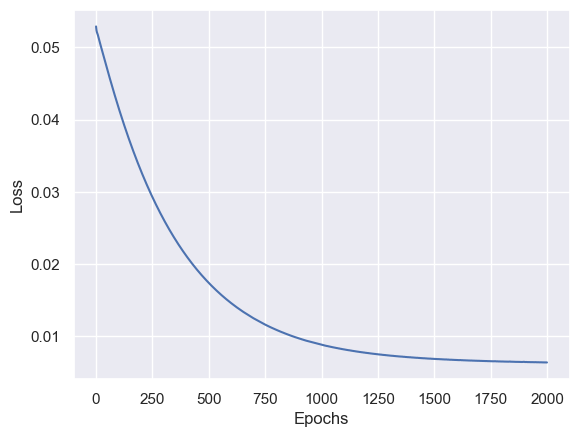

In [156]:
# plota as loss para ver se está treinando
plt.plot(historyNIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

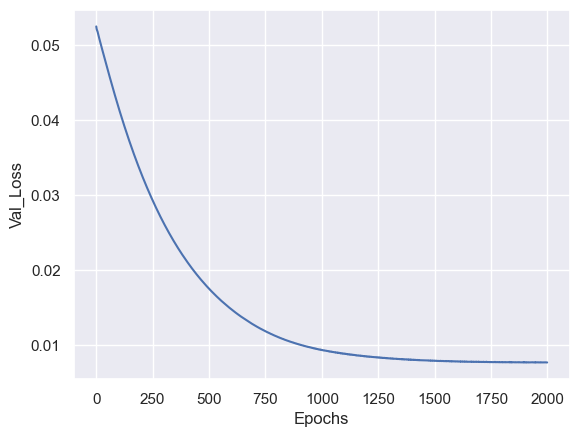

In [157]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyNIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [144]:
#modelNIFE.save('modelosNovos\\Apogee2\\model_NIFE.h5')

In [158]:
predtest = modelNIFE.predict(X_test)

20/20 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Y_test')

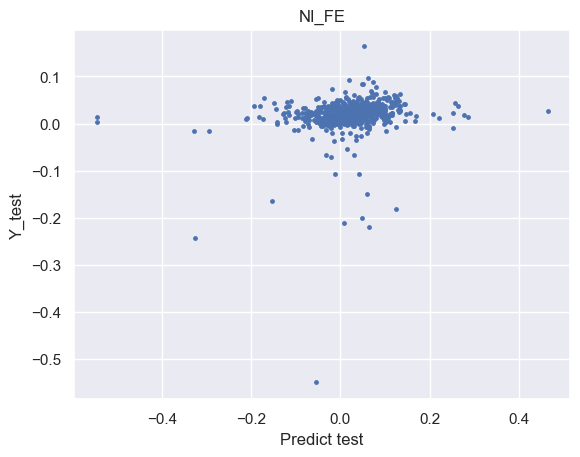

In [159]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [160]:
Y_test['NIFE_Predict'] = predtest

In [161]:
Y_test

TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                
MC0061_000002407       -0.822770  4.537957 -0.002718 -0.018144 -0.315470   
SPLUS-n02s18_000002500 -0.579985  4.591905  0.038469 -0.021040 -0.005504   
MC0145_000010989        0.692253  4.446544  0.028430  0.092106 -0.110602   
MC0025_000258685       -0.024071  4.496673  0.061806  0.042466 -0.092897   
SPLUS-n01s18_000007826  0.018481  4.266320 -0.012097 -0.098167 -0.223850   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.663351  4.587575  0.062983 -0.038318 -0.088772   
MC0108_000057588       -0.622598  4.572570  0.196925  0.079666  0.034718   
SPLUS-n12s39_000004081 -0.526779  3.936834  0.102940  0.110074  0.016362   
MC0001_000002946       -0.806151  4.583101  0.063160 -0.036456 -0.033902   
SPLUS-n02s23_000011948 -0.325905  4.560552  0.073263  0.056296  0.081828   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  \
Field_splus                                                                
MC0061_000002407       -0.175950 -0.046311  0.099400 -0.055090  0.060595   
SPLUS-n02s18_000002500 -0.500060  0.033458 -0.060903 -0.007740  0.082594   
MC0145_000010989       -0.133260  0.023189  0.772480 -0.141130 -0.031289   
MC0025_000258685       -0.225500  0.083045 -0.138710  0.044850  0.174553   
SPLUS-n01s18_000007826 -0.376720  0.002678 -0.467810 -0.006090 -0.001113   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.436840  0.096979 -0.038955  0.052990  0.107140   
MC0108_000057588       -0.384950  0.273919 -0.029625 -0.005760  0.191753   
SPLUS-n12s39_000004081  0.013653  0.176812  0.015204  0.060096  0.042921   
MC0001_000002946        0.002456  0.109154  0.106141 -0.043273  0.083254   
SPLUS-n02s23_000011948 -0.367090  0.121190 -0.065663 -0.001940  0.023506   

                        alpha_predict  TEFFDecoded  TEFF_PredictDecoded  \
Field_splus                                                               
MC0061_000002407             0.048315    4771.7373          4796.384277   
SPLUS-n02s18_000002500       0.121821    5032.4746          5101.136230   
MC0145_000010989             0.035194    6398.7847          6177.354980   
MC0025_000258685             0.081249    5629.4937          5729.455566   
SPLUS-n01s18_000007826       0.086296    5675.1930          5692.469238   
...                               ...          ...                  ...   
SPLUS-s36s48_000004167       0.046960    4942.9450          5055.099609   
MC0108_000057588             0.132517    4986.7110          4920.656738   
SPLUS-n12s39_000004081       0.039232    5089.6150          5074.607422   
MC0001_000002946             0.031617    4789.5854          4771.262695   
SPLUS-n02s23_000011948       0.067230    5305.3423          5219.129395   

                        LOGG_Predict  FEH_Predict  CAFE_Predict  CFE_Predict  \
Field_splus                                                                    
MC0061_000002407            4.529244    -0.284677      0.032171    -0.123158   
SPLUS-n02s18_000002500      4.566516    -0.391178      0.017074    -0.006190   
MC0145_000010989            4.131693    -0.211765     -0.002815     0.046517   
MC0025_000258685            4.339001    -0.279816      0.081508     0.043855   
SPLUS-n01s18_000007826      4.367851    -0.328131      0.074316     0.063608   
...                              ...          ...           ...          ...   
SPLUS-s36s48_000004167      4.531365    -0.161693      0.011021    -0.038756   
MC0108_000057588            4.579930    -0.391790      0.090287    -0.056742   
SPLUS-n12s39_000004081      4.152612     0.038791      0.037337    -0.031631   
MC0001_000002946            4.576632    -0.073014     -0.003118    -0.038200   
SPLUS-n02s23_000011948      4.599397    -0.306728      0.013974    -0.027413   

                        MGFE_Pred

In [162]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\NiFehPredict.csv")

## SIFE

In [163]:
modelSIFE = baseline_model_teste()

In [164]:
columnTrain = 'SI_FE'

In [165]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historySIFE = modelSIFE.fit(X_train, Y_train[[columnTrain]], epochs = 3000, validation_data=(X_val, Y_val[[columnTrain]]), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/3000
1/1 - 0s - loss: 0.0605 - val_loss: 0.0611 - 452ms/epoch - 452ms/step
Epoch 2/3000
1/1 - 0s - loss: 0.0595 - val_loss: 0.0601 - 37ms/epoch - 37ms/step
Epoch 3/3000
1/1 - 0s - loss: 0.0586 - val_loss: 0.0593 - 43ms/epoch - 43ms/step
Epoch 4/3000
1/1 - 0s - loss: 0.0577 - val_loss: 0.0585 - 37ms/epoch - 37ms/step
Epoch 5/3000
1/1 - 0s - loss: 0.0569 - val_loss: 0.0577 - 44ms/epoch - 44ms/step
Epoch 6/3000
1/1 - 0s - loss: 0.0562 - val_loss: 0.0571 - 37ms/epoch - 37ms/step
Epoch 7/3000
1/1 - 0s - loss: 0.0556 - val_loss: 0.0565 - 41ms/epoch - 41ms/step
Epoch 8/3000
1/1 - 0s - loss: 0.0551 - val_loss: 0.0559 - 39ms/epoch - 39ms/step
Epoch 9/3000
1/1 - 0s - loss: 0.0546 - val_loss: 0.0555 - 40ms/epoch - 40ms/step
Epoch 10/3000
1/1 - 0s - loss: 0.0542 - val_loss: 0.0551 - 40ms/epoch - 40ms/step
Epoch 11/3000
1/1 - 0s - loss: 0.0538 - val_loss: 0.0547 - 36ms/epoch - 36ms/step
Epoch 12/3000
1/1 - 0s - loss: 0.0535 - val_loss: 0.0544 - 39ms/epoch - 39ms/step
Epoch 13/3000
1/1 - 0s 

Epoch 101/3000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0441 - 38ms/epoch - 38ms/step
Epoch 102/3000
1/1 - 0s - loss: 0.0431 - val_loss: 0.0440 - 37ms/epoch - 37ms/step
Epoch 103/3000
1/1 - 0s - loss: 0.0430 - val_loss: 0.0440 - 43ms/epoch - 43ms/step
Epoch 104/3000
1/1 - 0s - loss: 0.0429 - val_loss: 0.0439 - 40ms/epoch - 40ms/step
Epoch 105/3000
1/1 - 0s - loss: 0.0428 - val_loss: 0.0438 - 38ms/epoch - 38ms/step
Epoch 106/3000
1/1 - 0s - loss: 0.0427 - val_loss: 0.0437 - 35ms/epoch - 35ms/step
Epoch 107/3000
1/1 - 0s - loss: 0.0426 - val_loss: 0.0436 - 36ms/epoch - 36ms/step
Epoch 108/3000
1/1 - 0s - loss: 0.0425 - val_loss: 0.0435 - 36ms/epoch - 36ms/step
Epoch 109/3000
1/1 - 0s - loss: 0.0424 - val_loss: 0.0434 - 35ms/epoch - 35ms/step
Epoch 110/3000
1/1 - 0s - loss: 0.0423 - val_loss: 0.0433 - 34ms/epoch - 34ms/step
Epoch 111/3000
1/1 - 0s - loss: 0.0422 - val_loss: 0.0432 - 36ms/epoch - 36ms/step
Epoch 112/3000
1/1 - 0s - loss: 0.0421 - val_loss: 0.0432 - 35ms/epoch - 35ms/step
Epoc

Epoch 200/3000
1/1 - 0s - loss: 0.0349 - val_loss: 0.0362 - 33ms/epoch - 33ms/step
Epoch 201/3000
1/1 - 0s - loss: 0.0349 - val_loss: 0.0361 - 35ms/epoch - 35ms/step
Epoch 202/3000
1/1 - 0s - loss: 0.0348 - val_loss: 0.0360 - 35ms/epoch - 35ms/step
Epoch 203/3000
1/1 - 0s - loss: 0.0347 - val_loss: 0.0360 - 33ms/epoch - 33ms/step
Epoch 204/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0359 - 34ms/epoch - 34ms/step
Epoch 205/3000
1/1 - 0s - loss: 0.0346 - val_loss: 0.0358 - 83ms/epoch - 83ms/step
Epoch 206/3000
1/1 - 0s - loss: 0.0345 - val_loss: 0.0358 - 36ms/epoch - 36ms/step
Epoch 207/3000
1/1 - 0s - loss: 0.0344 - val_loss: 0.0357 - 83ms/epoch - 83ms/step
Epoch 208/3000
1/1 - 0s - loss: 0.0343 - val_loss: 0.0356 - 32ms/epoch - 32ms/step
Epoch 209/3000
1/1 - 0s - loss: 0.0343 - val_loss: 0.0355 - 66ms/epoch - 66ms/step
Epoch 210/3000
1/1 - 0s - loss: 0.0342 - val_loss: 0.0355 - 34ms/epoch - 34ms/step
Epoch 211/3000
1/1 - 0s - loss: 0.0341 - val_loss: 0.0354 - 73ms/epoch - 73ms/step
Epoc

Epoch 299/3000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0300 - 38ms/epoch - 38ms/step
Epoch 300/3000
1/1 - 0s - loss: 0.0284 - val_loss: 0.0299 - 43ms/epoch - 43ms/step
Epoch 301/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0299 - 38ms/epoch - 38ms/step
Epoch 302/3000
1/1 - 0s - loss: 0.0283 - val_loss: 0.0298 - 40ms/epoch - 40ms/step
Epoch 303/3000
1/1 - 0s - loss: 0.0282 - val_loss: 0.0297 - 39ms/epoch - 39ms/step
Epoch 304/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0297 - 39ms/epoch - 39ms/step
Epoch 305/3000
1/1 - 0s - loss: 0.0281 - val_loss: 0.0296 - 40ms/epoch - 40ms/step
Epoch 306/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0296 - 40ms/epoch - 40ms/step
Epoch 307/3000
1/1 - 0s - loss: 0.0280 - val_loss: 0.0295 - 62ms/epoch - 62ms/step
Epoch 308/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0295 - 66ms/epoch - 66ms/step
Epoch 309/3000
1/1 - 0s - loss: 0.0279 - val_loss: 0.0294 - 65ms/epoch - 65ms/step
Epoch 310/3000
1/1 - 0s - loss: 0.0278 - val_loss: 0.0294 - 56ms/epoch - 56ms/step
Epoc

Epoch 398/3000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0251 - 61ms/epoch - 61ms/step
Epoch 399/3000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0250 - 71ms/epoch - 71ms/step
Epoch 400/3000
1/1 - 0s - loss: 0.0233 - val_loss: 0.0250 - 35ms/epoch - 35ms/step
Epoch 401/3000
1/1 - 0s - loss: 0.0232 - val_loss: 0.0249 - 37ms/epoch - 37ms/step
Epoch 402/3000
1/1 - 0s - loss: 0.0232 - val_loss: 0.0249 - 37ms/epoch - 37ms/step
Epoch 403/3000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0249 - 37ms/epoch - 37ms/step
Epoch 404/3000
1/1 - 0s - loss: 0.0231 - val_loss: 0.0248 - 35ms/epoch - 35ms/step
Epoch 405/3000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0248 - 34ms/epoch - 34ms/step
Epoch 406/3000
1/1 - 0s - loss: 0.0230 - val_loss: 0.0247 - 35ms/epoch - 35ms/step
Epoch 407/3000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0247 - 36ms/epoch - 36ms/step
Epoch 408/3000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0246 - 38ms/epoch - 38ms/step
Epoch 409/3000
1/1 - 0s - loss: 0.0229 - val_loss: 0.0246 - 37ms/epoch - 37ms/step
Epoc

Epoch 497/3000
1/1 - 0s - loss: 0.0194 - val_loss: 0.0212 - 37ms/epoch - 37ms/step
Epoch 498/3000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0212 - 37ms/epoch - 37ms/step
Epoch 499/3000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0212 - 38ms/epoch - 38ms/step
Epoch 500/3000
1/1 - 0s - loss: 0.0193 - val_loss: 0.0211 - 36ms/epoch - 36ms/step
Epoch 501/3000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0211 - 36ms/epoch - 36ms/step
Epoch 502/3000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0211 - 36ms/epoch - 36ms/step
Epoch 503/3000
1/1 - 0s - loss: 0.0192 - val_loss: 0.0210 - 35ms/epoch - 35ms/step
Epoch 504/3000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0210 - 36ms/epoch - 36ms/step
Epoch 505/3000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0210 - 37ms/epoch - 37ms/step
Epoch 506/3000
1/1 - 0s - loss: 0.0191 - val_loss: 0.0209 - 35ms/epoch - 35ms/step
Epoch 507/3000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0209 - 36ms/epoch - 36ms/step
Epoch 508/3000
1/1 - 0s - loss: 0.0190 - val_loss: 0.0209 - 36ms/epoch - 36ms/step
Epoc

Epoch 596/3000
1/1 - 0s - loss: 0.0163 - val_loss: 0.0182 - 35ms/epoch - 35ms/step
Epoch 597/3000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0182 - 33ms/epoch - 33ms/step
Epoch 598/3000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0182 - 33ms/epoch - 33ms/step
Epoch 599/3000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0181 - 34ms/epoch - 34ms/step
Epoch 600/3000
1/1 - 0s - loss: 0.0162 - val_loss: 0.0181 - 33ms/epoch - 33ms/step
Epoch 601/3000
1/1 - 0s - loss: 0.0161 - val_loss: 0.0181 - 33ms/epoch - 33ms/step
Epoch 602/3000
1/1 - 0s - loss: 0.0161 - val_loss: 0.0181 - 35ms/epoch - 35ms/step
Epoch 603/3000
1/1 - 0s - loss: 0.0161 - val_loss: 0.0180 - 33ms/epoch - 33ms/step
Epoch 604/3000
1/1 - 0s - loss: 0.0161 - val_loss: 0.0180 - 31ms/epoch - 31ms/step
Epoch 605/3000
1/1 - 0s - loss: 0.0160 - val_loss: 0.0180 - 34ms/epoch - 34ms/step
Epoch 606/3000
1/1 - 0s - loss: 0.0160 - val_loss: 0.0179 - 33ms/epoch - 33ms/step
Epoch 607/3000
1/1 - 0s - loss: 0.0160 - val_loss: 0.0179 - 32ms/epoch - 32ms/step
Epoc

Epoch 695/3000
1/1 - 0s - loss: 0.0139 - val_loss: 0.0159 - 35ms/epoch - 35ms/step
Epoch 696/3000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0159 - 36ms/epoch - 36ms/step
Epoch 697/3000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 698/3000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0158 - 35ms/epoch - 35ms/step
Epoch 699/3000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0158 - 37ms/epoch - 37ms/step
Epoch 700/3000
1/1 - 0s - loss: 0.0138 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 701/3000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0158 - 36ms/epoch - 36ms/step
Epoch 702/3000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0157 - 37ms/epoch - 37ms/step
Epoch 703/3000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 704/3000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0157 - 34ms/epoch - 34ms/step
Epoch 705/3000
1/1 - 0s - loss: 0.0137 - val_loss: 0.0157 - 36ms/epoch - 36ms/step
Epoch 706/3000
1/1 - 0s - loss: 0.0136 - val_loss: 0.0157 - 35ms/epoch - 35ms/step
Epoc

Epoch 794/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0141 - 37ms/epoch - 37ms/step
Epoch 795/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0141 - 39ms/epoch - 39ms/step
Epoch 796/3000
1/1 - 0s - loss: 0.0120 - val_loss: 0.0141 - 36ms/epoch - 36ms/step
Epoch 797/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0141 - 37ms/epoch - 37ms/step
Epoch 798/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0140 - 39ms/epoch - 39ms/step
Epoch 799/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0140 - 37ms/epoch - 37ms/step
Epoch 800/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0140 - 37ms/epoch - 37ms/step
Epoch 801/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0140 - 37ms/epoch - 37ms/step
Epoch 802/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0140 - 40ms/epoch - 40ms/step
Epoch 803/3000
1/1 - 0s - loss: 0.0119 - val_loss: 0.0140 - 38ms/epoch - 38ms/step
Epoch 804/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0140 - 37ms/epoch - 37ms/step
Epoch 805/3000
1/1 - 0s - loss: 0.0118 - val_loss: 0.0139 - 37ms/epoch - 37ms/step
Epoc

Epoch 893/3000
1/1 - 0s - loss: 0.0106 - val_loss: 0.0128 - 69ms/epoch - 69ms/step
Epoch 894/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0128 - 60ms/epoch - 60ms/step
Epoch 895/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 92ms/epoch - 92ms/step
Epoch 896/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 44ms/epoch - 44ms/step
Epoch 897/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 37ms/epoch - 37ms/step
Epoch 898/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 36ms/epoch - 36ms/step
Epoch 899/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 37ms/epoch - 37ms/step
Epoch 900/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 33ms/epoch - 33ms/step
Epoch 901/3000
1/1 - 0s - loss: 0.0105 - val_loss: 0.0127 - 34ms/epoch - 34ms/step
Epoch 902/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0127 - 37ms/epoch - 37ms/step
Epoch 903/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0126 - 38ms/epoch - 38ms/step
Epoch 904/3000
1/1 - 0s - loss: 0.0104 - val_loss: 0.0126 - 36ms/epoch - 36ms/step
Epoc

Epoch 992/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 34ms/epoch - 34ms/step
Epoch 993/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 36ms/epoch - 36ms/step
Epoch 994/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 37ms/epoch - 37ms/step
Epoch 995/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 38ms/epoch - 38ms/step
Epoch 996/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 36ms/epoch - 36ms/step
Epoch 997/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 35ms/epoch - 35ms/step
Epoch 998/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 37ms/epoch - 37ms/step
Epoch 999/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 35ms/epoch - 35ms/step
Epoch 1000/3000
1/1 - 0s - loss: 0.0094 - val_loss: 0.0117 - 36ms/epoch - 36ms/step
Epoch 1001/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0117 - 36ms/epoch - 36ms/step
Epoch 1002/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0117 - 35ms/epoch - 35ms/step
Epoch 1003/3000
1/1 - 0s - loss: 0.0093 - val_loss: 0.0116 - 35ms/epoch - 35ms/step


Epoch 1090/3000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0110 - 37ms/epoch - 37ms/step
Epoch 1091/3000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0110 - 36ms/epoch - 36ms/step
Epoch 1092/3000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0110 - 41ms/epoch - 41ms/step
Epoch 1093/3000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0110 - 55ms/epoch - 55ms/step
Epoch 1094/3000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0109 - 35ms/epoch - 35ms/step
Epoch 1095/3000
1/1 - 0s - loss: 0.0086 - val_loss: 0.0109 - 36ms/epoch - 36ms/step
Epoch 1096/3000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0109 - 59ms/epoch - 59ms/step
Epoch 1097/3000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0109 - 36ms/epoch - 36ms/step
Epoch 1098/3000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0109 - 71ms/epoch - 71ms/step
Epoch 1099/3000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0109 - 37ms/epoch - 37ms/step
Epoch 1100/3000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0109 - 71ms/epoch - 71ms/step
Epoch 1101/3000
1/1 - 0s - loss: 0.0085 - val_loss: 0.0109 - 36ms/epoch - 36

Epoch 1188/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 72ms/epoch - 72ms/step
Epoch 1189/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 82ms/epoch - 82ms/step
Epoch 1190/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 85ms/epoch - 85ms/step
Epoch 1191/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 66ms/epoch - 66ms/step
Epoch 1192/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 73ms/epoch - 73ms/step
Epoch 1193/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 84ms/epoch - 84ms/step
Epoch 1194/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 69ms/epoch - 69ms/step
Epoch 1195/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0104 - 100ms/epoch - 100ms/step
Epoch 1196/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0103 - 96ms/epoch - 96ms/step
Epoch 1197/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0103 - 70ms/epoch - 70ms/step
Epoch 1198/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0103 - 94ms/epoch - 94ms/step
Epoch 1199/3000
1/1 - 0s - loss: 0.0079 - val_loss: 0.0103 - 91ms/epoch - 

Epoch 1286/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 38ms/epoch - 38ms/step
Epoch 1287/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 69ms/epoch - 69ms/step
Epoch 1288/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 38ms/epoch - 38ms/step
Epoch 1289/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 34ms/epoch - 34ms/step
Epoch 1290/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 37ms/epoch - 37ms/step
Epoch 1291/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 36ms/epoch - 36ms/step
Epoch 1292/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 59ms/epoch - 59ms/step
Epoch 1293/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 37ms/epoch - 37ms/step
Epoch 1294/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 91ms/epoch - 91ms/step
Epoch 1295/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 36ms/epoch - 36ms/step
Epoch 1296/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 75ms/epoch - 75ms/step
Epoch 1297/3000
1/1 - 0s - loss: 0.0074 - val_loss: 0.0099 - 34ms/epoch - 34

Epoch 1384/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 37ms/epoch - 37ms/step
Epoch 1385/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 41ms/epoch - 41ms/step
Epoch 1386/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 38ms/epoch - 38ms/step
Epoch 1387/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 45ms/epoch - 45ms/step
Epoch 1388/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 37ms/epoch - 37ms/step
Epoch 1389/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 38ms/epoch - 38ms/step
Epoch 1390/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0095 - 38ms/epoch - 38ms/step
Epoch 1391/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0095 - 40ms/epoch - 40ms/step
Epoch 1392/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0095 - 38ms/epoch - 38ms/step
Epoch 1393/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0096 - 42ms/epoch - 42ms/step
Epoch 1394/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0095 - 37ms/epoch - 37ms/step
Epoch 1395/3000
1/1 - 0s - loss: 0.0070 - val_loss: 0.0095 - 38ms/epoch - 38

Epoch 1482/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 37ms/epoch - 37ms/step
Epoch 1483/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 35ms/epoch - 35ms/step
Epoch 1484/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 38ms/epoch - 38ms/step
Epoch 1485/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 35ms/epoch - 35ms/step
Epoch 1486/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 38ms/epoch - 38ms/step
Epoch 1487/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 35ms/epoch - 35ms/step
Epoch 1488/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 37ms/epoch - 37ms/step
Epoch 1489/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 36ms/epoch - 36ms/step
Epoch 1490/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 37ms/epoch - 37ms/step
Epoch 1491/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 37ms/epoch - 37ms/step
Epoch 1492/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 38ms/epoch - 38ms/step
Epoch 1493/3000
1/1 - 0s - loss: 0.0067 - val_loss: 0.0093 - 35ms/epoch - 35

Epoch 1580/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 36ms/epoch - 36ms/step
Epoch 1581/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 38ms/epoch - 38ms/step
Epoch 1582/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 37ms/epoch - 37ms/step
Epoch 1583/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 35ms/epoch - 35ms/step
Epoch 1584/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 37ms/epoch - 37ms/step
Epoch 1585/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 36ms/epoch - 36ms/step
Epoch 1586/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 36ms/epoch - 36ms/step
Epoch 1587/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 38ms/epoch - 38ms/step
Epoch 1588/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 36ms/epoch - 36ms/step
Epoch 1589/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 36ms/epoch - 36ms/step
Epoch 1590/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 35ms/epoch - 35ms/step
Epoch 1591/3000
1/1 - 0s - loss: 0.0065 - val_loss: 0.0091 - 34ms/epoch - 34

Epoch 1678/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 42ms/epoch - 42ms/step
Epoch 1679/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 40ms/epoch - 40ms/step
Epoch 1680/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 42ms/epoch - 42ms/step
Epoch 1681/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 38ms/epoch - 38ms/step
Epoch 1682/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 41ms/epoch - 41ms/step
Epoch 1683/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 38ms/epoch - 38ms/step
Epoch 1684/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 44ms/epoch - 44ms/step
Epoch 1685/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 43ms/epoch - 43ms/step
Epoch 1686/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 38ms/epoch - 38ms/step
Epoch 1687/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 41ms/epoch - 41ms/step
Epoch 1688/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 36ms/epoch - 36ms/step
Epoch 1689/3000
1/1 - 0s - loss: 0.0063 - val_loss: 0.0089 - 42ms/epoch - 42

Epoch 1776/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 37ms/epoch - 37ms/step
Epoch 1777/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 35ms/epoch - 35ms/step
Epoch 1778/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 36ms/epoch - 36ms/step
Epoch 1779/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 38ms/epoch - 38ms/step
Epoch 1780/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 37ms/epoch - 37ms/step
Epoch 1781/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 37ms/epoch - 37ms/step
Epoch 1782/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 42ms/epoch - 42ms/step
Epoch 1783/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 35ms/epoch - 35ms/step
Epoch 1784/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 36ms/epoch - 36ms/step
Epoch 1785/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 37ms/epoch - 37ms/step
Epoch 1786/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 35ms/epoch - 35ms/step
Epoch 1787/3000
1/1 - 0s - loss: 0.0061 - val_loss: 0.0088 - 33ms/epoch - 33

Epoch 1874/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0088 - 33ms/epoch - 33ms/step
Epoch 1875/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 32ms/epoch - 32ms/step
Epoch 1876/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0088 - 33ms/epoch - 33ms/step
Epoch 1877/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 32ms/epoch - 32ms/step
Epoch 1878/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0088 - 34ms/epoch - 34ms/step
Epoch 1879/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 33ms/epoch - 33ms/step
Epoch 1880/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 32ms/epoch - 32ms/step
Epoch 1881/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 32ms/epoch - 32ms/step
Epoch 1882/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 33ms/epoch - 33ms/step
Epoch 1883/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 34ms/epoch - 34ms/step
Epoch 1884/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0087 - 33ms/epoch - 33ms/step
Epoch 1885/3000
1/1 - 0s - loss: 0.0060 - val_loss: 0.0088 - 34ms/epoch - 34

Epoch 1972/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 46ms/epoch - 46ms/step
Epoch 1973/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 42ms/epoch - 42ms/step
Epoch 1974/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 35ms/epoch - 35ms/step
Epoch 1975/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 38ms/epoch - 38ms/step
Epoch 1976/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 36ms/epoch - 36ms/step
Epoch 1977/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 34ms/epoch - 34ms/step
Epoch 1978/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 36ms/epoch - 36ms/step
Epoch 1979/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 40ms/epoch - 40ms/step
Epoch 1980/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 36ms/epoch - 36ms/step
Epoch 1981/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 37ms/epoch - 37ms/step
Epoch 1982/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 37ms/epoch - 37ms/step
Epoch 1983/3000
1/1 - 0s - loss: 0.0059 - val_loss: 0.0087 - 36ms/epoch - 36

Epoch 2070/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 45ms/epoch - 45ms/step
Epoch 2071/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 40ms/epoch - 40ms/step
Epoch 2072/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 40ms/epoch - 40ms/step
Epoch 2073/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 44ms/epoch - 44ms/step
Epoch 2074/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 41ms/epoch - 41ms/step
Epoch 2075/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2076/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2077/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2078/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2079/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 39ms/epoch - 39ms/step
Epoch 2080/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 43ms/epoch - 43ms/step
Epoch 2081/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 39ms/epoch - 39

Epoch 2168/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2169/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2170/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2171/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 72ms/epoch - 72ms/step
Epoch 2172/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2173/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2174/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 40ms/epoch - 40ms/step
Epoch 2175/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2176/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 55ms/epoch - 55ms/step
Epoch 2177/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2178/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 88ms/epoch - 88ms/step
Epoch 2179/3000
1/1 - 0s - loss: 0.0058 - val_loss: 0.0086 - 37ms/epoch - 37

Epoch 2266/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2267/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2268/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2269/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2270/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2271/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2272/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2273/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2274/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2275/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2276/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2277/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 37ms/epoch - 37

Epoch 2364/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 41ms/epoch - 41ms/step
Epoch 2365/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 41ms/epoch - 41ms/step
Epoch 2366/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2367/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 43ms/epoch - 43ms/step
Epoch 2368/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2369/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 41ms/epoch - 41ms/step
Epoch 2370/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 43ms/epoch - 43ms/step
Epoch 2371/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2372/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 42ms/epoch - 42ms/step
Epoch 2373/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 39ms/epoch - 39ms/step
Epoch 2374/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 39ms/epoch - 39ms/step
Epoch 2375/3000
1/1 - 0s - loss: 0.0057 - val_loss: 0.0086 - 42ms/epoch - 42

Epoch 2462/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 40ms/epoch - 40ms/step
Epoch 2463/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 35ms/epoch - 35ms/step
Epoch 2464/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 35ms/epoch - 35ms/step
Epoch 2465/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 36ms/epoch - 36ms/step
Epoch 2466/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2467/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 37ms/epoch - 37ms/step
Epoch 2468/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 34ms/epoch - 34ms/step
Epoch 2469/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 37ms/epoch - 37ms/step
Epoch 2470/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2471/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2472/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2473/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 37ms/epoch - 37

Epoch 2560/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2561/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 32ms/epoch - 32ms/step
Epoch 2562/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 34ms/epoch - 34ms/step
Epoch 2563/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2564/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 32ms/epoch - 32ms/step
Epoch 2565/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2566/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 32ms/epoch - 32ms/step
Epoch 2567/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2568/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2569/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2570/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 32ms/epoch - 32ms/step
Epoch 2571/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 33ms/epoch - 33

Epoch 2658/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 2659/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 2660/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2661/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 37ms/epoch - 37ms/step
Epoch 2662/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 38ms/epoch - 38ms/step
Epoch 2663/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 36ms/epoch - 36ms/step
Epoch 2664/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 38ms/epoch - 38ms/step
Epoch 2665/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 35ms/epoch - 35ms/step
Epoch 2666/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 38ms/epoch - 38ms/step
Epoch 2667/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 39ms/epoch - 39ms/step
Epoch 2668/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 39ms/epoch - 39ms/step
Epoch 2669/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 38ms/epoch - 38

Epoch 2756/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 41ms/epoch - 41ms/step
Epoch 2757/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 61ms/epoch - 61ms/step
Epoch 2758/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 70ms/epoch - 70ms/step
Epoch 2759/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 65ms/epoch - 65ms/step
Epoch 2760/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 52ms/epoch - 52ms/step
Epoch 2761/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 60ms/epoch - 60ms/step
Epoch 2762/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 49ms/epoch - 49ms/step
Epoch 2763/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 47ms/epoch - 47ms/step
Epoch 2764/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 39ms/epoch - 39ms/step
Epoch 2765/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 2766/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 37ms/epoch - 37ms/step
Epoch 2767/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 35ms/epoch - 35

Epoch 2854/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0085 - 38ms/epoch - 38ms/step
Epoch 2855/3000
1/1 - 0s - loss: 0.0056 - val_loss: 0.0086 - 34ms/epoch - 34ms/step
Epoch 2856/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 39ms/epoch - 39ms/step
Epoch 2857/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 39ms/epoch - 39ms/step
Epoch 2858/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 33ms/epoch - 33ms/step
Epoch 2859/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 34ms/epoch - 34ms/step
Epoch 2860/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 36ms/epoch - 36ms/step
Epoch 2861/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 37ms/epoch - 37ms/step
Epoch 2862/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 36ms/epoch - 36ms/step
Epoch 2863/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 37ms/epoch - 37ms/step
Epoch 2864/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 40ms/epoch - 40ms/step
Epoch 2865/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0085 - 36ms/epoch - 36

Epoch 2952/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 37ms/epoch - 37ms/step
Epoch 2953/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2954/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2955/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2956/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2957/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 34ms/epoch - 34ms/step
Epoch 2958/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2959/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2960/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2961/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 36ms/epoch - 36ms/step
Epoch 2962/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 35ms/epoch - 35ms/step
Epoch 2963/3000
1/1 - 0s - loss: 0.0055 - val_loss: 0.0086 - 36ms/epoch - 36

Text(0, 0.5, 'Loss')

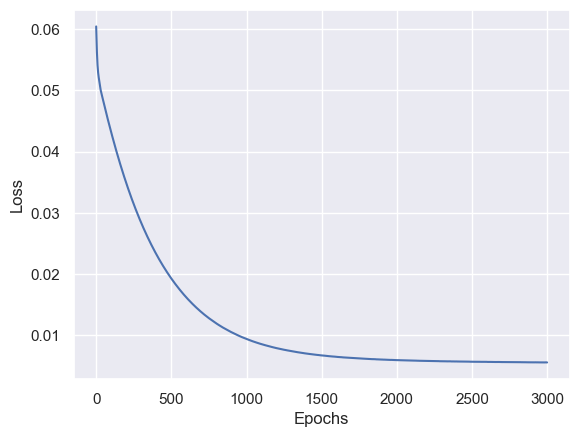

In [166]:
# plota as loss para ver se está treinando
plt.plot(historySIFE.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

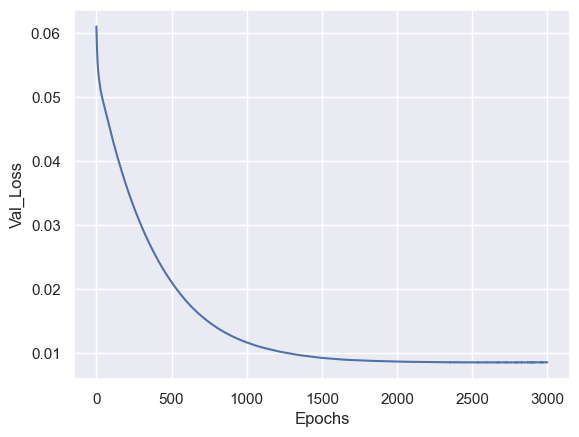

In [169]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historySIFE.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [166]:
#modelSIFE.save('modelosNovos\\Apogee2\\model_SIFE.h5')

In [170]:
predtest = modelSIFE.predict(X_test)

20/20 [==============================] - 0s 3ms/step


Text(0, 0.5, 'Y_test')

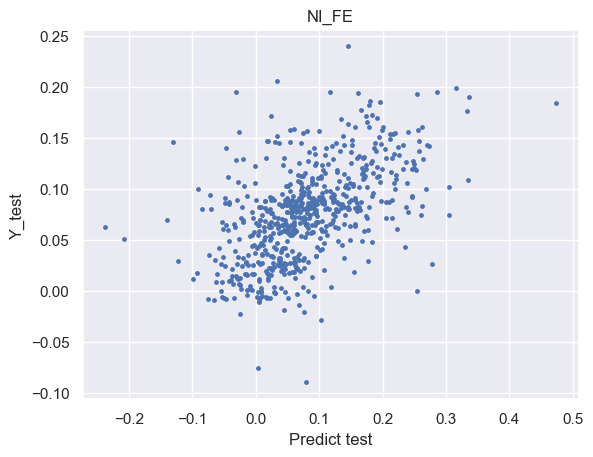

In [171]:
plt.scatter(Y_test[[columnTrain]], predtest, s=6)
plt.title('NI_FE')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [172]:
Y_test['SIFE_Predict'] = predtest

In [173]:
Y_test

TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                
MC0061_000002407       -0.822770  4.537957 -0.002718 -0.018144 -0.315470   
SPLUS-n02s18_000002500 -0.579985  4.591905  0.038469 -0.021040 -0.005504   
MC0145_000010989        0.692253  4.446544  0.028430  0.092106 -0.110602   
MC0025_000258685       -0.024071  4.496673  0.061806  0.042466 -0.092897   
SPLUS-n01s18_000007826  0.018481  4.266320 -0.012097 -0.098167 -0.223850   
...                          ...       ...       ...       ...       ...   
SPLUS-s36s48_000004167 -0.663351  4.587575  0.062983 -0.038318 -0.088772   
MC0108_000057588       -0.622598  4.572570  0.196925  0.079666  0.034718   
SPLUS-n12s39_000004081 -0.526779  3.936834  0.102940  0.110074  0.016362   
MC0001_000002946       -0.806151  4.583101  0.063160 -0.036456 -0.033902   
SPLUS-n02s23_000011948 -0.325905  4.560552  0.073263  0.056296  0.081828   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  ...  \
Field_splus                                                               ...   
MC0061_000002407       -0.175950 -0.046311  0.099400 -0.055090  0.060595  ...   
SPLUS-n02s18_000002500 -0.500060  0.033458 -0.060903 -0.007740  0.082594  ...   
MC0145_000010989       -0.133260  0.023189  0.772480 -0.141130 -0.031289  ...   
MC0025_000258685       -0.225500  0.083045 -0.138710  0.044850  0.174553  ...   
SPLUS-n01s18_000007826 -0.376720  0.002678 -0.467810 -0.006090 -0.001113  ...   
...                          ...       ...       ...       ...       ...  ...   
SPLUS-s36s48_000004167 -0.436840  0.096979 -0.038955  0.052990  0.107140  ...   
MC0108_000057588       -0.384950  0.273919 -0.029625 -0.005760  0.191753  ...   
SPLUS-n12s39_000004081  0.013653  0.176812  0.015204  0.060096  0.042921  ...   
MC0001_000002946        0.002456  0.109154  0.106141 -0.043273  0.083254  ...   
SPLUS-n02s23_000011948 -0.367090  0.121190 -0.065663 -0.001940  0.023506  ...   

                        TEFFDecoded  TEFF_PredictDecoded  LOGG_Predict  \
Field_splus                                                              
MC0061_000002407          4771.7373          4796.384277      4.529244   
SPLUS-n02s18_000002500    5032.4746          5101.136230      4.566516   
MC0145_000010989          6398.7847          6177.354980      4.131693   
MC0025_000258685          5629.4937          5729.455566      4.339001   
SPLUS-n01s18_000007826    5675.1930          5692.469238      4.367851   
...                             ...                  ...           ...   
SPLUS-s36s48_000004167    4942.9450          5055.099609      4.531365   
MC0108_000057588          4986.7110          4920.656738      4.579930   
SPLUS-n12s39_000004081    5089.6150          5074.607422      4.152612   
MC0001_000002946          4789.5854          4771.262695      4.576632   
SPLUS-n02s23_000011948    5305.3423          5219.129395      4.599397   

                        FEH_Predict  CAFE_Predict  CFE_Predict  MGFE_Predict  \
Field_splus                                                                    
MC0061_000002407          -0.284677      0.032171    -0.123158      0.012814   
SPLUS-n02s18_000002500    -0.391178      0.017074    -0.006190      0.169996   
MC0145_000010989          -0.211765     -0.002815     0.046517      0.044155   
MC0025_000258685          -0.279816      0.081508     0.043855      0.135654   
SPLUS-n01s18_000007826    -0.328131      0.074316     0.063608      0.136038   
...                             ...           ...          ...           ...   
SPLUS-s36s48_000004167    -0.161693      0.011021    -0.038756      0.079403   
MC0108_000057588          -0.391790      0.090287    -0.056742      0.181182   
SPLUS-n12s39_000004081     0.038791      0.037337    -0.031631      0.062081   
MC0001_000002946          -0.073014     -0.003118    -0.038200      0.062555   
SPLUS-n02s23_000011948    -0.306728      0.013974    -0.027413

In [175]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\SiFePredict.csv")

# Plotando treinamento

In [160]:
coiso = pd.DataFrame({'TEFF': historyTEFF.history['loss'][:], 'LOGG': historyLOGG.history['loss'][:3000], 
                      'CAFE': historyCAFE.history['loss'][:], 'CFE': historyCFE.history['loss'][:],
                      'FEH': historyFEH.history['loss'][:], 'MGFE': historyMGFE.history['loss'][:], 
                      'NFE': historyNFE.history['loss'][:], 'NIFE': historyNIFE.history['loss'][:],
                      'SIFE': historySIFE.history['loss'][:]})

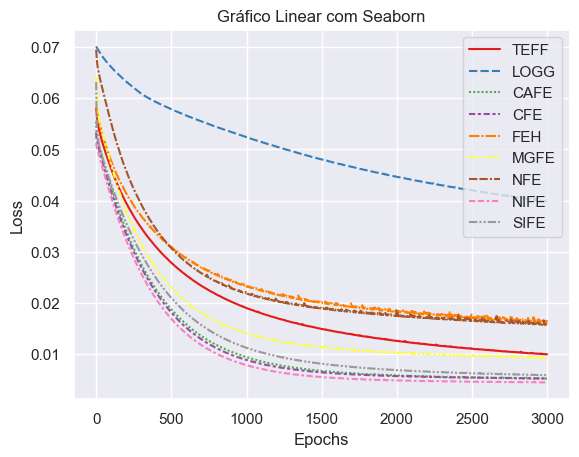

In [162]:
# Plotando o gráfico linear
sns.set(style='darkgrid')  # Estilo do gráfico (opcional)
sns.lineplot(data=coiso, markers=False, palette="Set1")  # 'markers=True' adiciona marcadores aos pontos
plt.xlabel('Epochs')  # Adicione um label ao eixo X (substitua 'Eixo X' pelo label desejado)
plt.ylabel('Loss')  # Adicione um label ao eixo Y (substitua 'Eixo Y' pelo label desejado)
plt.title('Gráfico Linear com Seaborn')  # Adicione um título ao gráfico
plt.legend()  # Adicione uma legenda para identificar cada linha
plt.show()

In [180]:
fig = px.line(coiso, markers=False)
fig.update_layout(title='Grafico de aprendizado das redes neurais', 
                  xaxis_title='Epochs', 
                  yaxis_title='Loss', 
                  width=650,
                  template='gridon'  # Modifica o plano de fundo para o template "plotly_dark"
                 )

# Alguns plots para o poster

## Preparando base para plots

In [4]:
padrao = pd.read_csv("E:\IC\PredictsTrainingTest\\3.1-ApogeeGeral\\Final.csv", index_col = 'Field_splus')

In [128]:
padrao

teff   logg   alpha_m    feh      TEFF  \
Field                                                               
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807   
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751   
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289   
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491   
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643   
...                         ...    ...       ...    ...       ...   
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961   
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765   
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922   
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776   
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239   

                        TEFF_PredictDecoded  alpha_predict  LOGG_Predict  \
Field                                                                      
SPLUS-s02s17_000004762          5776.024902       0.204177      4.046244   
SPLUS-n01s20_000008763          5293.979980       0.151184      4.536907   
SPLUS-n02n26_000010995          5529.192871       0.281305      4.408480   
SPLUS-s02s10_000004604          5703.462891       0.327699      4.241783   
SPLUS-n01s23_000000451          6054.609375       0.120852      4.145991   
...                                     ...            ...           ...   
SPLUS-n02n28_000004106          5629.470703       0.206184      4.105874   
SPLUS-s02s13_000005813          6007.171387       0.113706      4.109293   
SPLUS-s02s06_000004255          5619.103516       0.207008      4.007104   
SPLUS-n02n01_000002263          5178.011230       0.171745      4.587033   
SPLUS-n02s20_000006551          5392.504395       0.233148      4.534865   

                        FEH_Predict  
Field                                
SPLUS-s02s17_000004762    -0.399949  
SPLUS-n01s20_000008763     0.064732  
SPLUS-n02n26_000010995    -0.259612  
SPLUS-s02s10_000004604    -0.649948  
SPLUS-n01s23_000000451    -1.116734  
...                             ...  
SPLUS-n02n28_000004106    -0.286843  
SPLUS-s02s13_000005813    -0.359195  
SPLUS-s02s06_000004255    -0.145065  
SPLUS-n02n01_000002263    -0.163269  
SPLUS-n02s20_000006551    -0.456472  

[2283 rows x 9 columns]

In [162]:
scaler = MinMaxScaler(feature_range=(0.2, 1.1))

In [163]:
cores = scaler.fit_transform(np.array(padrao[["TEFF"]]))

In [164]:
padrao['colors'] = cores

In [165]:
padrao

teff   logg   alpha_m    feh      TEFF  \
Field                                                               
SPLUS-s02s17_000004762  5939.09  4.121  0.054742 -0.183  0.057807   
SPLUS-n01s20_000008763  5128.70  4.685  0.157903 -0.352 -0.670751   
SPLUS-n02n26_000010995  5405.07  4.331  0.423013 -0.375 -0.422289   
SPLUS-s02s10_000004604  5714.07  4.227  0.349883 -0.730 -0.144491   
SPLUS-n01s23_000000451  6079.06  4.190  0.137623 -1.234  0.183643   
...                         ...    ...       ...    ...       ...   
SPLUS-n02n28_000004106  5461.05  4.256  0.341169 -0.334 -0.371961   
SPLUS-s02s13_000005813  6129.25  4.180  0.153645 -0.602  0.228765   
SPLUS-s02s06_000004255  5775.88  4.198 -0.004846 -0.031 -0.088922   
SPLUS-n02n01_000002263  5160.93  4.707  0.238851 -0.256 -0.641776   
SPLUS-n02s20_000006551  5220.48  4.636  0.196420 -0.376 -0.588239   

                        TEFF_PredictDecoded  alpha_predict  LOGG_Predict  \
Field                                                                      
SPLUS-s02s17_000004762            5776.0250       0.204177      4.046244   
SPLUS-n01s20_000008763            5293.9800       0.151184      4.536907   
SPLUS-n02n26_000010995            5529.1930       0.281305      4.408480   
SPLUS-s02s10_000004604            5703.4630       0.327699      4.241783   
SPLUS-n01s23_000000451            6054.6094       0.120852      4.145991   
...                                     ...            ...           ...   
SPLUS-n02n28_000004106            5629.4707       0.206184      4.105874   
SPLUS-s02s13_000005813            6007.1714       0.113706      4.109293   
SPLUS-s02s06_000004255            5619.1035       0.207008      4.007104   
SPLUS-n02n01_000002263            5178.0110       0.171745      4.587033   
SPLUS-n02s20_000006551            5392.5044       0.233148      4.534865   

                        FEH_Predict    colors     sizes  
Field                                                    
SPLUS-s02s17_000004762    -0.399949  0.568696 -0.280551  
SPLUS-n01s20_000008763     0.064732  0.235187  0.690189  
SPLUS-n02n26_000010995    -0.259612  0.348925  0.080895  
SPLUS-s02s10_000004604    -0.649948  0.476091 -0.098107  
SPLUS-n01s23_000000451    -1.116734  0.626300 -0.161790  
...                             ...       ...       ...  
SPLUS-n02n28_000004106    -0.286843  0.371963 -0.048193  
SPLUS-s02s13_000005813    -0.359195  0.646955 -0.179002  
SPLUS-s02s06_000004255    -0.145065  0.501529 -0.148021  
SPLUS-n02n01_000002263    -0.163269  0.248451  0.728055  
SPLUS-n02s20_000006551    -0.456472  0.272959  0.605852  

[2283 rows x 11 columns]

In [136]:
tamanho = padrao[['logg']]

In [137]:
tamanho = encoder.encode_DataFrame(tamanho, 'sizeLogg')
padrao['sizes'] = tamanho

In [166]:
padrao.min()

teff                   4800.210000
logg                      3.703000
alpha_m                  -0.492010
feh                      -2.133000
TEFF                     -0.966071
TEFF_PredictDecoded    5047.582000
alpha_predict             0.018298
LOGG_Predict              3.744667
FEH_Predict              -1.958493
colors                    0.100000
sizes                    -1.000000
dtype: float64

In [167]:
padrao.max()

teff                   6987.110000
logg                      4.865000
alpha_m                   0.599999
feh                       0.469000
TEFF                      1.000000
TEFF_PredictDecoded    6781.904300
alpha_predict             0.381088
LOGG_Predict              4.642735
FEH_Predict               0.337934
colors                    1.000000
sizes                     1.000000
dtype: float64

In [111]:
#encoder.save_encoders()

In [140]:
padrao.to_csv('E:\\IC\\PlotsPoster\\basepadraoLamost-LR.csv')

In [ ]:
# Save de uma maneira de fazer  plots
"""
plt.figure(figsize=(8, 5))
sc = plt.scatter(padrao['teffTest'], padrao['teffPred'], edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 70, alpha=0.8, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("Teff (Observed)")
plt.ylabel("Teff (Predict)")
plt.xlim(3400, 6500)
plt.ylim(3400, 6500)

slope, intercept = np.polyfit(padrao['teffTest'], padrao['teffPred'], 1)
plt.plot(padrao['teffPred']-700, (slope*padrao['teffPred'] + intercept)-700, color='red', linestyle='solid')

plt.grid(True, alpha=0.2)
plt.savefig('E:\\IC\\PlotsPoster\\TeffPredict.png')
"""

In [ ]:
# outro save
"""
y = padrao['LOGG_Predict'] - padrao['LOGG']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['LOGG'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("Logg (Observed)")
plt.ylabel("Logg (Observed - Predict)")
plt.xlim(4.15, 4.7)
plt.ylim(-0.6, 0.5)

plt.plot([0,7], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
plt.savefig('E:\\IC\\PlotsPoster\\LoggPredict.png')
"""

## Predict Plots

### Teff

In [3]:
padrao = pd.read_csv('E:\\IC\\PlotsPoster\\basepadraoLamost-LR.csv', index_col = 'Field')

In [146]:
for column in padrao:
    print(column)

teff
logg
alpha_m
feh
TEFF
TEFF_PredictDecoded
alpha_predict
LOGG_Predict
FEH_Predict
colors
sizes


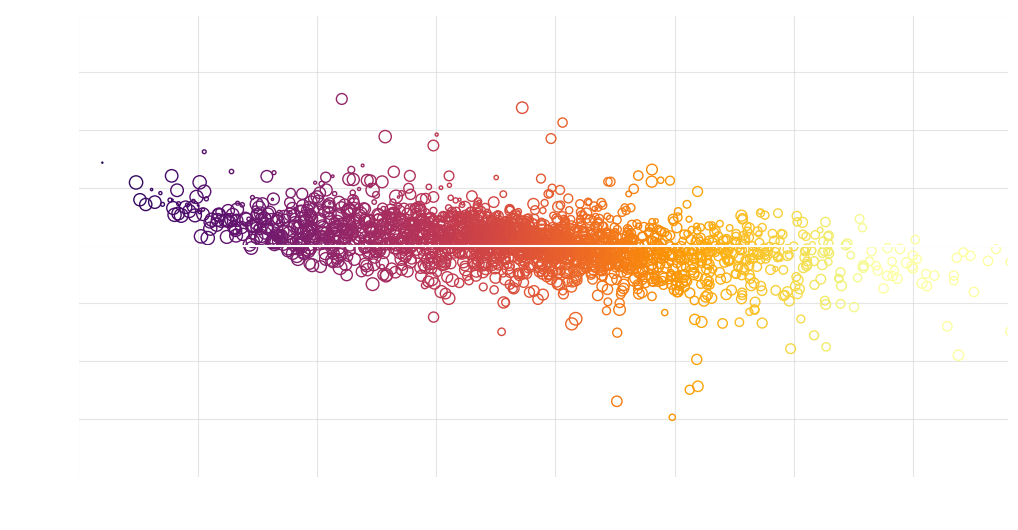

In [182]:
sns.set_style("whitegrid")

y = padrao['TEFF_PredictDecoded'] - padrao['teff']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sc = ax.scatter(padrao['teff'], y, edgecolors=plt.cm.inferno((padrao['colors'])*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Teff (Observed)", color='white')
ax.set_ylabel("Teff (Observed - Predict)", color='white')

ax.plot([2000,7500], [0,0], color='white', linestyle='solid')  # Use ax.plot() instead of sns.plot()
plt.xlim(4750, 6700)
plt.ylim(-1000, 1000)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(True, alpha=0.5)

fig.savefig('E:\\IC\\PlotsPoster\\TeffPredict-LLR.png', transparent=True, dpi=300, bbox_inches="tight")

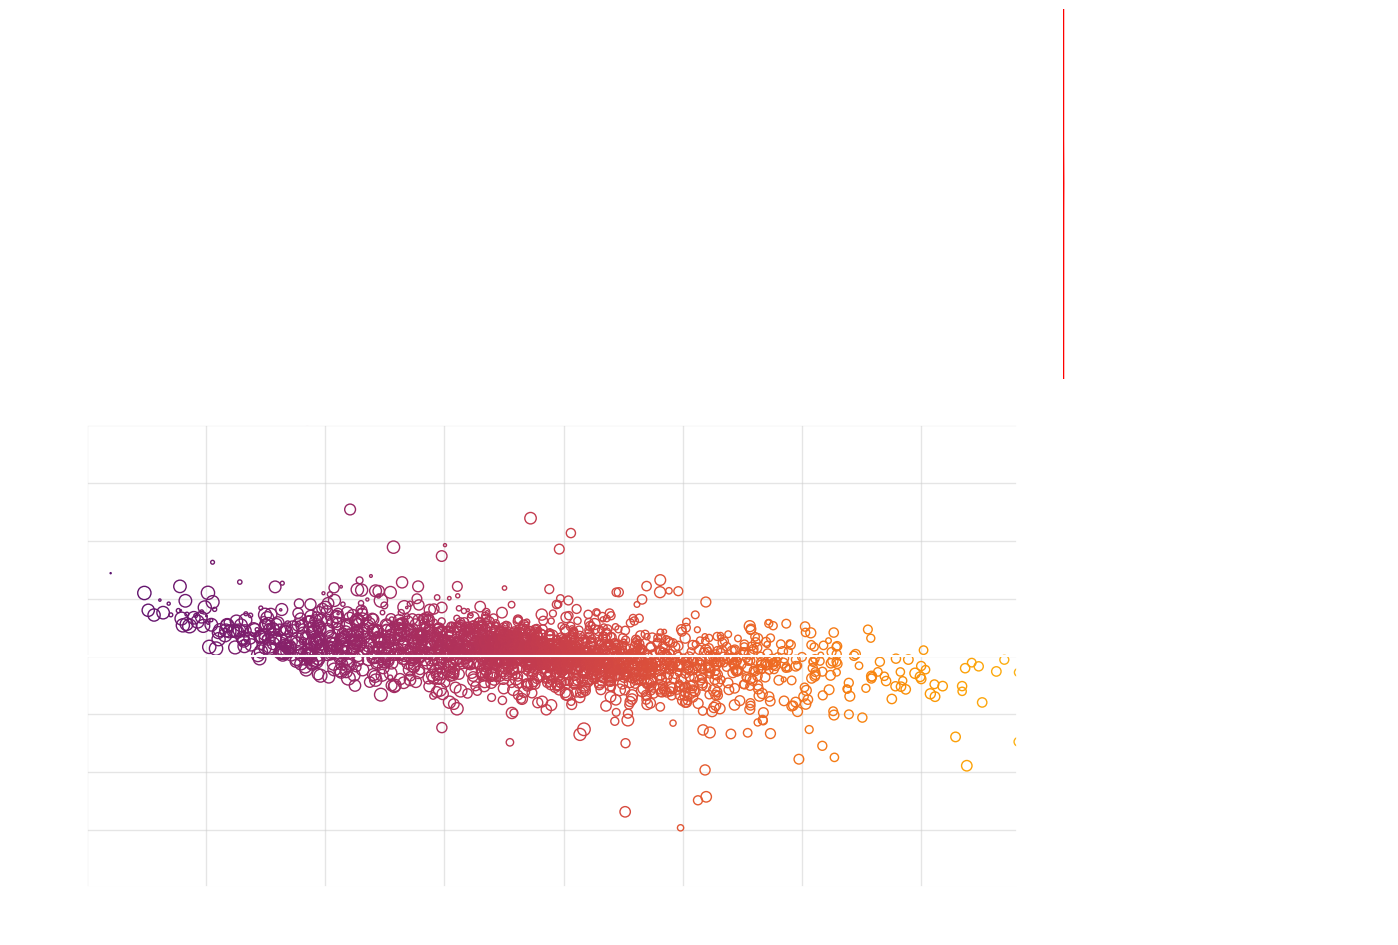

In [40]:
sns.set_style("whitegrid")

y = padrao['TEFF_PredictDecoded'] - padrao['teff']

x = padrao['teff']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Scatter plot
sc = ax.scatter(x, y, edgecolors=plt.cm.inferno(padrao['colors']*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Teff (Observed)", color='white')
ax.set_ylabel("Teff (Observed - Predict)", color='white')

ax.plot([2000,7500], [0,0], color='white', linestyle='solid') 
plt.xlim(4750, 6700)
plt.ylim(-1000, 1000)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(True, alpha=0.5)

# Plotar o KDE plot de densidade à direita do gráfico de dispersão
ax2 = ax.inset_axes([1.05, 1.1, 0.35, 0.8], transform=ax.transAxes)
sns.kdeplot(y, vertical=True, color='red', ax=ax2)
ax2.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax2.set_ylim(-1000, 1000)  # Mesmo limite y do gráfico de dispersão
ax2.axis('off')  # Remover eixos e ticks

"""# Filtrar dados na faixa desejada (-0.5 até 0) e plotar histograma de densidade
filtered_y = y[(x >= -0.5) & (x <= 0)]
ax3 = ax.inset_axes([1.05, 0.1, 0.35, 0.8], transform=ax.transAxes)
sns.kdeplot(y, vertical=True, color='green', ax=ax3)
ax3.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax3.set_ylim(-1000, 1000)  # Mesmo limite y do gráfico de dispersão
ax3.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (-0.75 até -1.5) e plotar histograma de densidade
filtered_y = y[(x >= -1.5) & (x <= -0.75)]
ax4 = ax.inset_axes([1.05, 0.1, 0.35, 0.8], transform=ax.transAxes)
sns.kdeplot(y, vertical=True, color='yellow', ax=ax4)
ax4.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax4.set_ylim(-1000, 1000)  # Mesmo limite y do gráfico de dispersão
ax4.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (0 até 1.5) e plotar histograma de densidade
filtered_y = y[(x >= 0) & (x <= 1.5)]
ax5 = ax.inset_axes([1.05, 0.1, 0.35, 0.8], transform=ax.transAxes)
sns.kdeplot(y, vertical=True, color='white', ax=ax5)
ax5.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax5.set_ylim(-1000, 1000)  # Mesmo limite y do gráfico de dispersão
ax5.axis('off')  # Remover eixos e ticks

hist_legend = ax2.legend(['All Density'], loc='upper left', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax3.legend(['-0.5 < Teff < 0'], loc='upper right', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax4.legend(['Teff < -0.75'], loc='lower right', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax5.legend(['Teff > 0'], loc='lower left', fontsize=10, frameon=False, labelcolor='white')"""

fig.savefig('E:\\IC\\PlotsPoster\\TeffPredict-LLR-with-sla.png', transparent=True, dpi=300, bbox_inches="tight")

plt.show()


### FEH

In [172]:
for column in padrao:
    print(column)

teff
logg
alpha_m
feh
TEFF
TEFF_PredictDecoded
alpha_predict
LOGG_Predict
FEH_Predict
colors
sizes


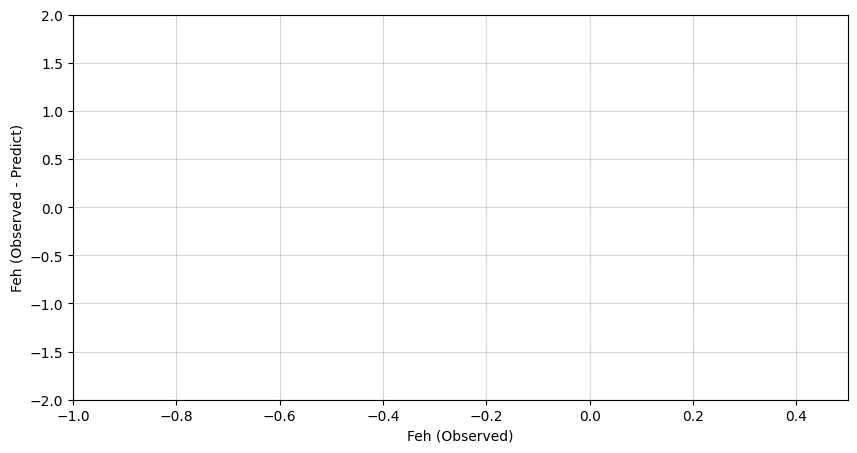

In [12]:
y = padrao['FEH_Predict'] - padrao['feh']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['teff'], y, edgecolors=plt.cm.inferno((padrao['colors']*1.1)), s=(padrao['sizes']+1)*50, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("Feh (Observed)")
plt.ylabel("Feh (Observed - Predict)")
plt.xlim(-1, 0.5)
plt.ylim(-2, 2)

#plt.xlim(4750, 6700)


plt.plot([4000,7000], [0,0], color='white', linestyle='solid')

plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\FehPredict.png')

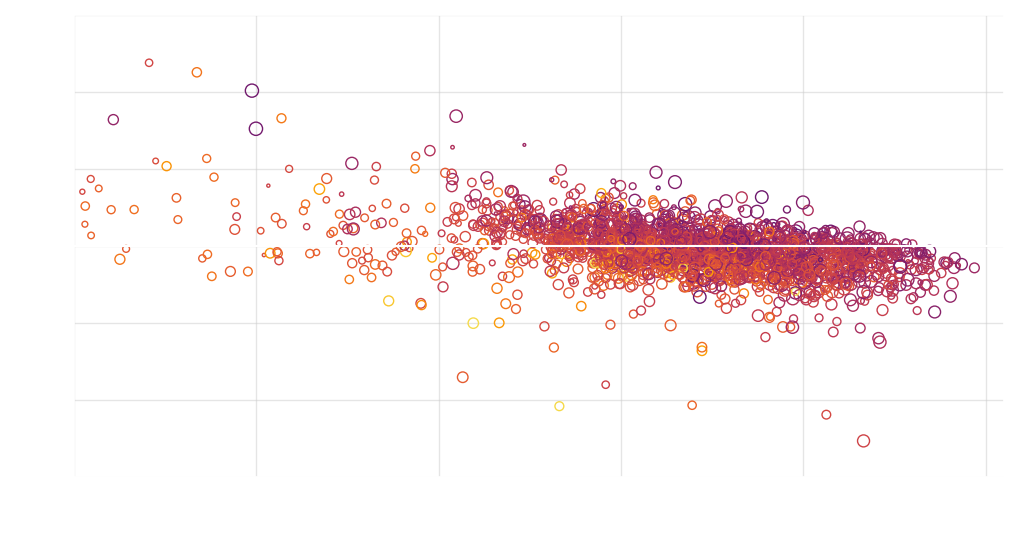

In [25]:
sns.set_style("whitegrid")

y = padrao['FEH_Predict'] - padrao['feh']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sc = ax.scatter(padrao['feh'], y, edgecolors=plt.cm.inferno(padrao['colors']*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Feh (Observed)", color='white')
ax.set_ylabel("Feh (Observed - Predict)", color='white')

ax.plot([-2,1], [0,0], color='white', linestyle='solid')  # Use ax.plot() instead of sns.plot()
plt.xlim(-2, 0.55)
plt.ylim(-1.5, 1.5)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(True, alpha=0.5)


fig.savefig('E:\\IC\\PlotsPoster\\FehPredict-LLR.png', transparent=True, dpi=300, bbox_inches="tight")

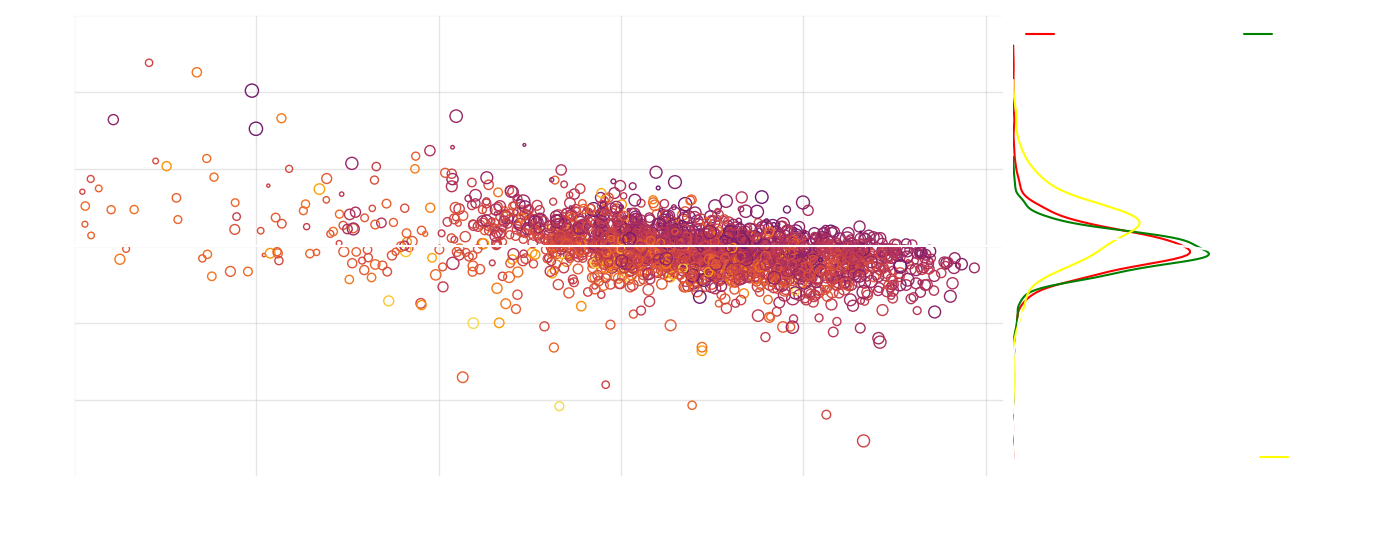

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suponha que 'padrao' seja o seu DataFrame com os dados

sns.set_style("whitegrid")

y = padrao['FEH_Predict'] - padrao['feh']

x = padrao['feh']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Scatter plot
sc = ax.scatter(x, y, edgecolors=plt.cm.inferno(padrao['colors']*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Feh (Observed)", color='white')
ax.set_ylabel("Feh (Observed - Predict)", color='white')

ax.plot([-2,1], [0,0], color='white', linestyle='solid')
plt.xlim(-2, 0.55)
plt.ylim(-1.5, 1.5)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(True, alpha=0.5)

# Plotar o KDE plot de densidade à direita do gráfico de dispersão
ax2 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(y, vertical=True, color='red', ax=ax2)
ax2.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax2.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax2.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (-0.5 até 0) e plotar histograma de densidade
filtered_x = y[(x >= -0.5) & (x <= 0)]
ax3 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(filtered_x, vertical=True, color='green', ax=ax3)
ax3.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax3.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax3.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (-0.75 até -1.5) e plotar histograma de densidade
filtered_y = y[(x >= -1.5) & (x <= -0.75)]
ax4 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(filtered_y, vertical=True, color='yellow', ax=ax4)
ax4.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax4.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax4.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (0 até 1.5) e plotar histograma de densidade
filtered_y = y[(x >= 0) & (x <= 1.5)]
ax5 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(filtered_y, vertical=True, color='white', ax=ax5)
ax5.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax5.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax5.axis('off')  # Remover eixos e ticks

hist_legend = ax2.legend(['All Density'], loc='upper left', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax3.legend(['-0.5 < FeH < 0'], loc='upper right', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax4.legend(['FeH < -0.75'], loc='lower right', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax5.legend(['FeH > 0'], loc='lower left', fontsize=10, frameon=False, labelcolor='white')

fig.savefig('E:\\IC\\PlotsPoster\\FehPredict-LLR-with-sla.png', transparent=True, dpi=300, bbox_inches="tight")

plt.show()


### Logg

In [202]:
for column in padrao:
    print(column)

teff
logg
alpha_m
feh
TEFF
TEFF_PredictDecoded
alpha_predict
LOGG_Predict
FEH_Predict
colors
sizes


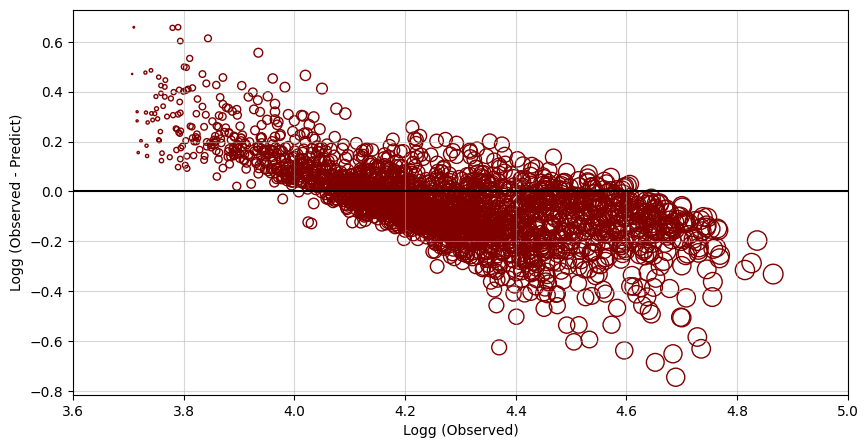

In [211]:
y = padrao['LOGG_Predict'] - padrao['logg']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['logg'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=(padrao['sizes']+1) * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("Logg (Observed)")
plt.ylabel("Logg (Observed - Predict)")
plt.xlim(3.6, 5)
#plt.ylim(-0.6, 0.5)

plt.plot([0,7], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\LoggPredict.png')

NameError: name 'scatter_hist' is not defined

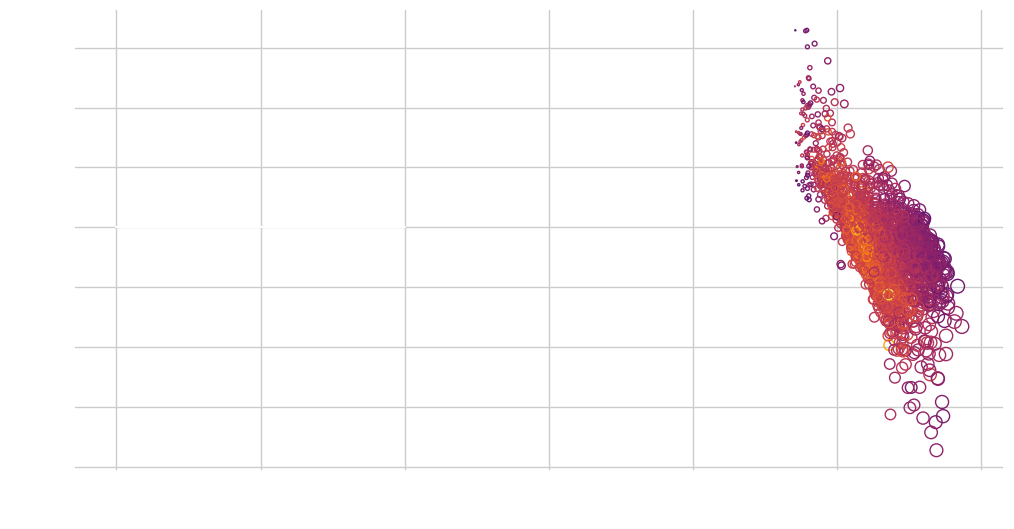

In [10]:
sns.set_style("whitegrid")

y = padrao['LOGG_Predict'] - padrao['logg']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sc = ax.scatter(padrao['logg'], y, edgecolors=plt.cm.inferno(padrao['colors']*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Logg (Observed)", color='white')
ax.set_ylabel("Logg (Observed - Predict)", color='white')

ax.plot([-1,1], [0,0], color='white', linestyle='solid')  # Use ax.plot() instead of sns.plot()
#plt.xlim(-1.5, 0.55)
#plt.ylim(-0.55, 0.7)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')


ax.grid(True, alpha=0.5)

fig.savefig('E:\\IC\\PlotsPoster\\LoggPredict-LLR.png', transparent=True, dpi=300, bbox_inches="tight")

### FEH

In [172]:
for column in padrao:
    print(column)

teff
logg
alpha_m
feh
TEFF
TEFF_PredictDecoded
alpha_predict
LOGG_Predict
FEH_Predict
colors
sizes


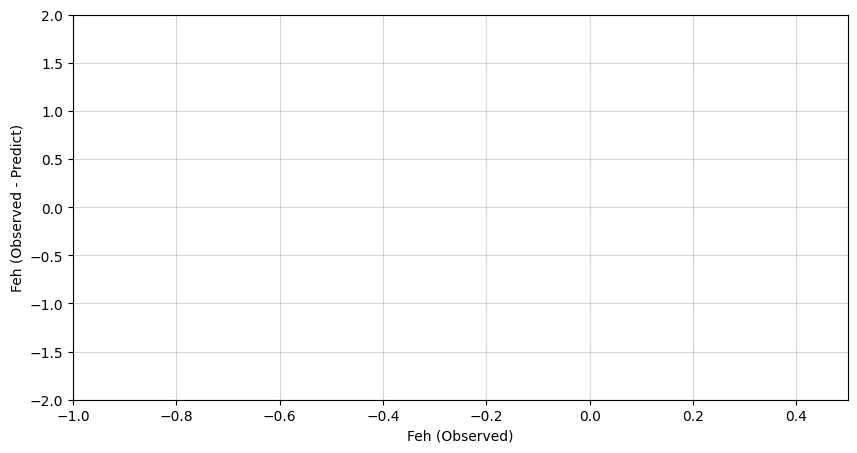

In [12]:
y = padrao['FEH_Predict'] - padrao['feh']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['teff'], y, edgecolors=plt.cm.inferno((padrao['colors']*1.1)), s=(padrao['sizes']+1)*50, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("Feh (Observed)")
plt.ylabel("Feh (Observed - Predict)")
plt.xlim(-1, 0.5)
plt.ylim(-2, 2)

#plt.xlim(4750, 6700)


plt.plot([4000,7000], [0,0], color='white', linestyle='solid')

plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\FehPredict.png')

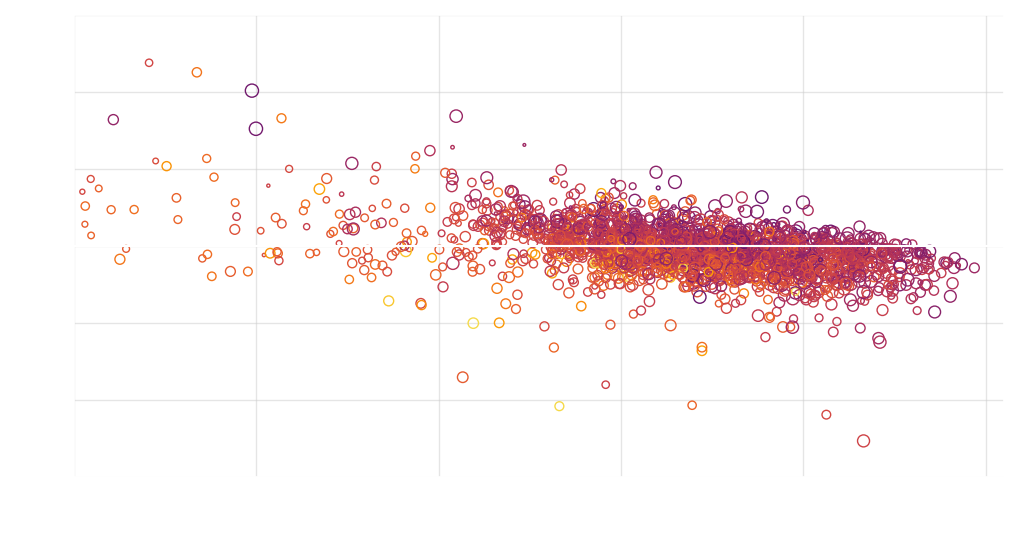

In [25]:
sns.set_style("whitegrid")

y = padrao['FEH_Predict'] - padrao['feh']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

sc = ax.scatter(padrao['feh'], y, edgecolors=plt.cm.inferno(padrao['colors']*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Feh (Observed)", color='white')
ax.set_ylabel("Feh (Observed - Predict)", color='white')

ax.plot([-2,1], [0,0], color='white', linestyle='solid')  # Use ax.plot() instead of sns.plot()
plt.xlim(-2, 0.55)
plt.ylim(-1.5, 1.5)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(True, alpha=0.5)


fig.savefig('E:\\IC\\PlotsPoster\\FehPredict-LLR.png', transparent=True, dpi=300, bbox_inches="tight")

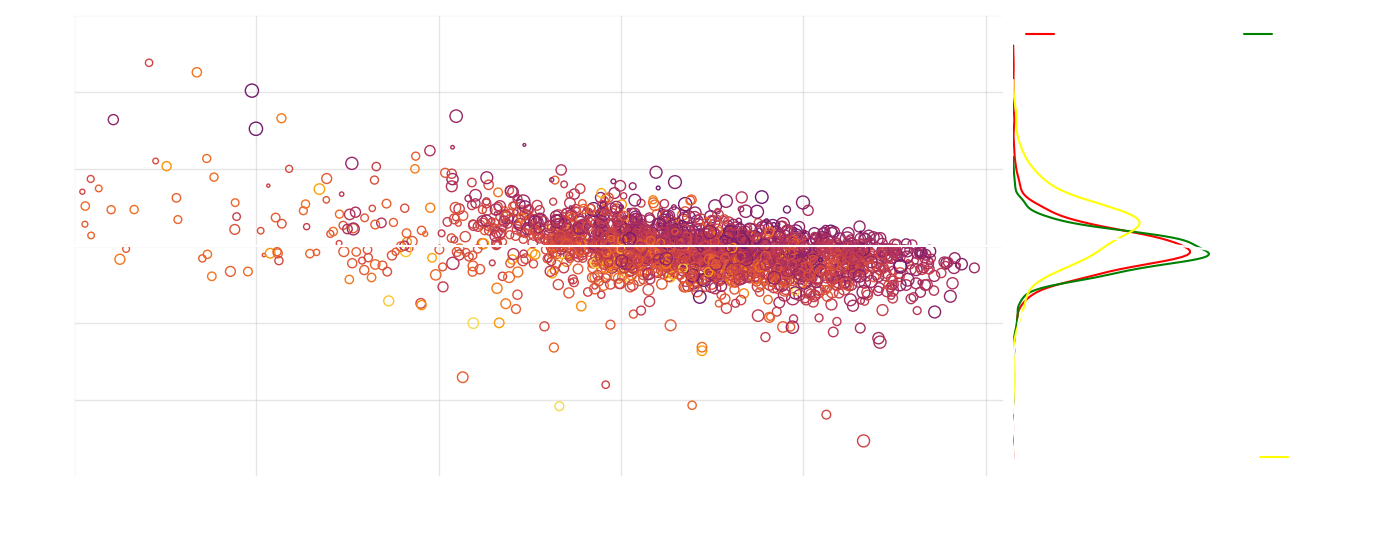

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Suponha que 'padrao' seja o seu DataFrame com os dados

sns.set_style("whitegrid")

y = padrao['FEH_Predict'] - padrao['feh']

x = padrao['feh']

fig = plt.figure(figsize=(12, 6))
ax = fig.add_subplot(111)

# Scatter plot
sc = ax.scatter(x, y, edgecolors=plt.cm.inferno(padrao['colors']*1.3), s=(padrao['sizes']+1) * 50, alpha=1, marker='o', facecolors='none')

ax.set_xlabel("Feh (Observed)", color='white')
ax.set_ylabel("Feh (Observed - Predict)", color='white')

ax.plot([-2,1], [0,0], color='white', linestyle='solid')
plt.xlim(-2, 0.55)
plt.ylim(-1.5, 1.5)

# Set ticks and tick labels to white
ax.tick_params(axis='both', colors='white')
for spine in ax.spines.values():
    spine.set_edgecolor('white')

ax.grid(True, alpha=0.5)

# Plotar o KDE plot de densidade à direita do gráfico de dispersão
ax2 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(y, vertical=True, color='red', ax=ax2)
ax2.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax2.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax2.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (-0.5 até 0) e plotar histograma de densidade
filtered_x = y[(x >= -0.5) & (x <= 0)]
ax3 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(filtered_x, vertical=True, color='green', ax=ax3)
ax3.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax3.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax3.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (-0.75 até -1.5) e plotar histograma de densidade
filtered_y = y[(x >= -1.5) & (x <= -0.75)]
ax4 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(filtered_y, vertical=True, color='yellow', ax=ax4)
ax4.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax4.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax4.axis('off')  # Remover eixos e ticks

# Filtrar dados na faixa desejada (0 até 1.5) e plotar histograma de densidade
filtered_y = y[(x >= 0) & (x <= 1.5)]
ax5 = ax.inset_axes([1.01, 0, 0.4, 1], transform=ax.transAxes)
sns.kdeplot(filtered_y, vertical=True, color='white', ax=ax5)
ax5.set_xlim(0, 6)  # Ajuste os limites conforme necessário
ax5.set_ylim(-1.5, 1.5)  # Mesmo limite y do gráfico de dispersão
ax5.axis('off')  # Remover eixos e ticks

hist_legend = ax2.legend(['All Density'], loc='upper left', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax3.legend(['-0.5 < FeH < 0'], loc='upper right', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax4.legend(['FeH < -0.75'], loc='lower right', fontsize=10, frameon=False, labelcolor='white')
hist_legend = ax5.legend(['FeH > 0'], loc='lower left', fontsize=10, frameon=False, labelcolor='white')

fig.savefig('E:\\IC\\PlotsPoster\\FehPredict-LLR-with-sla.png', transparent=True, dpi=300, bbox_inches="tight")

plt.show()


### CAFE

In [22]:
for column in padrao:
    print(column)

TEFF
LOGG
ALPHA_M
CA_FE
C_FE
FE_H
MG_FE
N_FE
NI_FE
SI_FE
alpha_predict
TEFFDecoded
TEFF_PredictDecoded
LOGG_Predict
FEH_Predict
CAFE_Predict
CFE_Predict
MGFE_Predict
NFE_Predict
NIFE_Predict
SIFE_Predict
colors
sizes


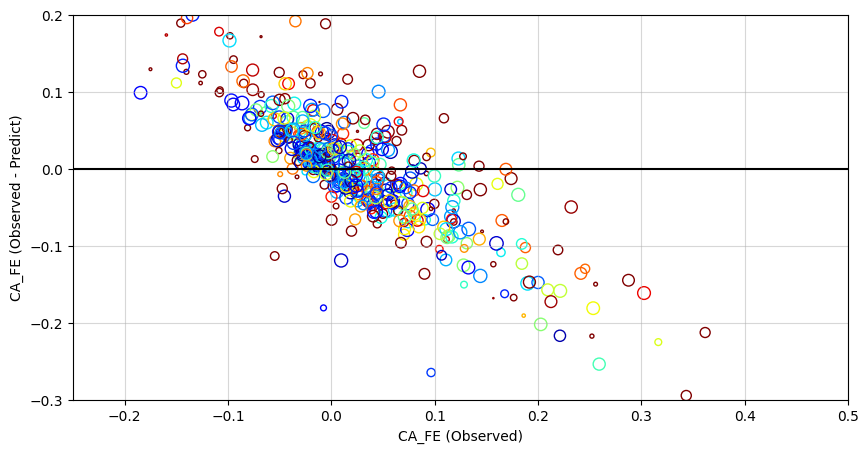

In [61]:
y = padrao['CAFE_Predict'] - padrao['CA_FE']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['CA_FE'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("CA_FE (Observed)")
plt.ylabel("CA_FE (Observed - Predict)")
plt.xlim(-0.25, 0.5)
plt.ylim(-0.3, 0.2)

plt.plot([-1,1], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
plt.savefig('E:\\IC\\PlotsPoster\\CAFEPredict.png')

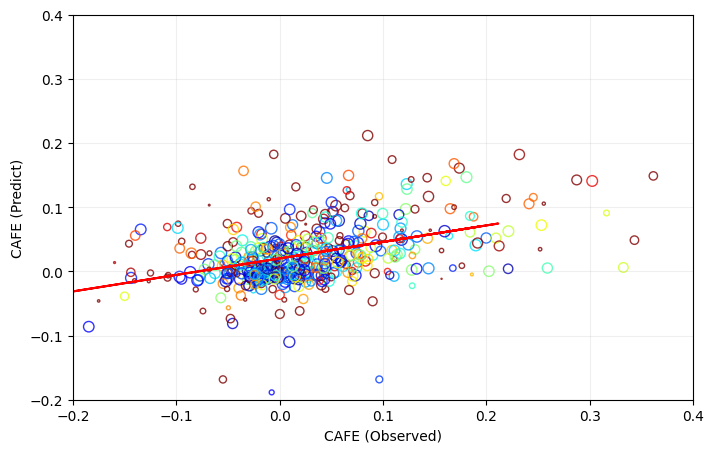

In [56]:
# Save de uma maneira de fazer  plots

plt.figure(figsize=(8, 5))
sc = plt.scatter(padrao['CA_FE'], padrao['CAFE_Predict'], edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 70, alpha=0.8, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("CAFE (Observed)")
plt.ylabel("CAFE (Predict)")
plt.xlim(-0.2, 0.4)
plt.ylim(-0.2, 0.4)

slope, intercept = np.polyfit(padrao['CA_FE'], padrao['CAFE_Predict'], 1)
plt.plot(padrao['CAFE_Predict'], (slope*padrao['CAFE_Predict'] + intercept), color='red', linestyle='solid')

plt.grid(True, alpha=0.2)
#plt.savefig('E:\\IC\\PlotsPoster\\TeffPredict.png')

### CFE

In [22]:
for column in padrao:
    print(column)

TEFF
LOGG
ALPHA_M
CA_FE
C_FE
FE_H
MG_FE
N_FE
NI_FE
SI_FE
alpha_predict
TEFFDecoded
TEFF_PredictDecoded
LOGG_Predict
FEH_Predict
CAFE_Predict
CFE_Predict
MGFE_Predict
NFE_Predict
NIFE_Predict
SIFE_Predict
colors
sizes


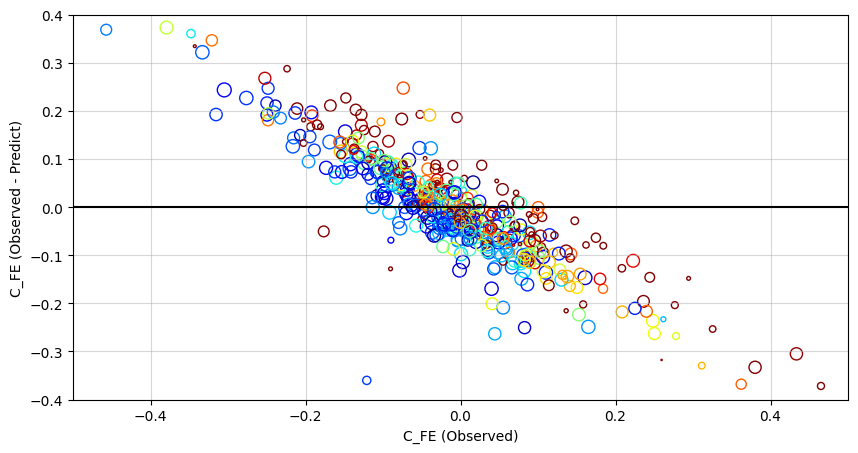

In [63]:
y = padrao['CFE_Predict'] - padrao['C_FE']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['C_FE'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("C_FE (Observed)")
plt.ylabel("C_FE (Observed - Predict)")
plt.xlim(-0.5, 0.5)
plt.ylim(-0.4, 0.4)

plt.plot([-1,1], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
plt.savefig('E:\\IC\\PlotsPoster\\CFEPredict.png')

### MGFE

In [22]:
for column in padrao:
    print(column)

TEFF
LOGG
ALPHA_M
CA_FE
C_FE
FE_H
MG_FE
N_FE
NI_FE
SI_FE
alpha_predict
TEFFDecoded
TEFF_PredictDecoded
LOGG_Predict
FEH_Predict
CAFE_Predict
CFE_Predict
MGFE_Predict
NFE_Predict
NIFE_Predict
SIFE_Predict
colors
sizes


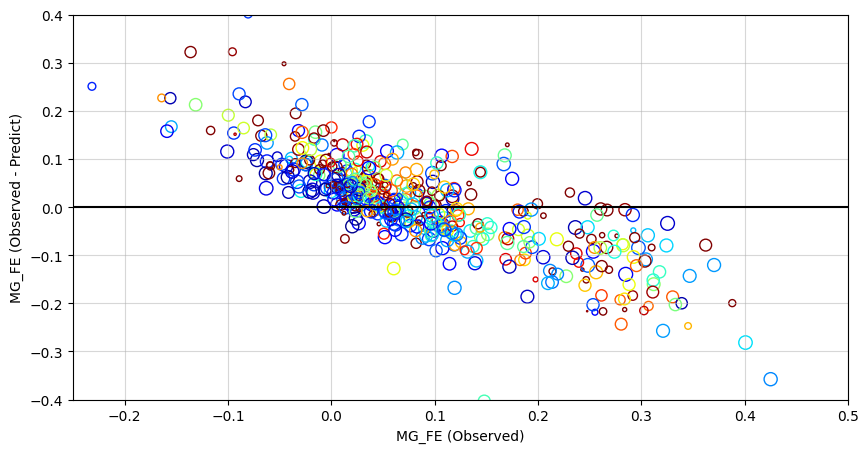

In [66]:
y = padrao['MGFE_Predict'] - padrao['MG_FE']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['MG_FE'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("MG_FE (Observed)")
plt.ylabel("MG_FE (Observed - Predict)")
plt.xlim(-0.25, 0.5)
plt.ylim(-0.4, 0.4)

plt.plot([-1,1], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
plt.savefig('E:\\IC\\PlotsPoster\\MGFEPredict.png')

### NFE

In [22]:
for column in padrao:
    print(column)

TEFF
LOGG
ALPHA_M
CA_FE
C_FE
FE_H
MG_FE
N_FE
NI_FE
SI_FE
alpha_predict
TEFFDecoded
TEFF_PredictDecoded
LOGG_Predict
FEH_Predict
CAFE_Predict
CFE_Predict
MGFE_Predict
NFE_Predict
NIFE_Predict
SIFE_Predict
colors
sizes


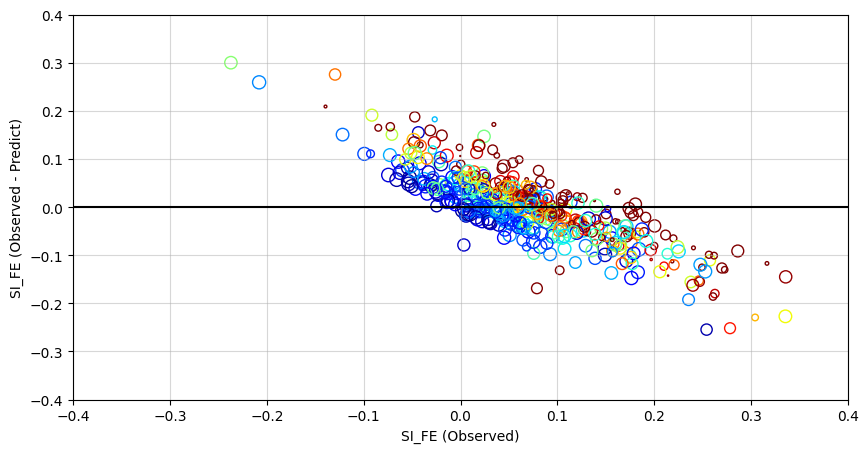

In [147]:
y = padrao['SIFE_Predict'] - padrao['SI_FE']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['SI_FE'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("SI_FE (Observed)")
plt.ylabel("SI_FE (Observed - Predict)")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)

plt.plot([-1,1], [0,0], color='black', linestyle='solid')


plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\NFEPredict.png')

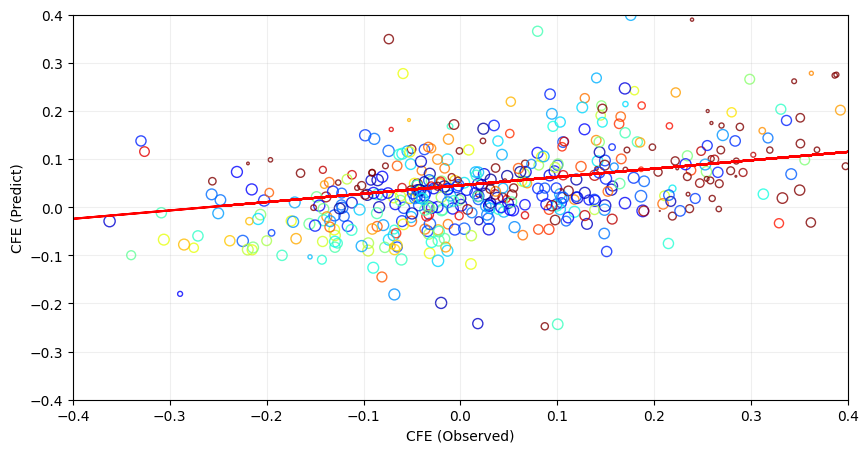

In [95]:
# Save de uma maneira de fazer  plots

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['N_FE'], padrao['NFE_Predict'], edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 70, alpha=0.8, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("FE (Observed)")
plt.ylabel("FE (Predict)")
plt.xlim(-0.4, 0.4)
plt.ylim(-0.4, 0.4)

slope, intercept = np.polyfit(padrao['N_FE'], padrao['NFE_Predict'], 1)
plt.plot(padrao['NFE_Predict'], (slope*padrao['NFE_Predict'] + intercept), color='red', linestyle='solid')

plt.grid(True, alpha=0.2)
#plt.savefig('E:\\IC\\PlotsPoster\\TeffPredict.png')

### alpha

In [212]:
for column in padrao:
    print(column)

teff
logg
alpha_m
feh
TEFF
TEFF_PredictDecoded
alpha_predict
LOGG_Predict
FEH_Predict
colors
sizes


In [217]:
padrao.max()

teff                   6987.110000
logg                      4.865000
alpha_m                   0.599999
feh                       0.469000
TEFF                      1.000000
TEFF_PredictDecoded    6781.904300
alpha_predict             0.381088
LOGG_Predict              4.642735
FEH_Predict               0.337934
colors                    1.000000
sizes                     1.000000
dtype: float64

In [214]:
y = padrao['alpha_m'] - padrao['alpha_predict']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['alpha_m'], y, edgecolors=plt.cm.jet((padrao['colors'])), s=(padrao['size']+1) * 50, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("teff")
plt.ylabel("ALPHA_M (Observed - Predict)")
#plt.xlim(-0.4, 0.4)
#plt.ylim(-0.4, 0.4)

#plt.plot([-1,1], [0,0], color='black', linestyle='solid')


plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\NFEPredict.png')

KeyError: 'size'

<Figure size 1000x500 with 0 Axes>

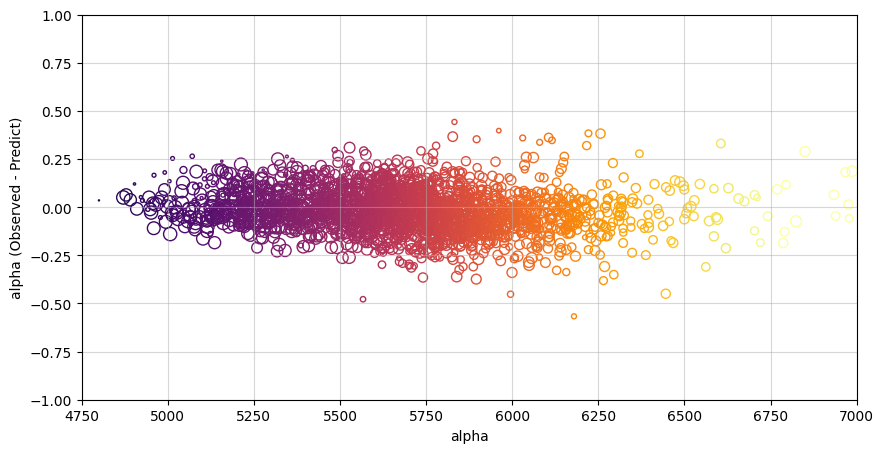

In [228]:
y = padrao['alpha_m'] - padrao['alpha_predict']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['teff'], y, edgecolors=plt.cm.inferno((padrao['colors']*1.1)), s=(padrao['sizes']+1)*50, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("alpha")
plt.ylabel("alpha (Observed - Predict)")
#plt.xlim(-0.4, 0.4)
plt.ylim(-1, 1)

plt.xlim(4750, 7000)


#plt.plot([4000,7000], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\FehPredict.png')

In [8]:
padrao = pd.read_csv('E:\\IC\\PredictsTrainingTest\\4-Lamost-LR\\FeHPredict.csv', index_col = 'Field')

In [9]:
padrao

feh   Predict
Field                                  
SPLUS-s02s17_000004762 -0.183 -0.377476
SPLUS-n01s20_000008763 -0.352  0.045539
SPLUS-n02n26_000010995 -0.375 -0.223369
SPLUS-s02s10_000004604 -0.730 -0.634223
SPLUS-n01s23_000000451 -1.234 -1.041871
...                       ...       ...
SPLUS-n02n28_000004106 -0.334 -0.171007
SPLUS-s02s13_000005813 -0.602 -0.266339
SPLUS-s02s06_000004255 -0.031 -0.140004
SPLUS-n02n01_000002263 -0.256 -0.195300
SPLUS-n02s20_000006551 -0.376 -0.393819

[2283 rows x 2 columns]

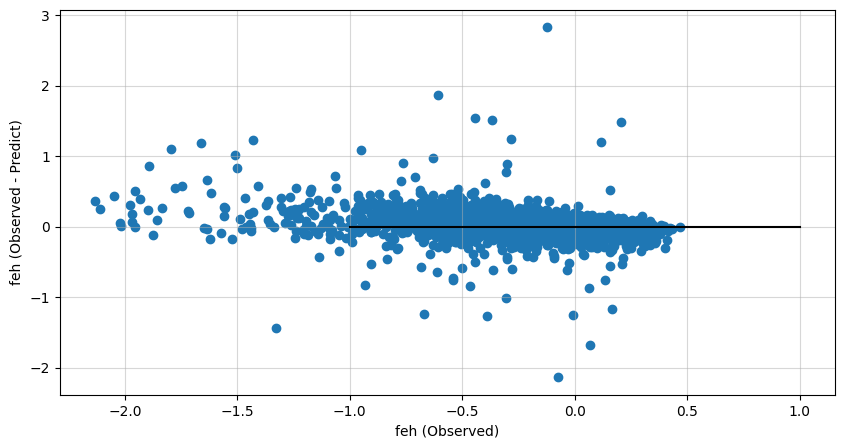

In [10]:
y = padrao['Predict'] - padrao['feh']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['feh'], y, alpha=1)
#sc1 = plt.scatter(padrao['alphacnn'], padrao['Predict'], alpha=1)

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("feh (Observed)")
plt.ylabel("feh (Observed - Predict)")
#plt.xlim(-0.4, 0.4)
#plt.ylim(-0.4, 0.4)

plt.plot([-1,1], [0,0], color='black', linestyle='solid')


plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\NFEPredict.png')

In [111]:
padrao = pd.read_csv('E:\\IC\\PredictsTrainingTest\\1-Lamost\\NFehPredict.csv', index_col = 'ObsID')

In [112]:
padrao

[N/Fe]   Predict
ObsID                       
589603057 -0.05542 -0.019851
635010231  0.15553  0.069653
626207156 -0.02547 -0.052598
635004114 -0.01768 -0.002496
654511138  0.10877  0.148523
...            ...       ...
626202249  0.08606  0.108134
623707035 -0.04465 -0.072810
654505007  0.09795  0.031736
635007205  0.11171  0.079880
635003175 -0.08594  0.046476

[462 rows x 2 columns]

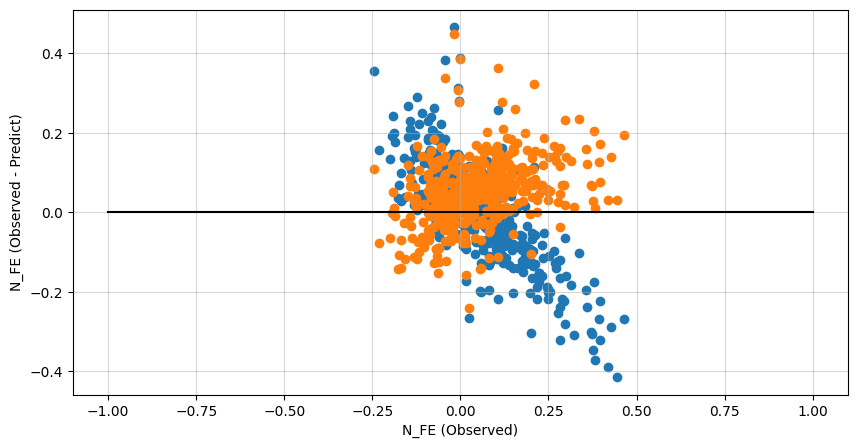

In [118]:
y = padrao['Predict'] - padrao['[N/Fe]']

plt.figure(figsize=(10, 5))
sc = plt.scatter(padrao['[N/Fe]'], y, alpha=1)
sc1 = plt.scatter(padrao['[N/Fe]'], padrao['Predict'], alpha=1)
plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("N_FE (Observed)")
plt.ylabel("N_FE (Observed - Predict)")
#plt.xlim(-0.4, 0.4)
#plt.ylim(-0.4, 0.4)

plt.plot([-1,1], [0,0], color='black', linestyle='solid')


plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\NFEPredict.png')

### teste

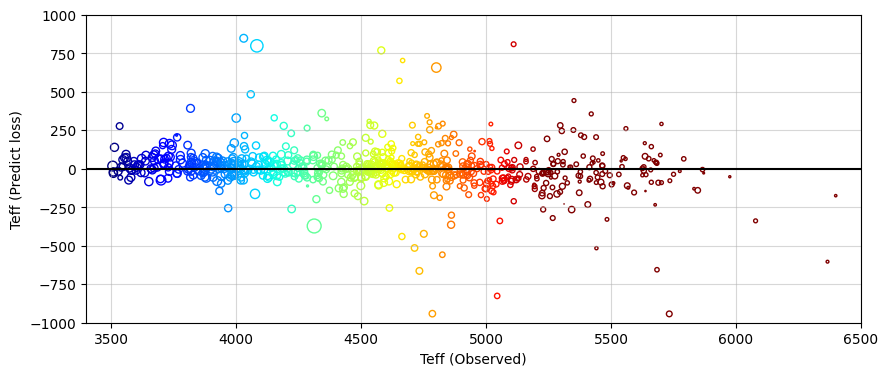

In [98]:
y = padrao['teffPred'] - padrao['teffTest']

plt.figure(figsize=(10, 4))
sc = plt.scatter(padrao['teffTest'], y, edgecolors=plt.cm.jet((padrao['colors']+1)), s=padrao['sizes'] * 100, alpha=1, marker='o', facecolors='none')

plt.style.use('default')
#plt.style.use('seaborn-v0_8-bright')

#cbar = plt.colorbar(sc)

plt.xlabel("Teff (Observed)")
plt.ylabel("Teff (Predict loss)")
plt.xlim(3400, 6500)
plt.ylim(-1000, 1000)

plt.plot([2000,7500], [0,0], color='black', linestyle='solid')

plt.grid(True, alpha=0.5)
#plt.savefig('E:\\IC\\PlotsPoster\\TeffPredict.png')

In [20]:
padrao['teffTest']

ObsID
589603057    5621.59
635010231    5991.07
626207156    5155.38
635004114    4838.32
654511138    5425.65
              ...   
626202249    5249.54
623707035    5322.41
654505007    5396.02
635007205    5577.63
635003175    5746.69
Name: teffTest, Length: 462, dtype: float64

# Predicting Teff

In [24]:
PredictCores = pd.read_csv("E:\IC\BasesNovas\Predict\SplusAllFilteredColors.csv", index_col = '#Field')

In [25]:
Cores = encoder.encode_DataFrame(PredictCores, "NewCores") # encoding a base para normalizar os dados.

In [26]:
Cores

array([[ 0.03380506, -0.17924335,  0.07760931, ..., -0.19619536,
        -0.23599841, -0.08722622],
       [ 0.02069842, -0.16457906,  0.08901842, ..., -0.21158662,
        -0.2584747 , -0.09680699],
       [-0.01178814, -0.16152889,  0.10256872, ..., -0.18274528,
        -0.22528576, -0.09138508],
       ...,
       [ 0.05049643, -0.12457488,  0.09737521, ..., -0.21081205,
        -0.25873021, -0.0982709 ],
       [ 0.06797195, -0.0714315 ,  0.1823192 , ..., -0.11262111,
        -0.03770677,  0.07180458],
       [ 0.02517932, -0.13184837,  0.15677924, ..., -0.15642886,
        -0.184869  , -0.07221616]])

In [27]:
Cores = pd.DataFrame(Cores)

In [28]:
Cores = Cores.set_index(PredictCores.index)

In [29]:
del PredictCores

In [30]:
result=modelTEFF.predict(Cores)

249318/249318 [==============================] - 360s 1ms/step


In [31]:
del Cores

In [32]:
Final = pd.read_csv("E:\IC\PredictsNovos\\Lamost-LR\\FinalSemTeff.csv", index_col = '#Field')

In [33]:
result = encoder.decode_DataFrame(result, strencoder)

In [34]:
Final['Teff'] = result

In [35]:
Final

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
#Field                                                            
HYDRA-0011_000000030     19.62538       19.36938       19.54638   
HYDRA-0011_000000042     18.95029       18.81129       18.74629   
HYDRA-0011_000000045     18.46829       18.61929       18.23829   
HYDRA-0011_000000049     18.15267       18.06767       17.77167   
HYDRA-0011_000000052     20.28467       20.18718       20.40467   
...                           ...            ...            ...   
SPLUS-s46s40_000019479   15.74330       15.52730       15.25730   
SPLUS-s46s40_000019781   14.99280       14.76880       14.44680   
SPLUS-s46s40_000019820   19.65516       19.25016       19.11016   
SPLUS-s46s40_000019887   17.64677       17.08577       16.64877   
SPLUS-s46s40_000020739   15.87398       15.69498       15.39098   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
#Field                                                            
HYDRA-0011_000000030         18.92646       18.67946   18.40346   
HYDRA-0011_000000042         18.15370       17.99870   17.72670   
HYDRA-0011_000000045         17.55570       17.15270   17.94070   
HYDRA-0011_000000049         17.22967       17.13467   17.68667   
HYDRA-0011_000000052         19.31767       19.43667   19.42767   
...                               ...            ...        ...   
SPLUS-s46s40_000019479       14.38172       14.13672   13.45872   
SPLUS-s46s40_000019781       13.80987       13.64087   13.09306   
SPLUS-s46s40_000019820       18.78703       18.71903   18.49103   
SPLUS-s46s40_000019887       16.05146       15.99846   14.74746   
SPLUS-s46s40_000020739       14.49731       14.25331   13.52231   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  alphacnn  \
#Field                                                                          
HYDRA-0011_000000030         18.29846       17.80078       17.62093  0.298989   
HYDRA-0011_000000042         17.52570       17.20626       17.10416  0.272754   
HYDRA-0011_000000045         16.33870       15.68526       15.53916  0.193163   
HYDRA-0011_000000049         16.50867       17.48467       15.96467  0.360355   
HYDRA-0011_000000052         19.01967       18.72667       18.62878  0.374800   
...                               ...            ...            ...       ...   
SPLUS-s46s40_000019479       13.38272       12.46463       12.15818  0.176403   
SPLUS-s46s40_000019781       12.92106       12.35689       12.13903  0.201702   
SPLUS-s46s40_000019820       18.29703       17.96862       17.87840  0.218294   
SPLUS-s46s40_000019887       14.45846       12.99294       11.52252  0.064034   
SPLUS-s46s40_000020739       13.45831       12.50011       12.19845  0.161702   

                             Feh   LoggCnn         Teff  
#Field                                                   
HYDRA-0011_000000030    0.534491  4.175281  5135.176758  
HYDRA-0011_000000042    0.632431  4.234092  5092.598633  
HYDRA-0011_000000045   -0.098269  4.260557  4752.880371  
HYDRA-0011_000000049    0.444327  4.052203  5108.779785  
HYDRA-0011_000000052    0.658554  4.466979  5117.879395  
...                          ...       ...          ...  
SPLUS-s46s40_000019479  0.556164  4.096138  4722.385742  
SPLUS-s46s40_000019781  0.593873  4.027704  4895.166992  
SPLUS-s46s40_000019820  0.657103  4.028617  5243.516113  
SPLUS-s46s40_000019887  0.913560  4.048924  4487.792969  
SPLUS-s46s40_000020739  0.547359  4.102481  4706.624512  

[7978164 rows x 13 columns]

In [36]:
Final.to_csv('E:\IC\PredictsNovos\\Lamost-LR\\FinalLamostLR.csv')

# Guardando treinamento

In [29]:
columnYtrain = 'FE_H'

In [30]:
AnasFilt = Anas.dropna(subset=columnYtrain)

In [31]:
AnasFilt

mag_psf_u  mag_psf_J0378  mag_psf_J0395  \
Field_splus                                                       
HYDRA-0049_000001532     17.04787       16.75687       16.32687   
HYDRA-0049_000003523     18.42071       18.12971       17.83471   
HYDRA-0049_000004647     18.03311       17.74711       17.48811   
HYDRA-0049_000004787     17.82345       17.57145       17.27345   
HYDRA-0049_000006078     16.64699       16.39899       16.03999   
...                           ...            ...            ...   
SPLUS-s46s29_000022011 -999.00000     -999.00000       16.91349   
SPLUS-s46s29_000022636 -999.00000     -999.00000       13.56203   
SPLUS-s46s29_000023932   16.59918       16.36618       15.96318   
SPLUS-s46s29_000028358   18.75965       18.27165       14.98465   
SPLUS-s46s29_000029133   18.71290       18.32390       16.89090   

                        mag_psf_J0410  mag_psf_J0430  mag_psf_g  \
Field_splus                                                       
HYDRA-0049_000001532         15.60439       15.31839   14.62139   
HYDRA-0049_000003523         16.89717       16.60717   15.71917   
HYDRA-0049_000004647         16.49542       16.18442   15.31742   
HYDRA-0049_000004787         16.29811       15.96811   15.15811   
HYDRA-0049_000006078         15.26241       15.05541   14.43941   
...                               ...            ...        ...   
SPLUS-s46s29_000022011       16.53800       16.28900   15.12900   
SPLUS-s46s29_000022636       14.44655       14.16955   13.97355   
SPLUS-s46s29_000023932       15.12860       14.86960   14.13260   
SPLUS-s46s29_000028358       17.14199       16.48099   15.80099   
SPLUS-s46s29_000029133       17.17653       16.66053   15.84253   

                        mag_psf_J0515  mag_psf_J0660  mag_psf_J0861  \
Field_splus                                                           
HYDRA-0049_000001532         14.46239       13.49903       13.22734   
HYDRA-0049_000003523         15.63717       14.32042       13.80728   
HYDRA-0049_000004647         15.25142       13.94287       13.50809   
HYDRA-0049_000004787         15.10311       13.82889       13.43477   
HYDRA-0049_000006078         14.32741       13.52911       13.28375   
...                               ...            ...            ...   
SPLUS-s46s29_000022011       15.01600       13.43112       12.56438   
SPLUS-s46s29_000022636       13.78055       13.42946       13.29959   
SPLUS-s46s29_000023932       14.04960       13.14759       12.91820   
SPLUS-s46s29_000028358       15.92999       14.34138       13.75078   
SPLUS-s46s29_000029133       15.77753       14.44218       13.97987   

                             TEFF      LOGG   ALPHA_M     CA_FE      C_FE  \
Field_splus                                                                 
HYDRA-0049_000001532    4716.2810  5.078055 -0.255125  0.689696       NaN   
HYDRA-0049_000003523    4196.9160  4.598855 -0.079150 -0.052468  0.005286   
HYDRA-0049_000004647    4409.2200  4.612916 -0.014818 -0.038917 -0.048270   
HYDRA-0049_000004787    4496.8560  4.612127  0.001061 -0.018602 -0.079089   
HYDRA-0049_000006078    4929.0580  4.521135 -0.012291 -0.113555 -0.022411   
...                           ...       ...       ...       ...       ...   
SPLUS-s46s29_000022011  3710.3774  4.680777 -0.024135       NaN -0.034417   
SPLUS-s46s29_000022636  5582.7080  3.878693  0.053226 -0.099728 -0.090696   
SPLUS-s46s29_000023932  4752.9375  4.524761  0.023769  0.041036  0.224970   
SPLUS-s46s29_000028358  3933.2188  4.606852 -0.090687 -0.203408 -0.156875   
SPLUS-s46s29_000029133  4262.0615  4.600056 -0.032604 -0.019852 -0.006084   

                            FE_H     MG_FE      N_FE     NI_FE     SI_FE  
Field_splus                                                               
HYDRA-0049_000001532   -0.982990 -0.295521  0.482210  0.469040 -0.235247  
HYDRA-0049_000003523   -0.218130 -0.198241       NaN  0.152509 -0.027598  
HYDRA-0049_000004647   -0.132790 -0.084912       NaN  

In [47]:
#AnasFilt.to_csv("E:\IC\BasesNovas\Treino\\Lamost\\low\\Filter_AnasFEH.csv")

In [32]:
AnasFiltros = AnasFilt[['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
               'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
               'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']]
for column in AnasFiltros:
    AnasFiltros = cap_outliers(AnasFiltros, column)

In [33]:
colunas = ['mag_psf_u', 'mag_psf_J0378', 'mag_psf_J0395', 
           'mag_psf_J0410', 'mag_psf_J0430', 'mag_psf_g', 
           'mag_psf_J0515', 'mag_psf_J0660', 'mag_psf_J0861']
AnasCores = pd.DataFrame()
for i in range(0, 9):
    for j in range(i+1, 9):
        AnasCores[str(colunas[i] + '-' + colunas[j])] = AnasFiltros[colunas[i]].astype(float) - AnasFiltros[colunas[j]].astype(float)

In [34]:
xtrain = AnasCores

In [35]:
ytrain = AnasFilt[[columnYtrain]]

In [36]:
train_x= encoder.encode_DataFrame(xtrain, "NewCores")#The input vector: 13 stellar colors; For example, it is an array with the shape of (189654,13);

train_y = ytrain

In [37]:
# Separando a base para treino e para teste
X_train, X_test, Y_train, Y_test = train_test_split(train_x, train_y, test_size=0.2, random_state=11085)

In [38]:
# Separando a base de treino para utilizar como validação no treinamento
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.1, random_state=11085)

In [39]:
modelFEH = baseline_model_teste()

In [40]:
# Treinando e guardando o modelo                                                                                  (sample_weight=sample_weights, )
historyFEH = modelFEH.fit(X_train, Y_train, epochs = 4000, validation_data=(X_val, Y_val), batch_size = 3000, verbose = 2, callbacks=[TensorBoard(log_dir='./mytensorboard')], shuffle=True, use_multiprocessing=True)

Epoch 1/4000
2/2 - 0s - loss: 0.1316 - val_loss: 0.1184 - 479ms/epoch - 240ms/step
Epoch 2/4000
2/2 - 0s - loss: 0.1278 - val_loss: 0.1156 - 40ms/epoch - 20ms/step
Epoch 3/4000
2/2 - 0s - loss: 0.1244 - val_loss: 0.1132 - 61ms/epoch - 30ms/step
Epoch 4/4000
2/2 - 0s - loss: 0.1214 - val_loss: 0.1112 - 39ms/epoch - 20ms/step
Epoch 5/4000
2/2 - 0s - loss: 0.1187 - val_loss: 0.1096 - 79ms/epoch - 40ms/step
Epoch 6/4000
2/2 - 0s - loss: 0.1165 - val_loss: 0.1085 - 36ms/epoch - 18ms/step
Epoch 7/4000
2/2 - 0s - loss: 0.1146 - val_loss: 0.1079 - 76ms/epoch - 38ms/step
Epoch 8/4000
2/2 - 0s - loss: 0.1131 - val_loss: 0.1076 - 38ms/epoch - 19ms/step
Epoch 9/4000
2/2 - 0s - loss: 0.1121 - val_loss: 0.1076 - 72ms/epoch - 36ms/step
Epoch 10/4000
2/2 - 0s - loss: 0.1113 - val_loss: 0.1076 - 38ms/epoch - 19ms/step
Epoch 11/4000
2/2 - 0s - loss: 0.1107 - val_loss: 0.1075 - 66ms/epoch - 33ms/step
Epoch 12/4000
2/2 - 0s - loss: 0.1101 - val_loss: 0.1072 - 39ms/epoch - 20ms/step
Epoch 13/4000
2/2 - 0s 

Epoch 101/4000
2/2 - 0s - loss: 0.0779 - val_loss: 0.0758 - 43ms/epoch - 22ms/step
Epoch 102/4000
2/2 - 0s - loss: 0.0774 - val_loss: 0.0753 - 46ms/epoch - 23ms/step
Epoch 103/4000
2/2 - 0s - loss: 0.0769 - val_loss: 0.0750 - 40ms/epoch - 20ms/step
Epoch 104/4000
2/2 - 0s - loss: 0.0762 - val_loss: 0.0746 - 43ms/epoch - 21ms/step
Epoch 105/4000
2/2 - 0s - loss: 0.0758 - val_loss: 0.0735 - 44ms/epoch - 22ms/step
Epoch 106/4000
2/2 - 0s - loss: 0.0753 - val_loss: 0.0729 - 40ms/epoch - 20ms/step
Epoch 107/4000
2/2 - 0s - loss: 0.0748 - val_loss: 0.0733 - 55ms/epoch - 27ms/step
Epoch 108/4000
2/2 - 0s - loss: 0.0745 - val_loss: 0.0722 - 44ms/epoch - 22ms/step
Epoch 109/4000
2/2 - 0s - loss: 0.0738 - val_loss: 0.0715 - 40ms/epoch - 20ms/step
Epoch 110/4000
2/2 - 0s - loss: 0.0736 - val_loss: 0.0711 - 41ms/epoch - 21ms/step
Epoch 111/4000
2/2 - 0s - loss: 0.0729 - val_loss: 0.0712 - 45ms/epoch - 22ms/step
Epoch 112/4000
2/2 - 0s - loss: 0.0727 - val_loss: 0.0700 - 45ms/epoch - 22ms/step
Epoc

Epoch 200/4000
2/2 - 0s - loss: 0.0567 - val_loss: 0.0559 - 51ms/epoch - 25ms/step
Epoch 201/4000
2/2 - 0s - loss: 0.0566 - val_loss: 0.0557 - 49ms/epoch - 24ms/step
Epoch 202/4000
2/2 - 0s - loss: 0.0566 - val_loss: 0.0558 - 47ms/epoch - 24ms/step
Epoch 203/4000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0559 - 52ms/epoch - 26ms/step
Epoch 204/4000
2/2 - 0s - loss: 0.0565 - val_loss: 0.0557 - 46ms/epoch - 23ms/step
Epoch 205/4000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0560 - 47ms/epoch - 24ms/step
Epoch 206/4000
2/2 - 0s - loss: 0.0564 - val_loss: 0.0560 - 48ms/epoch - 24ms/step
Epoch 207/4000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0553 - 47ms/epoch - 24ms/step
Epoch 208/4000
2/2 - 0s - loss: 0.0562 - val_loss: 0.0553 - 50ms/epoch - 25ms/step
Epoch 209/4000
2/2 - 0s - loss: 0.0561 - val_loss: 0.0554 - 46ms/epoch - 23ms/step
Epoch 210/4000
2/2 - 0s - loss: 0.0559 - val_loss: 0.0554 - 45ms/epoch - 23ms/step
Epoch 211/4000
2/2 - 0s - loss: 0.0560 - val_loss: 0.0553 - 47ms/epoch - 23ms/step
Epoc

Epoch 299/4000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0522 - 46ms/epoch - 23ms/step
Epoch 300/4000
2/2 - 0s - loss: 0.0503 - val_loss: 0.0523 - 46ms/epoch - 23ms/step
Epoch 301/4000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0520 - 48ms/epoch - 24ms/step
Epoch 302/4000
2/2 - 0s - loss: 0.0501 - val_loss: 0.0517 - 47ms/epoch - 23ms/step
Epoch 303/4000
2/2 - 0s - loss: 0.0502 - val_loss: 0.0519 - 47ms/epoch - 24ms/step
Epoch 304/4000
2/2 - 0s - loss: 0.0501 - val_loss: 0.0524 - 46ms/epoch - 23ms/step
Epoch 305/4000
2/2 - 0s - loss: 0.0500 - val_loss: 0.0519 - 48ms/epoch - 24ms/step
Epoch 306/4000
2/2 - 0s - loss: 0.0499 - val_loss: 0.0525 - 47ms/epoch - 23ms/step
Epoch 307/4000
2/2 - 0s - loss: 0.0498 - val_loss: 0.0525 - 46ms/epoch - 23ms/step
Epoch 308/4000
2/2 - 0s - loss: 0.0498 - val_loss: 0.0520 - 45ms/epoch - 22ms/step
Epoch 309/4000
2/2 - 0s - loss: 0.0499 - val_loss: 0.0522 - 47ms/epoch - 24ms/step
Epoch 310/4000
2/2 - 0s - loss: 0.0496 - val_loss: 0.0526 - 47ms/epoch - 23ms/step
Epoc

Epoch 398/4000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0498 - 41ms/epoch - 21ms/step
Epoch 399/4000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0491 - 39ms/epoch - 20ms/step
Epoch 400/4000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0496 - 41ms/epoch - 20ms/step
Epoch 401/4000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0499 - 45ms/epoch - 23ms/step
Epoch 402/4000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0493 - 41ms/epoch - 21ms/step
Epoch 403/4000
2/2 - 0s - loss: 0.0458 - val_loss: 0.0500 - 43ms/epoch - 22ms/step
Epoch 404/4000
2/2 - 0s - loss: 0.0456 - val_loss: 0.0493 - 45ms/epoch - 23ms/step
Epoch 405/4000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0495 - 44ms/epoch - 22ms/step
Epoch 406/4000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0512 - 46ms/epoch - 23ms/step
Epoch 407/4000
2/2 - 0s - loss: 0.0460 - val_loss: 0.0497 - 41ms/epoch - 21ms/step
Epoch 408/4000
2/2 - 0s - loss: 0.0457 - val_loss: 0.0499 - 40ms/epoch - 20ms/step
Epoch 409/4000
2/2 - 0s - loss: 0.0453 - val_loss: 0.0498 - 39ms/epoch - 20ms/step
Epoc

Epoch 497/4000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0484 - 47ms/epoch - 24ms/step
Epoch 498/4000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0478 - 48ms/epoch - 24ms/step
Epoch 499/4000
2/2 - 0s - loss: 0.0424 - val_loss: 0.0479 - 48ms/epoch - 24ms/step
Epoch 500/4000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0486 - 47ms/epoch - 24ms/step
Epoch 501/4000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0476 - 47ms/epoch - 24ms/step
Epoch 502/4000
2/2 - 0s - loss: 0.0427 - val_loss: 0.0478 - 46ms/epoch - 23ms/step
Epoch 503/4000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0477 - 44ms/epoch - 22ms/step
Epoch 504/4000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0475 - 48ms/epoch - 24ms/step
Epoch 505/4000
2/2 - 0s - loss: 0.0423 - val_loss: 0.0483 - 45ms/epoch - 23ms/step
Epoch 506/4000
2/2 - 0s - loss: 0.0422 - val_loss: 0.0475 - 45ms/epoch - 23ms/step
Epoch 507/4000
2/2 - 0s - loss: 0.0420 - val_loss: 0.0473 - 44ms/epoch - 22ms/step
Epoch 508/4000
2/2 - 0s - loss: 0.0421 - val_loss: 0.0480 - 45ms/epoch - 23ms/step
Epoc

Epoch 596/4000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0472 - 48ms/epoch - 24ms/step
Epoch 597/4000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0467 - 41ms/epoch - 21ms/step
Epoch 598/4000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0466 - 39ms/epoch - 20ms/step
Epoch 599/4000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0478 - 43ms/epoch - 22ms/step
Epoch 600/4000
2/2 - 0s - loss: 0.0400 - val_loss: 0.0466 - 40ms/epoch - 20ms/step
Epoch 601/4000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0468 - 43ms/epoch - 22ms/step
Epoch 602/4000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0468 - 40ms/epoch - 20ms/step
Epoch 603/4000
2/2 - 0s - loss: 0.0396 - val_loss: 0.0465 - 41ms/epoch - 21ms/step
Epoch 604/4000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0479 - 41ms/epoch - 20ms/step
Epoch 605/4000
2/2 - 0s - loss: 0.0399 - val_loss: 0.0471 - 42ms/epoch - 21ms/step
Epoch 606/4000
2/2 - 0s - loss: 0.0398 - val_loss: 0.0478 - 40ms/epoch - 20ms/step
Epoch 607/4000
2/2 - 0s - loss: 0.0397 - val_loss: 0.0475 - 40ms/epoch - 20ms/step
Epoc

Epoch 695/4000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0464 - 53ms/epoch - 27ms/step
Epoch 696/4000
2/2 - 0s - loss: 0.0379 - val_loss: 0.0463 - 55ms/epoch - 28ms/step
Epoch 697/4000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0464 - 53ms/epoch - 26ms/step
Epoch 698/4000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0462 - 53ms/epoch - 26ms/step
Epoch 699/4000
2/2 - 0s - loss: 0.0378 - val_loss: 0.0460 - 55ms/epoch - 28ms/step
Epoch 700/4000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0465 - 58ms/epoch - 29ms/step
Epoch 701/4000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0465 - 52ms/epoch - 26ms/step
Epoch 702/4000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0466 - 53ms/epoch - 26ms/step
Epoch 703/4000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0459 - 52ms/epoch - 26ms/step
Epoch 704/4000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0464 - 50ms/epoch - 25ms/step
Epoch 705/4000
2/2 - 0s - loss: 0.0376 - val_loss: 0.0460 - 53ms/epoch - 27ms/step
Epoch 706/4000
2/2 - 0s - loss: 0.0377 - val_loss: 0.0462 - 52ms/epoch - 26ms/step
Epoc

Epoch 794/4000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0460 - 38ms/epoch - 19ms/step
Epoch 795/4000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0458 - 41ms/epoch - 21ms/step
Epoch 796/4000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0457 - 39ms/epoch - 20ms/step
Epoch 797/4000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0454 - 40ms/epoch - 20ms/step
Epoch 798/4000
2/2 - 0s - loss: 0.0362 - val_loss: 0.0457 - 40ms/epoch - 20ms/step
Epoch 799/4000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0461 - 39ms/epoch - 20ms/step
Epoch 800/4000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0463 - 40ms/epoch - 20ms/step
Epoch 801/4000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0458 - 40ms/epoch - 20ms/step
Epoch 802/4000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0458 - 42ms/epoch - 21ms/step
Epoch 803/4000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0459 - 39ms/epoch - 20ms/step
Epoch 804/4000
2/2 - 0s - loss: 0.0360 - val_loss: 0.0457 - 40ms/epoch - 20ms/step
Epoch 805/4000
2/2 - 0s - loss: 0.0361 - val_loss: 0.0461 - 42ms/epoch - 21ms/step
Epoc

Epoch 893/4000
2/2 - 0s - loss: 0.0351 - val_loss: 0.0458 - 71ms/epoch - 35ms/step
Epoch 894/4000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0459 - 54ms/epoch - 27ms/step
Epoch 895/4000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0466 - 52ms/epoch - 26ms/step
Epoch 896/4000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0456 - 52ms/epoch - 26ms/step
Epoch 897/4000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0462 - 50ms/epoch - 25ms/step
Epoch 898/4000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0458 - 51ms/epoch - 26ms/step
Epoch 899/4000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0460 - 48ms/epoch - 24ms/step
Epoch 900/4000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0462 - 62ms/epoch - 31ms/step
Epoch 901/4000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0464 - 50ms/epoch - 25ms/step
Epoch 902/4000
2/2 - 0s - loss: 0.0349 - val_loss: 0.0468 - 49ms/epoch - 24ms/step
Epoch 903/4000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0462 - 51ms/epoch - 26ms/step
Epoch 904/4000
2/2 - 0s - loss: 0.0348 - val_loss: 0.0465 - 54ms/epoch - 27ms/step
Epoc

Epoch 992/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0461 - 50ms/epoch - 25ms/step
Epoch 993/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0475 - 48ms/epoch - 24ms/step
Epoch 994/4000
2/2 - 0s - loss: 0.0342 - val_loss: 0.0463 - 50ms/epoch - 25ms/step
Epoch 995/4000
2/2 - 0s - loss: 0.0339 - val_loss: 0.0461 - 51ms/epoch - 25ms/step
Epoch 996/4000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0465 - 57ms/epoch - 29ms/step
Epoch 997/4000
2/2 - 0s - loss: 0.0338 - val_loss: 0.0457 - 50ms/epoch - 25ms/step
Epoch 998/4000
2/2 - 0s - loss: 0.0341 - val_loss: 0.0472 - 55ms/epoch - 28ms/step
Epoch 999/4000
2/2 - 0s - loss: 0.0343 - val_loss: 0.0459 - 50ms/epoch - 25ms/step
Epoch 1000/4000
2/2 - 0s - loss: 0.0345 - val_loss: 0.0478 - 55ms/epoch - 28ms/step
Epoch 1001/4000
2/2 - 0s - loss: 0.0344 - val_loss: 0.0463 - 49ms/epoch - 24ms/step
Epoch 1002/4000
2/2 - 0s - loss: 0.0346 - val_loss: 0.0463 - 54ms/epoch - 27ms/step
Epoch 1003/4000
2/2 - 0s - loss: 0.0337 - val_loss: 0.0466 - 55ms/epoch - 27ms/step


Epoch 1090/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0460 - 51ms/epoch - 25ms/step
Epoch 1091/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0462 - 54ms/epoch - 27ms/step
Epoch 1092/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0470 - 50ms/epoch - 25ms/step
Epoch 1093/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0467 - 51ms/epoch - 26ms/step
Epoch 1094/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0468 - 53ms/epoch - 26ms/step
Epoch 1095/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0458 - 53ms/epoch - 27ms/step
Epoch 1096/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0459 - 53ms/epoch - 26ms/step
Epoch 1097/4000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0463 - 51ms/epoch - 26ms/step
Epoch 1098/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0464 - 53ms/epoch - 26ms/step
Epoch 1099/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0460 - 69ms/epoch - 35ms/step
Epoch 1100/4000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0464 - 53ms/epoch - 27ms/step
Epoch 1101/4000
2/2 - 0s - loss: 0.0329 - val_loss: 0.0461 - 49ms/epoch - 25

Epoch 1188/4000
2/2 - 0s - loss: 0.0324 - val_loss: 0.0480 - 40ms/epoch - 20ms/step
Epoch 1189/4000
2/2 - 0s - loss: 0.0325 - val_loss: 0.0468 - 38ms/epoch - 19ms/step
Epoch 1190/4000
2/2 - 0s - loss: 0.0328 - val_loss: 0.0470 - 41ms/epoch - 20ms/step
Epoch 1191/4000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0464 - 40ms/epoch - 20ms/step
Epoch 1192/4000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0476 - 40ms/epoch - 20ms/step
Epoch 1193/4000
2/2 - 0s - loss: 0.0322 - val_loss: 0.0463 - 41ms/epoch - 20ms/step
Epoch 1194/4000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0485 - 41ms/epoch - 20ms/step
Epoch 1195/4000
2/2 - 0s - loss: 0.0326 - val_loss: 0.0466 - 41ms/epoch - 20ms/step
Epoch 1196/4000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0469 - 40ms/epoch - 20ms/step
Epoch 1197/4000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0469 - 42ms/epoch - 21ms/step
Epoch 1198/4000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0469 - 39ms/epoch - 19ms/step
Epoch 1199/4000
2/2 - 0s - loss: 0.0319 - val_loss: 0.0465 - 40ms/epoch - 20

Epoch 1286/4000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0495 - 53ms/epoch - 27ms/step
Epoch 1287/4000
2/2 - 0s - loss: 0.0321 - val_loss: 0.0469 - 55ms/epoch - 28ms/step
Epoch 1288/4000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0492 - 53ms/epoch - 26ms/step
Epoch 1289/4000
2/2 - 0s - loss: 0.0323 - val_loss: 0.0473 - 51ms/epoch - 25ms/step
Epoch 1290/4000
2/2 - 0s - loss: 0.0330 - val_loss: 0.0485 - 55ms/epoch - 27ms/step
Epoch 1291/4000
2/2 - 0s - loss: 0.0316 - val_loss: 0.0470 - 55ms/epoch - 28ms/step
Epoch 1292/4000
2/2 - 0s - loss: 0.0315 - val_loss: 0.0485 - 57ms/epoch - 29ms/step
Epoch 1293/4000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0466 - 53ms/epoch - 27ms/step
Epoch 1294/4000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0481 - 54ms/epoch - 27ms/step
Epoch 1295/4000
2/2 - 0s - loss: 0.0318 - val_loss: 0.0474 - 58ms/epoch - 29ms/step
Epoch 1296/4000
2/2 - 0s - loss: 0.0327 - val_loss: 0.0488 - 56ms/epoch - 28ms/step
Epoch 1297/4000
2/2 - 0s - loss: 0.0320 - val_loss: 0.0463 - 54ms/epoch - 27

Epoch 1384/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0474 - 51ms/epoch - 26ms/step
Epoch 1385/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0476 - 54ms/epoch - 27ms/step
Epoch 1386/4000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0476 - 52ms/epoch - 26ms/step
Epoch 1387/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0466 - 55ms/epoch - 28ms/step
Epoch 1388/4000
2/2 - 0s - loss: 0.0308 - val_loss: 0.0482 - 50ms/epoch - 25ms/step
Epoch 1389/4000
2/2 - 0s - loss: 0.0309 - val_loss: 0.0469 - 53ms/epoch - 27ms/step
Epoch 1390/4000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0483 - 53ms/epoch - 26ms/step
Epoch 1391/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0472 - 55ms/epoch - 28ms/step
Epoch 1392/4000
2/2 - 0s - loss: 0.0306 - val_loss: 0.0473 - 50ms/epoch - 25ms/step
Epoch 1393/4000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0469 - 50ms/epoch - 25ms/step
Epoch 1394/4000
2/2 - 0s - loss: 0.0305 - val_loss: 0.0484 - 51ms/epoch - 26ms/step
Epoch 1395/4000
2/2 - 0s - loss: 0.0307 - val_loss: 0.0475 - 54ms/epoch - 27

Epoch 1482/4000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0472 - 55ms/epoch - 27ms/step
Epoch 1483/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0472 - 48ms/epoch - 24ms/step
Epoch 1484/4000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0473 - 51ms/epoch - 26ms/step
Epoch 1485/4000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0470 - 52ms/epoch - 26ms/step
Epoch 1486/4000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0483 - 52ms/epoch - 26ms/step
Epoch 1487/4000
2/2 - 0s - loss: 0.0302 - val_loss: 0.0469 - 52ms/epoch - 26ms/step
Epoch 1488/4000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0482 - 54ms/epoch - 27ms/step
Epoch 1489/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0470 - 52ms/epoch - 26ms/step
Epoch 1490/4000
2/2 - 0s - loss: 0.0303 - val_loss: 0.0481 - 50ms/epoch - 25ms/step
Epoch 1491/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0475 - 50ms/epoch - 25ms/step
Epoch 1492/4000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0472 - 49ms/epoch - 25ms/step
Epoch 1493/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0487 - 51ms/epoch - 26

Epoch 1580/4000
2/2 - 0s - loss: 0.0294 - val_loss: 0.0482 - 50ms/epoch - 25ms/step
Epoch 1581/4000
2/2 - 0s - loss: 0.0297 - val_loss: 0.0479 - 60ms/epoch - 30ms/step
Epoch 1582/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0473 - 51ms/epoch - 25ms/step
Epoch 1583/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0492 - 51ms/epoch - 26ms/step
Epoch 1584/4000
2/2 - 0s - loss: 0.0301 - val_loss: 0.0472 - 49ms/epoch - 24ms/step
Epoch 1585/4000
2/2 - 0s - loss: 0.0300 - val_loss: 0.0478 - 48ms/epoch - 24ms/step
Epoch 1586/4000
2/2 - 0s - loss: 0.0297 - val_loss: 0.0468 - 52ms/epoch - 26ms/step
Epoch 1587/4000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0483 - 48ms/epoch - 24ms/step
Epoch 1588/4000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0473 - 53ms/epoch - 26ms/step
Epoch 1589/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0479 - 50ms/epoch - 25ms/step
Epoch 1590/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0482 - 49ms/epoch - 24ms/step
Epoch 1591/4000
2/2 - 0s - loss: 0.0295 - val_loss: 0.0476 - 49ms/epoch - 24

Epoch 1678/4000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0482 - 62ms/epoch - 31ms/step
Epoch 1679/4000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0486 - 67ms/epoch - 34ms/step
Epoch 1680/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0483 - 61ms/epoch - 31ms/step
Epoch 1681/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0480 - 74ms/epoch - 37ms/step
Epoch 1682/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0485 - 66ms/epoch - 33ms/step
Epoch 1683/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0470 - 62ms/epoch - 31ms/step
Epoch 1684/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0482 - 56ms/epoch - 28ms/step
Epoch 1685/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0473 - 56ms/epoch - 28ms/step
Epoch 1686/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0483 - 52ms/epoch - 26ms/step
Epoch 1687/4000
2/2 - 0s - loss: 0.0292 - val_loss: 0.0482 - 50ms/epoch - 25ms/step
Epoch 1688/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0483 - 50ms/epoch - 25ms/step
Epoch 1689/4000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0475 - 51ms/epoch - 26

Epoch 1776/4000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0477 - 51ms/epoch - 25ms/step
Epoch 1777/4000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0501 - 55ms/epoch - 28ms/step
Epoch 1778/4000
2/2 - 0s - loss: 0.0291 - val_loss: 0.0484 - 53ms/epoch - 27ms/step
Epoch 1779/4000
2/2 - 0s - loss: 0.0298 - val_loss: 0.0505 - 49ms/epoch - 25ms/step
Epoch 1780/4000
2/2 - 0s - loss: 0.0297 - val_loss: 0.0474 - 52ms/epoch - 26ms/step
Epoch 1781/4000
2/2 - 0s - loss: 0.0296 - val_loss: 0.0489 - 50ms/epoch - 25ms/step
Epoch 1782/4000
2/2 - 0s - loss: 0.0293 - val_loss: 0.0472 - 53ms/epoch - 27ms/step
Epoch 1783/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0477 - 64ms/epoch - 32ms/step
Epoch 1784/4000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0484 - 50ms/epoch - 25ms/step
Epoch 1785/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0479 - 70ms/epoch - 35ms/step
Epoch 1786/4000
2/2 - 0s - loss: 0.0289 - val_loss: 0.0491 - 57ms/epoch - 28ms/step
Epoch 1787/4000
2/2 - 0s - loss: 0.0290 - val_loss: 0.0476 - 70ms/epoch - 35

Epoch 1874/4000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0482 - 51ms/epoch - 26ms/step
Epoch 1875/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0496 - 50ms/epoch - 25ms/step
Epoch 1876/4000
2/2 - 0s - loss: 0.0287 - val_loss: 0.0493 - 50ms/epoch - 25ms/step
Epoch 1877/4000
2/2 - 0s - loss: 0.0288 - val_loss: 0.0497 - 51ms/epoch - 26ms/step
Epoch 1878/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0479 - 50ms/epoch - 25ms/step
Epoch 1879/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0478 - 49ms/epoch - 25ms/step
Epoch 1880/4000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0474 - 52ms/epoch - 26ms/step
Epoch 1881/4000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0480 - 51ms/epoch - 25ms/step
Epoch 1882/4000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0497 - 50ms/epoch - 25ms/step
Epoch 1883/4000
2/2 - 0s - loss: 0.0286 - val_loss: 0.0487 - 55ms/epoch - 28ms/step
Epoch 1884/4000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0482 - 51ms/epoch - 25ms/step
Epoch 1885/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0477 - 51ms/epoch - 26

Epoch 1972/4000
2/2 - 0s - loss: 0.0283 - val_loss: 0.0479 - 62ms/epoch - 31ms/step
Epoch 1973/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0480 - 49ms/epoch - 25ms/step
Epoch 1974/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0478 - 56ms/epoch - 28ms/step
Epoch 1975/4000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0486 - 52ms/epoch - 26ms/step
Epoch 1976/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0487 - 51ms/epoch - 25ms/step
Epoch 1977/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0479 - 53ms/epoch - 27ms/step
Epoch 1978/4000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0481 - 49ms/epoch - 24ms/step
Epoch 1979/4000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0479 - 52ms/epoch - 26ms/step
Epoch 1980/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0479 - 51ms/epoch - 25ms/step
Epoch 1981/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0503 - 59ms/epoch - 29ms/step
Epoch 1982/4000
2/2 - 0s - loss: 0.0285 - val_loss: 0.0485 - 51ms/epoch - 26ms/step
Epoch 1983/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0485 - 62ms/epoch - 31

Epoch 2070/4000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0488 - 53ms/epoch - 26ms/step
Epoch 2071/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0479 - 50ms/epoch - 25ms/step
Epoch 2072/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0490 - 50ms/epoch - 25ms/step
Epoch 2073/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0477 - 53ms/epoch - 26ms/step
Epoch 2074/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0488 - 50ms/epoch - 25ms/step
Epoch 2075/4000
2/2 - 0s - loss: 0.0276 - val_loss: 0.0508 - 53ms/epoch - 26ms/step
Epoch 2076/4000
2/2 - 0s - loss: 0.0282 - val_loss: 0.0487 - 54ms/epoch - 27ms/step
Epoch 2077/4000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0496 - 52ms/epoch - 26ms/step
Epoch 2078/4000
2/2 - 0s - loss: 0.0279 - val_loss: 0.0480 - 59ms/epoch - 30ms/step
Epoch 2079/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0490 - 51ms/epoch - 26ms/step
Epoch 2080/4000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0489 - 55ms/epoch - 28ms/step
Epoch 2081/4000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0497 - 51ms/epoch - 25

Epoch 2168/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0486 - 51ms/epoch - 25ms/step
Epoch 2169/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0483 - 52ms/epoch - 26ms/step
Epoch 2170/4000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0503 - 50ms/epoch - 25ms/step
Epoch 2171/4000
2/2 - 0s - loss: 0.0278 - val_loss: 0.0486 - 53ms/epoch - 27ms/step
Epoch 2172/4000
2/2 - 0s - loss: 0.0277 - val_loss: 0.0494 - 51ms/epoch - 26ms/step
Epoch 2173/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0491 - 54ms/epoch - 27ms/step
Epoch 2174/4000
2/2 - 0s - loss: 0.0273 - val_loss: 0.0486 - 53ms/epoch - 27ms/step
Epoch 2175/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0485 - 54ms/epoch - 27ms/step
Epoch 2176/4000
2/2 - 0s - loss: 0.0273 - val_loss: 0.0488 - 73ms/epoch - 36ms/step
Epoch 2177/4000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0487 - 62ms/epoch - 31ms/step
Epoch 2178/4000
2/2 - 0s - loss: 0.0273 - val_loss: 0.0481 - 62ms/epoch - 31ms/step
Epoch 2179/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0517 - 60ms/epoch - 30

Epoch 2266/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0493 - 50ms/epoch - 25ms/step
Epoch 2267/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0490 - 49ms/epoch - 25ms/step
Epoch 2268/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0489 - 53ms/epoch - 27ms/step
Epoch 2269/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0485 - 51ms/epoch - 26ms/step
Epoch 2270/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0517 - 52ms/epoch - 26ms/step
Epoch 2271/4000
2/2 - 0s - loss: 0.0280 - val_loss: 0.0483 - 54ms/epoch - 27ms/step
Epoch 2272/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0495 - 51ms/epoch - 26ms/step
Epoch 2273/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0489 - 53ms/epoch - 27ms/step
Epoch 2274/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0488 - 63ms/epoch - 32ms/step
Epoch 2275/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0503 - 52ms/epoch - 26ms/step
Epoch 2276/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0488 - 57ms/epoch - 29ms/step
Epoch 2277/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0495 - 51ms/epoch - 26

Epoch 2364/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0488 - 50ms/epoch - 25ms/step
Epoch 2365/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0514 - 51ms/epoch - 25ms/step
Epoch 2366/4000
2/2 - 0s - loss: 0.0274 - val_loss: 0.0487 - 61ms/epoch - 30ms/step
Epoch 2367/4000
2/2 - 0s - loss: 0.0273 - val_loss: 0.0498 - 51ms/epoch - 25ms/step
Epoch 2368/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0485 - 50ms/epoch - 25ms/step
Epoch 2369/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0501 - 52ms/epoch - 26ms/step
Epoch 2370/4000
2/2 - 0s - loss: 0.0270 - val_loss: 0.0489 - 51ms/epoch - 25ms/step
Epoch 2371/4000
2/2 - 0s - loss: 0.0272 - val_loss: 0.0504 - 50ms/epoch - 25ms/step
Epoch 2372/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0495 - 53ms/epoch - 27ms/step
Epoch 2373/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0489 - 50ms/epoch - 25ms/step
Epoch 2374/4000
2/2 - 0s - loss: 0.0268 - val_loss: 0.0501 - 56ms/epoch - 28ms/step
Epoch 2375/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0490 - 150ms/epoch - 7

Epoch 2462/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0490 - 68ms/epoch - 34ms/step
Epoch 2463/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0501 - 51ms/epoch - 26ms/step
Epoch 2464/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0488 - 69ms/epoch - 34ms/step
Epoch 2465/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0515 - 48ms/epoch - 24ms/step
Epoch 2466/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0499 - 69ms/epoch - 35ms/step
Epoch 2467/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0498 - 45ms/epoch - 23ms/step
Epoch 2468/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0488 - 44ms/epoch - 22ms/step
Epoch 2469/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0495 - 45ms/epoch - 23ms/step
Epoch 2470/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0503 - 46ms/epoch - 23ms/step
Epoch 2471/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0501 - 48ms/epoch - 24ms/step
Epoch 2472/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0498 - 50ms/epoch - 25ms/step
Epoch 2473/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0502 - 44ms/epoch - 22

Epoch 2560/4000
2/2 - 0s - loss: 0.0281 - val_loss: 0.0537 - 41ms/epoch - 21ms/step
Epoch 2561/4000
2/2 - 0s - loss: 0.0284 - val_loss: 0.0492 - 43ms/epoch - 21ms/step
Epoch 2562/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0510 - 43ms/epoch - 22ms/step
Epoch 2563/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0499 - 40ms/epoch - 20ms/step
Epoch 2564/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0501 - 41ms/epoch - 20ms/step
Epoch 2565/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0485 - 40ms/epoch - 20ms/step
Epoch 2566/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0484 - 42ms/epoch - 21ms/step
Epoch 2567/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0479 - 42ms/epoch - 21ms/step
Epoch 2568/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0500 - 42ms/epoch - 21ms/step
Epoch 2569/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0490 - 46ms/epoch - 23ms/step
Epoch 2570/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0506 - 47ms/epoch - 24ms/step
Epoch 2571/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0495 - 44ms/epoch - 22

Epoch 2658/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0492 - 45ms/epoch - 23ms/step
Epoch 2659/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0508 - 45ms/epoch - 23ms/step
Epoch 2660/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0490 - 50ms/epoch - 25ms/step
Epoch 2661/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0503 - 47ms/epoch - 23ms/step
Epoch 2662/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0498 - 43ms/epoch - 22ms/step
Epoch 2663/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0516 - 43ms/epoch - 22ms/step
Epoch 2664/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0486 - 45ms/epoch - 23ms/step
Epoch 2665/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0499 - 44ms/epoch - 22ms/step
Epoch 2666/4000
2/2 - 0s - loss: 0.0262 - val_loss: 0.0500 - 42ms/epoch - 21ms/step
Epoch 2667/4000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0507 - 44ms/epoch - 22ms/step
Epoch 2668/4000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0502 - 45ms/epoch - 23ms/step
Epoch 2669/4000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0495 - 52ms/epoch - 26

Epoch 2756/4000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0519 - 45ms/epoch - 22ms/step
Epoch 2757/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0492 - 47ms/epoch - 24ms/step
Epoch 2758/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0517 - 47ms/epoch - 23ms/step
Epoch 2759/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0491 - 48ms/epoch - 24ms/step
Epoch 2760/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0512 - 47ms/epoch - 23ms/step
Epoch 2761/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0497 - 47ms/epoch - 24ms/step
Epoch 2762/4000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0508 - 48ms/epoch - 24ms/step
Epoch 2763/4000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0497 - 51ms/epoch - 25ms/step
Epoch 2764/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0492 - 48ms/epoch - 24ms/step
Epoch 2765/4000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0494 - 47ms/epoch - 23ms/step
Epoch 2766/4000
2/2 - 0s - loss: 0.0258 - val_loss: 0.0507 - 48ms/epoch - 24ms/step
Epoch 2767/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0496 - 51ms/epoch - 25

Epoch 2854/4000
2/2 - 0s - loss: 0.0265 - val_loss: 0.0525 - 40ms/epoch - 20ms/step
Epoch 2855/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0497 - 46ms/epoch - 23ms/step
Epoch 2856/4000
2/2 - 0s - loss: 0.0264 - val_loss: 0.0519 - 45ms/epoch - 23ms/step
Epoch 2857/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0497 - 46ms/epoch - 23ms/step
Epoch 2858/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0508 - 47ms/epoch - 23ms/step
Epoch 2859/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0496 - 47ms/epoch - 24ms/step
Epoch 2860/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0508 - 60ms/epoch - 30ms/step
Epoch 2861/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0504 - 50ms/epoch - 25ms/step
Epoch 2862/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0505 - 45ms/epoch - 23ms/step
Epoch 2863/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0497 - 47ms/epoch - 24ms/step
Epoch 2864/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0506 - 47ms/epoch - 24ms/step
Epoch 2865/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0494 - 48ms/epoch - 24

Epoch 2952/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0505 - 36ms/epoch - 18ms/step
Epoch 2953/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0499 - 37ms/epoch - 18ms/step
Epoch 2954/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0503 - 37ms/epoch - 18ms/step
Epoch 2955/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0502 - 37ms/epoch - 18ms/step
Epoch 2956/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0501 - 37ms/epoch - 19ms/step
Epoch 2957/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0501 - 40ms/epoch - 20ms/step
Epoch 2958/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0504 - 38ms/epoch - 19ms/step
Epoch 2959/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0502 - 38ms/epoch - 19ms/step
Epoch 2960/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0501 - 39ms/epoch - 20ms/step
Epoch 2961/4000
2/2 - 0s - loss: 0.0253 - val_loss: 0.0504 - 37ms/epoch - 19ms/step
Epoch 2962/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0500 - 36ms/epoch - 18ms/step
Epoch 2963/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0507 - 39ms/epoch - 20

Epoch 3050/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0516 - 48ms/epoch - 24ms/step
Epoch 3051/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0497 - 46ms/epoch - 23ms/step
Epoch 3052/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0509 - 48ms/epoch - 24ms/step
Epoch 3053/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0492 - 45ms/epoch - 23ms/step
Epoch 3054/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0518 - 46ms/epoch - 23ms/step
Epoch 3055/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0502 - 47ms/epoch - 24ms/step
Epoch 3056/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0534 - 47ms/epoch - 24ms/step
Epoch 3057/4000
2/2 - 0s - loss: 0.0261 - val_loss: 0.0505 - 48ms/epoch - 24ms/step
Epoch 3058/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0538 - 55ms/epoch - 28ms/step
Epoch 3059/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0495 - 74ms/epoch - 37ms/step
Epoch 3060/4000
2/2 - 0s - loss: 0.0259 - val_loss: 0.0513 - 50ms/epoch - 25ms/step
Epoch 3061/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0495 - 49ms/epoch - 25

Epoch 3148/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0502 - 55ms/epoch - 27ms/step
Epoch 3149/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0549 - 47ms/epoch - 24ms/step
Epoch 3150/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0511 - 49ms/epoch - 24ms/step
Epoch 3151/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0548 - 46ms/epoch - 23ms/step
Epoch 3152/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0504 - 50ms/epoch - 25ms/step
Epoch 3153/4000
2/2 - 0s - loss: 0.0275 - val_loss: 0.0545 - 48ms/epoch - 24ms/step
Epoch 3154/4000
2/2 - 0s - loss: 0.0271 - val_loss: 0.0501 - 51ms/epoch - 25ms/step
Epoch 3155/4000
2/2 - 0s - loss: 0.0269 - val_loss: 0.0543 - 56ms/epoch - 28ms/step
Epoch 3156/4000
2/2 - 0s - loss: 0.0267 - val_loss: 0.0501 - 47ms/epoch - 24ms/step
Epoch 3157/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0512 - 47ms/epoch - 23ms/step
Epoch 3158/4000
2/2 - 0s - loss: 0.0257 - val_loss: 0.0492 - 52ms/epoch - 26ms/step
Epoch 3159/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0501 - 46ms/epoch - 23

Epoch 3246/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0509 - 47ms/epoch - 24ms/step
Epoch 3247/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0510 - 48ms/epoch - 24ms/step
Epoch 3248/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0503 - 49ms/epoch - 25ms/step
Epoch 3249/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0502 - 51ms/epoch - 25ms/step
Epoch 3250/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0511 - 45ms/epoch - 22ms/step
Epoch 3251/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0503 - 47ms/epoch - 24ms/step
Epoch 3252/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0506 - 41ms/epoch - 21ms/step
Epoch 3253/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0514 - 52ms/epoch - 26ms/step
Epoch 3254/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0506 - 49ms/epoch - 24ms/step
Epoch 3255/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0511 - 53ms/epoch - 27ms/step
Epoch 3256/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0534 - 42ms/epoch - 21ms/step
Epoch 3257/4000
2/2 - 0s - loss: 0.0254 - val_loss: 0.0507 - 53ms/epoch - 27

Epoch 3344/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0497 - 70ms/epoch - 35ms/step
Epoch 3345/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0498 - 67ms/epoch - 33ms/step
Epoch 3346/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0509 - 40ms/epoch - 20ms/step
Epoch 3347/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0520 - 69ms/epoch - 34ms/step
Epoch 3348/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0521 - 43ms/epoch - 21ms/step
Epoch 3349/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0503 - 70ms/epoch - 35ms/step
Epoch 3350/4000
2/2 - 0s - loss: 0.0248 - val_loss: 0.0532 - 40ms/epoch - 20ms/step
Epoch 3351/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0504 - 70ms/epoch - 35ms/step
Epoch 3352/4000
2/2 - 0s - loss: 0.0266 - val_loss: 0.0540 - 43ms/epoch - 22ms/step
Epoch 3353/4000
2/2 - 0s - loss: 0.0263 - val_loss: 0.0501 - 41ms/epoch - 21ms/step
Epoch 3354/4000
2/2 - 0s - loss: 0.0255 - val_loss: 0.0522 - 44ms/epoch - 22ms/step
Epoch 3355/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0497 - 43ms/epoch - 21

Epoch 3442/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0514 - 38ms/epoch - 19ms/step
Epoch 3443/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0508 - 38ms/epoch - 19ms/step
Epoch 3444/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0509 - 38ms/epoch - 19ms/step
Epoch 3445/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0504 - 37ms/epoch - 19ms/step
Epoch 3446/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0525 - 38ms/epoch - 19ms/step
Epoch 3447/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0510 - 38ms/epoch - 19ms/step
Epoch 3448/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0513 - 39ms/epoch - 20ms/step
Epoch 3449/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0502 - 37ms/epoch - 18ms/step
Epoch 3450/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0505 - 38ms/epoch - 19ms/step
Epoch 3451/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0500 - 41ms/epoch - 21ms/step
Epoch 3452/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0513 - 37ms/epoch - 19ms/step
Epoch 3453/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0502 - 37ms/epoch - 19

Epoch 3540/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0512 - 46ms/epoch - 23ms/step
Epoch 3541/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0513 - 49ms/epoch - 24ms/step
Epoch 3542/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0510 - 44ms/epoch - 22ms/step
Epoch 3543/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0515 - 45ms/epoch - 22ms/step
Epoch 3544/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0508 - 49ms/epoch - 24ms/step
Epoch 3545/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0519 - 49ms/epoch - 24ms/step
Epoch 3546/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0512 - 50ms/epoch - 25ms/step
Epoch 3547/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0509 - 46ms/epoch - 23ms/step
Epoch 3548/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0514 - 47ms/epoch - 23ms/step
Epoch 3549/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0513 - 46ms/epoch - 23ms/step
Epoch 3550/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0514 - 47ms/epoch - 23ms/step
Epoch 3551/4000
2/2 - 0s - loss: 0.0245 - val_loss: 0.0504 - 45ms/epoch - 22

Epoch 3638/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0523 - 49ms/epoch - 25ms/step
Epoch 3639/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0509 - 54ms/epoch - 27ms/step
Epoch 3640/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0545 - 51ms/epoch - 26ms/step
Epoch 3641/4000
2/2 - 0s - loss: 0.0256 - val_loss: 0.0501 - 55ms/epoch - 28ms/step
Epoch 3642/4000
2/2 - 0s - loss: 0.0260 - val_loss: 0.0525 - 52ms/epoch - 26ms/step
Epoch 3643/4000
2/2 - 0s - loss: 0.0251 - val_loss: 0.0502 - 50ms/epoch - 25ms/step
Epoch 3644/4000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0532 - 52ms/epoch - 26ms/step
Epoch 3645/4000
2/2 - 0s - loss: 0.0247 - val_loss: 0.0511 - 51ms/epoch - 26ms/step
Epoch 3646/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0529 - 50ms/epoch - 25ms/step
Epoch 3647/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0503 - 51ms/epoch - 26ms/step
Epoch 3648/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0504 - 46ms/epoch - 23ms/step
Epoch 3649/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0521 - 52ms/epoch - 26

Epoch 3736/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0504 - 45ms/epoch - 22ms/step
Epoch 3737/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0512 - 48ms/epoch - 24ms/step
Epoch 3738/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0514 - 53ms/epoch - 26ms/step
Epoch 3739/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0505 - 48ms/epoch - 24ms/step
Epoch 3740/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0516 - 47ms/epoch - 23ms/step
Epoch 3741/4000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0505 - 50ms/epoch - 25ms/step
Epoch 3742/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0511 - 48ms/epoch - 24ms/step
Epoch 3743/4000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0504 - 48ms/epoch - 24ms/step
Epoch 3744/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0508 - 45ms/epoch - 23ms/step
Epoch 3745/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0516 - 47ms/epoch - 24ms/step
Epoch 3746/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0514 - 44ms/epoch - 22ms/step
Epoch 3747/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0505 - 43ms/epoch - 22

Epoch 3834/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0514 - 37ms/epoch - 19ms/step
Epoch 3835/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0507 - 38ms/epoch - 19ms/step
Epoch 3836/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0517 - 39ms/epoch - 20ms/step
Epoch 3837/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0517 - 38ms/epoch - 19ms/step
Epoch 3838/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0509 - 39ms/epoch - 20ms/step
Epoch 3839/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0527 - 38ms/epoch - 19ms/step
Epoch 3840/4000
2/2 - 0s - loss: 0.0241 - val_loss: 0.0525 - 38ms/epoch - 19ms/step
Epoch 3841/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0514 - 39ms/epoch - 19ms/step
Epoch 3842/4000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0524 - 37ms/epoch - 19ms/step
Epoch 3843/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0510 - 37ms/epoch - 19ms/step
Epoch 3844/4000
2/2 - 0s - loss: 0.0246 - val_loss: 0.0518 - 37ms/epoch - 19ms/step
Epoch 3845/4000
2/2 - 0s - loss: 0.0239 - val_loss: 0.0510 - 39ms/epoch - 19

Epoch 3932/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0539 - 58ms/epoch - 29ms/step
Epoch 3933/4000
2/2 - 0s - loss: 0.0249 - val_loss: 0.0501 - 61ms/epoch - 31ms/step
Epoch 3934/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0525 - 61ms/epoch - 31ms/step
Epoch 3935/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0506 - 51ms/epoch - 25ms/step
Epoch 3936/4000
2/2 - 0s - loss: 0.0238 - val_loss: 0.0510 - 50ms/epoch - 25ms/step
Epoch 3937/4000
2/2 - 0s - loss: 0.0237 - val_loss: 0.0499 - 55ms/epoch - 28ms/step
Epoch 3938/4000
2/2 - 0s - loss: 0.0244 - val_loss: 0.0518 - 47ms/epoch - 24ms/step
Epoch 3939/4000
2/2 - 0s - loss: 0.0243 - val_loss: 0.0500 - 47ms/epoch - 23ms/step
Epoch 3940/4000
2/2 - 0s - loss: 0.0240 - val_loss: 0.0527 - 49ms/epoch - 25ms/step
Epoch 3941/4000
2/2 - 0s - loss: 0.0242 - val_loss: 0.0507 - 48ms/epoch - 24ms/step
Epoch 3942/4000
2/2 - 0s - loss: 0.0252 - val_loss: 0.0537 - 46ms/epoch - 23ms/step
Epoch 3943/4000
2/2 - 0s - loss: 0.0250 - val_loss: 0.0508 - 50ms/epoch - 25

Text(0, 0.5, 'Loss')

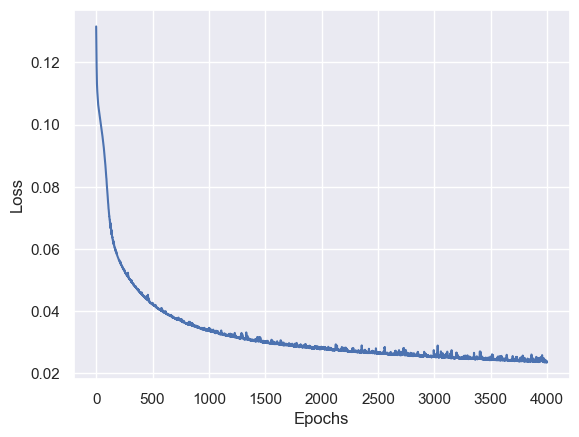

In [41]:
# plota as loss para ver se está treinando
plt.plot(historyFEH.history['loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'Val_Loss')

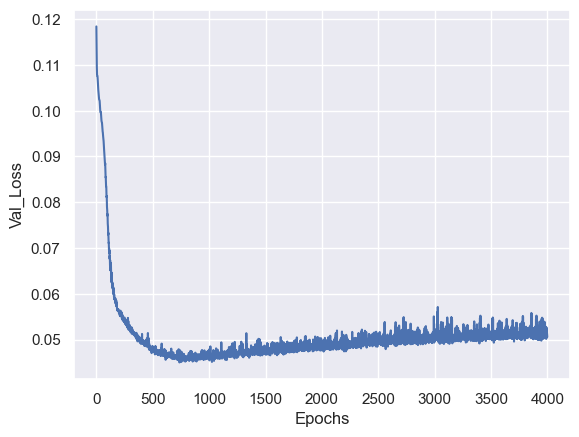

In [42]:
# plota as validation loss que verificam se realmente está treinando
plt.plot(historyFEH.history['val_loss'][:])
plt.xlabel('Epochs')
plt.ylabel('Val_Loss')

In [98]:
modelFEH.save('modelosNovos\\Lamost-LR\\model_FEH.h5')

In [43]:
predtest = modelFEH.predict(X_test)

31/31 [==============================] - 0s 1ms/step


Text(0, 0.5, 'Y_test')

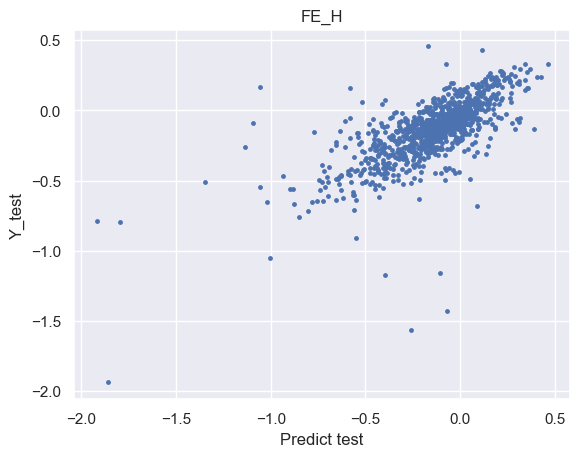

In [44]:
plt.scatter(Y_test, predtest, s=6)
plt.title('FE_H')
#plt.xlim(-0.1, 0.35)
#plt.ylim(-0.1, 0.35)
plt.xlabel('Predict test')
plt.ylabel('Y_test')

In [45]:
Y_test['Predict'] = predtest

In [46]:
Y_test

FE_H   Predict
Field_splus                               
SPLUS-n01s21_000014101 -0.378980 -0.331395
SPLUS-n02n20_000010292 -0.245010 -0.161085
SPLUS-s45s30_000007588 -0.076760 -0.092055
SPLUS-n02n21_000001210 -0.041638 -0.261763
HYDRA-0059_000029225    0.032037 -0.045161
...                          ...       ...
MC0065_000058572        0.029057 -0.165858
SPLUS-d522_000136960    0.005053 -0.109686
MC0145_000010989       -0.133260 -0.147906
SPLUS-s45s30_000001973 -0.063740 -0.141915
SPLUS-s46s27_000004094 -0.135730 -0.220091

[982 rows x 2 columns]

In [47]:
Y_test.to_csv("E:\IC\PredictsTrainingTest\\3-ApogeeNovo\\FeHPredict.csv")